# PyTorch training loop and Testing loop

For the training loop, we'll build the following steps:

1. Forward pass
2. Calculate the loss
3. 	Zero gradients
4. Perform backpropagation on the loss
5. Update the optimizer (gradient descent)

In [1]:
import torch
import numpy as np
import seaborn as sns
from torch import nn

torch.manual_seed(42)

X = np.linspace(0,20,num=200)
y = X + np.sin(X)*2 + np.random.normal(size=X.shape)

<Axes: >

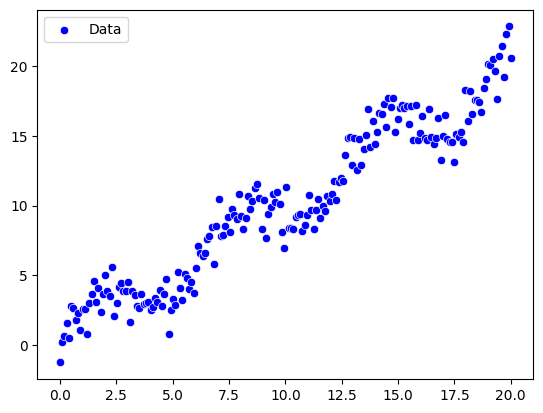

In [2]:
sns.scatterplot(x=X,y=y,color='Blue', label='Data')

In [3]:
from torch.utils.data import Dataset , DataLoader

class Simple1DRegressionDataset(Dataset):
    def __init__(self,X,y):
        super(Simple1DRegressionDataset,self).__init__()
        self.X = X.reshape(-1,1)
        self.y = y.reshape(-1,1)

    def __getitem__(self,index):
        return torch.tensor(self.X[index,:],dtype=torch.float32) , torch.tensor(self.y[index,:],dtype=torch.float32)

    def __len__(self):
        return self.X.shape[0]

In [4]:
df = Simple1DRegressionDataset(X,y)


In [5]:
df[0]


(tensor([0.]), tensor([0.4869]))

In [5]:
training_loader = DataLoader(Simple1DRegressionDataset(X,y),shuffle=True)

In [6]:
data_point = next(iter(training_loader))
data_point


[tensor([[8.8442]]), tensor([[10.5195]])]

In [7]:
# construct the model using Linear block
in_features = 1
out_features = 1
model_2 = nn.Linear(in_features,out_features)


In [16]:
in_features = 1
out_features = 1

model_2 = nn.Sequential(
    nn.Linear(in_features , 128),
    nn.ReLU(),
    nn.Linear(128 , 64),
    nn.ReLU(),
    nn.Linear(64,16),
    nn.ReLU(),
    nn.Linear(16 , out_features),
)

In [9]:
loss_fn = nn.MSELoss()

In [17]:
optimizer = torch.optim.SGD(params=model_2.parameters(),lr=0.01)

In [18]:
# so we need now a training loop
from tqdm.autonotebook import tqdm

def train_simple_network(model,
                        loss_fn,
                        training_loader,
                        epochs=5,
                        device='cpu',
                        optimizer=optimizer):

    optimizer = torch.optim.SGD(params=model.parameters(),lr=0.001)

    model.to(device)

    for epoch in tqdm(range(epochs), desc="Epochs"):

        model = model.train()

        running_loss = 0

        for inputs , labels in tqdm(training_loader,desc='Batches'):

            inputs = inputs.to(device)
            labels = labels.to(device)

            optimizer.zero_grad()

            y_pred = model(inputs)

            loss = loss_fn(y_pred, labels)

            loss.backward()

            optimizer.step()

            running_loss += loss.item()
            print(running_loss)



In [12]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [22]:
train_simple_network(model_2,
                loss_fn,
                training_loader,
                device=device,
                epochs=200
                )


Epochs:   0%|          | 0/200 [00:00<?, ?it/s]

1.8742254972457886
4.622746825218201
10.246225237846375
10.709405481815338
10.802634969353676
28.28055550158024
28.426873922348022
30.000300645828247
32.347158908843994
32.42153216898441
32.56403090059757
39.786569371819496
43.22360993921757
51.14391900599003
56.5169673115015
57.206160858273506
57.70381526648998
64.10453061759472
64.83907626569271
66.16888962686062
66.25095219165087
66.2926183976233
67.23381311073899
70.51799112930894
70.59707659855485
70.83266519382596
72.22496234253049
73.9672387726605
74.16083588078618
74.88699384406209
86.83635087683797
94.11843152716756
100.45593019202352
102.07785745337605
102.24423118308187
102.70469074323773
102.70717790420167
103.24466237123124
104.85190090234391
130.23567089135759
130.26855343650095
137.52463406394236
137.62804556707852
148.1457629285287
152.9291420064401
152.97432505036704
157.60949551011436
157.6760990738403


157.73419992695563
166.9166416383814
167.94748883019201
171.17654328118078
171.43865709076636
171.46622651140206
171.59487221459858
177.58567593316548
180.80915138940327
182.50139162759297
182.52371048997156
190.32359099457972
190.43943116883747
191.02636513928883
191.26390256802551
191.84811117569916
192.1596503786277
192.34734144131653
194.99503793637268
207.47785463253967
212.12471094052307
212.1497596919071
213.5595988451969
214.05347813363187
214.34876115317456
221.63076455588453
222.0709004222881
225.16483328933828
225.27789210225455
225.30935122887604
226.35578217427246
227.961578034563
228.68776520411484
228.68784482925548
236.60785301178112
245.64998062103405
257.43399723022594
258.0478511020483
258.04812989747734
263.4336727670452
269.64327369249077
271.60974536454887
271.6866099125764
276.845230746927
278.49875764912576
281.1289446837327
288.21760921544046
291.5031803137681
297.3861516005418
308.0928175932786
308.2966768926999
310.45692159599275
310.9926595277211
311.0469355

321.8743974006793
321.9425405151269
322.56795435017557
322.60678158691735
323.1483794300875
327.01381884506554
332.93115769317956
333.8700204937777
338.31700955322594
338.38192230454297
346.40063816300244
347.6203283666691
355.1154574750981
355.80594450226636
357.4426185487828
364.6257101892552
364.96062326422543
370.90889358511777
379.2744779585919
379.7910836338124
379.8746639191231
388.1647144257149
388.26804023227305
391.3359165712318
396.73679690799327
396.73683180133594
403.55128492633594
405.16406502048267
405.9496029786278
410.26468743602527
417.25422372142566
423.2829951218773
425.27488579074634
425.5364942721535
436.8811521701027
437.16417776266826
437.3784843407084
437.6761511586119
440.74291503648055
440.9361017815281
441.3681554071118
441.3727965213802
453.1655850269344
457.606800065234
460.94754050751
461.34913449068335
468.48860602159766
468.48893085064265
485.5090400272784
486.43031421245905
486.84763255657526
488.6029143625674
492.42586377205225
498.386044054645
502.37

Epochs:   0%|          | 1/200 [00:00<02:23,  1.39it/s]

563.3493315199194
569.4967247465429
574.9522749403295
580.4790178755102
580.6361602613506
580.7207621255693
585.92794930132
586.0567544618425
602.6859830537614
604.7056754747209
606.3587192216692
608.3754254499254
608.6921976724443
611.8172415414629
612.0170049587068
612.0648682037172
612.1809101918516
615.501915774661
618.689626536685
619.1494928518114


1.1976350545883179
4.363586783409119
7.391420006752014
8.378086626529694
11.586308777332306
11.60249981097877
13.218224255368114
14.150810269638896
14.165572580881417
14.347987559624016
22.200709727592766
22.34807112533599
29.418257740326226
43.93386652786285
44.055431817658246
45.332741116173565
46.360302780754864
53.96959910262376
53.992211853154004
54.30690756905824
54.316884436644614
54.35258034709841
54.412619893439114
58.6977751897648
60.15157944429666
61.49293858278543
62.873658125288785
72.30747598875314
73.04537129867822
73.04687838582322
79.66565136937425
104.89296917943284
111.15308718709275
111.19791072560474
117.11277669621632
121.68084233952686
122.83969038678333
122.84783020289615


131.0584692028351
136.52549925120547
137.1603357461281
141.58308764966205
147.25070735486224
147.26100080506876
147.26261035294738
149.15571323723998
149.39479165466037
149.5152136454126
150.09552065224852
151.37321630807128
151.8944095739862
153.76199606747832
157.09410694928374
173.7697871098062
178.27497938962188
185.53818253369536
185.8512278267881
187.1688318917295
192.87556941004004
207.868829793646
208.53742784948554
208.54081629693974
209.09566776931752
212.65078156173695
223.69911759078968
223.8822023916291
224.90824199200142
228.1953275251435


233.53938508511055
233.80917445302475
233.9992902922677
234.0032527713338
240.22544601245318
240.71039995236788
241.40360185189638
246.7064091829816
246.71442292409483
247.4081438012654
248.28441093640868
248.32478518935386
248.732154773199
251.1070396170253
252.45947794767562
253.18874363752548
253.96686439367477
255.42327027174179
260.5202599033946
260.6549633309478
262.26340802165214
262.9911548063392
268.12849916669074
270.356995956623
273.4920424387092


278.1291078493232
295.83298625203315
298.7648376390571
307.7162546083564
312.40584172459785
331.1822108194465
337.5665201112861
341.5155059263343
341.7381613269681
347.53393292578403
358.9590103641385
364.83785557898227
364.8726554677123
367.3897169396514
374.59279473277275
375.4108477398986
376.21233113261405
377.85237760993186
378.3416472837562
380.15758051129524


Batches:  56%|█████▋    | 113/200 [00:00<00:00, 296.39it/s]

384.25848592969123
384.80344231578056
387.0038114354247
393.00975139590446
393.68093307467643
393.84242952021305
393.883467973792
393.9900726765627
396.1434742897982
406.9152209252352
406.94286164978985
406.9483556781197
408.6255482468987
408.6285652605584
408.6366858141264
408.8967150406679
409.40111577080097
409.41359395196196
409.7118346731877
425.9806849997258
426.2101279090857
426.5710762034869
430.3161850463366
430.3211384204915
430.32220179750584
430.3311103533488
431.0365279864054
433.5223187159281
435.68071424472146
440.024122352479
441.4946911286097
449.7760345886927
449.83548147859983
453.921136214165
457.6726389664691
459.0863126057666
463.9511135357898
464.2853360015433
467.303636534838
467.3209173127543
467.3374580021482
468.85187517362647
469.5226301427465
469.7023262109142
469.9910319771152
471.6897096361499
471.716212491272
474.22134135174565
479.795793275116
482.7943732540589
482.9770494054537
484.2466267894488
486.0212617467623


494.86667495477013
495.4144524883013
507.73855107533745
513.622974808095
521.4536794971209
523.665848429082
525.795252020238
528.898333723424
540.8767787765246
547.2568141769152
549.9058081458788
553.7663292239886
554.5270787428599
555.0846002053004
555.4955591808539
556.015196288703
556.6668257962447
587.9725508939009


Epochs:   1%|          | 2/200 [00:01<02:16,  1.45it/s]

592.942208315013
592.9953496593516
593.0290773387533
597.8361046786886
601.4053271289449
602.9859155889135
602.990361407632
608.4112112077419
609.7781438382808
610.0635523947421
612.3274643572513
612.683634713525
615.3409485372249
618.6806327851955
623.3800141366664
626.6427483113948


0.4417751133441925
4.143318206071854
15.441524535417557
15.985527783632278
16.00944616831839
16.26815431751311
17.177814537659287
17.958926314488053
23.434286231175065
24.805485958233476
25.264176661148667


28.031933600082994
28.732572669163346
35.468930358067155
35.500179246068
36.21123017370701
37.55022908747196
38.020907029509544
69.20325909554958
69.58914922177792
76.22456286847591
76.24160228669643
76.63525868952274
76.86966076493263
79.20731154084206
80.38486364483833
80.39182947063819
84.47891090298072
84.88128639245406
92.01616407418624
100.22209287667647
103.78489590669051
103.87418389553204
104.83292389148846
105.02928345138207
105.29351027542725
108.56754072243348
109.55586482817307


Batches:  19%|█▉        | 38/200 [00:00<00:00, 379.55it/s]

109.5568267829949
113.71003408508841
113.860025597387
114.6770740278298
115.5876101978356
119.12971706467215
123.7494070060784
126.45310278015677
126.65577880817
127.00876180606429
127.93514953332487
129.7633688278729
130.25795613008086
130.3553482122952
132.18272171693388
136.25357399659697
136.5090250201756
139.15980426745955
140.63450054603163
143.29427127318922
143.79041443543974
149.60008583741728
149.6430062368745
155.2776941374177
156.3755491093034
156.413932630443
157.73511166276876
157.9419511348242
160.69310388865415
166.29036579432432
198.52664432825986
222.71087131800596
222.81779573264066
222.82369384274352
225.18309030041564
236.9064989994513
237.3909669230925
238.71456411585677


247.88568666682113
249.94238999590743
256.45624783739913
256.4918568629073
257.267526914482
258.3666912812041
258.3707991471747
258.38380022218917
258.9316793816397
262.50223435333464
262.8549423055956
267.52129982283805
269.24351428321097
269.3773433851311
275.1067397283623
275.8754620241234
275.89108428230975


276.49052968493197
284.3054982709
286.28088405600283
288.19611254206393
293.89643660059664
299.990739254863
300.0679224716732
300.08523435576353
300.11616559757385
300.34776857926045
300.81331694556866
301.90825808478985
303.29384649230633
306.4042269034544
306.85670140816364
307.4649425490061
311.5141535742441
312.29234335257206
319.66422674490605


Batches:  56%|█████▌    | 112/200 [00:00<00:00, 283.23it/s]

323.07225868536625
324.8101138813654
325.5406130893389
326.0712744338671
326.078410063521
326.09005296754185
326.9472086481983
329.55380368756596
332.00910568761174
332.33897525595967
332.6651819400722
333.5335307173664
341.22008085774723
341.3129647352034
341.4220409967238
346.66865688341204
348.67202907579485
356.0136895753676
356.19147342222277
368.5334972717101
368.6794977613026
369.86995689349715
369.87041389371734
370.4500541629968
374.9860854091821
382.77427815820556


400.1838488521753
402.39575099374633
404.841243261355
406.1990026178537


406.3066899123369
406.34039369027596
414.41307607095223
422.1325532476185
423.62216880719643
431.0402767936466
441.5749371330021
448.5174787322758
449.1184639016865
456.36352768342476
473.0801872293232
473.39477434556466
473.5658353398321
473.79069353442173
483.09489942889195
487.21225239138585
488.84249664645176
490.4283241162775
506.19135416846257
510.1981929669855
512.7193743119715
512.7193959799188
523.6011975851434
527.9740513410943


Batches:  83%|████████▎ | 166/200 [00:00<00:00, 195.37it/s]

528.1326077726262
529.0493309047597
530.0031933334249
530.035336460598
536.2431931157189
536.9947127957421
538.1417336125451
544.3358096737938
546.656517471798
546.6851179428922
547.2903127499449
550.444603902899
556.3745088406431
556.4210237727093
558.0522178873944
558.0633608649077
559.1485541413131
559.2054043809476
584.4345799485745
584.7644999126496
584.7659862648288
585.8235402714054
585.9413007955591


Epochs:   2%|▏         | 3/200 [00:02<02:34,  1.27it/s]

586.7816246013681
592.1688120822946
592.2543184171955
593.4602833401004
593.543249928538
597.3353608484904
599.9168854590098
603.1317182417552
604.5833251114527
606.5848354931513
606.744931900088


2.3250668048858643
2.3676311261951923
2.5162545777857304
3.2709067203104496
7.6887343265116215
15.910996709018946
16.34670666232705
17.541697416454554
19.62885895743966
19.77399419620633
22.96987985447049
23.598704267293215
24.23682986572385
49.32621203735471
49.6947911567986
50.3390098400414
51.501093942672014
55.02228577807546
67.4927533455193
68.63266213610768
69.39262994006276
73.29371984675527
73.79871680215001
74.9546920247376
88.02726664021611
88.02726697780741
97.15982770778788
109.83099984981669
111.88614725925578


114.60614156582011
115.44046974041117
116.49442601062907
118.19028079368724
118.56852456786288
149.75995179869784
155.87177392699374
173.18167421080722
173.8732632086481
173.96941254892005
182.15996239938391
182.69188754119529
185.17745844878806
216.2031828597988
216.64673332728995
216.83370101310862
217.0447845891918
218.97200505294455
222.95562617339743
224.14966527976645
225.0254740551914
234.72071884431494
240.20804641999854
240.57318632163657
241.01993889965667
242.39546818890227
253.45790429272307
257.42708487667693
261.92674250759734
261.94306925170673
263.19534865253223
263.8059953176285
266.29680189721836


266.62276569240345
269.26008454196705
272.37800780170215
273.1230585896279
273.75629130237354
275.67364266746296
286.7126374565865
286.74690355592026


Batches:  35%|███▌      | 70/200 [00:00<00:00, 308.83it/s]

293.33852924638046
293.34034414145714
293.8104879960752
297.6214013204313
297.68372930142647
297.91201366040474
299.4699190959669
302.9804319247938
312.1188787326551
323.01256884190803
324.01215405318504
331.43513579222923
331.7665232226587
331.85083684626585
332.08588648143774
341.27434587780004
348.5545582801438
358.85892820659643
359.0669192999936


359.30402651730543
362.4210204214192
363.53174928132063
364.5041882723904
365.22338214818006
365.32880225333935
365.3579922329969
378.1044769894666
378.1045299235498
380.5812714759027
382.83871633445375
384.18627697860353
384.50631672774904


Batches:  51%|█████     | 102/200 [00:00<00:00, 297.22it/s]

385.07099748288744
385.1741414282238
385.52911841010206
385.6089483860647
385.88430369531267
388.5011473957216
392.6849280658876
398.1834713283693
398.19919351560526
402.81093362790995
403.19704536420755
404.2104144476121
409.1260214231675
415.303757228679
416.803460397548
416.88467606974297
417.683943302161
418.60194590759926
424.95259574127846
424.9703231666004
430.9013429496204
434.9445534560596
435.0462659436976
439.5910605031764
439.8689447778975
440.02874617164485
443.8653347927844


444.7515957791125
444.82331585770004
444.851525514177
445.17275220041626
445.25315295045726
446.4304112035548
446.5807170111453
446.8010376382386
457.99456295256965
459.01978835349433
460.5683293033158
461.84093114619606
471.05497285609596
474.6745373893296
475.8048363614594
475.98148725812786
475.98254670484454
477.4672521529952
485.72077884061724
494.60208548887164
494.6766344113508
494.72102374120146
496.1622640518704
513.6611940292873
513.7356824232497
513.7548247324535
520.8520894991466
521.1334948884555
530.400387321622
530.6215808140346
530.6523954300442
530.8866489706793
532.9402707396307
536.6538756666937
536.696334297792
536.8878164990106
536.8907839802791
537.4848734287311
542.264377727895
546.0334507373859


Batches: 100%|██████████| 200/200 [00:00<00:00, 331.59it/s]

561.8096443561603
563.8945220855762
567.4828168300678
568.4967504886677
568.6764219997217
568.8816107509424
569.36430233696
579.9691082833101
585.7219950554659
587.6636255381395
599.7815702555467
608.9976461527635
610.2346779701998
615.6170856354524
622.3632833359529
623.3955408928682
628.6408812401583
636.097007453232
636.5349934993078
643.3563693461706
647.7127846179296
648.330817907839
649.3920449910452
649.7345010338117
655.6519280968
656.2296871838857
656.4774406252195
656.4828548913588
656.4829319714277
660.6468471287458
668.557293295738



Epochs:   2%|▏         | 4/200 [00:02<02:20,  1.39it/s]


0.47834861278533936
6.607891917228699
6.615094162989408
24.064017273951322
24.635881402064115
27.056761481333524
30.901999928522855
36.86223600106314
39.862589814234525
45.49817416863516
50.97389075951651
51.0351788518019
65.8519103047438
65.87111923890188
67.03280244069174
68.93033645348623
71.2753646154888
71.3610444967635
72.98992583202198
72.99075050046667
77.01292152097449
84.34559793164954
84.4994281171821
88.56312974682078
88.68764361133799
88.77083642175421
88.79085263190791
88.96104676602408
95.86884076474234
97.35548276780173
108.63751287339255
108.74049409804866
109.74518402991816
110.02861183462664
111.00864338455722
111.24630702612922
114.96217812178656
119.21632851241156


Batches:  19%|█▉        | 38/200 [00:00<00:00, 373.06it/s]

119.3166085141711
119.66680496511981
125.4307495909743
130.8860971289687
131.4024738627486
136.56598466215655
141.97894614515826
143.13036101637408
143.21871335385367
158.44097192166373
161.3498221146874
161.4336021351628
167.47889308212325
167.54192875651643
168.87880860595033
169.70949130086228
169.914026114624
170.92306241719052
171.14855461148545
171.14915523014497
182.03237876377534
183.2203777738614
198.9716270872159
200.2323864408536
201.09091165743303
201.23913830600213
212.95564526400995
213.04680091224145
213.2219319351716
213.54018381319474
214.19062987051439
214.20170871342998
216.9613782557426
217.13429335679393
217.89409569825511
219.58851079072338
223.16188482369762
223.8235940131126
228.47795287694316
231.40885082806926


234.51576415624004
236.5204602869926
237.7141971978126
242.33680204476696
249.6510253342567
280.8862910660682
281.20760641421657
281.6327381822048
283.1818227263866
289.4841837378917
290.1351597997127
297.9850600453792
298.01097030367237
298.03590296942275
298.50931482750457
299.43255626398604
300.55288421350997
300.5570126789389
303.74134433444124
306.25754869158845
308.1310764568625
308.2507124188123
316.67100718047004
325.4497785809217
325.9946403148351
326.7956080677686
329.5606446507154
330.142907524365
330.4442349913297
330.75260021712165
330.8685416820226
330.9512329789577
334.9687309953151
335.0094986500917
336.43218641902786
338.7621331753908
338.98579140927177
344.32487651135307
344.34422202582937
350.2957257794915
350.7505724596558
352.1071374582825
355.21177174325567
355.2241312133847
356.64273367996793
368.4292613136349
368.9378143417416
369.0349241885124
372.1806704195915
372.27622275974136
378.2307005467592
378.2896911780117
382.3773548285244
386.11767408053856
391.32588

Batches:  69%|██████▉   | 138/200 [00:00<00:00, 479.41it/s]


406.8107298972027
407.145955985965
407.14803742812364
408.6249164287874
412.6348427479097
414.58979141162126
425.18812667773454
431.30382978366106
439.4948383514711
439.49494722297095
442.93394973685645
443.9011460225811
443.9071688931217
455.4001183789005
460.02126744201087
460.0943284537425
476.8544679190745
479.4853139426341
479.4872365930132
479.48769082476065
486.5206707899706
506.6589878981249
507.2407254760401
509.30842610050604
509.32411888402567
509.841809542595
510.4066444353448
510.62130434971914
511.68625469666586
514.4693131015883
517.6270334289657
517.6536936738776
542.1721606233405
542.9649692752646
545.4792188384818
555.5197700240897
555.5537792162286
555.7285997883664
556.3584417716847
556.7527075127946
567.4083452538835
568.4488706902848
568.5652802379118
573.679161825894
573.965287426232
582.3466846735464
583.191351571797
583.7497791440474
585.8505226762281
588.8009864480482
621.2727538735853
626.6938702256666


Epochs:   2%|▎         | 5/200 [00:03<01:59,  1.63it/s]

630.112790981053
632.4118127019392
632.8322517366396
639.5410887689577
641.0789460630403
657.4309091062532
669.2079438657747
672.6115757913576
672.9424583406435
675.5665242166506


0.010095862671732903
5.165214804932475
15.235131530091166
15.456703735515475
18.30023510567844
30.52061970345676
30.574255967512727
31.713515186682343
34.830439949408174
40.80957689322531
48.59196844138205
48.88507201708853
49.342471504583955
55.90895834006369
59.42708363570273
60.601907754316926
60.6435328964144
66.56978573836386
72.29408803023398


72.5373797211796
73.54559431411326
74.71289036609232
75.91335330344737
75.92550174240023
76.02868183795363
76.54727449361235
76.85674648825079
77.4077147776261
114.10745614115149
114.17905827704817
120.80471774283797
121.94416638556868
124.10204573813826
125.20824118796736
126.83464833442122
129.04059454146773
131.03295096103102
132.04963298980147
137.61848207656294
137.99813451711088
139.3527930015698
146.00743606034666
163.38623740617186
179.24324729386717
179.2710318537429
190.47037744242698
190.56848482508212
190.5684997283388
191.7912209474016
192.23990766634233
193.12908981670626
194.48710142006166
206.59564004768617
207.30300538172014
207.44437344302423
208.23081947793253


208.4074864082504
211.5138382606674
212.956727712648
213.01467935671099
213.75353179802187
221.15958248008974
221.49131451477297
224.53897915710695
226.1230884634424
226.66958211292513
226.78338770498522
226.84212243114598
231.61146199260838
244.36846959148534
244.72204336081631
254.62555250083096
259.53415712271817
261.55061420355923
261.87124782358296
262.86700278078206
262.92856800486334
268.17479956080206
272.75074446131475
277.68131363322027
277.68765440187417
280.90425195894204
282.59932258329354
283.11125447950326
288.74620940885507


288.82691168389283
295.8453514536377
298.5785505732056
299.05473815998994
301.7868250568863
301.78700164105976
301.9154650881537
306.0316512301215
312.3369719698676
321.1120421602973
321.13512860942865
325.04027401615167
335.98835217166925
335.9993402562686
336.0131700360798
336.5063257837319
344.75175005436176
361.42289835453266
363.08108359813923
368.8462923193001
370.6855842494988
371.6208577179932
371.6746955984854
373.33806513488526
375.9848089092993
378.3830070370459
379.85996018588776
382.32709919154877
385.32821952045197
386.9910623902106
387.0924035483622
387.6003980213427
390.43244023859734
391.41571463883156
391.8831754499697


391.89793631300563
402.4932665513479
410.16290947661037
410.1950968192541
413.3940773890936
413.582985325309
414.58706168696517
414.63800094887847
414.991317315551
418.74704937502975
419.06444881722564
420.2062232331955
420.33372355863685
422.0854090587818
422.09880829748
422.20460107323015
422.26434083800996
423.5600459180423
423.56074134778464
428.4080909914919
440.1543287463137
440.9092501826235
442.39519802998984


442.503598792071
443.84020195674384
444.1648287899443
445.010356617684
445.1040461711236
445.836288278515
446.16683957498753
451.0211920492002
452.056418632681
455.8091718904325
455.81684239121387
460.24394591065357
460.9592242381186
464.2152538439841
465.0679265400977
465.1844207039685
465.39454492839286
489.0643638065667
493.27985605510185
496.1629692009301
496.1690625134506
497.7993633929291
499.5178065482178
500.7837904873886
508.1033123913803
517.6846121731796
517.686847781355
519.0412887088605
544.1793616763898
544.2013274706551
544.4341926999041
545.8868703074404
545.8872813684284
547.9981331331073
578.9728836519062
584.4797353250324
587.2389771444141
587.7329918247997
588.7864899737178
588.8035196838318
588.8068376660231
592.1742097020033


Batches: 100%|██████████| 200/200 [00:00<00:00, 294.76it/s]

595.1536735176924
595.7614350199583
595.7853214826318
595.9898123081657
596.7604137595627
596.8085923615727
597.2689962509903
598.7903525952133
600.6054878357681
604.3580231789383
604.4552751306328
605.0416546586785
609.303381038073
609.312535426754
609.9774878241005



Epochs:   3%|▎         | 6/200 [00:04<02:04,  1.56it/s]


4.707327842712402
6.12239146232605
6.530398309230804
6.721050947904587
7.700048059225082
9.340816348791122
13.985711425542831
15.792685359716415
20.291772693395615
22.85993465781212
33.99372085928917
33.994398994604126
33.9966640539933
36.275903708534315
39.12666679103859
39.18875500862487
42.8156301707495
45.309034559177235
52.47555277054198
53.499225589679554
59.8881673545111
60.02762462501414
62.08859469299205
63.26355685596354
63.29578724433668
63.357469774084166
64.37797198374756
64.64832014520653
81.38477796991356
84.78345698793419
86.61305112321861
86.72351383347996
103.00249790330417
103.43629311700352
152.96486519952305
169.3347535051871
173.31038808007725
193.9380717196036
195.75230669160374
198.59561537881382
200.6386973776389
204.52351855416782


Batches:  21%|██        | 42/200 [00:00<00:00, 419.66it/s]

205.07109283586033
205.27352143009193
207.57948041637428
208.10340095241554
209.0986573167611
209.47638250072487
219.9551785059739
222.19236517627724
222.39188485522754
224.80017452617176
224.9428090073634
225.2027251936961
225.83231439371593
233.78423919458874
237.46877207537182
239.0414930798579
239.5516864277888
244.08833899279125
249.67117132921703
254.56696333666332
255.1274681307841
255.57444318314083
256.583583913045
262.20732506294735
273.73270519752987
273.81252655317076
273.95780824054964
274.0885355018545
275.3060485862661
275.3234343298245


275.4295084842015
279.29410222847946
279.4143892296124
280.43128476222046
282.4815841682721
285.8740950592328
293.8470750816632
297.2540119655896
301.18241677363403
301.8267161019612
306.3467275269795
306.4574344374705
306.7480474926997
307.2150167741347
315.1212415017653
315.79014836926945
315.8554264672566
316.1786019571591
325.77088425238617
326.256086594658
326.2645962808747
327.09120529633947
329.13069575768895
337.54618686181493
339.2604801033158
339.43010423821397
340.3177259389777
341.0608402315993
341.17616358888336
341.18982685008086
344.9948481360916
349.50582158961333
353.41105282702483
354.5916898290161
354.77287191548385


361.04012149968185
361.626673940802
361.79125556745566
362.4360668400768
365.9137911538128
365.93915969715454
365.9468710536603
373.60377861210145
376.72101498791017
378.93570376583375
379.139758389676
382.0357885772828
382.17861655005254
382.7623241210822
391.4513070846442
394.5306060577277
394.54481628746726
401.0729205927346
402.6483648142312
402.90796333760954


404.58649188489653
405.38673949451186
406.43944883556105
406.56848238618113
414.0834359994624
414.3863473108504
415.214068668196
415.5616198948119
415.58693408803083
417.36342215375043
417.9052263482008
419.08087706402875
424.4185035212431
424.4734843468759
430.5158260560129
431.10984344244935
431.1120046474971
432.38710797810927
440.4005099632777
440.4184753750451
446.1220419262536
453.3616340016015
453.58008746849373
453.60746830375865
461.42480438621715
486.4568001595326
487.3036829200573
490.8238798347302
492.30514382990077
492.46799616189674
492.8375648376532
494.9051174041815
498.54831136437133
500.47061265679076
510.9569302913733
511.0022389036603
511.019151518587
512.1845607259311
514.7961637475528
521.4892060258426
528.0822374322452
533.1923691728152
533.3592154779471
564.3203799524345
565.5980179109611
566.0694515206851
566.2206337549724
567.5538673498668
567.8273981013335
569.55362729216
569.9999108412303
587.9353680708446
589.3185047009028
590.3799375393428
598.280060181859

Epochs:   4%|▎         | 7/200 [00:04<02:01,  1.58it/s]

620.867734879721
622.7632174198516


3.5166800022125244
3.569336600601673
4.280981905758381
4.8103699162602425
8.360069699585438
20.039972729980946
27.227993436157703
27.416584618389606
34.07690203934908
41.60493863373995
42.3363371565938
42.454672403633595
47.20194823294878
48.04591102153063
78.92949981242418
81.43359012156725
93.36357421427965
97.26166600733995
97.39556559175253
97.74529039114714
98.3529881760478
98.87496166676283
99.12075450271368
99.5213980898261
99.52255955443252


Batches:  12%|█▎        | 25/200 [00:00<00:00, 249.01it/s]

99.99933964118827
107.46413999900687
110.50769358978141
117.8194463859545
118.44001233682502
121.42132341966499
121.42537730850745
121.42840454552788
121.63229635928292
121.94222796533722
122.4676547703566
147.4165073094191
150.49014908645768
155.9948707279982
156.8972779569449
157.7512103972258
157.84954881493468
164.24661159340758
164.5350130480947
164.64489616279025
165.58642025117297
167.81871695641894
169.1554259789409
169.31209163193125
170.78067819599528
171.10816694621462
172.60460175399203
179.28570784453768
179.97303421620745
196.0216086638393
209.51671631459612
209.70572435681242
210.9071131927194
217.00783073727507


217.23729374830145
218.1927700919332
218.2146098484518
218.3006478344323
226.04939470638055
226.0547876605997
237.14833738899324
238.69156625366304
241.17670633888338
241.41697437560651
246.970451662899
246.97076194552938
247.89654844073812
248.41719829110662
253.06204854516545
253.60611753730336
259.27074938087026
260.0495058801607
263.69338434009114
263.75318297563354
263.753304546226
286.45175272737833
286.813068156589


286.96159768616053
286.9833032670358
287.68863918212446
288.63028915551695
294.0052519622186
296.0875058951715
299.81934197572264
301.17800493863615
304.07206864980253
308.9812097134927
308.9907517661268
312.89415886298957
314.7099143494779
315.5902695883924
321.99171831504646
322.51020111934486
325.631574057501
326.3533485759908
326.40666726277414
327.24159881518426
327.31062956200185
327.3116913691556
327.317058302222
331.813884474097
331.8181940193681
335.1737359638719
335.73419361071865
337.9400251384286
343.57603959994594
343.57733771320636


346.6931464385634
346.8102192443257
347.29188867029006
350.1186878245717
351.76835890229995
351.95729813095386
352.5382024359351
365.7082358908301
366.6621318769103
378.3648410749083
378.38073328253085
378.5988405507451
395.7075422566777
395.83117331680114
395.8316375574723
396.5635573229447
402.008409675087
402.35774883242993
404.0987466237202
404.5862861237183
404.8371144792691
405.0538667699948
418.2092641851559
424.39055099698453
432.755253221716
439.9192389509335
439.949125433217
439.9551419404961
440.0772693169929
444.0928142083503
444.59047466643824
447.5437107694961
449.48482436069025
450.2434887302734
450.2776412343301
451.3775216912545
451.52576926105394
451.550303873948
451.58201222994103
459.6912994919039
463.33514147379174
463.73310335852875
467.188726269982
467.2018481626801
467.22169469517394
469.4152984492175
473.0887243620746
475.37186740559264
480.99684785526915
491.80632470768614
495.3660971991412
498.0063347689502
498.0794973767988
498.701557258486
499.2882939375631

567.0345300519766
567.7413497054877
567.9137710267605
570.2493189508023
571.1339933210911
572.2974205547871
574.3406088882984
574.3860706919731
582.11959215346
582.1216135569775
583.8841593810284
592.5071671553815
593.5916095324719
610.9523025103772
611.5404491969311
612.8593798228467
613.1356637128556
617.4011041768754


Epochs:   4%|▍         | 8/200 [00:05<02:00,  1.59it/s]

627.8371927388871


1.5312203168869019
4.274523377418518
13.906113266944885
14.454814374446869
16.405944049358368
16.658232122659683
27.655182272195816
41.638379484415054
45.982689291238785
50.11043682694435
60.04655399918556
67.3911284506321
67.58277510106564
73.08091114461422
74.33077119290829
74.80680744349957
76.20345954596996
77.8955806940794
88.21924535930157
92.4799403399229
103.26764957606792
104.94034640491009
111.5562001913786
112.55900399386883
114.29118375480175
119.57128362357616
119.64510717988014
120.47389701008797
120.47626334801316
120.53711026534438
120.73181026801467
123.87290924414992
126.88607567176223
141.78693931922317
145.7422839961946
147.34737115725875
147.96344995126128


Batches:  18%|█▊        | 37/200 [00:00<00:00, 367.40it/s]

163.7771363221109
165.51644515618682
167.6939959488809
170.88662433251739
170.97304612025619
173.56691532954574
174.3023198209703
175.76181465014815
175.8671675734222
177.1983692459762
179.6494738869369
180.29889122769237
183.76606838032603
183.77227567275986
183.79996937839314
183.80720395362005
191.15795296942815
191.82729244744405
191.84857807820663
198.27769385045394
201.929484707769
203.02790735429153
206.97797344392166
211.37814710801467
227.3403882808052
229.17992077535018
234.83511458104476
238.86151371663436
241.01867328351364
244.2190390652977
245.61922214692459
253.6461710757576
254.0437558419071
261.9424150711857
262.09611361986026
267.5169944143854


271.51055973535404
296.68638294702396
297.22226333385333
297.31078526889905
308.9577016583644
309.0785421556793
309.5817170566879
309.5893184724264
311.4156735721044
315.8644727054052
336.220139819663
336.3413326474838
340.11163804261014
340.11925859423354
340.4466155585833
341.5570388850756
341.99328471394256
345.14067937107757
350.27137232990935
350.38681053044274
350.46573087992147
350.5110240657814
350.6332287793048
354.4735093121417
355.44300484703854
358.12052345322445
359.0926462416537
390.2059961562045
390.3356336806901
394.5508636687882
404.5352329467423
411.68703787075356
412.3572577093728
412.52106356667355
412.5470913150348
417.96131737018004
420.7836223342456
420.88669584924355
421.3982846015133
421.41009838180616
425.471660443116
428.2044411380775
428.45565760927275


436.52255881624296
437.07751400070265
437.6135570486076
439.35364956455305
439.44434481160715
444.4214289714582
454.74381285207346
457.815732054878
457.91268920945004
458.1508563910611
464.2926858817227
467.64127840148285
467.6427379436791
469.0595054216683
474.931442219764
479.9486383982003
490.20527597144246
490.53501518443227
494.1538906879723
496.2367254085839
499.7030466385186
500.71522184088826
500.78168089315295
502.14330573007464
502.5720330886543
502.6265186034143
502.65161084383726


502.6554184530396
502.8193860773463
506.4160643343348
507.24916340154596
508.6619119767565
512.1158917073626
518.3291838292498
519.1068739418406
519.4252767388243
523.9315042321105
525.6942273203749
545.5762921397109
545.6985875491519
549.5389503363986
560.6475604895968
567.0736879233737
567.3448218528647
572.2476724807639
573.5873402778525
573.7717766140122
575.0823746297974
578.0893128488678
578.2738728944678
579.21490291995
579.2220422558021
579.2220489204419
583.276769799043
586.4217995822919
588.3763122976316
595.6665740430844
596.0050164282811
598.4105690539373
599.8734992564214
611.614260059644
618.1873124659551
618.358717572738
619.3158838272584
625.004892540027
625.0669227883709
625.7711650774372
626.7899521038426
626.7981786214305
627.6699753486109
627.692224453066
627.6923653364438
627.8778836906213
628.3006014108914
629.0814502120274
634.7004969001073
638.378179299857
638.381637943422
638.4989832094661
639.1101068905346
640.0758556178562


Epochs:   4%|▍         | 9/200 [00:05<01:53,  1.68it/s]

640.263051008319
640.3440787843219
640.9144193581096


5.246572494506836
5.31342339515686
5.399088762700558
28.629849337041378
29.004052840173244
29.09999293088913
31.695630729198456
31.700276197399944
33.240532816853374
34.63625699421391
35.19040256878361
35.805113018956035
42.96135109802708
58.82898110290989
65.38379925629124
67.07433229824528
70.74475389858708
71.62606686493382
79.52576083084568
79.9672330035828
86.75381690403447
90.80998212238774
105.43220216175541
105.44880337407812
107.46082920720801


107.69080232968554
114.85235332837328
115.51104282727465
116.04150276770815
116.05128668202087
116.3187363888137
117.01397801889107
118.01193816913292
118.13176024658605
118.13753511942923
121.28021957911551
121.593590432778
123.00315445102751
123.58339821733534
123.6068349853158
124.10325763374567
126.99851534515619
127.18127057701349
129.84772107750177
134.7008232846856
134.92984703928232
134.92992070835317
137.14007595699513
139.41310290020192
140.30196986120427
145.26990113180364
147.21918282430852
147.2453458342352
150.03637433383847
150.0363796272395
150.0694963962851
150.19507524679284
152.9041650028048


164.2087065906344
164.84068772504907
169.4434761733828
171.1311975450335
171.16458529914598
171.17627295787315
173.11088308627586
179.5300596647976
184.30422004992943
184.33690505410414
185.0576331534503
202.5280578055499
209.0002930083392
209.85908996249418
209.8980582648037
210.4572172456501
218.33216860825996
221.57376888329964
226.12171819741707
229.34642127091865
229.55082045431118
237.78640089864712
240.19002734060268
240.93025843734722
240.96362428302746
241.07864212180357
241.1599605598567
257.86358337784986
263.1173623123286
271.01950626755934
277.2785122909663
277.4531192996619
278.3337608792899
278.4909819134591
278.4912282644327
279.9954873739298
282.3696536241587
283.3327949462946
283.3738670206185
288.9649619913216


Batches:  49%|████▉     | 98/200 [00:00<00:00, 328.35it/s]

289.1020653998967
289.6569467342015
289.66323521235245
290.79051568606155
291.5662407527234
291.61047625788706
291.7910074020292
299.67907750853556
302.59724128493326
306.61658227690714
307.23512399443644
307.2381861728172
307.57240992007064
307.94927399573135
339.24710267004775
339.2474228748724
339.38967025369857
340.02040791601394
340.74434852689956
346.7428340920851
351.9141578683302
356.763413906996
356.84039007217143
356.8404174844327
357.377617756516
362.71416465440416
365.2851716677251
374.39841000238084
381.69711462655687
385.5127731958928
389.2864319483342
389.33194704228663


396.92163629704737
397.8298222559097
407.71884031468653
407.7197088217654
414.8620599722781
414.87926060988684
417.8383603794791
418.91275579764624
421.2301262123801
421.662378887675
432.3534608884074
433.3922632737376
433.4849263904907
434.54033021911164
443.1417096136429
451.79907350524445
452.3219756363251
455.1083864448883
456.9659342048981
463.9228224037506
467.8684202907898
468.28361450418015
468.80562018140336
469.03724588736077
479.7965260921337
482.13540782316704
484.49115504606743
485.9057450471737
488.1311335740902
500.1151900468685
506.58929826601525
506.62662408783217
508.13204548790236
508.50023589565535
508.5232256492891
510.32289980261703
511.72150574534317
512.7679562410631
513.0269855996885
517.3436274072446
519.2573226234235
521.6393142482557
529.5256810924329
542.0073705455579
549.8412524005689
551.0456808349409
551.3557759961404
559.4117404660501
567.0250360211649
567.5045039495744
568.3738590320863


Batches: 100%|██████████| 200/200 [00:00<00:00, 349.62it/s]

570.6785510620393
571.0216480931558
571.1563392719545
573.2447134098329
573.2456997420231
574.320688345615
599.692140677158
603.6737597968022
605.4727278735081
609.0103848959843
610.2551921393315
610.4044508423249
612.0706304993073
612.9202167477051
618.7185017551819
621.5259232010285
622.7817172493378
623.1373536374012
623.140050901944



Epochs:   5%|▌         | 10/200 [00:06<01:52,  1.69it/s]

0.16009584069252014
0.8171949684619904
1.8269825279712677
3.130535513162613
5.856645256280899
11.616698414087296
37.0895701944828
38.50101211667061
45.84313800930977
46.33269056677818
51.65370401740074
52.53179505467415
54.265722423791885
56.53827777504921
56.849217891693115
57.93102407455444
61.76020407676697
64.77065944671631
65.80733227729797
68.98642802238464
69.43655577301979
69.67393752932549
69.70611862838268
69.7369586955756
69.87766167335212
73.21965214423835
73.29703088663518
76.68000694178045
78.11267896555364
79.52588840387762
81.85728593729436
82.07956865988672
82.25491127930582
84.73515567742288
100.40475616417825
103.04443273507059
111.24352178536355
111.83013573847711


112.96527615748346
117.05082217417657
118.73143080435693
124.04461125098169
125.14511588774621
127.89308694563806
130.0679197665304
130.52049756608903
131.77169716916978
133.1483922060579
133.77569294534624
135.67851424776018
140.37030721269548
142.06402159295976
142.17274144105613
147.95164254121482
148.09176516346633
161.19981741718948
163.04735743813217
163.05487953172997
165.97854910837486
167.1681785439141
198.76483152853325
198.9189015631564
200.01331985043362
212.50011909054592
221.5012863879092
221.5019978028722
222.04304340900853


Batches:  34%|███▎      | 67/200 [00:00<00:00, 342.10it/s]

222.95869073690847
223.0643819537945
224.53390824468806
225.69499027403072
225.80552146257833
226.77584162773564
227.26673764409497
227.26786620973144
236.2077770984033
241.6122394358972
241.88999100087676
243.0697649276117
244.46003003476653
244.52440062968526
245.2999270936707
257.1323236009339
258.07524738518987
258.27320081798825
260.7901199540356
265.69881326763425
265.70046750374604
265.70749207457993
266.6071400853107
277.1945739003131
277.6264554770896
277.6828115457902
278.2066602582345
278.7792537683854
294.15293769782875
294.29084262496326
295.2664079988608
295.27862949634437
297.3445844199741
299.38269729877356
299.8762502517784
300.19582943583373
305.1202259507263
306.4218124594772
307.30748371744994
307.3525656644488
307.8346472863341
309.11263834277634
315.01475940982345
322.8425620679045
323.08905350009445
323.96145849267486
323.97233599296305
331.21341675391886
331.3797298060963
331.5266756104538
336.4297966050217
349.0123447465012
349.59535452595446
349.84499238303397

Epochs:   6%|▌         | 11/200 [00:06<01:46,  1.77it/s]

471.2090952551225
471.2288296284387
472.1725518765161
488.9143464626977
496.0732996525476
499.82840657851193
501.2338688435266
504.39352131506894
515.0275535645196
518.8374617161462
520.4673954310128
523.6820913614938
528.8126484217355
529.4875527085969
530.1349227490136
531.2419438423822
531.2567158309976
531.4983011154691
537.8253365425626
537.848292761133
539.1826762488345
539.2887002459029
539.5864172509173
539.6265407694736
539.9521624339977
540.4115464283386
540.5168888239423
556.2495062021771
560.1779486803571
561.1607502965489
562.3655765323201
564.1731992034474
564.8724069265882
565.5518283514539
571.9667191175977
603.1755547194043
604.5817064909497
617.5702547697583
622.5049967436353
626.2588517336408
628.7358545927564
653.828198876814
654.8607219128171
654.8976622751215
660.3594714334467
661.1688048174838
666.6495930483798
666.6502399739693


2.355112075805664
9.09937334060669
9.22486586868763
9.226498763076961
21.177088896743953
21.2289454145357
26.918217818252742
28.85166053008288
28.85601536370814
40.58071724511683
41.949673214927316


72.94039205648005
73.07270228303969
75.82918202318251
77.93328034318984
77.93330184940896
79.65853755001626
80.01153202180467


Batches:   9%|▉         | 18/200 [00:00<00:01, 169.05it/s]

80.53352702979646
81.0293599200686
83.5545772147616
83.83440767054162
84.69854388956628
96.94795642618737
105.02340827707849
107.5535138678988
109.04013489012323
110.36386810068689
116.55455957178674
118.18845759157739
118.1887060425961
119.11609947902798
123.27393543941616
128.88689387066006
138.24243223888516


138.3822558693373
141.3412242702925
141.56536467594742
147.48572905583023
147.51513287273883
150.34032007900714
150.47226494399547
152.63529151526927
152.66205802408695
163.1427966639185
166.5892886206293
167.31085613218784
167.3213069731155
171.38483551086574
171.41060289496272
171.55975624674647
171.5600198643533
172.08848388365186
174.52358849218763
174.66317276528753
177.36849026254094
218.42617611459173
222.51015810540594
223.8150001006452
229.10828308633245
229.43569026759542
230.50001726916707
230.51026278420068
231.9052090017376
233.0288765995083
233.2829357950268


234.50607043190575
234.59888921363927
234.60172541893735
236.98636587418332
245.21969660080686
249.55807789124265
249.87015919841542
251.30034737743154
251.37144995934977
251.46258488006606
255.14654293365493
255.20093210123196
255.3602839567484
255.37131647195383
255.61179117288157
256.8586634787516
260.6944975050883
261.1585205885367
278.43093765701815
291.6121453138785
295.2453044744925
296.6786270233588
309.57034398045107
312.01290036167666
313.9231472107367
315.2984283062415
316.7244337889151
323.14436901535555
323.1742700896011
329.2700328192459
329.27106972702495
330.2070350266313
335.6998862839555
338.6905908203935
340.72420712479106
340.8197553373193
350.0047576642846
350.77807899483196


Batches:  52%|█████▏    | 104/200 [00:00<00:00, 283.16it/s]

355.2330393410539
355.52795281179897
363.27211298712245
370.7326303935861
372.9096619106149
377.83212818869106
377.83366990368995
378.5254167346302
380.59031522553596
381.2128024129215
395.2924885777775
395.5136979846302
400.1639879969898
402.34055960457954
405.57445204537544
430.61509573739204
430.9911862341705
433.69633731525573
433.98167607467803
435.28991255443725
447.7432912318054
447.8547756476346
447.89875438343915
448.7157950056735
448.716023779607
449.7091058857204
454.02543870279806
455.0517565376522
470.28778520891683
473.2128638393642


473.4302775330307
473.43617655862363
475.16355123151334
476.95793010819943
481.31890203584226
481.44666640986
481.4866566859582
491.47449161637815
494.55542089570554
495.82976736653836
496.1750385962823
496.65496756661923
499.30224825967343
510.7436688147882
512.5449899636606
513.028033097873
516.696547349582
516.770228592346
518.3050408043364
519.1801843919256
521.5051231660345
522.6948895730475
524.7290337361792
530.3029811658362
530.6727806307772
530.6748692145502
533.9394432654535
535.0052262892877
535.5094874849474
536.9309351196443
540.7630307426607
546.1066992035067


Batches: 100%|██████████| 200/200 [00:00<00:00, 287.38it/s]

556.5133678665316
556.6038865720784
556.8947999453103
556.9089694483137
572.9412742121076
572.9417061628355
573.0424392269506
573.610481743659
573.6658361972823
577.3480628551497
578.3052010954871
578.6127444328322
580.2779197515501
583.8091063322081
586.9159860433592
587.2577950181021
588.0586565555586
589.0007026614203
600.0449960650458
604.7848856867804
605.9353899182333
606.2051693619742
610.5887386025443
611.0812690080656
612.0962958158507
612.6631443323149
617.4471690477385
617.5195495755925
618.1123929889454
620.5574425132527
628.5509656341328
629.5108563573613
629.7957938285126
630.7165609569802



Epochs:   6%|▌         | 12/200 [00:07<01:54,  1.65it/s]


3.451631784439087
20.50716233253479
20.524900870397687
20.56546870432794
23.11059204302728
23.88557139597833
26.769792234525084
28.57762519083917
39.55945769511163
40.2071945425123
47.500508999451995
56.287366604432464
60.913732742890716
61.057576006278396
61.876581555232406
62.33684698306024
69.0996066685766
74.86041513644159
82.1077534314245
92.49807420931756
93.45683381520212
93.45715803434723
105.87670797636383
107.40423733522766
108.55911166002625
109.12068218519562


Batches:  13%|█▎        | 26/200 [00:00<00:00, 256.98it/s]

110.63754135897034
110.72295681168907
112.5610856168496
113.84481218984001
117.47752503087395
117.47824706687243
117.49480763255269
124.8988808709255
131.66071310816915
131.72182425289066
131.75622916026623
138.2396929244569
138.53631222053082
138.9896544496587
139.34711196823628
139.34796815304435
139.60626610307372
139.63185522085405


145.25452873235918
149.97845289236284
152.2879323673842
153.16592332845903
153.4162381303904
155.93364578610635
155.96470597511507
162.3493457151053
164.35082724815584
164.3798105859605
164.40502200773335
167.98013029745198
170.29670820882893
172.14856730154133
172.61748851588345
172.95861620953656
173.90463556101895
176.31817020228482
183.33571590235806


189.2112757091818
196.35370839884854
202.05379546931363
202.2639135842619
203.14531786492444
203.1472316395666
209.18765121811884
209.20341959709185
216.19682875389117
216.25593340137857
216.72681057194131
217.8953099224891
217.91153701694566
217.942339246365
218.05041746536153
218.07506034823018
218.09143220933038
219.48477386982995
219.6993754610594
219.84001691194135
226.82377011628705
226.86163959579426


227.9285769231792
229.03410527782398
234.16753766612965
236.8513612516399
241.48113296108204
243.91316340045887
245.7151705987926
245.80743873791653
246.0848953493114
249.8019854791637
255.9539916284557
259.2432596452709


259.27063495779294
264.99555809164303
265.56096292400616
265.59574110919493
266.2067410510208
266.31888494009036
269.64822849744814
272.59534821027773
272.9017175149347
273.24995499962824
273.28819879630464
273.92323931792635
274.9002784762706
274.98530471810955
278.68247569093364
286.5371757794346
287.7327016640629
291.05199826249736
291.4104988325562
292.600723837706
292.8450079012837
294.8181291867222
294.8364164859231
295.538844826835
295.635619732755
296.0449321299966
296.6748967200692
299.830610993522
301.2645103961404
306.21019435228663
323.48925471605617
323.93663665952045
323.9579888500448
324.06365898178774
326.0317759804602
326.2311491511937
326.65069480167585
327.1560326956387
331.778715743887
331.7787157438879
333.1144777678137
333.86372728573133
333.8646167720153
333.92421210356497
334.05410521276735
334.12183035709404
335.55920244552635
336.71928681232475
337.7666505704119
337.76768703290236
339.6388521892668
339.64006598907963
342.23909433800236
343.76883514839665
343.9

420.2828871929969
426.3477074826087
429.2962786877479
429.395906979772
435.54062038156644
435.5531976731445
436.48846190291897
437.04711472112194
442.5486773164894
446.4304388673927
446.749420961919
449.8858278604175
450.64724209028736
454.0016868324901
465.6075790138866
490.4160487862255
490.5217034207608
499.2995535718228
503.7701355801846
503.793670779648
511.41492570060745


Epochs:   6%|▋         | 13/200 [00:08<02:00,  1.55it/s]

527.5222674669649
528.2470851005937
538.1869120659258
540.0955791534807
549.7341499390031
549.757845469373
574.2840657910283
582.3411861142094
582.530027784961
583.1909513851579


0.005546426400542259
3.529816960915923
3.6425867211073637
30.449437154456973
33.65182329528034
42.58399130217731
42.71762336604297
43.288119507953525
43.300940916873515
43.92933736834675
44.26259951386601
48.07902912888676
64.58012203965336
65.77148346696049
65.92314480338246
68.141760812141
70.60062049422413
71.28849171195179
71.30044208932668
72.19139127898961
73.8290399806574
77.82627861667424
78.046425585635
89.51170325744897
90.50366855133325
91.3575772093609
99.23929536808282
109.85164010990411
111.05742538440973
112.59324384201318
112.59482785733417
112.62098809191957
116.75373955676332
128.03422566363588
129.5989342541434
135.89971502730623
153.00735243270174
156.1153987259604
161.6911700577475
161.69126791386952


164.68595165639272
167.00495714574208
168.94617182641377
170.23864609628072
173.87549001603475
175.62625796227803
175.77042258410802
175.83202461033216
175.8320419629672
176.18653897844342
176.25199519001035
178.28636513553647
181.24566088520078
191.70840845905332
193.16419814430265
204.0065786679843
204.57570414148358
207.92896132074384
207.9298228157204
208.0548325312775
209.72434742576297
211.29283149367984
212.41373140937503
214.77992303497012
216.43141968375858
216.51790680563863
219.7604278532308
220.74082197821554
221.62242366946157
221.6409591624033
223.93037785976048


223.9429309909683
223.96599512933608
225.23652153848525
225.5371939504039
225.55764604187425
225.58602405353304
234.05455566211458
234.18244533999678
235.88201802237745
235.98045366271253
236.08947520716902
236.1491788478088
237.3231837601852
237.39240720136877
243.8591797576737
244.70290382965322
245.7055166588616
249.86474355324026
252.06853183372732
253.1470850334954
256.0043183193993
257.44767411812063
258.04302116497274
259.08018537624594
263.02973958118673
263.0321865739752
264.58465105914365
264.60736660719704
295.40899090529274
295.45656936303567
303.59812991754006
303.9160345985074
310.3584035827298
314.2793399287839
314.2847141303573
314.8371370114837
318.6071691789184
320.36484637637477
322.30572214503627
325.36713400264125


325.3774042442892
330.3748021439169
330.3934540242408
330.83476746980887
331.5534519046996
333.90473903124075
334.02829566006403
334.1062334344242
334.6445110604618
334.8601483569
342.50107757900696
342.64516037856083
342.6463108189855
352.98874379475455
356.6366186269079


Batches:  63%|██████▎   | 126/200 [00:00<00:00, 377.98it/s]

357.0520735808168
357.56776802022796
373.0593375392709
379.99578563649993
380.09375744839053
380.5327169575248
381.59473451753
382.23079040427547
386.6510598935638
391.4550893582855
392.69539132495265
403.7057863750015
403.706140030954
428.42590092572937


428.5100744858719
428.7384866223074
432.9828232273794
443.1121366963125
443.86214420649776
447.61301348063716
457.99588987681636
458.51969996545085
458.7324861184097
462.2242840424515
465.0501819745041
495.52700959596405
495.5270097040598
505.82963440651343
506.0374398314421
506.4359168791239
507.35212693447517
508.65000829929755
508.9075342201655
508.9233838980113
520.8509208624278
535.6145889227305
537.8563823168192
540.1855997507487
541.8814918463145


Batches:  82%|████████▎ | 165/200 [00:00<00:00, 313.49it/s]

547.3143250410471
548.4873735372935
548.8542732064639
548.9592271958504
556.2210732613717
556.4132304255877
556.4677805145297
556.5587934021864
556.8823202912722
558.6976183717165
569.0425785844241
578.0630778138552
579.920799738637
580.3973664705668


581.2007425491724
582.7842481796656
582.7973545090322
629.9174602524404
646.988787461913
648.1370648638372
650.1106818215017
655.8042314545278
655.964759533203
656.065027606583
656.6804213047985
659.088835430241
664.6643816948895
674.4271513939862
674.7527668000225
676.4615147830013
677.3622196436886
678.064749074078
681.395133090115
682.0633128405575


Epochs:   7%|▋         | 14/200 [00:08<01:59,  1.55it/s]

682.6864864350323


1.1877946853637695
1.3384412080049515
6.9006689339876175
11.396597221493721
22.351595237851143
31.990775421261787
32.94609887897968
47.63289411365986
47.636193280341104
47.784538169624284
50.801195283653215
54.36210503173061


63.94722904753871
65.85414912295528
68.18444087100215
78.4466622073669
80.51288201403804
85.83679749560542
86.16403253865428
89.08772166562267
90.47107370686717
96.00464781117626
96.12697190535255
103.50521630537696


104.497109656455
112.03768992912956
113.13698435318656
115.81811476242729
120.84246206772514
121.43018240225501
122.54779965174384
126.79339749109931
129.28021818888374
130.57007819903083
131.72029048693366
132.3314887334127
137.83655941975303
143.16661370289512


144.5879379559774
146.24126923573203
147.79212761414237
147.79957726155408
149.34713211213239
156.9036015525926
161.53851738129742
161.92524686013348
163.00454297219403
168.51379647408612
170.32512917672284
178.18356051598676
178.71933617745526
180.0607595697511
180.8166690126527
181.59135439549573
181.71044209902175
181.89470400218852
185.04039086704142
187.8966082513798
204.7973536432255
211.47223462467082
211.48569531203248
211.55796247930266
214.48248011083342
215.67597955674864
215.6782552038785
245.96957981935702
246.84176481119357
246.90233914903365
247.23058502725326
247.3065353666898
251.20479286066256
257.54528797022067
257.6505585645791
263.37061319104396
264.26796511164866


Batches:  38%|███▊      | 75/200 [00:00<00:00, 205.19it/s]

265.6657027339097
265.67251504049636
266.5055201111827
275.5212853013072
277.89633179293014
282.8203291951213
283.14437378034927
285.4324044047389
288.4568415938411
292.1968656836543
292.4008384554181
305.1376071779523
305.1377209799248
305.80874130892335
305.86522514018
310.7790730634588
310.8650495225447
311.3468116337317
328.77468333783327
328.9644323998946
335.29538790526567


335.99300001206575
336.23576068523107
340.3327312433976
340.4340450728196
340.6331230366486
340.6711430812138
340.7793182024616
341.29957490059314
341.73932837339817
341.8893232086557
341.912304287951
342.1585718152928
346.4850507734227
346.51701973954914
347.10553365031956
347.1786472556996
347.90888241509674
348.1689670739579
348.17155366082443
355.85876469750656
356.7525208487059
357.95327692170395
359.83676474232925
360.2241124405409
361.47923009534134
362.97403209347976
364.2194352640654
370.965202380612
371.566521753266
371.8931599750067
371.9649448140408
371.9973614073242
374.6200680590118
375.0703545070137
375.07086290675215
375.12547315540724
375.70668132486753
375.7809994581621
385.70230129989795
385.7048189691268
410.248602156993
410.8867647103034


411.4064004472457
417.1056587747298
423.8772451928817
423.9388140863739
430.23312370246276
430.37785593932495
433.15749160712585
433.9062665528618
439.05357824033126
439.05359576021874
440.2617604521438
441.73927924906457
446.6344170359298
450.6236705568954
450.687377357237
456.60361900304997
457.4142827627584
458.67093511795247
465.31156727050984
466.30761536335194
471.083292567484
471.15570414190734
471.6062702847048
473.15348705773795
477.02147325997794
481.1544884157702
483.7550342989489
483.8266545546576
483.9155976412221
485.32389720653737
485.56999864553654
489.0252882478162
495.7067295548841


Epochs:   8%|▊         | 15/200 [00:09<02:07,  1.45it/s]

495.78769429152453
496.4639009398743
496.468920377396
496.4868458018973
496.87278095943475
497.6747442291453
499.20134900075936
499.20213155264355
510.7988436650703
510.9804882090757
522.4177669566343
523.2924190443227
531.4812875669668
536.3139754217336
536.7657144349287
539.9629247468183
582.8547818940351
589.3702414315412
589.596007240958
590.485221756644
593.7328349482486
595.5765218865345
596.6990368496845
596.702288804132
604.3715621805968
612.1660158015075
612.2896119929137
612.4411793775143
614.4732931680264


0.5773271322250366
1.9112309217453003
13.152653574943542
15.559833407402039
16.427932024002075
16.714968025684357
17.254071593284607
17.286576844751835
27.000117875635624
28.22591159492731
29.718285895884037
30.61458609253168
35.103108145296574
35.29003294557333
36.328199706971645
38.078468047082424
39.06525208801031
39.959244690835476
70.62706276029348
73.03212424367666
74.26447542756796
77.76864060014486
93.42808064073324
97.98068483918905
98.04578250646591
98.2936869263649
99.3758048415184
99.3772424061317
103.40619262051769


104.63670237851329
105.13664411497302
112.29433654737659
123.39281581831165
123.50656302762218
123.53727351990528
124.79625963536091
124.89168171701021
127.5228093129117
130.1298354130704
135.70895843324251
137.94231538590975
137.97363427397795
138.10569277522154
138.4031077933032
143.02486005541869
143.49557036277838
150.7462055098731
151.85452348110266
151.86151404329576
159.60660834261216
164.76114697405137
165.0185051674489
168.17831380316056
168.26988050737418
168.30533780553378
169.1473689863924
169.24007681407966
176.58040407695808
177.01425707736053
181.0201031009201


186.33593047061004
189.93135726847686
190.19376117386855
190.94765383400954
193.37139708199538
193.4522137234453
194.9314927647356
196.50638159015216
197.1666742155794
198.76737066009082
199.999851066852
202.09231909015216
202.16727333166637
205.42713122465648
206.33805255987681


207.0073572883848
207.8978798876051
210.9265809545759
212.99504809477367
220.84037451841868
223.50841670134105
224.69465284445323
228.43087678053416
232.76254658796825
235.80042271711864
238.38311653234996
238.4991034681443
238.5002976451069
238.61396943964064
247.00605546869338
253.37906848825514
253.38408015854657
253.91713683493435
255.1307343710214
259.30645887739956
265.18184559233487
267.1569848526269
267.15807139873505


Batches:  49%|████▉     | 98/200 [00:00<00:00, 330.02it/s]

267.26800668239594
267.450955837965
277.74783846735954
279.4052992761135
280.5507088601589
282.15354403853416
282.32381254434586
283.1897067427635
283.7236341238022
291.9427684545517
292.0256817564368
292.1406562626362
301.9996240437031
302.1124383211136
304.52845680713654
304.6052003130317
304.86446671932936
304.8788610845804
309.6256796270609


312.3735336214304
312.3807507264428
314.90579516766593
325.89649112103507
329.26080829976127
330.1249631154351
330.42030970333144
345.8106829333119
389.55439631221816
389.697645555716
389.9547012853436
390.4089262294583
390.9969595479779
391.79818342207
395.3511028098874


Batches:  66%|██████▌   | 132/200 [00:00<00:00, 286.59it/s]

398.17903087614104
403.0237979697995
411.26667020795867
411.48960908828303
412.29046889720485
419.719620432239
421.17150505958125
421.1891538477503
422.08519810205325
427.6560346460901
431.0378000116907
433.126419482287
435.02921455865726
435.08254282316193
440.69034426053986
465.52260820707306
473.4996279939078
473.5603354885243
475.7688406421803
481.999531598296
482.0908013074659
482.12260092189535
482.20190807571635
483.28285547485575
483.34018651535735
486.8252545981668
490.00487748673186
490.2486176728271
491.0521899103187
491.08663383638486


493.37504831468686
500.16323724901304
500.43720311438665
501.5267222574912
504.97474390780553
505.54665530240163
505.6608846760355
506.5446040011011
506.568055590149
512.2777275643311
512.3386704972945
513.6543042710982
513.9237029305659
515.660543655511
518.7974707833491
526.320531105157
534.0007898560725
534.2362745306455
535.0211736462079


535.043199764099
536.168742404785
544.7994978292845
561.0973036154173
565.7449772222899
571.8390304907225
578.5850598677061
578.5853322671028
595.8165048287483
595.9944435135694
602.7737823502393
603.6221278683515
604.7299138085218
605.6683256999822
605.6880277340533
607.2724047844531
607.3283932191553
609.2136194688501


Epochs:   8%|▊         | 16/200 [00:10<02:14,  1.37it/s]

615.415095565957


11.74927806854248
22.09742832183838
28.340353965759277
29.9142005443573
29.961684606969357
29.98636433109641
47.333541836589575
47.33630788465962
49.80601251265034
54.04757726332173
57.86980712553486
58.80331617733464
60.66389304539189
60.91264267405495
61.139546842779964
62.36060449620709
66.92308303853497
69.04080435773358
70.81737348577008
70.95345950266346


73.1523971571587
78.56831884523854
78.6350208981894
78.6785193621181
79.86078905453905
85.50760387768969
85.58539116522297
85.65455666324124
85.88888418814167
86.05783414980397
87.40999531885609
118.16863560816273
118.67177122971043


118.98468127986416
119.62588223954663
121.36218008538708
122.24846175452694
125.69302538176998
125.7290781266056
125.77378241484985
125.82201190060005
125.90783015405759
128.4604286304675
132.96291485941038
133.6060401550494
135.36376670515165
135.37809860846028
136.4644705071114
147.2837768807076
158.10034144064412
166.10236036917195
166.48218912025914
175.64120286842808
175.70570515980944
175.81936280569062
181.04925935110077
181.60317497095093


Batches:  28%|██▊       | 57/200 [00:00<00:00, 154.92it/s]

181.75785990199074
181.77950314385816
186.74090651376173
187.4232474337332
189.32165584666654
189.32240394462133
191.48550561774755
194.07977608550573
197.84950093139196
201.03892306197667
204.32399991858983
204.3417263921001
207.70313700992847
210.71779355366016
212.8349042828777
216.4022344048717
216.44032105017686
220.2478988986113
226.35626967955614
226.78686209727312
226.94197886396432


227.66070371080423
229.11739902902627
237.31829624582315
250.14903908182168
283.7888973276713
287.1658769171336
288.67615168500924
296.4942025463679
300.71870272565866
300.97338985610986
305.5476415078738
307.0486506145098
309.2379935901263
309.60964973975206
320.14564140845323
320.5108291428187
323.26538389135385


324.0368847172358
324.1180281113484
324.26347888220334
324.63147924054647
329.81838176358724
330.0621826868155
330.1863696720102
330.43985308666015
330.90226645726943
340.92013068456436
340.9339709240594
341.06664079014445
365.6512049991288
367.21661263291026
378.0439317781129
383.4970968324342
386.5253897267976
386.74870441440726
387.93255494121695
391.06125901226187
391.87171588424826
395.72687230590964
395.73245558381313
399.61974701524014
405.31322846055264


415.57959923386807
417.02216801285977
424.5312250578427
425.83769938588375
426.4594276273274
427.15625098586315
429.59781816840405
429.693007076683
430.6006164798164
436.3566146144294
447.6419377574348
448.8793632039451
465.6276122579002
465.6648089425289
466.42711467907066
466.4725130634033
467.43412379786605


467.4661620320403
477.7406933964812
479.99238736048574
487.6821304024779
493.28472716227407
494.18279857054586
501.93000573531026
501.9589771410101
503.3928138395422
503.8108323296183
507.3541238983744
507.37247147463495
513.6787210931652
514.301677905547
516.8076672186726
517.1282151272171
519.0360703995102
519.2159137507551
519.228086167539
520.1146191894659
521.6010170519003


533.921533638204
534.5716489493498
537.0667830645689
538.7900125920423
539.2163217901834
544.140624844993
544.1496325093904
544.154264402634
547.6935145380558
548.1172236921848
548.4938805522979
558.0481827678741
558.0631501842872
568.7764203716652
572.9155643154518
580.6807205845253
581.7473189999
582.5645200182335
585.2669238020317
585.8219955135719


Batches: 100%|██████████| 200/200 [00:01<00:00, 181.20it/s]

585.9461945910589
585.948748494091
586.8719051727676
587.6652692803764
591.7574385651969
594.3575538644218
597.8543213853263
599.7022295245552
600.3553211936378
607.9334705123329
608.234483713808
614.1833496043109
616.1074998328113
616.1088884288329
617.7214601451415
618.6619897300261
619.9238077813643
620.3123279923457
624.5139414185542
630.6154223794001
631.1453307980555
636.0995611065882



Epochs:   8%|▊         | 17/200 [00:11<02:34,  1.19it/s]

16.25132942199707
20.60106325149536
25.878972053527832
26.73089462518692
27.720759987831116
29.563321828842163


29.572202143259346
33.31215518433601
33.87287419755012
38.69980710465461
38.91640180069953
41.82945579010993
41.83011812437326
44.405345861800015
44.43894895259291
57.74925168696791
57.90770066622645
59.52741278056055
60.986670264042914
62.934458383359015
62.949509397149086
65.04338099062443
66.13324262201786


96.69149877130985
96.72252132371068
97.57963814213872
106.18263973668218
107.33431961014867
109.60896279290318
109.99632828310132
109.99633745137635
110.20807262543622
117.32327028397503
117.39745055917683
117.52493249658528
117.55393621359053
117.56290143203023
120.0207144565511
121.17691522311452
121.90248274277928
122.55564361285451
123.62807684611562
123.64358761474523
125.32235958740148
126.10228755638036
127.06334659025106
129.62263366147909
154.1712367193404
154.28702106639776
155.98223641082677
157.59489288494024
157.8369006918374


Batches:  26%|██▌       | 52/200 [00:00<00:00, 187.39it/s]

159.82426617607507
162.78697584137353
162.89072619691524
166.18199383035335
168.52377449288997
178.71980797067317
178.7201350983678
180.39015520182238
180.48450035420046
183.10543722477541
183.67859197226153
188.03030038443194
192.90508103933917
193.16338965859995
193.17491518989937


200.99537646309273
202.78858923450844
205.09350585476295
219.3335456802024


Batches:  36%|███▌      | 71/200 [00:00<00:00, 137.35it/s]


220.69878184334175
222.4428204251899
222.4537482122405
225.58377741374807
229.99085949458913
231.49897275962667
241.4372299770339
249.79868875541524
249.89718245067434
257.7840261320098
259.01388858356313
259.5467226366027
266.37188981571035
266.79607336320714
266.9034641841872
267.8475366691573
269.77490542926625
270.8545151809676


Batches:  44%|████▍     | 89/200 [00:00<00:00, 149.14it/s]

270.85451602090507
277.23888825524955
277.29631969605
278.4201045957616
290.72675380383043
291.7829062667897
291.82401526619105
292.8101509873977
294.5731855695358
296.0519449775329
299.026446110498
299.25210929561763
299.29288080234437
304.15271451969056
304.1536590289779


304.3119914960571
309.7997835111328
310.63429592368084
316.0311961006828
322.15067814108806
328.2255077194877
328.6482887100883
329.22039811131435
332.70441929814297
332.7343121283211
332.90513416756767
333.0417032950081
336.05304415156024
338.01702649523395
339.1677814238228
340.7568555586495
341.84643251825946
342.21227351953166
343.31538085271495
344.0163025074162
354.85023729135173
355.01214445759433
368.7460178249039
374.4864858501114
377.4625398032822
377.5583287142672
378.4252633117594
386.51435365904945
386.5551814139344
388.19821539525765
388.71193388108986


Batches:  68%|██████▊   | 135/200 [00:00<00:00, 192.77it/s]

396.270699769304
396.2786334613793
403.95251356162953
407.1130069355004
409.0384299615853
412.1134564737313
417.15176843204426
417.8775079111092
418.061135844373
418.07281932798105
437.93668804135996
438.1943214294024
455.1396968719073
455.1889834683843
461.4231100362249
461.7410916369863
461.76898854044157
462.100130071909
462.64389877584654
462.64414375163506


468.3925573144097
468.5611737135787
468.6156692456443
473.2329735707481
475.21194254867623
486.59476649276803
488.360292668267
495.52419161312173
496.3606052350242
497.97855662815164
498.82513224594186
499.8410844754417
512.3014907788474
523.1790189694602
526.4584243249137
527.6987454842765
531.2089152287681
531.6511271845538
547.1899674784381
548.9954825293262
549.9265035044391
556.3248494517047
557.953977311774
558.6873523246486
558.8503451596935
561.7319541227062
562.2373469125469
569.6757133256633
572.5968754541118
572.692085693403
576.088026235624


Epochs:   9%|▉         | 18/200 [00:12<02:47,  1.09it/s]

576.0898434878782
577.533507442613
594.8856421472028
598.980574226518
599.4960453869298
601.294430172582
603.4098352552846
604.3964033485845
604.399303420958
609.1811475600571
609.1918579121575
616.6151205082879
617.8283419390664
617.9013307919249


0.39972537755966187


0.5648287534713745
2.993534207344055
20.187729001045227
20.24261237308383
20.36589628830552
21.238573018461466
21.35002352669835
21.53235501423478
31.774166766554117
33.91664952412248
34.19823757186532
45.05228439345956
46.2661488391459


Batches:   7%|▋         | 14/200 [00:00<00:01, 139.82it/s]


48.56314090266824
48.56625272938982
48.8695725412108
49.44706924865022
51.32907577464357
55.398192843887955
61.30826326319948
77.0280899615027
79.94843550631776
80.01475792983547
80.03429639013484
81.22703742654994
83.78483581217006
91.76439284952357
92.03650793107226
93.0563810733147
104.33602794678882
111.03879436524585


Batches:  16%|█▌        | 32/200 [00:00<00:01, 162.80it/s]


111.19383883150294
115.6481792894192
116.55272942455485
116.6819051769562
147.00380649836734
147.01344628958032
147.01872915681452
147.51726258452982
148.36605442222208
148.73587388452142
150.59174019750208
153.35778505261987
153.8293810551986
153.93984598573297
159.52610296662897
160.84959155973047
160.89299241732806
168.3363069696352
168.46435750555247


Batches:  26%|██▌       | 51/200 [00:00<00:00, 173.24it/s]


168.97014499735087
170.60755086969584
170.86232463549823
172.3208679361269
172.48682590853423
174.9353034151718
175.46062477957457
178.96862205397338
178.97915798425674
180.29695636034012
195.14730387926102
195.23293931037188
227.6802583411336
236.86073452979326
245.80234486609697
246.1401766911149
247.08759907633066
247.40570167452097
251.86078695207834
251.86753486655653
254.38645457290113
254.488486668095
256.41210772655904
260.7911937441677
262.980519792065
262.9825100165326
263.80229596910067
271.3542464238126
274.4073043328244
275.168146596523
275.85896019754


Batches:  41%|████      | 82/200 [00:00<00:00, 225.99it/s]


276.420495377155
276.4789982822258
276.50933895935304
278.1620025478769
279.9256805025507
285.39813075889833
286.7403385483194
288.0809535824228
291.95906327595003
292.5379183732439
297.4713681184221
297.6120481931139
297.6527794629801
298.26630014483817
298.7003529400099
306.52062252466567
308.78445676271804
308.85186844621785
309.1074235991109
309.1566500843037
310.21067978744395
310.36305317585357
310.5014866620768
310.5722735032905
311.8609775409568
312.21148220752366
312.29118006979115
312.2946359096095
318.4510308681056
320.4983736453578
320.5241447808221
321.25661374349147
324.0379922511056
325.3398792864755
325.4275932731107
327.3635908784345
327.4596738414839
329.97946544457227
334.9647230701521
340.3837480144575


Batches:  61%|██████    | 122/200 [00:00<00:00, 287.61it/s]

341.1148749785498
343.2331766085699
346.2504152255133
346.29476473201066
347.04892072547227
348.1355654941872
351.5447594868019
352.77667245734483
352.8191978307441
354.08909004647285
363.4275137754157
371.1805884214118
371.6858273120597
373.59901863057166
373.8317559333518
377.34339099843055
382.03948598820716
382.0539423208684
382.10331321693957
383.55596328713
383.7967102471739
389.5493590775877
395.92842125333846
412.7971270028502
412.8945616502315
416.89923513121903
417.0313403028995
417.5584825295955
417.55848276685134
428.30769312451736
428.8226290352191
429.2690458900775
432.8699539310779
433.3812487132396
434.2897269136752
434.29200165090293
436.62333004293174
437.7774644356701
438.21157251414985
438.2201645674664
438.3234684544164
438.82351339631856
449.84949625306905
455.9032782393056
457.403738267954


Batches: 100%|██████████| 200/200 [00:00<00:00, 287.67it/s]

457.4283921553302
458.8825874163318
459.7663336230922
460.0747316910434
462.66471372381926
464.4728827311206
464.61936972872496
466.94460962549925
467.64628361002684
467.86471880809546
469.28835083381415
472.2170157565284
474.8806419505286
474.9691999240327
476.4621299786973
477.66387846903086
477.66389537173524
482.0260555775763
484.7007932694556
492.8470392258765
492.85074640660747
499.35477472691997
499.6897555723713
500.38949926047786
500.7798858717011
507.14940129070743
507.90324137955173
508.36045740395053
509.7741412952469
515.434720022969
515.4653306551204
519.9838619775996
544.3282929010616



Epochs:  10%|▉         | 19/200 [00:13<02:34,  1.17it/s]


1.2633429765701294
3.1834921836853027
4.682599782943726
5.2010908126831055
5.254524510353804
5.269060529768467
5.271007678704336
7.869619271950796
7.869918582902756
10.717240093217697
15.149809120164718
27.421114204393234
31.491188285814133
31.533713070617523
34.93951985047897
42.94188687013229
46.93451067613205
50.68936678575119
50.70253126317402
50.74428725981852
51.80522990965983
52.955863125564065
65.21296036982676
65.2354559637024
66.15400436887285
69.0641942358925
70.1091389990761
73.2245536185219
76.94253376492998
77.34258571633836


Batches:  15%|█▌        | 30/200 [00:00<00:00, 297.38it/s]


81.04885402688524
82.48799077043077
82.956486944051
82.97528393747052
83.8111150431796
84.71098561765393
84.98061202646932
85.10552060039481
85.11098540289095
89.37105334264925
89.8075322554796
90.64817256195238
90.68714538303902
90.89692483929684
94.74589310673764
94.74592811283947
97.09760624585033
97.65613216576457
116.58371395287395
118.57808465180278
121.46581787285686
123.26806194004894
139.98437053379894
140.9217073958862
141.71504176077724
142.6533095282066
148.47678584275127
148.4778931085748
148.74901884242718
152.28073042079632
152.350926922707
162.33621268167917
163.7821670044941
171.51987414255564
176.5000820626301
177.3113882411999
189.00673221245233


Batches:  34%|███▎      | 67/200 [00:00<00:00, 339.28it/s]


189.73814462318842
189.76532399661664
190.13198944933538
195.44862172014837
195.64321206517343
195.6449799772381
197.1204267974972
197.24985768758052
197.40464540683024
198.33192958794825
215.8833116527676
215.88562503289722
215.90579504911148
215.96374520305835
226.5659676456853
227.8631907368108
230.70379599575244
230.70953382244625
236.82449640026607
237.46006674757518
244.67909808149852
247.58739132872142
247.7035296603135
247.8002330779127
247.90196594288864
248.47201272538223
248.51545213600912
248.86831514975347
256.55371277472295
256.59090725025453
262.3392383202008
267.846430455058
268.2538816078595
271.00613537868776


Batches:  50%|█████     | 101/200 [00:00<00:00, 331.76it/s]


271.0270092270366
274.204462983369
288.82871625637927
318.80052373623766
318.80169276970264
319.53402547615406
319.5819004074001
319.901573379364
324.6817118719482
324.9892874852085
326.17721687706944
328.3811041012668
335.5786543980503
335.8004259661102
336.0283128813171
337.883134801712
339.97557922157284
340.2204084739351
340.2453944765293
340.54237226473924
340.61747553276655
340.63810456993815
341.6102537036204
348.81428374054667
353.0055426478648
353.5590438366198
353.78823557200667
356.7092935115361
363.54566970172164
365.5422282487416
378.2819924623036
380.47856834235427
397.2642605573201
398.8600397378468


Batches:  68%|██████▊   | 135/200 [00:00<00:00, 334.44it/s]

402.4506218701863
402.82425534429785
403.58929633798834
404.7981833189988
407.3782921999955
407.3980561260396
409.9044650558644
414.9545315269643
415.05053218344983
415.0608060013765
439.0215928208345
441.1436130654329
443.0019018303865
446.301962817859
446.58753749246534
449.29298993463453
450.9106447350496
453.67034908647474
453.70485108981666
455.2923933852726
455.9387516964489


459.32488584409293
460.81463873277244
462.16228353868064
470.8311172712856
473.42759930978355
475.9670695055538
475.99343002850947
476.16612569506106
476.8724471133464
487.3184834521526
487.32967561094847
488.3909773191699
506.75317328779784


Batches:  84%|████████▍ | 169/200 [00:00<00:00, 249.35it/s]

506.7576795763598
507.2307922787295
507.30049674429756
520.6961027852522
531.0873581639753
531.8430417052732
536.0811088553892
537.36267416396
537.4811308256612
537.9611271790491
542.0401305130945
542.9892528227792
543.6436026863084
543.6523917488084
543.6530267832713
547.0058927176433
550.3133501646953
551.5848291752773
553.2260934946971
554.3691527483898
556.3424321053462
556.7504118321376
557.0041939852672
557.2875789044338
557.5144022194581
557.873159506722


Epochs:  10%|█         | 20/200 [00:14<02:33,  1.18it/s]

558.3871895460325
563.5086414007383
564.7945201782422
571.9625142006116
582.940630236073


2.542701244354248
6.631351470947266
9.215168714523315
15.892508745193481
17.19536006450653
36.37880885601044
36.48370538651943
38.0569501966238
38.773080453276634
38.84574194252491
48.68672056496143
53.118480399250984


55.436146691441536
56.82547469437122
57.877510860562325
58.604229643940926
58.60980351967737
58.8481792579405
60.716979302000254
62.37762156827375
64.1523328195326
67.58190206391737
67.59328480483964
67.71206212462857
70.74068022193387
81.58696127356961
87.17268610419706
87.17291234644654
87.18049942587095
89.64168368910032
93.94853889082151
94.59026460979658
98.74623613689619
103.82912426326948
104.53893487785535
106.15431993339735
114.65713899467664
116.6778263363667


116.78287920985895
118.37602899108606
122.10215423141199
122.10918124044838
123.44738800848427
136.10552056158485
148.9600499423832
149.78080065573158
156.36156447256508
162.66449053610268
162.83385729814472
163.31646835828724
173.685415387401
173.7026921550423


175.4962050954491
175.88589114347997
179.12308997313085
189.28761214415135
193.90081042448583
193.9309150113404
201.43574394124153
225.27830947774055
225.6849635674298
227.5459710194409
227.69152310329082
228.51157006459835
228.62574594306352
228.6289866767038
228.71962937481294
233.34397753841768
234.78747305042634
237.27215155727754
237.43531732029805
237.44801226678828
247.7803877932165
248.6726589542959
249.11208773079852
255.00314855996112
258.531677965555
258.53311994498654


260.2794515175192
260.5202696008055
260.66425540870114
261.53813347047253
264.894513933119
265.36887082284375
266.8969124240248
267.1852698308794
269.65147161310597
271.7873148900835
279.42770099466725
289.9506893140642
289.9588103407441
291.6189481133042
293.66695679364784
295.34175909696205
295.6029884630261


295.6082434324926
298.3062936930364
303.2974126009649
305.32171842143
306.2058286933607
306.26784825384675
309.9569525724655


Batches:  51%|█████     | 102/200 [00:00<00:00, 146.72it/s]

310.1304264819628
313.4443043029314
315.33887405753194
316.32839788556157
321.3586684620386


321.6218988752371
324.60368441104947
324.85806746840535
324.88099147625326
326.63031865902303
329.86303474254964
333.0583627397573
335.7469966585195
335.7625875236845
350.083772635684
367.13669583819865
396.58401486896037
397.0863634111738
405.3442636492109
405.9527495267248
406.0995697887993
406.2889080109453
406.7015278997278
413.52746755503176
417.1390498342371
417.32769236587046
424.6164659025526
440.495593404994
445.4406283857679


450.80300030730723
450.80602654734685
450.8233045052184
451.65607461439504
451.66543379718496


Batches:  68%|██████▊   | 136/200 [00:00<00:00, 145.09it/s]

452.18222317392065
452.8255637615366
454.5891478984995
455.3097513049288
461.38980463439657
462.5496661990328
463.0263540774031
464.62459481054975
464.63217441564484
465.0491022599308
465.04975588545494
465.31004001125984
474.9842944286793
475.34997509345703
482.7410840831726
483.31357006654434


484.13700996265106
485.0205912433594
485.53730110749893
496.6248417340248



Batches:  83%|████████▎ | 166/200 [00:01<00:00, 113.80it/s]

497.3668519102066
503.48021136150055
503.7415348134964
508.4701324544876
508.5200932353764
509.56772056520276
511.4120290607243
514.9628248542576
517.9849040836125
518.1843470960885


518.3337517410546
519.6494292646676


519.8032160580187
521.8067601501971
522.3064928829699
522.3879081636696
523.3903242975503
528.901626291874
532.7036086946755
534.6263753801613
536.1141989856987
545.3330081135064
547.6015785366326


547.6502955623
555.329280681166
555.8877310819953
560.9992556639045
562.3643524713843
563.8605848617881
564.5460189648002
566.0137863226264
567.0215145416587
567.758994526419
573.6628808446258
574.9441796012252
574.9443446697696


Epochs:  10%|█         | 21/200 [00:15<03:09,  1.06s/it]

591.224860340546
596.330121189545
603.3916737141117
604.6615078749164
605.6188990177616
608.8464011253818
609.3428358735546
609.6093242170318


0.0008501122938469052
4.481176764820702
10.090064437245019


10.437819779966958
10.80557373270858
11.859028727863915
12.04976028308738
12.051386228995398
40.34939991612919
45.6181586899329
46.33571331878193
46.33572582029228
49.09034398816948
49.79463425897484
59.057954228152084
60.9039001824749
60.95073003195648
61.01993139706974
63.583247503866005
63.596875116829324


66.62667267084544
69.9992510533375
75.2400056576771
84.1202546811146
87.5937563633961
87.61755469315176
88.30043145887976
92.46610233061438
92.74483886234884


95.14102569096212
95.26640371852045
100.3435140090478
101.86564807467585
102.06583283715372
109.39574073128824
110.92993508153086
112.58447502427225
120.82575462632303
123.92377160363321
124.99950598054056
138.35398195557718
145.78845260911112
147.3202252226365


153.88015697770243
154.40771679453974
160.6124897437585
167.2735209899438
167.97185335927134
176.2352906303895
182.43750773244028
182.459004538734


Batches:  26%|██▌       | 51/200 [00:00<00:01, 135.86it/s]

187.7518922264171
188.17429255195384
190.8351895684791
190.91414421298032
191.1033849219275
191.11757739413952
194.05033024181103
194.5707472168324
194.9502198897717
196.06772532094692
196.15537774343466
196.8477807023046
198.7908307291982
198.83058954555963
199.4375394709823


202.66003049690698
205.2047592528579
205.28123918701385
205.28541333148678
205.7402574486514
207.3765370316287
213.9214212364932
224.1110851235171
225.12298399875363
226.18691009948452
233.0284561581393
249.3072933621188
252.3428661293765
253.22862148950298
253.3701276249667
255.9971217579623
258.5593237347384
259.8111676640292
260.53613347480496
260.7194801486512
262.4455940640946
269.258110276558
273.85087274680336
278.52946399817665
279.343471399643


283.6809152282258
284.3571461952706
285.4328014172097
285.4386415534136
288.65954399634575
289.5254808120844
289.8072778933165
289.88202874888157
300.63888185251926
307.0652219556687
308.1125896476624
339.749331285846


339.7781030513761
339.7781349474317
339.82648094908654
341.749164307279
341.92002340571344
350.8087038637823
350.8291287010288
374.3993343895054
375.9818561857319
385.79745753460884
386.7955115621662
388.69053061657905
393.1670468633747
396.01633842640877
396.0665729677057
400.8111770784235
402.2481935655451
411.8079679643488
429.0293176805353
429.0461033487445
445.2892616891986


445.46326309980213
445.62820900024235
456.30057132781803
458.082961326254
458.5612901502973
458.6151872405535
459.17654342742026
459.40482294352114
459.5420922020203
459.5721474995589
462.17574704789877
463.45637441777944
464.7405223956084
470.91053773069143
471.27932096624136
471.2931328916675


473.9324408674365
473.94897861385107
474.97844703101873
485.63386065864324
491.85559708976507
492.23995495939016
496.3947582354522
496.4646644627428
496.58483242594957
508.1708748301244
508.8183169921613
509.3492604454732


510.21148877942323
510.4324692746377
512.9054211636758
513.0741707345223
516.3159467240548
518.7522624989724
518.9719881674027
518.9843560147783
521.9252968717119
524.0445867467424
525.1576083589098
526.6188647437593
526.6229544149464
527.6703237758702
537.8598541484898
538.4581725464886
539.9631615744656
541.3562105761594
541.9449882374829
542.216403292281
546.1625278459614
547.1408834324902
548.507735715968
550.2966383563107
551.0870982872075
551.8200268612927
556.0355543957776
556.0489247271544
562.3038561770445


Epochs:  11%|█         | 22/200 [00:17<03:40,  1.24s/it]

563.7396679350859
568.5116572806364
571.8124199339873
571.8232489496222
572.0099118172875
572.0117139573194
577.0442733521559
578.662042235861
581.3128400797941
581.5684231872656
591.8263129348852
592.782910143862
593.3286518211462
594.093525981436
595.3648898358442
601.3541247601606
609.3028123135664
616.0719320530989
616.9090435261824


2.4647045135498047


4.005610942840576
16.969954013824463
17.47658658027649
18.622870087623596
24.672678112983704
28.80765163898468
29.531055629253387
34.63675993680954
36.60379332304001
36.72836431860924
37.387730449438095
39.92134961485863
40.99849388003349
58.140726774930954
59.10469374060631
59.4476053416729
67.71495744585991
68.59236231446266
69.02734047174454
70.5804323554039
75.16905683279037
75.37074187397957
78.1083519756794
78.64233234524727
78.90705820918083
78.99826800078154
81.16205774992704
83.83720337599516
84.97429858893156
86.75001870840788
86.93593489378691
87.06935890763998
87.86287077516317
94.96144636720419
99.6593519076705
129.04886301606894
129.55165442079306
130.5191152319312
131.3278739079833


138.68662997335196
142.00496407598257
142.15883914381266
142.56252116709948
149.51807612925768
150.23545784503222
160.38745636492968
168.17841190844774
175.10571522265673
180.0112776234746
181.92216116935015
182.02680087089539
182.67900556325912
184.4921137690544
186.93082302808762
187.81748896837234


Batches:  28%|██▊       | 56/200 [00:00<00:01, 95.36it/s]

187.8558553941548
188.38834546878934
189.16016464307904
189.16030210632016
189.62249502915074
196.61666617172887
204.59526428955724
212.5162657238834
213.6475097872608
217.79097816723515
218.96741280335118
221.97908625382115
222.03557914870908


223.11677939075162
237.6884337105148
247.27849680560757
248.0337746180885
254.43454766648938
258.7472355403297
263.1775119342201
264.3720680512779
265.437203411042
266.0342920460098
289.6303022541397
290.48518854755093
293.05133349078824
293.31182101744344
297.58808139342
299.5432687141292
299.813987646281
300.59384128826787
303.30183551090886
303.3522668890946
303.3556729017582
309.5296211897221
312.61071283210185
312.87409958828357
314.02817866791156
315.1208876131859


316.112405097374
318.5029089807358
318.53457022670773
319.6384139156726
332.9323897457507
334.03816796306637
336.65610433582333
337.53405107025173
339.47010434631375
339.8849322295573
358.0777556395915
370.07549066309
381.8322684264567
382.8584808802989
382.87153006278095
383.5340688296419
384.61781216345844
384.72350136123714
384.72621529342723
384.93034488501144
384.9452699206595
384.949270310608
386.43538207074744
393.8206273939286
393.92500765880686
399.1919935520564
406.28036339840037
406.40399512907607
407.83362564703566
408.59263476988417


Batches:  62%|██████▎   | 125/200 [00:01<00:00, 117.80it/s]


416.97564468046767
416.9800065027375
425.7409966455598
433.1234224306245
435.5477431284089
438.7578924165864
441.6134036050935
459.5421488748689
459.666431994905
463.826720805635
464.83661565350485
471.17493066357565
473.79609307812643
473.7991196855728
473.8954478695814
474.059078161401
475.1767204448406
477.4386652156536
477.47880144117516
485.42640275953454
485.44562530962867
486.7460503622715
487.6637964293186
489.8347380205814
489.8350196496176
490.58172261869186
499.34973752652877
504.98071563398116
508.24519312535995
508.27428747495287
516.6369707711565
516.6960205972719
516.8385517389106
528.797009685688
528.9381630361604
528.9612828247773
531.5700415127503
532.0253925972211


Batches:  82%|████████▏ | 163/200 [00:01<00:00, 156.78it/s]

532.6735820226895
533.0054000072705
534.185196822189
536.8003627710568
545.3693057947385
546.3890176468121
547.1466071062314
547.9116748028027
551.0390759163129
552.3222493581998
556.5943889074551
556.5968749270833
557.9213680968678
561.37536022524
565.6375987277424
569.977314685384
586.273794864217
592.4526827083027
603.1760923610127
605.3373267398274
609.2600629077351
614.4179970965779
614.8429437325394
615.037849728862
617.741819922725
618.8109530852234
623.5161084578431
625.3288790629304
627.6625933096802
637.8467173026002


Epochs:  12%|█▏        | 23/200 [00:19<04:01,  1.37s/it]

646.4967083380616
648.2164043829835
648.9446017191804
648.9455297849781
649.5040992162831
657.2748211286671
657.5835794470913


3.9812004566192627
14.2509024143219
18.33931803703308
27.193877935409546
27.260970883071423
27.285803960636258
29.00588517077267
29.047292290255427
29.776452062651515
34.70861720852554
36.91670155338943
41.01590466313064
42.38801801018417
42.99077880196273
43.959314880892634
44.7645948510617
45.40982544235885
45.41799815930426
46.331629836931825
46.33227007300593
48.38728063018061


75.5904514065478
79.99025313765742
84.62594096572138
84.63028740161099
86.0536509680096
94.14391242736019
95.91522049182095
99.2375106739346
100.60550498240627


101.41359310620464
107.51996546261944
108.52639012807049
116.02545171254314
117.09604483121075
118.33339601033367
118.34434394468553
118.48645216156729
126.27458625962026
126.64018732239492
126.66243372415192
127.14192278240807
127.47982306336053
129.46244544838555


133.41364497994073
133.45570045267232
133.55263562803157
134.50457288627513
134.5587392069865
140.81063701887615
142.82946398039348
142.86859265645035
143.41339281876571
145.83029750664718
146.51713929255493
147.04909083922394
148.5435523756314
151.04819510062225
151.04893161018845
152.58640922268387
152.97473151644226


155.8521507497644


Batches:  42%|████▎     | 85/200 [00:00<00:01, 104.01it/s]

163.02515013178345
179.40248663385864
180.67038078268524
181.51002110203262
181.5455189984059
182.26537621428724
206.06551087310072
207.2620774548268
208.95709526946303
208.9573715229344
209.47134666636703
219.1572292347264
233.00184040263412
247.34112720683333
260.41339855387923
289.8215654392552
291.00503103926894
291.00874748735805
291.08897418438573
292.0986098712601
293.0015199845948
298.8968680566468
300.1662144130387


307.58669704853673
307.90502182304044
307.9443180067756
318.12667674853583
320.00227529837866
320.0022932277934
321.60098254549666
321.7602627413289
323.051303519489
329.93310941624804
329.9776791097538
335.55771670359536
337.0597799779789
337.86143413800164
337.9883881570713
344.31671915072366
347.2681201459782
349.8468230726139
350.01297826188966
350.44203290957375


351.7041562559025
352.0274748863594
354.94142079967423
356.48486519473954
366.3449163498299
366.34550469138776
366.5176022402302
396.4948399416462
404.5063898912922
404.506540490358
409.07849998590245
415.38565988656774
424.32605524179235
424.9036349188973
427.198072088926
427.6744943391968
427.67468515185465
427.73256828782905
428.12269901631225
433.5298974454199
435.4232037007605
436.93745886681427
437.21362646816124
443.6559038996493
443.87775362429966
448.9262298434769


449.0422913297807
452.67464606610883
458.81832854596723
458.84643418302585
458.92675802072336
464.85714599450876
466.58519622644235
472.16437312921335
486.67002841790963
486.67515039823775
487.10016262911086
504.7967225351167
527.0018311776948
527.9322730340791
527.9322851176485
534.350683497928
537.5240107054933
537.5473110179528
537.6472061897739
542.2357920433506
546.759676816605
549.775552156113
549.8028124018683
550.9397448941245
557.4897097989096
563.3985657139792
563.45150587029
567.7189948267414
567.7360414664372
571.6469172637089
572.7093811432942
579.8994369904622
583.7845588128193
584.7876701752766
585.0885999004468
590.9484350483044


Epochs:  12%|█▏        | 24/200 [00:20<04:19,  1.48s/it]

597.5820162098034
599.0860706369504
605.9393158952817
618.7941943208798
618.8114176045283
620.5274887333735
620.5420093496441
623.5600082834362
625.9891462286114
626.3762648363709
626.7036676366924
626.7723551650643
631.0950103660225
631.3517388661503
632.1324241717457
633.7082996924519
644.4519444068073
645.2836113532185
645.5436892171501
645.5438191822259
645.8461591830937
646.1280848911492
650.6616504123895
650.6865464995144
652.8091840098141
653.501384610915
655.6276858995197
656.03839793303
656.6742910990952
658.3166014800308
658.3596986929415
658.3882389558939
658.9443406953005


2.810410261154175


15.452607870101929
15.948567688465118
16.055778570473194
17.93811995536089
19.093627877533436
19.26104574650526
19.49680817872286
22.229406006634235
23.102838344871998
24.264943070709705
24.568077243864536
24.87388674169779
25.42795053869486
26.453533209860325
27.610443271696568
33.626716770231724
36.20073548704386
36.20948703866452
51.582168656401336
52.17748190741986
74.70185591559857
74.96316276770085
75.81474034767598
75.88667206000537
76.54496995639056
79.75769988726825
80.29896156024188
81.04374520014971
81.19050462078303
81.23202787246555
97.17421136703342
97.38657453563064
105.44531324412674
107.21349134948105
107.32049966510385
107.48820016440004
108.15970066841692
109.61419895943254
110.24704769905657
110.26996607612818
110.29481583740562
120.47665768768638
128.409183322452


129.47199314739555
129.48882604856044
129.61989454645663
133.00472645182163
134.65529672522098
135.10493705887347
135.9917825879529
136.9821489872411
151.70790849346668
161.30224881786853
164.42254028934985
167.40660868305713
168.6468024076894
168.6805479535833
169.38829994294792
173.50266838166863
177.41976285073906
179.01146781537682
179.31968504283577
179.37032394949347
180.05062293354422
185.34565257374197
185.61794453207403
190.64914780203253
214.14871483389288
221.05867939535528
221.17908914480358
225.4278751173988
230.2704134741798
230.41346804890782
248.516691849567
251.68309824261814
257.97076551709324
258.0823056632653
258.60736995283514
263.81254630628973
264.7206036383286
277.3728405768052
277.4900695690885
277.51686588767916
279.5763193750754


280.24564281944185
280.61580772046
280.6744871074334
280.67846930166706
291.3949486031197
301.5554701103829
301.9982393695973
302.3497435464524
305.2380213155411
306.528793992009
306.57191447308287
307.3116172342561
307.5277408300899
309.14964627614245
309.2443999215029
309.24800228956155
320.16959881666116
320.9741399276536
327.18803858640604
327.53518512728624
337.3918764877599
339.33045509341173
339.4512718904298
341.68983065965585
342.1566487837117
342.1602231308352
345.3467339321505
361.3811920925509
361.77159896935336
362.64697006787173
362.90465477551334
392.0637848719489
394.4710624560248
394.4738345260266
395.07104141660966
399.29608662077226
399.32499957852997
399.3492309974972
403.9624416755978
411.121920339996


411.56728883855976
411.5853187313769
411.85096959979273
411.9037163986359
411.922968643019
412.5232944658492
412.53319456172176
412.91206206870265
413.5257549483795
414.3389434416313
416.0687090952415
418.80370994401164
422.62082906556316
425.2089221079368
426.0983308751602
426.97715934109874
435.4357755978126
435.61250746739097
442.45998156559654
442.4658934895415
444.3723302904982
444.52136875432916
445.8846060161013
446.52858741325326
447.42404676717706
448.80760909360833
455.3494439248461
459.23146797460504
460.0390520815272
465.9658294443507
467.1206278328318
468.3369100813288
470.24948937934823
473.17111451667733
476.53915865463205
479.2235196356196
479.4162373964209
481.815103096189
489.0492258493323
492.999962848844
493.09025788796134


Batches: 100%|██████████| 200/200 [00:01<00:00, 192.84it/s]

494.20924222958274
500.26209056866355
500.4810953189153
515.0487651873846
519.7833538104314
522.7394487906713
528.3652379561681
534.2771356154699
544.0286576796789
545.3428031255025
547.119181637885
549.9233825255651
549.9706264522392
552.0238054778893
552.0238386192686
567.0367294350035
568.6225575008757
570.1578801670439
570.1983548947937
570.5933689126141
573.2110153683789
573.6577877053387
603.6501277932293
603.6502278741136
613.8004525597826
621.9334491189256
622.304343133761
622.3348742291018
622.4562150105521
622.4654106428534
625.4360150625616
625.7244111528307
634.5693990220934
634.8775447239786



Epochs:  12%|█▎        | 25/200 [00:21<03:55,  1.35s/it]

10.226764678955078
10.972351849079132
10.97956526838243
11.050984298810363
11.756472384557128
13.820056950673461
17.217009818181396
18.535005247220397
20.006239330396056
35.61334172450006
36.509022211655974
55.61545035801828
67.41099021397531
85.38482711277902
85.49710614047945
110.84452587924898
110.85317548830062
111.58715519029647
111.64281690213829
111.65094304364175
121.90250516217202
128.6946356324479
130.59713340085
131.87581241410226
131.9814571244642
133.61262203287333
141.54631734918803
142.67644895147532
143.2537898523733
145.13313813041896
162.13395829033107
162.99797750543803
163.11880325060338
167.7835624096915
197.31848977785558
198.00671939831227
198.18893116991967
208.9292132286355
209.13280543964356
215.19053992908448
215.70996395032853
219.87176242750138
219.90362984593958
220.13416675385088
221.76590112503618
231.33419278915972
231.84880570229143
232.4016429549083
233.42833463009447
233.4634351124987
241.44194692280143
241.44927332689986
247.72338650515303
248.56771

252.1552281170152
254.9836692600511
255.61652372172102
262.95371482660994
264.6937029152177
266.7598652630113
269.0158273964189
272.40787790110335
276.2076122551225
277.1540671973489
277.6457854299806
277.81132077565417
280.8455014168285
285.99549435963854
286.0205183639191
286.72825110098347
287.17255386849865
288.0616852357052
288.4052835418843
288.7040971829556
289.6034557535313
291.95346281072125
292.41592028876767
292.5659958436154
292.6452488913201
293.9268453135155
297.6723103537224
297.9846847667359
298.12919467827305
299.1547812833451
300.60966438194737
300.61014927731594
300.82580196665367
301.5424129347666
306.2471629958018
306.280172338651
306.2820435271715
306.32865734334337
307.944985463575


313.73848541016923
314.75317020650255
315.79290588136064
320.87961347337114
321.2000882172142
321.7657770657097
323.57186146016465
333.1521923088585
333.1876478114282
333.87242280627834
350.0748249211465
351.70356380130397
351.80416191305267
356.1986001798068
356.215152646706
359.5242649571155
361.71088256995426
362.0794862763141
362.31589652161347
363.97885740856873
366.1081162796472
366.8170288906549
367.5174013481592
369.01878679852234
369.4162687466596
377.15834848146187
378.10044638375985
397.18751112680184
402.8448096917127
402.9277295873617
403.15868429403054
406.59017185430275
416.50289634923683
416.658681656525


416.7208457023953
418.30916011641966
419.60236311267363
423.6528024704312
432.3076400787686
432.5658052296494
435.77707532356726
437.75079146336066
445.76621333073126
446.7475859851693
449.77396723936545
450.05995232175337
450.47742623399245
457.8402859599446


458.2307702929829
466.73950785706984
468.72223431180464
469.3273791105603
477.64712512801634
478.7831883461331
478.7850538151688
481.996677722258
482.0628159525222
486.0475984098739
489.87165551207727
490.4903232338256
497.0196315529174
504.0076195480651
506.0328373195953
506.7975746872253
514.0258681061096
514.5036575379199
518.9773494782276
519.0290913911886
519.4360179933137
519.7523072990007
528.5747445853776
529.1127899321145
529.442130598647
530.0028767319745
530.2696297796792
530.6270120175905
530.7402071612305
532.6008939402527
532.9931950228638
539.1193174975342
539.1266050566337
562.7963495482109
562.8749797497294
566.6340873394511
567.1876782928011
568.2006327662966
576.4370610270998
576.700061783602
579.505811915209
579.5066833054298


Epochs:  13%|█▎        | 26/200 [00:23<03:46,  1.30s/it]

579.6009821822518
579.655656185525
586.9534333614283
589.4361580280238
590.4853692916804
593.646547642129
599.7909963993006
605.7232612041407
612.7776587871485
620.7547429469996
621.8996723560267
627.0567186740809
627.2897231397801
633.9683444318944
637.5284588155919
640.5778684435063
642.3589045820409


10.506307601928711
10.529460463672876
10.580925729125738
10.600522354245186
34.5175965577364


35.4341352134943
41.45882822573185
47.78148867189884
54.76953722536564
65.67659594118595
66.42881853878498
72.47788985073566


73.64009328186512
73.65183177310973
73.88019332010299
74.39861741382629
78.21560039836913
78.21705602644943
78.2251569123473
80.73346866085194
80.7373465904966
96.04834741447121
96.34130129311234
103.45841202232987
103.52272794488817
103.58463711757213
104.30513752717525
104.33933269698173
104.8697422714904
104.87877688277513
107.28843436110765
107.30955917481333
113.81367523316294
114.36730427388102
131.11786503437907
131.27069255057722
131.368068263866
133.1450721481815
135.65746657643467
139.2293371418491
139.24756677355617


139.307934503071
139.54948977660388
139.62811515759677
142.40933773946017
143.1881636781618
144.75755922030658
145.46730558108538
147.33221487235278
161.97549871634692
175.05559114646167
180.13977388571948
180.2738033188507
182.43341740500182
186.32530506979674
189.39401992689818
191.0882234228775
209.38341995608062
239.25035568606108
239.40741945337504
247.43329359125346
247.65435456763953
256.76464986335486
259.1433751536533
259.67576080095023


264.7568045211956
266.95803385507315
268.1063603712246
268.5591901196167
269.0830871714279
269.0912919053808
269.8823030600324
270.1755150863901
272.87109246943146
286.4228598186746
289.32394948694855
290.65378704760224
291.3040273496881
291.3625777820125
291.860091582872
292.5552548924461
292.5840407339856
293.26741561573
293.3367495043203
294.57190782856196
299.7795866234228
306.5492127640173
308.8338690502569
322.66142470669
322.86163763236254
323.12130663823336
323.2298356993124
323.29564740043133
323.823479491286
329.48271973710507
330.14524920564145
330.1675327485427
330.6077147787437
334.9053517645225
337.8917993372306
339.8884306019172


339.9831135114655
340.1745500108227
340.40398926939815
340.88133944477886
343.9015125175938
346.1225510975346
347.0418180366978
347.4753950079903
347.9371704896912
348.43828891124576
348.4386857695645
352.3709853835171
352.90620409918483
353.3889172024792
353.55328592134174
360.8701184637612
360.9539470769232
371.4684848882025
374.79758811963256
377.58257819188293
379.54448152554687
387.07101083768066
387.1153623521095
387.13756439683493
387.9751178979641
388.546422576881
388.9847773074871
389.69758001563605
390.8402742504841
391.21860805747565
391.25282337737735
400.78213265014347
406.9043894059723
406.98301104677375


414.1738803781336
421.8899186052149
422.646979371435
425.8401599325007
425.84018153834404
426.5335384695536
429.6664298861033
430.87831128525795
447.4099694578654
447.767963150025
453.9307982711798
454.1220518438822
455.2400049059397
456.8999946205622
456.90018764617344
457.1003186452617
457.1386267218222
462.35092034670015
464.4832111868491
464.5105713542034
474.32337652998467
474.66801371531983
474.9926728840401
475.42951952772637
482.10666214781304
482.2400332178404
489.20729357855816
517.1486387934019
517.2230143930246
522.5718088533213
523.0556636239817
524.6354176189234
525.8671210195353
535.3359930898478
535.7365111495783
547.0900296356012
564.9904145385553
565.2037051405241
570.9223249639799
573.098139592581
573.1337988461783
574.2416470135977


Epochs:  14%|█▎        | 27/200 [00:24<03:56,  1.37s/it]

578.5097243871023
578.9615223790934
581.8413784887125
595.3448527242472
598.7001815225412
600.1819159175684
618.2953993465235
618.3394787359466
622.9541170644989
623.6547856378784
624.2331871438255
640.8961033272972
643.3244795251121
645.7320825505485
649.5226966786613
653.2326442647209
665.3041364598503
670.4198362279167
672.2504360127678
672.254111904087
672.9412113608741
672.9448912717817
676.083527860832


40.83282470703125
41.40992218255997
46.281178534030914
68.03865152597427
70.26503592729568
70.35169112682343
72.44840109348297
79.37609589099884
87.51381504535675
88.89217114448547
91.83551669120789
91.8951492793858
95.37682132795453
95.37701118015684
100.00351274036802
102.04027473949827
102.05766680301167
103.2735073810909
109.19570472300984
110.73562755645253
111.88778808177449


113.16378762782551
113.2372932008002
121.09074206859805
132.8095540574286
135.20974321872927
145.1161515286658
151.30086250812747
151.88654078752734
152.53853215486743
152.54504347755574
152.86344627453946
152.90507287695073
153.17671380355023
153.73775420500897
156.20650873496197
167.59650907828473
169.74300561263226
179.80039677931927
187.42551217391156
188.5414453537669


189.81702909781598
195.77014789893292
197.14594230963849
197.17824053182267
197.31973394169472
200.092705094954
200.28060526563786
207.95169062330388
213.12332672788762
227.33749623014592
240.15384812070988
243.79133934690617
245.74503082945012
246.8182265253272
247.65964085771702
247.8753873349633
251.61309518828057
261.68080225004815
263.49651184096
264.23760714544915
265.6024242879357


269.5974742413964
269.75434360816143
276.2258339913096
279.2431603462901
279.8111784250941
295.8904840738978
298.3171975405421
298.96035919501446
299.0165717059281
299.93876696168445
312.7753243499901
313.3659390860703
314.82643420039676
328.01911169826053
328.1396723964717


328.17743811174296
329.56110200448893
331.24113950296305
348.9061175303068
349.3391991870012
353.0433307902422
353.40015795989893
362.47925475402735
362.7478128389921
364.59954604669474
365.54940948053263
374.9256702379789
375.1942695991602
375.88816046877764
378.735810281476
384.60551643534563
385.88850832148455
392.5939168946352
393.93586838408373
394.67414218350314
401.80143863125704
401.95273028477095
402.06917888089083
405.3874796049204
419.3303583280649
425.62309152050875
426.1910980956163
426.33622025116347


426.3411014343146
427.32908734329976
427.81101095327176
427.9047572950367


430.6970346311573
431.85812226333655
433.6820448974613
433.7177782023791
434.1142660046462
435.78681108006276
436.9219393397216
436.9364234341774
437.0540962724481
439.03633599565364
439.036532494938
439.36768830171786
463.96905243746005
466.0646384989377
473.21015060297213
484.17968547693454
491.4543818270322
492.3099097048398
492.5634084974881
496.799293163931
502.034023884451
502.1801854853984
512.4759237056132
516.6636378054973
519.6585096602794
521.1536516433116
523.8488518481608


525.5430851464625
527.1559641843196
529.3100460057613
530.3146728759166
534.4553694014903
537.914975333726
538.75819360069
540.2315212374087
545.5236235742923
546.0142176335212
548.2559597676154
550.8423164074775
553.2343125527259
553.3238914494868
559.601368237054
570.7656224255916
572.0841105466243
573.8930143599864
578.9434150939342
579.7982126360293
580.1475168352481
585.4794384127017
589.3713372831699
590.6327750568744
592.161719787633
592.6082359140273
593.222568113124
599.7042241876479
605.3509774988052
612.6354003732558
613.7801614587661
613.9729361718055
621.9494118874427
639.5205369179603


640.0946251933929
644.1192256992217
644.5835034733173
647.0682570820209
647.9581578855868
648.0483715569135
648.538452062523
651.8452591036912
652.7618032430764
653.4594870542642
669.7822199796792
672.7062304948922
674.968248460209
677.0640519594308
678.2613863681909
686.287669632351
688.4293400978204
690.4852640365716
691.6063178514596
692.3505106901284
694.3669677709695
701.5060063337442
718.5855065321084


Epochs:  14%|█▍        | 28/200 [00:25<03:49,  1.34s/it]

735.1284199689981
740.2325259183999
740.5615744029637
740.5853554492351
741.3453440552112
742.1865510826465
742.7706609254237


8.168206214904785
27.848517417907715
34.34511041641235
35.48921799659729
52.76681160926819
52.780146236531436
54.171150798909366
55.45297848712653
55.45837312238291
56.950988583732396
57.03305716114119
57.0352229794953
57.154622877249494
59.35964020551182
60.48821493447758
68.58002229989506
71.10330983460881
80.43312093080021
85.17576857865788
96.68469497025944
102.6926905757282
103.68491139472462
106.4638947492931
108.483844662318
108.48396208907798


Batches:  12%|█▎        | 25/200 [00:00<00:00, 249.27it/s]

112.95698836471274
113.73753973867133
114.15682196642592
115.58517670656875
118.58902692820266
118.67548236276343
130.10126265908912
149.17132338906958
149.17187033875234
152.6056779502178
153.25765125735052
154.81583826525457
154.94340262098558
155.50753888769395
161.03160056753404
165.06565007848985
172.01627645178087
172.1131849093581
176.49983785583026
180.4273505015517
187.90589902831562


187.98099497987278
187.98103699162675
193.06061443761064
193.09807423576785
193.69496313557102
204.38862101063205
205.92195669636203
213.12972465977145
217.90902248844577
218.07397090718223
218.7120926909156
222.76777010485603
223.08972554728462
225.0087886385627
225.0300117030747
229.0571113124497
230.23585586696936
233.1339483752854
234.0003893271096
238.95174621492697
255.73363899141623
256.17998944670035
256.3241109892733
260.01005816906763
260.89100051373316
269.39445949047877
269.47177205681874
271.095840078593
271.21844634860827
275.82133493274523
276.5473124727614
277.5752951845534
277.8209294125445
278.606407408417
282.04704070538355


Batches:  40%|████      | 81/200 [00:00<00:00, 271.16it/s]

284.375406746567
284.5008308634169
287.58066460937334
295.2549199804671
299.9151158079512
303.3531782373793
305.03945836871935
305.03960650269073
306.5564140588431
306.5632370276762
307.0762394233061
308.87362165883314


318.9963738484694
319.028510821463
319.153813389541
319.98377826571596
320.1356591707481
331.6273860460533
337.3377007967247
338.92939610541
339.1028100526346
339.14159821108115
369.2885441644503
369.28883599909386
370.05842500599465
378.05210452946267
384.07821613224587
391.0815959540232
392.305137690626
392.955972966276
393.02494121762356
394.1950725433453
395.21570862504086
402.7589553711041
407.7266696807965
407.8083540317639
408.30980367632947
411.98140187235913
415.1907548424824
416.1717307684048


416.26792180957636
419.0966838640197
421.4309836667999
424.3377629560455
427.0992294591888
428.79526806297145
428.82809079857907
430.51219822140774
431.39625645848355
431.6623799023255
442.40707556577763
447.03486935468754
448.89574353071293
450.7197331604584
451.4034589347466
452.169993978463
455.5993655738457
458.1964860972985
464.3434549388512
472.1630416926964
476.89363442035756
481.139741521798
481.99872938963017



Batches:  78%|███████▊  | 157/200 [00:00<00:00, 208.95it/s]

484.18478290411076
487.6059295353516
490.01339642377934
494.0377790150269
494.13155732723317
497.9846092280968
498.10000060918173
499.33703349950156
499.3455929202064
499.4039211091622
499.4885831740721
511.0723987487181
511.2592982021197


512.3941094842776
512.4066312215327
513.6444566152095
521.3522479436397
523.0914561650752
524.6228887937068
525.9651827714442
527.2571062943935
551.3607478044032
551.6076221964358


554.0348721048831
554.7326618931293
558.1554874680041
559.3654484055041
569.1324085495471
569.3597869924306
570.4773811153173
581.5442422679662
598.2723115733861
598.9321594885587
604.7752738646268
605.0071562132835


Batches:  90%|████████▉ | 179/200 [00:00<00:00, 167.07it/s]

606.8177343211173
607.6917764148711
609.3333218297958
610.7077820501327
613.200898905754
613.4388073883056
615.7748531303405
621.3812612495421
621.6167922071218


622.4815118364095
624.85448647058
625.1979075721501
629.5955649665593
639.2493821433782
645.9238735488652
652.4847189239263
652.6462274394034
652.7669527656435
663.6019613868593


Epochs:  14%|█▍        | 29/200 [00:27<03:37,  1.27s/it]

666.9593238956331
669.8262796527742


3.9135241508483887
4.070870757102966
4.079727361910045
10.062396715395153
11.973147104494274
12.075311447493732
15.168516184203327
15.184661562554538
16.483825380913913
16.545327088795602
16.689044601283967
16.786141372285783
18.519567704759538
18.561759407632053
18.67765216808766
18.905933964066207


Batches:   8%|▊         | 16/200 [00:00<00:01, 147.80it/s]

25.28564654570073
27.0954316733405
27.865730094723403
27.969991306774318
28.344679455272853
31.781483034603298
36.081781725399196
36.0983489183709
36.09882449285942
36.816419474052964
44.29328333513695
52.347666613030015


59.84457670824486
64.74495302813011
65.43373262064415
68.71303831713158
69.93848382608849
70.04484268205124
77.74043270127731
77.87532099263626
78.51647653357941
82.17299618499237
89.97383036391693
94.90471329467255
96.41316261069733


Batches:  20%|██        | 41/200 [00:00<00:00, 204.36it/s]

97.61124434249359
97.66509328709799
98.37059263812262
98.53383564876276
102.79834246562677
103.60888945983606
103.90286213086802
104.22477239297586
110.45546954797464
111.62350350545603
111.62927892172593
112.59547194206971
113.17858221495408
113.20132457764703
114.14253836424905
125.62794905455667
128.27269798071939


129.34018724711495
137.5464660480793
138.1393366411503
138.99110078366357
141.89472174199182
170.0165650800045
173.61523127110559
173.95068239720422
178.31353878529626
178.9093966439541
189.8053469613369
190.88263082058984
194.94414472134667
197.83411478550988
198.68156808169442
199.54551988394815
202.46039706023294
202.5430206313904
206.13476314695436
206.53221502454835
206.6854951188143
209.68244026156026


214.12950942965108
235.6908078000124
245.7455467984255
246.44879464359838
246.4495485565567
249.47603280757903
249.93597318147658
250.06939753805636
250.08088215169846
250.37332292375504
250.6305176812166
258.46476813135087
259.52521582422196
261.14232941446244
261.87239177999436
263.2356496649736
263.75204630670487
267.30573960123
267.322720809927
268.79987566088676
279.24441949938773
279.34710147892474
279.34743941455963
282.04849827915314
282.45087862640503
299.26677942901733
299.93929464250687


302.4865458670247
303.7236333551991
304.83697492509964
305.8976180019963
308.7816898289311
308.9657070103276
314.3533803883183
314.3552921816881
339.36529813261586
340.4400228068407
345.7552474543627


347.7962335154589
348.7723924324091
348.958270798641
348.9623273599136
350.2788954961288
354.3975130307663
354.5200862425554
358.8675460356462
359.32109184443834
359.9353709357965
359.95120980843785
361.4457973490644
364.19398036107305
366.15504219636205
366.2777976120997
367.262184473424
368.6901927913714
375.16560659065726
377.8847232784319
379.7020183528948
385.8176508869219
388.62656817093375
390.3500957216311
391.05175611629966
393.5728785718966
394.82755181446555
395.03539854541305
411.56584745898726
413.62602621570113
443.8829079295683


443.89869116127375
443.9493443395186
448.33549279227736
450.36361593261245
451.7784033443022
452.54141700520995


Batches:  77%|███████▋  | 154/200 [00:00<00:00, 194.67it/s]

458.4534677292395
466.22769391789916
467.2111664439726
468.44693607345107
468.5351093511272
469.82182640835526
471.27860350414994
472.4869484405208
480.9761185149837
483.46691317364457
485.2722197274852
485.2886294393975
485.89427610926214
485.95361236922326


486.11355179242673
488.9345912306744
489.605398294254
489.71657071702066
492.08572731606546
498.1619716703135
505.79690228097024
512.1739316999156
516.9096118032176
526.0750342427928
536.9571248113352
539.0988315164286
544.4845894395548
549.0364974557597
549.3592437028128
550.1049313067633
550.1969221352774
552.5675116299826
552.5893988373864
554.1965919497597
554.1993630658544


Epochs:  15%|█▌        | 30/200 [00:28<03:39,  1.29s/it]

555.0692446361936
557.7519621979154
594.7825865875639
621.0563445221342
621.4219282995618
635.468532456056
664.190492523805
681.7853945623792
697.1827496420301
699.3917240034498
704.1982873808302


0.1297941505908966
13.207507163286209
13.51127278804779
16.116562247276306
16.527374505996704
17.839357256889343
18.143381536006927
24.18489307165146
24.285835698246956
25.02797980606556
25.17214660346508
27.063254162669182
27.1086017601192
27.30665747448802
27.84481893107295
27.979705821722746
28.183167230337858
34.957945596426725
35.46856154128909
36.59365702793002
40.197176944464445
40.61306322738528
44.62558163329959
46.086480151861906
48.55735398456454
48.66397114470601
49.29359592869878
50.14806606248021
52.99688436463475
53.377152878791094
61.086898285895586
61.45691468194127
61.46290713502094
62.1176443095319
63.774250626098365


Batches:  18%|█▊        | 35/200 [00:00<00:00, 341.25it/s]

67.7318450207822
77.94225704623386
84.26507580233738
85.12631326867267
85.23480133665726
86.5310882772319
86.69716729177162
88.34677220834419
89.82944942964241
89.8307255943073
91.16275541379582
93.3926402766956
99.44656817510258
100.92577986314427
101.31619001820218
101.3267556790961
101.77532357617747
101.91302335902583
104.0813072983874
109.53952444239985
109.57257980376016
109.57279902235314
110.10987245575234
112.12096726433083
113.7123333169584
120.60877239242836


131.45697605148598
132.2065310432081
132.3093377454643
150.62700856760785
157.64083589152142
167.88684476450726
167.93500222922012
168.64171244860336
174.37311770678207
175.5335462307994
176.10703130722686
179.07477947235748
180.99668010235473
182.15095182419464
183.3526773071353
184.06411024094268
201.32879873276397
202.2256701207225
206.52847697497054
208.83612062693282
208.84475835510239
215.61925347991928
217.50347944446548
219.15111538120254
220.3064304227446
220.8676065439795
221.90722753950104
225.25058462568268
226.88509466596588
230.48786332555756
230.6934886211966
230.77187232025608
230.81424325802072
236.347139776728
236.35952268917754
238.45805536587432
238.80824108798697
255.1120531149645
260.58930988986685
261.5822252221842
269.32025041063025
288.30218972642615
288.3803947680135
293.521678280129
302.6802647822042
333.3444493525167
356.975327801003
358.1954161636968
358.7269734256406
358.9350406490703
359.994339522018
360.4226067923446
364.15509780873253
365.3116104267974


374.72095130760863
375.26001702625945
380.8169962056418
380.81999454768084
404.19732151301287
405.83733985693834
417.20545814307116
432.05285785468004
433.5181906011858
434.5196712997713
444.0877798584261
444.48979730279825
465.3128258672514
471.95913619668863
472.47452349336527
477.1955174890318
494.13746924074076
502.70319456727884
504.0119175401487
504.03227993407927
508.89937397399626
509.63851579585753
510.2454003349849
510.30906333336316
517.6867169321486
521.7061418474623
522.7390854538389
524.90868665585
524.9623830088385
525.4840060242423
528.9272507199057
532.9681643017539
532.9885188017943
535.9016443167784
560.4886499320128
560.9495787893393
565.3063178335287
565.3780496616819
572.6211679478147
572.6638807517447
573.9077412349143
577.3742117148795
585.3207806807914
588.9229847651877
594.231721089498
597.4520167571463
597.8011800509848
603.8037587863364
605.7316916448035
608.689630077497
612.0817826253333
613.4213169080176
613.5980730366864
619.7887053799786
624.927597553745

Epochs:  16%|█▌        | 31/200 [00:28<02:55,  1.04s/it]

635.6834684920468
636.689778358952
646.9176960301556
647.158506633059
647.3284663570084
647.9866636407532
649.518157662169
650.0547524702706
650.5338431608834
651.612822295443
653.3537917149224
653.4072206740238
654.5334767823078
661.4944052224018
674.7273849968769
677.6821357731678
678.5243402247288
678.7984159116604
680.6959341888287
681.6878690843441
681.9898473446228


1.7131140232086182
2.3225271701812744
2.3225604379549623
3.9727153861895204
4.0046337293460965
10.86267310846597
47.194280927069485
48.36461550462991
53.65469080675393
53.86693621147424
54.820236151106656
54.88359980750829
58.73008756805211
67.55634908843786
67.65997937042266
81.57163098175079
83.0047717364505
91.5514903338626
92.4694602759555
92.50025798659772
92.5024425080046
122.81310763861984


123.20503726508468
123.70926460530609
134.85417827870697
136.20010313298553
137.9329030206427
137.94226331077516
141.57222480140626
148.11068410240114
149.64295012317598
151.52474207244813
168.43851465545595
169.09651393257082
169.62430584989488
170.39388627372682
174.94737357459962
175.95188767276704
176.09808755479753
179.06650615297258
182.9870517309755
182.9950275691226
190.6889972956851
194.1967516215518
207.9808845790103
211.9378302367404
212.68121787626296
222.99369594175369
224.75511511880904
227.08359917718917
234.93333920557052
234.93535709474236
235.38432732317597
235.5060566747561
235.51206179568544
237.92657729098573
238.52876295754686
248.9872609586455
250.12664439389482
250.97900362918153
253.32983013102785
258.7364344210364
272.8913321108557
274.51778312632814
277.0610818476416
277.4242345900275
278.43914230773225
278.44499819679186
278.4627263206057
278.76899638352916
280.793117668014
281.1431081551127
281.14420699572656
281.60681008792017
281.88314222788904
289.231140

296.7616668889532
299.104910011054
302.2287064740667
303.60867082572076
303.81100503599737
306.7130173841724
308.76668707525823
308.7722896101186
314.05455575010274
314.8928403618047
315.84294734022114
318.3127568723867
318.3153604386607
328.2833198426524
334.44640101178084
334.5524329288164
344.4745339496294
344.5855959026376
344.6634918792406
344.66363483031455
348.08749132712546
348.5171564753837
351.2717333968467
351.3449286456889
359.46440305669967
359.52811816443864
359.93382987489167
362.26551351060334
362.30012472083035
362.8802442710585
364.96996380497876
365.24801601578656


Batches:  55%|█████▌    | 110/200 [00:00<00:00, 285.60it/s]

365.2520038389339
365.5143208109512
365.52584695599217
365.87238019487995
367.0591129638924
368.95966964743275
369.08192703656096
369.12929323843855
377.46817091635603
378.68277612856764
380.07443586520094
395.8075834863557
404.5149103753938
405.07399592331785
405.64525262049574
409.9448594205751
410.2982487135305
410.60262305072683
410.6444663011207
410.6445758104019
410.85769907233043
411.2811649202995
424.71532610651775


425.48909029957576
425.49262541357166
425.53129383373744
449.69325252819544
453.8123397474337
467.4541730527926
476.69423672009
477.24343248653895
478.5552885179568
478.5629134826522
482.64148527906946
482.6624952029597
493.3256402682673
494.9457243155848
494.94572624100783
502.0049675358687
511.1900680912886
519.6505430592451
522.2928481949721
523.1149636758719
523.2185086338077
523.2737491606031
524.2336006639753
526.4764366625104
526.5668337522302
526.6536378069077
527.7823555870209
535.6068017883454
538.4306574268494
539.5446768207703
539.6132164625678
563.9856815962348
565.1927955774818
565.2557716472302
566.0152589781437
566.2033832771931
570.260159323946
570.8243428571377
571.4754397375737
580.1335951788578
580.2776729120169


581.9784194482718
586.4711085809622
586.7834723247443
590.9910304798041
590.9971784814488
591.505787299503
592.9164327844273
592.9759415402305
603.5825737728965
604.2039298429381
607.1480116262328
607.3370860233199
607.5536048277509
607.7700056149852
624.3508981778514
624.7975538685214
632.5267742588412
640.1123918011081


Epochs:  16%|█▌        | 32/200 [00:29<02:37,  1.07it/s]

640.2166949003231
656.3138876646053
659.2103820531856
659.574228802253
692.8580232053291
694.9961040406715
696.1105558066856
703.3076149611961


0.19388927519321442
1.2814701944589615
25.216122522950172
25.30930572003126
33.99971728771925
37.00918012112379
37.81146966665983
40.1273857280612
41.8983281776309
42.095597587525845
42.95846965163946
44.8865812048316
48.11606075614691
48.414367876946926
49.30866166204214
52.78261490911245
57.61946316808462
58.349604569375515
58.89898195117712
59.439665637910366
61.33346530050039
62.498275361955166
69.71869190782309
69.7195770193357
70.49580449354835
89.10739392531104
89.83367378008552
92.13821679842658
93.33300871145912
109.58663076651283
114.00812763464637
115.20578355086036
123.95106953871436
133.64313859236427
136.98941368353553


142.76797527563758
143.28551769745536
145.37149167549796
145.41480138641782
145.44183128816076
145.56001436454244
145.5602000351064
145.56274907267652
153.84889046824537
154.30644895113073
162.4323597101029
163.46792007959448
164.26391847408377
164.26466918276856
164.83141470240662
171.96476173686096
182.31299782084534
183.21593964385102
194.0411626129062
194.09690186294029
194.1649236670346
197.84183049114654
216.2313263407559
216.31299543293426
219.59105133923003
225.45668673428008
229.15028738888213
230.40969729336211
243.11409830959747
246.48750018986175
246.61840180965373
246.66399139823625
249.22790045203874
255.17969746055314
257.9022938674898
258.00644055666635
259.1392797595472
260.14548543753335
261.12321100296685
261.55632937612245
265.2881175345392
267.4035106963129
280.2300039595575
280.38092804612825
280.41661269502947
280.6212484492571
280.7138471259386
283.76769491570303
283.9885870917351


285.8283599122078
285.8545791032375
285.97088129544863
287.96107776189456
288.13012756133685
288.8798844339908
288.9576890068711
289.35037784749875
290.3682140606106
306.2605995433987
307.0375295775593
308.78590463573346
309.7840500968159
321.96661197120557
322.3226978080929
322.8798946040333
327.757934917754
327.8527340712608
328.452179473883
329.4428984942497


330.5823592963279
330.6200807290734
338.53526951844105
338.5927698882879
338.64021977136144
339.3055836195708
341.29003002593527
348.42364695022115
349.00867112824926
349.9533515209914
349.9872206869186
352.31178800488124
352.66833607578883
353.151856553799
353.1984868432046
357.7098288918496
358.14095745334635
359.01371613988886
368.83990994939813
369.67539582500467


374.6630342985154
374.7369476715685
374.8291208232404
392.85699863085756
394.62726599822054
394.85470629582414
395.1495451713563
395.1509404742974
396.67366879823385
405.90664285066305
406.44579892995534
406.505231402989
411.8082957493025
411.82250339275924
419.12103826290695
424.1859892059001
453.84834462887375
458.08694202190964


Batches:  71%|███████   | 142/200 [00:00<00:00, 211.16it/s]

458.10253497137455
458.1148752590525
460.24718278850196
460.41166906262515
461.37606071139453
461.92411492968677
464.52612827921985
468.423500763427
478.1102435460198
485.71728824282764
492.0977032055962
494.21698473597644
494.27288801799295
495.41605944762705
505.9865207208204
507.04687805305
513.0688182843733
513.0712463727104
516.3881699910271
517.201083289634
517.5248347988236
517.688297020446
517.9412472715485
518.0396619683015
520.7308994179475
523.2029155140626


524.5633687620866
525.4327309375512
525.885727787565
532.3658942228067
532.5403816943872
540.2273710017907
544.0320909267175
544.270401710819
545.7998452132451
572.0297837203252
574.5597133582341
579.5785427039373
580.2774234956014
581.264616841625
583.8618005460012
583.9172118922579
584.3255925496924
591.6447429975378
591.6451738390315
591.8638894769538
597.617275020777
599.5153253290046
600.4607399913657


Epochs:  16%|█▋        | 33/200 [00:30<02:32,  1.10it/s]

600.6507236275065
601.0249519261706
602.1190836343158
603.2776385459292
606.5942321929324
606.6026189864788
615.2606504501018
620.0039270461712
621.4134887994442


0.9578101634979248
1.36812624335289
1.4724878668785095
2.086319327354431
2.205912411212921
3.5161938071250916
3.545105831697583
3.901470558717847
4.577818350866437
19.833656745031476
19.886581322178245
20.023431142792106
20.439165821298957
21.41131400130689
22.0133201982826
22.6057833340019
31.862082352861762
33.352098336443305
33.920309057459235
33.92078359264997
36.116314484068425


36.475163741299184
36.74712760586408
60.245456768461736
62.815716816374334
64.77360673088697
74.298394633719
75.09997363228467
82.97784752983716
82.97785421911976
83.12417994145653
89.68650446538231
89.70675229918561
105.40691614043317
105.48124103140435
110.6358750302752
117.28731278967462
126.52608899664483
134.63707665991387
135.81590406488976
135.86122445281944
136.93325821575127
149.73686424907646
149.76368508380256
149.79843668531976
150.8112260539492
150.92679633092484
157.78644932698808
159.2219731945952
175.1074025769194
182.06553341340623
183.45485915135941
185.2724017043074
188.19557894658647


193.5061653990706
196.60542429875932
196.61037898188806
198.06290257102228
198.29660244411207
199.82889564460493
200.49065525954938
200.56776140010334
208.47980592524982
211.23900983607746
225.69720933711505
235.58539388453937
236.2475042132137
236.33707625544048
236.34275916763
241.03718427367858
269.79200795837096
272.5907338018005
275.51663783736876
275.51735169635504
276.4567939733097
277.5470200275013
286.1896811221668
286.21741229490726
288.5998809953162
288.8600678165385
292.2401501853892
293.06659141377895
303.3963920195529
323.2873031218478
323.4801457692811
323.690458627505
333.60691866473644
334.9283300359675
335.45865103797405
337.1519981344172
337.20702648730366
337.43257710905164
337.46433957488625
348.34170564086526
353.56545718581765
353.7913798150548
353.84420549319475


355.8206932489702
358.2455367986986
362.7954144422838
364.5044737999269
374.7134104912111
375.7918347065279
375.9875738565752
379.8838996832201
380.1917969529459
388.35209053204744
388.5335987304279
390.00722975478857
398.5439643357822
400.81697387443273
401.540551433427
413.3260309790203
413.6984866653511
413.8037424107024
422.2770099659392
422.6578215082118
422.70946194799035
430.08055808217614
430.4343922045955
430.99836193592637
432.91223656208604
435.0837262776622
435.14794453055947
443.97359951408
446.79979570777505
460.9259963837394
462.2062632647285
465.1511330214271
465.1760022547969
472.2345697787532
472.2461535372713
475.55398577832966
477.57956713819294
486.8137113490084


489.0082501807192
489.0135754501389
489.1997721945809
494.0522378241585
496.57664592619403
496.60550025160774
497.1985232537554
497.2856173818873
497.56436601336463
511.4962078636454
530.0209843223856
531.3186353748606
533.8084982937144
536.2979566162394
536.4623377030657
537.3890057509707
538.3513161247538
540.0871150797175
541.454810411291
544.5387935941981
548.2750525778101
548.5914995973872
552.0515382593439
555.380349189596
555.9568570559786
560.2800873225497
560.5086115902232
560.5242695087509
561.2361111516075
561.3025853211002
562.1325702244358
565.0590550476627
568.5856391960697
569.728177505167
569.8603434735851
578.4575781995372
579.8759381944255
582.2658257657604
587.5842437917308
589.4841760570125


590.186965721281
591.7389846021251
591.8872464919405
591.997300858231
593.9013656327443
593.9094135589839
594.1285653836967
594.2142113499285
595.415713196242
596.4365559868456
596.5396968699933
601.9828135348798
604.7519540168287
605.0074122823717
605.011233526835
605.1521533612104
605.2403709623904
605.771536800632
609.8474783632846
609.8476356832252
612.4529313413368
613.3976191846596
613.5340625313984
620.1133295563923
620.2013771427737


Epochs:  17%|█▋        | 34/200 [00:30<02:14,  1.23it/s]

4.185651779174805
4.192516530398279
12.591262067202479
14.465748394373804
21.821638668421656
22.17430909955874
29.308965528849512
29.453008691314608
30.598119775298983
34.972951928619295
35.00516109028831
43.59268931904808
45.769559188280255
50.7088144258596
50.7688459106721
50.83169292891398
51.29340975964442
51.683336491230875
51.6855886336416
61.85273817740381
61.929501166567206
70.84026490710676
77.63938104175031
77.69731466658413
77.71047214232385
78.01742554269731
85.03200054727495
88.77236962877214
88.82156649418175
90.6743594724685
94.18508306331933
103.15286794491112
108.43857923336327


108.52612820453942
111.17935195751488
112.15871194191277
112.98652008362114
129.7589848358184
133.15555456466973
133.9838903862983
141.32969126291573
143.62390312738717
143.65508613362908
148.89492807164788
154.82400665059686
156.35506877675653
160.03433499112725
162.99237141385674
165.32073602452874
167.41583761945367
168.279670689255
172.69279715791345
173.43409195914865
182.63370171561837
184.48266008868814
184.70302302017808
184.8146311827004
184.86625840514898
184.87347474042326
189.8545509809628


192.93049397412688
193.13969605509192
193.1666570128873
193.24782377202064
195.6920860381797
195.71810194198042
196.34878351632506
196.55284071806818
198.31914127711207
201.00474632624537
209.1780995214358
222.15874374751002
222.98841673973948
227.9662156784907
245.16913468483835
245.22067386005074
246.959806622006
247.13652926776558
248.5561667094007
248.67784436885267
249.16978331748396
249.8771952027455
252.98846038524061
253.02428821939975
257.4489498557523
258.9447513045743
260.4142349185422
276.6945655765012
288.4452169360593


291.0591721953824
291.05940514245594
291.10083205813135
291.10207419680955
303.283896973604
304.5666102676332


Batches:  48%|████▊     | 95/200 [00:00<00:00, 213.53it/s]

340.0526942520082
344.67787068175676
347.96048658179643
349.8634579687059
351.1258068590105
352.13494091319444
357.1395686178148
357.16821563641133
357.9525420109421
360.6351971069962
362.7164356152207
362.7450781150401
362.9506863339484
373.5643271191657
382.20862281160953
383.5599722846091
390.60021638708713


391.69119739370944
392.65924173431995
394.2164235694945
395.2204884870589
404.7487611158431
406.35078018742206
408.29158431130054
409.3297024353087
409.55852450268867
409.58689030657115
409.67315684656205
410.0284123013407
411.04777796963754
412.544534761706
413.1640868375689
419.06716253260674
419.4008476326853
419.92403807143273
421.9961046169192
422.8323228547961


423.5072521756083
424.57982762555184
426.2734924147517
426.72589444021287
429.13075636724534
429.18898740063014
429.19129974885436
432.88111026330444
432.94798582537624
435.8135916565225
436.71531414731
437.3769838188455
437.40097947722825
438.78547807341965
444.008894878687
444.028986144127
444.69947575336846
468.07730053669366
472.79591606861504
472.8567621626571
475.3057799257949
476.5968537249282
478.2034315981582
480.37137006899866


480.451922594817
500.24840277365
502.06289178064617
502.06901438465866
503.0842213176802
504.52697558632644
506.6934399150923
507.66625674000534
507.7101383314148
508.4328951344505
510.8881432518974
511.59316046095046
520.5835445628181
533.6785553202644
536.8163235888496
539.1856585249916
539.2506758005038
539.3085825697199
539.7625603929773
541.5118885294214


543.330976869227
559.1869014755503
569.1341918960825
569.6965574280039
574.3631538406626
574.9338416115061
581.4537543312326
584.4488045231119
584.4552092419617
586.9218079911225
587.345186339473


Epochs:  18%|█▊        | 35/200 [00:32<02:31,  1.09it/s]

587.3662587923609
601.6956664843165
601.911427132567
608.1607309503161
636.7751127404772
650.276926629027
650.392071932336
663.3375494179927
663.3414432800055
672.8091804778815
678.1516730582953
688.4820134437323
689.033704022193


1.267574667930603
1.2719276137650013
2.353313345462084
13.066240210086107
13.351775664836168
15.515339393168688
18.92287828400731
19.01436535641551
19.049233235418797
21.372061289846897
25.339037217199802
25.636616624891758
26.220480121672153
26.59497917443514
26.738151900470257
37.78329502791166
66.49172245711088
67.80577062815428
79.40197633951902
81.91719078272581


Batches:  10%|█         | 20/200 [00:00<00:00, 197.61it/s]

94.10466598719358
94.22233685851097
94.25178582780063
94.25673316279426
95.92568860808387
96.88209180394188
98.71385495224968
98.74007329391316
102.25837025092915
103.35602340148762
105.4464674894698
107.36736747669056
107.38566509494558
107.45201994339004
107.47374217631295
118.73927562357858
118.73961837106617
119.7979300718871
142.50593025499256
144.87411529832752
144.8906260736403
144.89092201183666
150.56279224346508
151.2395828385197
154.5379925389134
155.54205554912915
155.5656935684674
156.79069573807647
158.4207219593518


158.49903104829718
161.7620718293183
162.96340213346411
162.99314453083207
164.6991554685228
167.27101435142686
167.325690586149
172.54539807516267
172.75640169161488
173.41534814613988
180.37965354698827
182.93430790680577
183.36843106526067
184.79135832565953
205.2626126744144
209.8506630398624
210.38882765549351
210.4050820954435
217.04803930598428
224.48121391612221
244.62102066355874
247.3850613721006
249.05000530558755
255.47298561412026
258.5547836907499
258.727565560519
258.7489565089636
266.5491569713049
272.0736759379797
273.12066108736326
273.1878536865406
273.98864053937723
276.2645640299015
276.26750626487774
279.49450459404034
279.61435225678724
280.25853726340574
280.2675018951122
280.8704352423374


Batches:  44%|████▍     | 88/200 [00:00<00:00, 304.95it/s]

290.30554819552344
290.3280377823685
291.34419958179933
292.7583722311829
293.2600173789833
302.7089385825966
303.3032618004654
303.85561697071535
322.5817693907593
331.7061647612427
331.7230491738592
342.0900564294134
344.79086447766167
346.4448396067892
349.1936928134237
349.3328359674488
350.6346120189701
351.5218226861034
351.65667561700684
351.7681839193974
354.5669002260838
370.09824559351546
370.232732089964
372.41422370335204
372.41435456147883
372.74015503993724
378.7887199508259
379.7650088655064
387.16763919463847
388.64908808341715
392.94387072196696
394.0369390832493


394.0404944123002
394.04916301195044
395.5529074949445
404.51770546857733
411.8830495161237
417.5848260206403
421.048888234538
423.2805607599439
429.8287365717115
429.92914964829106
432.0095603672089
432.1110032481374
438.6645420474233
438.67633272346575
440.1962214821251
440.45364386972506
441.4051624649437
442.92749298748095
446.0561980122002
452.5834058636101
455.2040339821251
455.32210365321953
455.4270026498707
458.7640487962635
466.01943562563974
474.6085460000904
476.63922308024485
476.9770651572617
478.4945551865967
486.16534442838747
487.58016128477175
487.7695717179449
488.0256545805605
491.257297303644
497.4039919638308
498.587091352907
498.5870959777103
499.0900030154453
500.41031837646824
501.19592231695515
501.8632078189121
504.88517427627903
505.2451152223812
512.3408502954708


Batches: 100%|██████████| 200/200 [00:00<00:00, 338.13it/s]

518.8131145853267
522.5067915338741
528.9704651254879
529.6737333554493
529.6938043497221
532.9105387590544
532.95587173474
533.0577558316008
533.4774441756026
548.1417784727828
551.1024663485305
551.1025671558173
551.1225159605683
551.2558111240805
555.0476619293631
563.8327981522025
566.7619134476126
567.3260038783492
568.5640828301848
569.1947386553229
574.2546599199713
577.6462638666571
578.3725815107764
580.5532660772742
581.8386701633872
582.1075790216864
582.1873337020816
582.6467312564791
584.175335167879
586.8577837934436
595.1085553159655
596.0104688992442
619.0118421902598
620.8163582673014
621.6796835055293
626.8979814639033



Epochs:  18%|█▊        | 36/200 [00:32<02:15,  1.21it/s]

0.5878428220748901
0.8651576638221741
2.839822471141815
3.1707215011119843
4.349509090185165
21.92812618613243
24.7544923722744
47.80541858077049
48.02177056670189
50.95468673110008
50.97813832014799
51.06318625807762
51.19804793596268
52.0755278468132
52.263666212558746
52.431254252791405
54.81374631822109
56.30825684964657
59.4232911914587
60.09518872201443
77.81827794015408
78.28060831129551
86.68859876692295
86.95236279070377
86.95277187219472
86.9625093358627
87.0872578638664
89.22850394426496
92.3495333212486
93.96026718794019
94.1885075288883
95.19083580552251
95.53723430811078
96.03436812935979


96.54444572507055
124.95977088986547
131.66772338925512
132.1402235942951
134.24918303071172
136.0574814993015
140.92415878354223
147.58803531705053
155.0769464689365
155.87753018914373
155.91276122434647
161.24480153425247
161.52254958255799
161.57725325031788
161.83180084629566
163.24089279575855
165.58196416302235
167.46167912884266
175.19841542645008
175.21195317796082
176.65637578061433
184.53262223294587
185.67829371980042
191.86637307694764
196.45991183808655
196.47512233248563
197.56859600535245
199.0775818823895
205.3675522803387
205.48279403886409
206.51891349992366
216.20264744004817
220.99874138078303
222.28556071958155
228.78026735028834


230.06612991532893
245.69284462174983
247.08548843106837
247.27836950859637
249.40643437943072
250.29726477703662
257.1544086559734
261.94516678890795
262.6403245552501
265.07368179401965
266.48917933544726
268.51909824452014
270.7625226601085
270.78640705897124
271.242136603134
274.5912379081419
274.59171158156823
274.6188560620649
274.7042574331863
274.84352672554087
275.3307299957378
275.335301530431
275.3395639996743
281.3138572316384
281.7260918956017
282.1077660660958
282.3763038854813
282.49203340371605
283.02902297338005
285.1135840829229
285.17597267066594
285.95324400102254
287.03104367887136


287.0387667644536
287.86867585068103
289.06605412845965
299.1224534738576
305.49749877338763
308.809472345165
310.68318679218646
329.6516411531484
333.1314661729848
341.8817389238393
350.81455066089984
350.81468603009125
350.8386490512057
354.1372151541873
355.1285859513446
355.1710952016874
358.29060513706645
362.119942018704
362.51888514490565
364.8156581017538
370.5564003083273
375.02848673792323


375.70040304394206
375.8724919948145
375.89534746849677
386.7941244765534
388.8531836196198
389.58473347866675
417.35402058804175
422.4548215791001
422.62123834335944
423.5966012402787
427.4510946198716
430.1327063962235
432.86769150936743
435.61277651035925
435.86624505365035
437.37722780549666
437.4112454428687
437.49142460519215
439.31470458203694
440.2461912482395
442.8950207083835
444.62591288978
445.5476026981487
448.451122805418
449.38786147529026
451.08312271529576
454.77253387862584
454.9055605530157
455.3243828713312
460.9756036698236
461.07987550640246
467.25351098919054
468.9277092590346
469.0146631374373
471.2358879222884
476.04546681785723
481.22334233665606
483.5205828323378
483.5229142282042
493.5844977471861
495.8280792806181


502.4200578305754
520.746382293466
524.2950435254606
524.7677679631743
527.1519327733549
544.9186983678374
545.0990651372704
552.2733314756188
552.9150946263107
554.0490323427948
556.3320018175873
556.335710769461
556.3532927259221
556.5643298550858
562.3561727925553
569.6912767812028
574.2439296170487
574.3573937937035
577.0092816873803
581.2322254701867
582.3141546770348
583.9555118604912
584.6217507644906
591.6080297752633
591.7173825948848
593.2434996812954
593.2745511326357
597.2020184788271
597.7888932618662


Epochs:  18%|█▊        | 37/200 [00:33<02:12,  1.23it/s]

605.8739085588022
605.8959300778224
605.9742653183057
606.9403931311681
608.8611027411534
610.9608513526036


0.5782343745231628
8.922811210155487
10.542582094669342
10.577015046030283
12.979554060846567
13.828545335680246
13.846488831564784
15.673016665503383
18.358302710577846
18.983103154227138
20.006618140265346
20.40003433637321
30.691972164437175
30.955322233960032
40.20323750190437


40.65514704398811
43.54492255859077
43.54685819405131
53.010395410237834
53.095677125034854
55.31466244417243
56.16605477291159
57.4831328864675
58.59970693546347
59.32607780653052
60.54615770536475
63.767864572582766
63.77586704841815
68.39647919288836
71.85127789131366
99.12136036506854
105.03174597374164
133.21765333763324
141.41683012596332
141.5798437630292
141.598408739781
142.60625616810285
151.27045695087872
152.99062828323804
153.4431098510977
160.38653693697415
166.92732797167264
166.92910664656665
169.0142998037627
176.56394904234912
180.20737593749072
180.69890561082866
191.04461445787456
196.8166948793223
198.46130301931407
201.8675639865687
201.91394131758716
201.91426010755822
210.45724316267297
213.31195898680016
214.48885710863397
216.88943966059014
216.90364869637415
216.910341728013
235.70574234751984
235.70826624147594
235.72170790471137
235.77569757960737
236.98555158637464
237.03142179735005
238.35256792791188
239.89511622674763
239.93228293769062
240.891202224418

255.53830295801163
262.627150118351
263.5347177386284
263.5374927218072
265.0162057573907
266.1787155563943
266.23065637005493
267.63950835121796
270.4896660889499
270.6135789821856
273.70106024248526
277.70039171678945
278.1489279936068
279.4842216442339
281.6450855205767
281.6616193423979
289.80894485814497
294.98480049474165
295.0579832266085
295.450541801285
295.4517699970165
295.8416065169731
298.09904565347824
323.80761804117355
332.8650387717644
337.6228760672966


338.8574356032768
355.3979038192192
355.4084603661904
357.3229129189858
373.1317908639321
373.1348353360081
377.17029103974346
380.50422296265606
386.6448613140965
387.67144677380566
389.1047535870457
389.9204009507084
399.0777295563603
406.58840689400677
406.79230042139534
407.4830981675768
408.70561160484795
411.4577514115954
411.55339471588377
412.4395542551065
413.2815976549173
413.90752969274763
414.5912333537126
415.1706848550821
418.7846129346872
421.4535398889566
423.26955537090544
423.4209646243835
423.475316211232
424.41320900584105
424.4171352490084
442.3820877178805
443.5296375855105
443.54530493274797
447.7768742229091
447.79301893443335
465.09342825144995
465.7951024743961
466.46653264493216
475.8362120959209
475.83622049005135
480.6546041837464
482.55025540502174
482.5536575226615
487.64208983467324
487.65225418401315
487.70798217621996
493.59625160065843
493.80438711610987
494.12210469809725
495.01739620534136
495.2143283870573


495.26440861192896
495.42129630712225
495.95039499667837
496.0055069413538
496.00551537975116
499.0807424019222
500.0758579204921
500.53465194805904
502.05522353752895
503.92415661915584
503.93485503170086
504.2234685597141
504.55121223899914
504.64557731422974
504.720703321429


Batches:  86%|████████▋ | 173/200 [00:00<00:00, 427.53it/s]

505.0877878544052
505.26032087478234
505.29009313035203
505.9998169605751
506.74880397963716
508.51755405116273
508.580553821208
510.42680292475416
510.79796155441
511.255501977088
511.87394767153455
513.9717395817061
516.7336149727125
545.4867201362867


Epochs:  19%|█▉        | 38/200 [00:34<01:56,  1.40it/s]

552.6496034179945
552.832431233408
553.251393652441
555.5524865155239
556.3473152880688
557.0596430068035
559.7815437083264
570.9589347605724
578.413342452528
578.4389784270097
580.4238883190919
582.8322180443574
585.6682797604371


0.11333636194467545
0.3389558419585228
0.34060920553747565
19.007851255708374
22.186924827867188
31.995291603379883
32.34247664886061
33.55096785502974
33.807272268109955
36.14495666103903
36.87255699711386
42.901393724256195
44.08957512455527
44.31099338608328
45.735646320157684
46.4418719537789
47.07497448998038
49.79924841003958
49.868459811084904
49.88410675304476
51.3460739828879
51.469542799168266
51.921554920845665
57.772740719490685
58.46553414838854
58.705102903419174
61.39653108792845
61.57374921219889
62.61066964047495
63.24840757029597
63.321180155151524
63.628111352794804
64.51131885277573
68.45387881028
69.3066397808725
69.31222006643657
69.33094097452704
69.5062037386233
75.21082600730006
75.2153883256251


76.6749545611674
83.03040471451823
85.43846955674235
90.49012198823038
91.04834112303797
91.27934945898596
91.88869525271002
91.88878873200883
101.67971471162309
101.71414341615309
105.35266437219252
112.47509374307265
112.55784743862023
112.84116533236374
119.52736022906174


119.61140268878808
124.21323174075951
128.47550552921166
129.51608353690972
130.19045042829384
130.87569975690712
149.6025636179911
156.1663210375773
166.40133404569497
167.88548874692788
174.38699269132485
174.54166112677922
176.72316537635197
177.2265817953812
185.87884543673863
186.37415097491612
193.61688445346226
204.38414309756627
206.91169474856724
208.61760411994328
208.6336290913241
226.31512475782802
229.30602718168666
229.3444711717384
229.61295785033872
236.28961266601254
242.4103897961395
243.86828137958219
245.2052682789581
247.71238698089292
250.2669855507629
250.7308969053047
279.3888406308906
279.4065386096554
279.511529673131
279.57333708951046
281.6641569251733
287.3418021316247
287.3781533653455
287.8761711234765
292.0348105544763
295.36705185124447
306.5690400714593
314.335200559588
324.87546468922665
326.50580514618923
327.12857754180004
329.84187872359325
338.4303014988618
341.45002372214367
350.6428719277101
352.28453214118053
352.2852548435985
352.3149847016393

374.2609602316006
401.47069610196195
402.4134745104893
402.4153208239659
408.5721344454869
421.38903279143415
421.87054042059026
422.4114815397843
422.5099518923744
423.0705295233711
426.3729417948707
434.79079038190685
434.8635588540419
435.9136992349013
437.73578509229264
437.98271989363275
438.6746991826876


439.4167709900721
440.00323158043466
462.66165023583017
465.07765680092416
465.08543193626247
465.63180148887477
466.59895134258113
466.7449968336805
474.003841686128
474.04027970421157
475.234127122043
475.56449313747726
475.6610243274554
477.5660086824282
477.6253553992792
478.352539277701
487.0004780060335
489.9069823986574
495.38478801312885
496.0595416790529
496.4984433716818


Batches:  75%|███████▌  | 150/200 [00:00<00:00, 278.63it/s]

496.5654916829153
499.3390250271841
500.41914368334255
500.4227902317143
505.66775053978927
506.545670034895
506.56414397113986
511.46906025760836
514.144918755228
514.1794849117941
520.4701629360861
521.5441204985327
524.8724686583228
524.8728434150762
525.3023510580606
526.7971996670312
527.6767247324533
530.7563083773202
537.621412575776
537.624181282772
539.970327389492
541.0846412303581
541.4781073751583
541.4820088581837
542.9062133269108
542.9171966636277


Epochs:  20%|█▉        | 39/200 [00:34<01:54,  1.41it/s]

547.3436798179246
552.4906996810532
554.3754650676347
555.1345269405938
559.6636945927239
560.3436129415131
560.453881757865
561.843313234458
565.6264705830908
566.4183725887633
566.4442783171035
569.1466067606307
569.4995675259925
569.5394919538594
569.7939981544114
569.7961416396502
571.3770778331163
572.3486402782801
574.1338815245035
574.1845607835057
584.4428968507054
584.6029295402768
585.1697091537717
585.7583935338262


0.007709681987762451
0.956841766834259
0.9666046565398574
1.4847015803679824
11.945155567489564
20.787029690109193
31.44981617387384
33.78340644296259
33.79067057417706
34.26263079093769
36.06559571670368
36.46326497243717
41.45928576635197
43.56418517278507
44.303638607729226
47.47064915345982
55.87423363374546
56.035711482632905
87.04089374886826
107.82633228646591
107.82723084051395
111.27933040220523
112.50721111852909
113.02485647756839


141.27120771963382
143.62798562605167
144.97101107198978
154.80237093527103
155.0416452284553
158.17272227961803
176.70024913508678
177.23598217923427
177.23607724887552
178.6260281203431
180.42233651858987
181.2003496287507
182.28791683894815
183.04719394427957
185.8808791039628
190.73517674190225
202.91353768092813
203.1960247157258
204.68423229438486
207.46258026344003
207.4646632068907
207.53014235879527
208.6966037073289
208.86101727868663
220.459009222046
220.9096016206895
222.00309520150768
222.39253496314632
222.94617127563106
229.6896829524194
230.5768967785989
232.57041644240962
232.58328194759088
252.87166733882623
259.31317134044366
261.80791993282037
262.6515174045344
262.6559340686654
263.2685605616425
263.27306150627555
266.8621404094738
266.8636647799867


268.0008733609575
268.03818656521617
269.9529478700715
270.0103812554735
271.14226439985214
271.1531398111838
274.8265836054343
279.8492448145407
293.3208758646506
294.1099662000197
294.6864393168944
294.91556074860273
295.2493802869576
295.4539288991946
301.84515566768823
324.20376391353784
339.1159753316897
339.97560853901086
340.0956803152221
341.47568948956905
344.46917851659236
352.6955159494537
354.68329210969387
356.9342877456802
357.1123797336477
362.9113718906301
363.89418864640174
363.9738223144668
365.46536370011745
365.5109204092878
366.36950701865135
367.13113350066124
367.1377268831129
367.17789291840745
371.7088596771355
372.10204770666314
372.10278890823247


372.10284128868807
372.1200409875237
373.94940290311206
374.25638431766856
381.2947115347706
383.16719776848186
386.3625872776829
386.7099204109036
387.97761071184505
389.6585185573422
402.77003741720546
402.9898560837828
403.18719645300735
403.48625542679656


406.53694202462066
406.7266040639006
426.3181205586516
430.28782089510787
435.1855793789946
437.10700543681014
440.119887192639
443.7208929852568
445.9723952607237
446.97562702456344
448.0748214320265
448.15173358181346
448.1518813851653
448.15628937030124
454.50610521579074
454.5136741972892
454.6356206736891
457.0617831549971
459.89158137658524
480.13756450036453


Batches:  68%|██████▊   | 137/200 [00:00<00:00, 289.11it/s]

480.1992129288046
480.40669589260506
484.56858735302376
490.1166315577357
490.45077406385826
494.5816181800692
495.4813498757212
495.55331074962305
500.1951397634475
501.12565290698694
501.2125879503219
504.6477333284347
507.6330965734451
509.2037031627624
521.512358901593
529.9843628383605
533.5735681034057
536.2058868385284
567.660255429837
568.0090728081195
568.35850214729
569.4561632848709
570.1554164267509
570.3327455646722
571.2577756173341
571.4005286223619
581.3143107421129
582.4195545441835
596.3229196793764
596.5152503825157
597.3916121698348
601.3611451364486
614.9503203607528


615.4994313097923
615.8997586644618
618.2583552278011
622.7742196000545
624.5048257983653
625.3122715033023
625.4376395619838
625.4596081837444
632.4299956425457
632.4751628763406
632.9483936555116
634.8281845576494
639.750697565767
650.7294640071123
650.7481388165979
656.6142825200586
658.8625032022028
659.9488153769998
659.9833779870896
660.143686065021
662.1358486502795
671.0240341513781
671.0563080399661
673.6076030820041
675.2252067416339
676.5615496724276
676.5684068799383
680.1119301915533
689.2741540074712


Epochs:  20%|██        | 40/200 [00:35<01:49,  1.46it/s]

696.7319520116216


0.19578230381011963
3.807857632637024
4.381251692771912
10.690394759178162
23.24288022518158
26.64583957195282
30.92527663707733
36.254820227622986
53.74784696102142
54.07156375050545
54.5563742518425


54.558036799076945
54.81274991715327
55.55829262221232
57.06858384096995
63.23666655505076
63.236872722161934
70.9242110743653
74.44974570418708
74.46123869973235
81.40574153023772
83.91498215752654
84.02242314326577
84.05950980889611
84.72405129182152
85.68740415084176
85.69153874064796
94.60337345744483
100.28149597789161
104.63191502238624
104.63679483975284
107.80132130230777
112.0966079577338
114.06301513756625
114.43730879272334
114.89885616744868
118.20130658592097
123.72111058677547
123.73481841827743
123.82063457812183
124.20210907305591
124.73106453265063
125.38614133442752
126.28933325852267
129.19692054833286
129.73032263363712
139.47398928250186
141.12784234131686
142.78211001004092
143.5014883026015
145.71766028250568
146.00407699192874
146.0040779530682
147.1389542042889
150.0241008221783
158.92180876132625
158.98326648470538
159.76086409088748
168.9604566812195
170.97025640007632
171.04583543237823



Batches:  33%|███▎      | 66/200 [00:00<00:00, 318.75it/s]

171.3052027195372
175.177147385446
177.6660549610533
177.6662242714374
177.68860358410166


177.73397189789102
177.82793867998407
178.2517732422857
183.56945217066095
184.24509740286157
184.25039400337846
184.30989135979326
184.66083656428964
191.5730980503431
193.99289046405465
194.00591471037478
197.20886757216067
197.35232082745642
197.990217901679
210.93836472174735
215.08070299765677
243.5280639900884
253.2629091515264
262.1851780190191
276.5629360451421
276.58069853289635
282.1574697922042
282.3253281096986
286.804411647754
288.2082545737794
288.2333407717815
289.4608902054897
289.8442294615379
302.5932815092674
303.48414433180005
311.2311550396553
311.3559140059224
313.1076386067143
315.0736061426869
315.1480178999773
322.58000804661424
326.7365241217485
328.4205541777483
330.65007306812913
331.2447797822824
331.7024169731012
332.44587780712754
333.0280271935335
338.9033261704317
343.5098821091524
343.9341886508337
346.27674560426385
346.33908620281727
346.6170790772012
347.16067862315685
350.69449090762646
350.7960416506103
352.019181532698
352.6025430391601
361.33455

373.9742344300321
381.04090675516636
381.21341679795296
399.45166371567757
399.48142363122315
406.0475318579993
433.8790481238684
435.6033908276877
435.7376142888388
436.6450351624808
438.76421965649934
438.76792109097005
438.8800317728019
439.2839140974975
439.3874045916891
440.13030472482205
445.2488564559317
450.7639426299429
453.0651349135733
454.2039056130743
455.46071830476285
455.85486191595555
455.8550357230997
460.98524087751866
462.6794269689417
468.0078871854639
477.2639592298365
477.42725406671525
490.1331714251137
492.60241137529374
501.666135893116
512.1449423887825
512.1505159795342
517.9465779721795
519.6683637559472
519.8843291163503
525.2624295115529
525.5965025782643
525.8482948601304
525.848322383601
525.8554944726711
527.6917605134731
535.8830361100918
540.3508481714016
543.6636948320156
549.6262969705349
550.0277728173023
551.2737161251789
554.838110837627
554.8580501820034
557.1664400841182
557.4712641681617
579.4679587329811
580.1743619288391
580.4639114881938
5

Epochs:  20%|██        | 41/200 [00:35<01:47,  1.48it/s]

590.8639299417919
590.8983587357288
594.6076423260456
613.433303031612
614.4629150959736
614.4689673106259
618.8406146685666
618.8461434948331
632.8466775524503
636.7817120659238
638.4166463720685
644.0806654798871
648.187652956236
654.3889201986676


2.307436466217041
5.195458173751831
5.196069780387916
5.322852600016631
5.324863726156764
6.052551919477992
6.581588918226771
8.663303548353724
12.019056254881434
12.050336001324467
12.123630484449677
12.16029093589168
12.288739004987292
12.436435023206286
13.419987479108386
13.536827089148574
13.662293093162589
13.867861958104186
15.110374064999633
15.621561081963591
15.652294725063257
15.704861309262924
15.75600946310442
15.756075158635213
15.881979331294133
24.861129149714543
25.218067988673283
25.225965196186735
27.756515199238493
30.885296041065885
31.04930306404276
37.5291781517808
37.52956122507021


41.9551498328583
44.102943125857564
59.001370135440084
61.41555375207827
67.21503275979921
73.75308245767519
74.07384449590609
74.08666876584903
90.10234335691348
90.4886625173749
90.69409742087737
90.7072101931335
91.76887990043178
93.26771892116085
96.24158204600826
96.49539400146023
98.98739958808437
100.13254381225124
101.4473682741882
102.0023596982719
109.6774428586723
115.52017004296795
119.38407499597088
119.53491183624283
119.54613817271456
119.62750284907088
119.92640616533026
122.29322650071845
148.10227992173895
151.49011995431647
158.57987119790778
160.02698685762152
164.1496632301496
165.45835795041785
168.4114104711698
170.05066444513068


170.40389465328917
170.68639182087645
170.72581136014924
181.14939534452424
181.28309051480755
181.7453054913567
181.86440340217814
184.60896388229594
184.82431695398554
187.70325372156367
206.39949128565058
216.4469375365661
216.48837687608466
220.890447398393
222.38046338197455
222.38212004325032
241.98126021048665
257.0322131218636
257.257009357425
257.7605442108834
257.8867177220309
260.2908467503512
261.54525081834436
263.90047423562646
273.0133034440005
274.23747400960565
278.99719624242425
279.5468698593104


279.9747584017241
280.33931766471505
280.57715080699563
282.6643950792277
287.6455652566874
288.3973627539599
288.5737187566483
288.9433338048184
291.5369409920895
292.0085474850857
294.64519423267484
295.3231684567654
295.3241244901801
297.5465547193671
297.58471705884585
300.05433204145083
303.9670033690418
311.814018273064
311.82715797823766
311.9162056187997
312.1277389715324
312.8310411761413
313.0473341683755
322.45349833768705
323.95752343934873
324.9531489352594
327.2777360419641
328.17805448573927
331.1070686916719
331.18072210651735
336.4607165942798
336.8569612095962
362.0398473332534
363.63621981841425
364.3754838297973
364.91392590504984
367.9738128374229
368.95349891883234
373.7049427817474
373.79011035364965


381.1669919530759
389.618836168469
389.64247829307715
392.57392150749365
392.57438873756473
397.69915604103153
402.85959028709476
404.43104850757663
406.1894161652381
411.0641715477759
411.1196468907947
416.70640407386963
423.74609266105836
431.9096392232532
432.0446151036376
432.35357256118004
441.8774363535995
442.6365996140594
445.33785278979485
446.1202732462043
465.08795513096993
478.29565013829415
478.6355582613105
480.13636411610787
483.8974355596656
489.21076096478646
489.87604428712075
497.07775021973794
497.3673113423938
498.00600390020554
510.11392550054734
510.53757195059006
518.7852259117717
523.5471454102153
524.0524459916705
525.3759114581699
536.4851386386508
536.8446883398647
544.4053315359706
555.4110182959193
557.4872380930537
559.6479930121059
565.9132465559596
565.9158678893073
565.9670343753023
566.229682600133
567.0602540727778
571.1664123293085
575.5116572137995
579.5543117281122
580.9635627027674
583.785316443078
588.4704603906794
588.7004966344757


Epochs:  21%|██        | 42/200 [00:36<01:39,  1.58it/s]

588.8048385437651
589.0100458767338
589.2789858784599
611.6238497700615
612.579794129364
614.7622422780914
616.1214844789429
620.939449509613
620.9402611935002


1.7591264247894287
1.782321097329259
2.530278028920293
2.6340810749679804
9.624802300706506
17.342498967424035
27.531018445268273
33.60703725554049
34.66589648462832
43.55906970240176
53.411580154672265
53.66581196524203
54.13555637933314
57.98117915727198
59.135045209899545
86.42865864373744
106.25912586785853
106.93299476243556
107.01995778270066
108.71107423491776
108.76692611910403
109.30446792580187
114.47728849388659
114.51936470158398
114.66741369850934
115.61378096230328
119.11605237610638


122.19420694001019
123.62746130116284
124.52426766045392
127.34882234223187
128.06549827940762
138.75919048674405
139.4683841932565
145.3475345838815
145.71731026656926
147.7141302395612
147.7845572400838
147.85994945652783
148.30471061356366
148.3186659226194
153.20271152351052
153.98168218228966
154.73121237847954
155.2478770026937
155.43588054273278
157.70887720678002
157.90979890618473
162.49104146752506
162.80755393300205
163.16087825689465
163.16553849214688
163.2491116099991
165.04834182793275
165.23262256616727
166.73555547231808
166.95960626238957
167.05817898595706
170.57775696599856
172.05452867830172
172.42592730605975
172.47827797243372
172.61801459500566


173.90198328206316
173.92859103763476
175.36157932365313
175.9406374343671
180.33719905698672
187.05386861646548
190.84121188009158
208.8334184535779
208.89748984808102
209.8200240158476
210.5290603064932
217.09579414362088
220.48906725877896
221.9717374467291
223.46694404119626
227.84474498266354
231.1249595307745
231.16412698337808
231.79822682449594
236.94358491012827
237.17663057753816
250.69298323104158
252.00700291106477
252.01082026562653
254.2213610371109
255.2057497461792
257.2232172449585
257.72924482426606
261.62752854428254
261.70880102715455
261.7378360980656
268.77178690372966
268.86112790345214
269.6913291120436
270.28232650994323


274.5785959267523
275.4761319065001
275.48121920530684
275.56241476838477
283.6994482309092
284.06489810650237
284.0673942170106
284.10436675464734
285.25444147503003
286.2246883264743
286.30348428105935
292.2183736166917
292.67553224181756
296.61138047790155
297.4489841661416
308.9338131151162
309.23386903619394
311.3604573807679
312.14850332355127
321.3152418336831
322.74971689796075
322.836090748664
332.9711653641425
339.2940370491706
348.99797362601385
355.110917752143
360.41323966300115
364.80726784979925
366.2848028591834
366.3888886249624
369.2851689136587
370.37276568775997
370.3733572026831
371.71535566059174
372.0762768050772
372.07630382430034
377.8953345860191


379.658883317823
380.1293201888748
380.13628541769685
380.74355339350404
381.4359341198415
388.42302470745744
388.4855762133211
388.5835651913494
402.17231889160576
402.6895594755024
415.3933425107807
415.84693069847526
415.99268423112335
423.5493262866348
423.6386633002967
427.5088179195136
434.2252500140876


Batches:  76%|███████▌  | 152/200 [00:00<00:00, 362.83it/s]

437.13843418004217
437.3454538965434
437.43767395707073
438.00406810732784
442.18419715853634
448.4686815449804
448.9752099225134
450.6178013989538
451.6319329449743
451.6688976893038
453.88364607187214
453.8853281969041
457.9753564828843
458.4475509458989
468.1895515257329
482.90063207688036
491.07709425034227
491.98145257773103
495.3686326676816
496.68870472254457
518.4636108809918
527.8435041839093
527.8979195998818
527.8988572194776
529.5847045018872
530.7372892930707
530.8681797071895
530.9307627066573
531.0057990163168
531.2565262525877


Epochs:  22%|██▏       | 43/200 [00:37<01:34,  1.66it/s]

531.3927372008166
531.7443719714483
532.6385737865767
537.9958497494063
538.4981624692282
540.0623581021628
541.0670154898962
541.1836620330414
547.1712590217194
549.2574645042023
551.5451692103943
552.5528323411545
564.2673804521164
566.5047888516983
566.9440270423493
568.6781579017243
570.3701289653382
579.8293193339905


0.08314330875873566
0.14195889979600906
1.6629954054951668
2.0411819890141487
2.044452569447458
4.272860906086862
5.673542878590524
10.458791158162057
11.574134132824838
12.199574313126504
17.639078459702432
22.02129205223173
27.084573111496866
27.22249575611204
31.632108888588846
31.772450081072748
32.01556869503111
32.04093852918595
32.57166800182313
39.26202091854066
44.46665320079774
45.136721226386726
46.8427613703534
50.73552355449647
54.998628470115364
55.1524249939248
56.021808507852256
57.79613864701241
58.881274345330894
60.52414202969521
61.32683056872338
61.331334073096514
61.58783744648099
89.62108634784818
108.74633430317044
109.72236697748303
112.87170093134046
114.31458358839154


122.69216613844037
129.85703401640058
130.25014369562268
130.5716497786343
134.5197656042874
136.67504142597318
137.90150700882077
144.0741096623242
144.2267657406628
144.86388539150357
149.10964058712125
149.6008386798203
149.8014324195683
161.02918796613812
165.26751451566815
165.34330409392715
169.41107457503676
169.562852691859
170.76146264001727
170.97352443262935
170.99953956715763
171.04450252838433
171.4129722137004
182.45899653621018
183.2223151344806
185.97791296429932
195.701038422063
197.07924837060273
197.61973226256669
198.14492231793702
198.15929346624762
199.91448586527258
200.09981367830187
217.2133524203673


238.9611379886046
240.36614392045885
250.25226567033678
252.87017128709704
259.0101387286559
260.1083014989272
260.17586145643145
261.70398900751024
261.71705459058285
261.7485580518842
262.43327105790377
263.1992165520787
263.6182172372937
267.8331844881177
269.06092835217714
276.44119311124086
276.6314628496766
276.69808327406645
291.39191853255033
297.6307843849063
299.3354471847415
300.9903067275882
301.05453718453646
302.0858812406659
303.50372851639986
304.11786932498217
304.26629228144884
306.15276009589434
315.8737979605794
316.769864089787
322.6418809965253
322.6562226060778
326.1005513910204
326.4197608176619
326.4789618384093
326.5733790677041
328.15044691972435
328.183521008119
337.3664653059095
342.701831554994
346.83970282040536
350.82091090641916
355.91049239598215
356.79993716441095
359.2621778603643
368.4096101876348


369.29372224770486
377.87603101693094
378.61560419760644
378.6726692933589
378.8823181707412
379.16379946656525
379.3165580201894
381.05947531946003
385.6005815435201
386.25089837796986
387.16512675769627
389.5272573996335
389.8120671082288
398.0556736756116
400.775585250929
401.18894918449223
401.6060334611684
403.0999494958669
412.3208319116384
412.32113191596
414.75160691252677
417.24742815009085
417.477242143068
425.69310727826087
427.5539489101502
427.9980003248784
436.8787271391484
444.73105353227584
448.91815012804
449.8388184320065
456.85706126800505
456.86319805838866
457.6652298734407
464.5481167600374
464.5898104213993
464.6590687462012
464.98212714277906
473.2681636341731
477.33843894087477
485.5613364704768
486.2459086307208
504.557571304671
505.01908565842314
505.02149449446006
505.2242510334472
505.7207250908832
512.1848545388202
512.1953950223397
512.4078074094723
522.0415640470455
523.3587471839855
527.9719945785473
528.5611370799015
529.1993609663914
539.0087014433811

Epochs:  22%|██▏       | 44/200 [00:37<01:27,  1.78it/s]

539.4883857021923
539.6565074722166
541.5824677745695
542.516279081523
542.8400077919359
542.9740885595675
543.586476216733
543.7573983917828
551.4630134354229
555.6173160324688
556.9603376637097
560.1869111309643
560.4870864401455
575.6231071005459
575.9914873490925
585.4406078706379
587.9771002183552
589.0145033250446
590.5861193786259
590.9599673996563
591.1327272753115
591.816528330266
597.6190071205492
597.7065376068349
600.9185119892354
602.0782923723455


1.2768765687942505
3.6014708280563354
6.837663531303406
7.798172891139984
8.529601573944092
8.755526006221771
13.249525010585785
13.255486608017236
15.199520469177514
18.91655170964077
34.057433248031884
34.06544937985018
53.14818062679842
54.22505273716524
59.14314880268648
62.419098519254476
63.02458264725283
63.03593234485015
67.8575814194046
78.30442456668243
79.75446657603607
82.21204332774505
94.7040944523178
99.90242819255218
107.0530090755783
107.05412878422067
113.50465788273141
118.01369490055367
124.63081468967721
134.50417246250436
135.31507839588448
135.56224736897275
135.60989678604528


157.87615693314
158.05537194712088
166.904749579262
172.02003926737234
173.1761949728243
182.56454259855673
183.70119745237753
183.87183842761442
184.14550185902044
191.70126844150946
191.8093309844844
194.55386619223282
196.99871878279373
201.2442183936946
201.4168708617799
208.57570627285168
212.31129410816357
212.42560987873003
212.6380734811537
212.68730335263535
214.28947930363938
218.0299828532152
218.30426825908944
236.0171855869703
236.4521319749765
236.49959089560434
239.78748061461374
240.0417869607918
243.66670613689348
245.0621965448372
245.36266609234735
247.08516963524744
248.78854890866205
249.59343054099008
250.12195869488642
250.12838847190142
252.6425214484334
253.2803005054593
253.28718273015693


253.31403012247756
258.6824459549971
260.61760897608474
265.350043725688
265.3961985935457
274.34282239573076
274.51295536058024
274.97812964813784
274.99657838093117
275.8543160413392
275.8890035827644
276.29894954757765
277.4183818777092
278.3693963368423
278.85707301693037
279.38347185449675
279.69505522446707
279.70808981219307
283.079376204405
283.33223582664505
290.3607902661897
290.3660685592331
290.5894301258959
292.07610228890553
292.52050709957257
319.63175511593
319.73296986008063
322.0823718109168
322.3905347683467
325.20959294820204
327.39853251958266
336.7100120880641
336.7569798999466


343.6512956195511
343.930230575148
347.80043073231354
348.66840632492676
349.74368961388245
351.8216522508301
351.90229750657454
353.3760813572444
355.5227493145503
356.36644400143996
356.3809511172585
356.78116835234687
357.3654953944497
357.74752552388236
360.8326409566216
362.8237530696206
370.5219838130288
370.9981480645947
373.5175038385205
373.84140173671767
373.97109986422583
385.3435592758469
385.3616133793257
385.36447472986765
386.5306299489457
397.26618655142374
397.3634495076258
400.8834962185938
403.3862044152338
403.7075054284651
422.1989261743147
430.1891009446699
439.23359938827343
440.2299292322714
441.91830351320095
441.97418740508147
443.0201833557803
444.2047998022754
444.64104309794493
445.32504251715727
448.0888977360446
448.2651960712392
451.5077645641286
451.5691561077256
452.63740986329503
452.6757956270594
452.9906748656649
453.2409565274138
453.6203522507567
453.6812241051812
456.7146108124871
458.04685246688314
488.3576015208382
502.2480968211312
505.1986752

Batches: 100%|██████████| 200/200 [00:00<00:00, 420.84it/s]

518.7296281450544
518.7552983344649
519.7336185158347
521.1182271422003
521.5457358540152
528.3581080616568
531.0518288792227
542.1020312489127
543.441581982479
549.3004291237448
549.4974137873505
581.5632478327607
583.9043978781556
583.9051815509447
592.4613987445482
600.0304829120287
600.2001630156883
602.9928423255333
606.8219739287742
606.8233763476019
611.6290237208013
615.0537802477484
617.1694273253088
617.2402610232239
617.2516230170731
623.5456026618485
625.6721027915482
628.0634869163041
631.3637453143601
634.6394842689042
637.018112522841
646.1459706847672
646.3366491471534
648.779229847074
649.7983851109748
652.1419319783454



Epochs:  22%|██▎       | 45/200 [00:38<01:23,  1.86it/s]

9.32840633392334
18.469592094421387
19.10362148284912
21.957834720611572
22.332853943109512
23.329739779233932
25.503725975751877
26.246734589338303
30.76404568552971
35.58633229136467
35.61972523108125
40.0038456954062
42.555233005434275
42.55699442746118
43.16112135769799
43.779994655866176
43.965370912570506
45.83896913053468
45.95056821079925
48.67161632748321
48.73385160462931
49.89665346639231
51.29190950887278
51.332831353414804
61.61351200984791


63.16690346645191
76.21304413722828
76.33665977464989
77.61549197183922
78.72617052542046
85.47663448797539
85.52234592707828
85.57961030723527
87.02972813369706
87.26675641955808
89.36539113940671
89.56393905403093
91.4233622145839
107.29059739829972
112.83089013816789
122.11924310447648
126.78983588935807
127.56022681714967
127.57296176673844
128.05247457744554
131.45588119747117
139.7456074547954
139.75247260089964
141.74829812999815
165.00797029491514
166.91615756507963
167.56281878706068
167.58119194861501
174.60601513739675
175.03944926615804
175.64139258023351
175.95518749114126
176.0208199834451
176.04301336128265
178.03235295135528
178.17641855496913
178.3314750464633
185.0626604827121
188.3986823828891
191.82425787765533
207.27068903762847
212.6693487437442
232.93033697921783
233.29526829440147
233.55654397327453
242.2431942494586


248.10382809955627
248.29658585507423
248.52612836379558
255.8976155044511
273.4346485855058
289.36803729552776
297.7693472625688
297.91617634613067
302.83713200408965
302.83714338863865
312.47833105648533
312.6433460983135
314.97440364683644
315.08954766119496
322.4927645000316
326.8125653537609
326.8156333927218
326.9948040012423
327.122930473477
343.9419440690581
344.17080537119546
345.6769106749598
352.14289263525643


353.84045676031747
354.3968024615351
355.112628496081
356.0520033005778
356.1194750432078
357.3579090003077
357.5124113176171
359.42582150438466
370.02527447679677
371.35210915544667
375.5573980424706
375.83148296812215
376.3281626615826
379.0279049787823
379.0673555795256
379.88460827508607
380.4415602151457
389.2845396462981
389.7797139648501
394.7222679618899
395.1062995556895
396.6485026244227
397.65724877157845
400.79021743574776
400.8613782663051
402.1379266519252
409.4509688157741
409.71090371796527
411.8333714742366
416.00567085930743
416.7311592836086
422.03044040390887
422.46205250808634
424.0987396676246
425.27322117874064
429.88821379730143
430.43761877605357
430.6031921494905
449.0286872971956
455.2371476281587
455.24318171647974
455.60741744545885
457.55690417794176
460.54354963807054
460.54979915387594
460.56495001569056
460.59205020621084
460.59273025510265
460.68733424065067
465.45793599007084
465.5779667955394
466.26453118143036
466.7182774108405
467.2105227571483
467

476.9978728855531
480.6985633934419
509.24862175831004
509.32841711142464
515.8973162660877
516.7701586971561
517.6643803606312
517.7174562106411
518.2096339652817
518.4216208795588
518.8545108179133
520.7584505418818
523.6148102621119
523.7321485022585
526.2334643343966
526.234623606204
535.4425074410428
539.6985971283902
541.1397229981412
541.9528409790983
543.026783759593
543.2243675839891
543.4492651176442
543.5767000716914
564.357354978918
565.8229856294383
573.294854144453
574.3009918731441
634.0002602142085
636.7395399612178
639.7106669944515
641.8862649005641
642.0549993914356
642.1520149064054
643.3130280327787
647.2264944863309
647.7032837820043
652.246833319663
652.2828050766875
652.2847061270186
653.543970476956
654.0617852920004
665.0485225432822
668.8081756347128
668.8512186185726
674.5636848585018


Epochs:  23%|██▎       | 46/200 [00:38<01:20,  1.90it/s]

682.1226395742306
682.1297673314148


0.22846455872058868
4.26542229950428
5.632618024945259
14.72324188053608
16.178838208317757
21.400162652134895
21.552758932113647
21.77053540945053
22.233916878700256
22.523078858852386
25.63617104291916
32.08377951383591
33.94441682100296
33.98326661065221
52.8636777587235
56.754054326564074
56.875131476670504
57.051768843084574
59.17617088928819
59.2811285816133
63.88763111457229
64.96835642680526
65.20976315066218
73.70137844607234
74.66873232647777
79.89736382290721
79.90857253409922
80.12896300293505
80.18520548008382
80.53618117235601
82.40326341055334
83.37078424356878
84.09017505310476
90.26339378021657
90.2848757673055
91.3623675275594
91.578892769292
91.57889497980159
98.57131565317195
98.64984854265731
101.92072876497787
106.40167721315902
107.52687688871902
108.33216067358535
108.66865795060676
110.19905929967445
112.40043716832679
112.92737930223029
112.9400630756436
113.71940417729002
113.76222269005757
116.2927045053957
118.94168679184895
119.80246411032658
123.004484993

128.62226925931554
134.54839192472082
134.5597755820645
139.63188909601104
139.7370242090119
141.64011659335029
154.5236443490876
159.45150794695746
159.45508691367377
159.46009834787492
159.46269751202
163.84931851040255
170.9426355422629
170.95285153995883
171.75422734629046
171.7571621111283
174.7042360475907
186.83880521568153
200.57858087333534
200.66469426664207
201.44540657314155
206.5489307812104
209.09154667171333
210.6961157492051
228.9578058889756
229.06396329614017
229.09609933036063
229.18226422208045
234.91901530163977
235.1397454871485
244.5299756659815
246.92934490578864


247.16508616345618
250.24498428242896
256.29080976384375
256.54448024767134
259.5519613458464
260.5730175210783
270.62940446871016
271.31345437305663
281.22189782398436


Batches:  48%|████▊     | 97/200 [00:00<00:00, 271.26it/s]

283.1925195290396
283.6507646574328
288.2310969366381
293.1349613203356
297.00582881110404
297.48925910728667
307.3827222420523
336.0420754982779
336.2986510826895
340.6984327866385
340.9025524689505
342.1172617508719
342.453031940634
342.468590313817
348.2188239640245
352.2629838532457


354.56458025636766
354.5684776897697
355.42019432738107
370.4468485708503
379.36430901243966
379.55299711182397
380.2430483694343
380.7554552550582
382.9797143931655
383.65080308869165
385.78382778122705
388.4285457129745
388.8036788399486
389.43170073583406
389.6912188525466
391.5775582785873
391.8315086360244
393.26876974060815
394.3781180377273
394.60454228475373
395.2123499210147
401.35706332280915
401.3754173587231
404.04980171426814
404.220725468841
407.3247648994593
415.24407022401374
415.2467501070505
415.24888814288806
415.24889060026453
416.2600835180883
425.1641581869726
426.60961946016596
427.1303598499899
427.352013758481
436.65751092797564
436.7151471032803
436.7943044631784


439.61913499525235
440.0002320139711
440.15632669916795
451.15020124903367
451.9110122798984
454.2606421588962
454.3206572896843
458.64153245753096
458.6549233078067
458.6629675553222
458.66561453659506
460.8487812789199
460.8563482692507
462.08921586778433
464.3902746370104
481.94376622941763
484.3881148031023
487.9145270517138
491.1155515840319
512.3761335542467
516.6955891778734
539.2626191308764


Epochs:  24%|██▎       | 47/200 [00:39<01:27,  1.74it/s]

539.2706591883716
545.5546848574695
546.1206352511463
546.2344356948552
546.6085053259549
547.6447548443493
549.0523582274136
549.8048653775868
551.7335159951863
552.2641259605107
552.5576117510018
553.4767248505768
557.1915151948151
557.7619379038033
561.2625799650368
567.6665530676064
568.0136046582875
568.6682673865971
575.6232491904912
582.1375500137028
582.18739585821
585.3592417711434
585.404232642245
585.4628661820707
587.4511694857893
587.8603818366346
595.1567833373365


5.118223667144775
8.885180711746216
10.086544513702393
11.746742486953735
12.388190150260925
14.164574027061462
14.638594031333923
18.15044343471527
18.34874814748764
25.543730199337006
26.020478010177612
26.11515314131975
27.121725149452686
34.02536875754595
35.08096069842577
35.89428509026766
36.600225038826466
42.5714650824666
43.2273711040616
45.87187183648348
53.60126722604036
53.60129274483188



Batches:  20%|██        | 41/200 [00:00<00:00, 396.52it/s]

54.5486557042168
55.051018432335695
57.07923217173084
57.1147955028282
66.05029850880965
66.05078765549115
67.15087613262585
67.50899764694623
68.60185608066968
68.70263878800324
68.71259770807228
77.52483449396095
77.97985805090866
88.0103136402031
105.78044761237106
106.89132119235
108.25407243784866
117.8903868299385
122.77482009943924


125.96875048693619
126.48113829907379
127.79436178025207
127.84810101505718
127.84948620162322
137.28618130050017
156.20988735518767
156.7162158783467
157.61436113677337
158.72832974753692
162.33279666266753
169.97739610038116
176.7421546872647
182.95023974738433
183.48874863944366
187.36720403991058
189.8539906438382
206.92823418937041
240.1539536412747
253.67419156394317
253.7562737982662
255.0774692814739
255.53271030596807
258.9628128927143
260.87383221797063
261.3203433971794
267.5554369907768
267.9488002281578
271.82042589000775
273.30788364223554
273.41146358064725
275.4208348613174
292.9132874827774
294.652866683522
296.63108976892545
297.7293184619339
298.010214142123
301.0873041670711
302.7528954070003
304.95062833241536


Batches:  40%|████      | 81/200 [00:00<00:00, 390.39it/s]

306.9510136168392
307.4385664384754
308.42032932452275
310.8957436006458
311.1493499498756
311.20385995469405
311.447634040931
311.474124786997
311.75049564018263
315.11551090850844
331.4250449813844
332.38178393020644
339.3981623329164
339.48549373968854
353.71590431555524
353.71762641481473
353.8358790051134
357.0268036495836
357.20710390023305
357.4824391823204
360.15438189319684
366.9234820824058
367.009774393955
367.04379966444685
368.66584589667036
368.71646184063866
368.7407788444252
369.0678521502705
376.37797511703684
376.4017680041434
387.34305695220246
387.4134229697229
387.82547318711295
410.7539437986852
411.85591900124564
412.5404943205358


414.7923730589391
415.8428018070699
415.8764017537178
417.3194653704704
417.34827532581403
423.9617744903953
426.26532449535443
427.9989253502281
428.3872283320816
429.0817668061645
432.57878418973996
457.7647811990173
457.95332517437055
464.65793885997846
465.3787738304527
466.2875992875488
471.78720160535886
476.44045373014524
476.74695765189244
477.38985579423024
479.2637203257473


Batches:  69%|██████▉   | 138/200 [00:00<00:00, 467.93it/s]

482.3476098101528
482.4215685646923
483.3423613231571
486.23878442458226
486.5493053715618
486.5501723054622
486.63858843481285
486.69849672800046
487.5391388226126
490.0078842926596
492.12500622755033
507.58722928052885
507.63789222648484
509.08962283542496
510.1112959187303
513.1286189358507
520.1816084187303
520.1873757567082
520.1874806647393
520.8105134730431
520.810538775504
527.6753830977086
527.7820451028947
528.6247222192887
528.7768418260221
532.4955391355161
539.8523449369077
567.5183414884214
567.9255126782064
568.3595667250756
568.4099508926574
570.3029153749649
570.3083870534156
571.1520870451186
571.1755473960493
571.3191384870861
572.3770323593471
572.958057363734
572.9583294169406
577.9971592204074


Batches: 100%|██████████| 200/200 [00:00<00:00, 427.38it/s]

581.8329295889835
589.2500767485599
591.6033568160037
591.7517127321462
593.1150752828817
593.8293521927098
594.2140416727761
594.7871368156175
600.6009419189195
601.0651443229417
609.2387588248948
611.6754973159532
614.0530667529802
615.3335666881303
615.5133392737607
615.7974801288346
624.3380828128556
629.9775529132585
631.6930294261674
641.7969722972612
643.9684872852067
648.5157170520524



Epochs:  24%|██▍       | 48/200 [00:39<01:22,  1.84it/s]

5.422097682952881
6.312648177146912
9.83151400089264
11.037741780281067
11.104628689587116
11.25696038454771
12.922692649066448
24.697914473712444
24.7947858273983
31.30239948630333
38.5240715444088
38.64261504262686
38.643652733648196
57.865399178350344
58.01349660404958
62.380242076003924
65.3229331637267
65.32574312132783
65.36227768776007
67.41311782714911
67.48674187180586
67.48991587711498
68.90389576507732
77.8137020166032
79.24671998573467
79.25407969160005
79.39102195901796
79.96099960012361


95.08954822225496
97.3027213732712
99.10134660406038
99.87463771505281
101.21513818902895
103.40701626939699
104.0622057239525
106.56758802337572
106.77757740719244
114.82455540401861
122.13714886410162
125.13445401890203
126.12519062263891
129.72492612106726
147.89340794784948
152.15358699066564
154.64853895409033
155.1873862813227
156.6895651887171
161.21367312176153
161.4547964404337
162.11500615580007
163.36284131510183
164.01042927009985
165.35807848675177
168.3759448598139
171.83087993366644
173.30532372696325
174.56346464855596
174.73443394107744
174.73670422309078
175.49018126004376
181.33364134305157
181.72757779830135
183.33673619502224
188.48652552836575
192.08938884013332
196.5710239338223
202.51233720057644
205.366624586517
207.00264441245236
209.94576751464047
211.37382137053646
214.2367769407574
214.30790571891703
215.31932882987894
224.35276560508646
224.84743739687838
224.87475672201253
228.14200916723348
235.15430822805502
235.19721114472486
241.91333710984327
251.476

337.39709440339357
338.60870495904237
339.0097651826218
339.07023253757507
339.3558755191043
339.65470063406974
340.77146815974265
341.0419102879241
343.13490664679557
345.8483272762969
348.6908842297271
349.31608384568244
349.5717209549621
349.64716306049377
357.51590123493224
362.31480565387756


Batches:  62%|██████▏   | 124/200 [00:00<00:00, 524.54it/s]


371.39360966999084
372.5490538151935
382.5525614293292
383.64130034763366
386.8404478104785
387.09843420702964
391.53810953814536
393.68989085871726
394.43214833457023
394.43244622828206
394.47457918332657
401.8976257722243
403.244411555992
411.75114640401443
412.31079330848297
413.62296834395966
413.8730405847891
426.847920803295
427.026138378249
429.13613946543774
431.50751836405834
432.4481154810055
432.45215456787264
434.82834189239657
435.7515672952286
436.93638925853884
436.93899696244625
437.7065775312367
440.3121318735066
440.39849423541455
442.9895760930958
443.12005606963066
471.4014929897967
471.6119670934859
472.7087332077208
473.44635409786133
474.21786165906815
474.55312970950035
477.3093054659548
477.858407235879
477.8748673174414
478.22317740059225
483.0893077526125
485.22911116218893
485.9820485386881
489.00494363642065
491.62676313257543
491.78236555791227
493.1020870182547
493.1227881658706
499.29550430661766
500.85734400636284
500.9166881676647
502.1925735112163


Batches:  89%|████████▉ | 178/200 [00:00<00:00, 478.18it/s]

503.5156846877071
505.17418070993153
511.7430016633007
512.0151866312954
514.3840599890682
517.8982618685695
527.9184149142238
532.2347863551113
546.9908479090664
550.2491424914333
554.5730865832302
554.613465913746
554.6506680074963
555.5011907044682


Batches: 100%|██████████| 200/200 [00:00<00:00, 468.60it/s]

555.7434439334902
556.5026337776217
559.1300129566225
559.2706862363848
559.7953166041407
560.1887875173124
561.9416735742125
563.2812177512678



Epochs:  24%|██▍       | 49/200 [00:40<01:17,  1.96it/s]

0.5514823198318481
1.7710435390472412
6.570592641830444
7.720601916313171
8.204142957925797
8.570689171552658
9.904685467481613
9.923317294567823
9.930643004830927
9.931304210564122
10.14599991752766
17.447729596635327
18.05129844858311
22.01438529207371
22.494381645461544
24.873075941344723
33.2116513045039
35.590756157180294
35.657874615630135
38.57171300216578
38.722858713706955
45.02726917131804
54.7529342637863
54.77312974981032
56.6933371310588
56.701335853664204
59.74362344178371
65.65352696808986
76.06009072693996
76.23957391711883
126.9397730443161
127.6922429415863
127.6976696702186
130.30641762935556
134.96339003765024
134.96992138423957
135.69860402145423
139.5155889133457
157.1363107303623
167.84886280098
182.17253128089942
198.2109300235752
198.2894642467145
198.32412302144803
198.77407770999707
205.06911021121778
207.32423430331983
208.01976471790113
212.07634096988477
213.40191155322827
222.72848301776685
222.85124294110574
223.0040603990201
224.13221896835603
229.43610

240.18892129906453
240.2050244139973
240.8481428551022
245.42711567156948
246.6559883283917
246.82488200836815
247.23701933794655
247.25283877388574
247.89752404228784
248.27327774302103
248.5986806883011
251.26945896283723
252.13526089326479
261.0035784973297
261.0742233230267
270.09202174679376
270.09790203603916
273.35470960172825
273.4225986513775
273.67865954968147
275.5287086877506
281.51484464737587
287.1395752343815
287.8878377589863
291.55707537266426
292.1026824626606
292.7540056023281
300.9780513558071
301.08654884877615
301.157717308728
308.6377149436157
308.7350890177768
313.42552919569425
319.34898443403654
319.3619963580277
323.5981361323502
328.5240861827042
336.56757468520664
336.5679330465791
337.0644813714025
340.20808445787407
348.5192092595098
349.1097330985067
351.1799323496816
360.7123448786733
365.9726049838064
366.00007868683315
367.2391593543289
367.24123809984303
368.5252023761568
368.56005805855966
377.2046570194361
386.68437236672617
388.5024960649607
389.0

Batches: 100%|██████████| 200/200 [00:00<00:00, 373.87it/s]

451.7613754704071
452.7489819958282
474.5938287212921
475.26553396726376
482.50266317868955
485.02328829313046
491.6867514088226
492.5112067296577
494.75710020805127
503.6114445760322
505.813403947599
505.81868702251813
506.12605851967237
508.5930032141914
510.51968091804883
510.8092173941841
513.3018998511543
525.3222388633003
532.1368016608467
532.4346880920639
536.3678350456466
545.8684444435348
554.9764556892624
557.2493906028976
560.2949144848099
560.3581987031212
560.3600414941029
560.8380161771493
565.3827811727242
565.5316503146605
572.1761858561949
572.5292264917807
572.8779678443389
572.9847800234274
600.458571145864
601.3187544444518
602.6066109040694
602.6115915664413
611.0444490798691
611.4765425213554
617.0825124272087
621.5954909809807
622.7492955216148
626.9621408470848
628.0324774273613
631.0398328789452
631.1115645804384
645.7068185248354
650.3935355582216
653.2467467226961
656.6294700541475
656.6509797257313
656.8916223478445
658.8016200494894
659.4551616740355
662.3


Epochs:  25%|██▌       | 50/200 [00:40<01:18,  1.92it/s]

1.950008749961853
1.9810202177613974
2.849026208743453
4.358470207080245
6.074049120768905
6.290782323107123
10.739875188097358
19.58203255198896
19.892035296186805
21.458130290731788
23.01838999055326
24.11978512071073
24.135683039203286
24.42670522071421
25.795458177104592
29.867457250133157
30.25354410149157
38.29038358666003
39.89396263100207
41.33550072647631
44.856912622228265
61.27765656448901
61.30669244751334
62.671026673167944
62.713317554444075
63.57436076924205
63.79331999644637
69.04916268214583
73.74229460582137
80.46278076991439
86.43602496013045
88.9516642652452
89.00548820570111


89.45268516615033
100.71962623670697
122.469174195081
127.18336134031415
146.7056105621159
146.73340656794608
146.78623180650175
148.13184254430234
150.75540488027036
153.07114522717893
153.11089291982353
153.60674997977912
170.67542978934944
172.31953963451087
191.49548682384193
192.0013801138848
192.2165643852204
195.4763939063996
195.77879369072616
195.84786478988826
201.0684658717364
208.85717455856502
214.83216254226863
215.44988547079265
222.82229195348918
224.61235998384655
238.749954206869
239.86922250501812
240.26194242946804
240.41027337126434
245.8020041566342
246.70063936524093
246.9038872551173
248.76544318906963
248.84133492968976
255.19998322986066
255.24477951414883
255.2638457659632
256.5934700611979
262.13990637101233
273.0713753346354
275.3771519307047
280.53333660401404
280.6607586238533
290.2679115626961
290.26900304981973
290.582685784786
293.07986529299524
293.17474168667104
293.2397103396943
296.9966623870423
297.1198331428459
297.85424348840024
297.937662289827

Batches:  52%|█████▏    | 103/200 [00:00<00:00, 523.65it/s]

350.66073122096714
351.4729739673203
361.26568999362644
363.40980901790317
364.81994488311466
365.5225155003136
367.0733049757546
368.36832078767475
368.5403475261992
368.60441240889486
369.5414485059446
369.5423321427079
369.9782753587933
372.25512701284606
372.4705484659644
374.6441663057776
374.72037548583467
375.3522717432352
375.3532079033321
384.07892640156206
384.20125916821416
384.8104292474454
386.90071407181676
388.46007326466497
389.1350041948026
391.2621261201566
393.6311506353086
397.25181141716894
397.76986304146703
398.5495476446813
403.7615713797277
404.2140362582868
405.62176326138433
405.7030055694049
406.8259090356296
407.2606764904922
409.39856635255273
410.29066275281366
412.32015036267694
414.5322909228271
414.9362820259994
434.84756361169275
435.22635393065866
435.84654830617364
438.34827898663934
453.616308199591
454.211372362799


456.7913250796264
457.0513178281253
457.6817139558261
462.47401608747896
462.5653578363126
466.2398146711057
467.2150371990865
468.4565417490667
477.53284046275076
478.8980208359426
480.2080943308538
488.6361777506536
494.7601997576421
494.92715126497205
497.3963103912538
497.7484690271085
498.31587347609457
498.94377783162054
525.8773296199506
526.1601411424344
526.2476514599985
528.6206012986368
529.1335903428262
529.133735422598
529.1831270871626
534.405118626164
534.5401666877733
535.7872775314318
536.1930915830599
536.8164025662409
539.6848796723352
539.6849173923547
540.1090177317674
554.453050019365
554.6091464479978
554.7788208594138
557.3526939024741
563.1160982718284
573.1009319891746
573.2666419913585
573.2671009406331
573.9298648342374
573.9873498819652
573.9915065310779
574.688820793468
580.7989925883594


Epochs:  26%|██▌       | 51/200 [00:41<01:18,  1.89it/s]

586.064140274364
586.205624892551
588.5118504308048
588.7827718697372


0.38469910621643066
0.6892423629760742
1.4309494495391846
1.8802592158317566
2.6251400113105774
2.7039403840899467
2.7745847031474113
11.872674874961376
20.38578598946333
22.608329944312572
24.266556911170483
24.875974528491497
25.257025621831417
25.65525346249342
27.660008005797863
35.83395057171583
37.69957881420851
38.64814143627882
42.653155378997326
43.24337588995695
43.445615731179714
48.04453607648611
49.419750057160854
54.19426663964987
54.58885820955038
55.50228437036276
56.197575353085995
57.28374841064215
63.20812299102545
63.72965957969427
70.60037710517645
71.04086735099554
71.93453624099493


72.40586506575346
82.19693409651518
83.9408291503787
84.86542724817991
93.8439419195056
95.10831844061613
96.36866497248411
96.3885488063097
98.21438594162464
98.66560046374798
98.85916316509247
100.9890843629837
110.28738415241241
110.48210240900517
110.76719059050083
111.05792705714703
111.07849340699613
111.44323810003698
111.61291722021997
116.26614264212549
116.31957546062768
133.2417251188308
133.79177317209542
135.724533053115
136.7032414395362
137.44315090961754
140.77183500118554
142.0229236204177
142.05526436306536
152.9588717315346
153.26589647866786
160.823514143005
161.97554723359644
162.40550313331187
164.34940538741648
164.63617078401148
165.68774835206568
166.0182601902634
166.05934115685523
167.69212147034705
174.86005398072302
175.07884701527655
177.7010811213404
178.51981266774237
180.049404585734
188.2658056858927
189.6473428849131
194.09655638970435
195.90256139077246
201.0181705597788
201.3491252604872
213.4913896266371
213.6877390537411
213.9455781970173
214.2660

Batches:  58%|█████▊    | 117/200 [00:00<00:00, 600.00it/s]

306.21924385917373
306.4316637266893
306.47821795311756
309.892928236397
310.0527544107754
312.0640416231472
312.1528964203317
317.79185249027796
333.4599585693795
333.94528980669565
333.980921869399
344.21586144459434
354.60547459614463
363.19293606770225
372.0025512028951
374.13559973728843
375.7937701989431
375.8647230763454
376.0465804536361
376.2373330492992
376.3885835309047
376.52013515424915
381.4045851130504
381.412578249583
390.07702603400685
393.8312353140209
395.4949784523342
399.9431863075588
405.6687708145473
408.0432825332973
415.3619170433376
420.1893987900112
421.5034218078945
423.1140346771572
424.8848226314876
425.679100955138
426.99112769425847
427.1278773343656
433.782781223068


Epochs:  26%|██▌       | 52/200 [00:41<01:11,  2.06it/s]

434.5905042088125
441.71989349485375
442.6728238260839
442.7322288698051
442.8603633737657
465.6451400613878
484.3328670358751
484.9791458940599
485.06023279041983
495.8937851509545
496.4298372587655
501.07505324692465
502.7164990028832
515.3367201408837
515.3687942309771
520.644911078969
532.2395251078997
541.653043059865
544.8253031058703
546.442676572362
546.4925397729967
575.2092450952623
575.2120651726145
575.2590776358265
580.9912773047108
582.1083432112355
583.0263296042103
583.7856902156491
585.740440157475
586.5479766998906
587.0125118468422
587.8893634055275
596.8283559058327
600.9884463523049
601.0665130366106
601.1382147346158
601.7538212810177
601.7545479370747
602.7739299370442
607.927641732851
609.5700205399189
627.6134279801045
628.1348071529064
632.7509637309704


2.2791502475738525
3.6913071870803833
4.328693270683289
4.331401641247794
6.7660458635073155
7.102265204070136
7.289858351228759
8.720587144372985
13.57965553808026
37.67346466588788
40.50078977155499
40.60474696266465
44.062269831774756
44.2150884072762
51.39819053816609
51.78730512666516
60.25645376252942
70.09989763307385
75.17210126924329
75.35610536742024
81.11147169279866
83.37004641699605
91.77560309576802
96.19937018561177
96.79806415247731
97.9372175137978
97.97826137649827
104.78168525802903
104.78278454137035
113.37372310948558
113.37424758978887
113.40703923412366
114.26587683864636
114.26692253240617
115.47643774637254
116.14289694913896
116.60668295511277
116.63556101807626
117.3676407028106
117.42642536276253
119.58163108938606
122.33831348532112
125.61240091436775
126.88262846582802
129.29462554567726
132.1848063718644
134.0214853536454
134.47990899794968


147.57202821486862
157.87994294875534
160.2483540129033
161.7735746454564
164.22037511580857
165.41951947921189
178.19183259719284
178.19360853818944
178.34976257471135
185.6451698699384
187.86466683534672
188.03865709988168
197.05686274258187
197.10642793116858
200.60024645266822
201.19524624285987
201.5478951567202
208.96368666825583
209.220300667861
211.08363174734404
211.46131267485907
212.3262434237986
218.9072227710276
219.00330056337407
222.98332895425847
227.2545186438947
227.3825937518268
245.87864935485413
247.17656231013825
247.18295955186477
249.31898259645095
250.58875905995956
253.17841112142196
253.97091751819244
256.4728413177072
257.39699017530074
258.361466581875
260.2167170596658
262.1517168832361
270.5783430886804
270.78135048871627
272.8193565559923
273.66563778644195
273.8226363611757
275.32773768430343
275.3317713182769
275.4102871012292
278.19150658365106
285.0548817705712
285.15321840014076
293.4983712550602
293.7562389787636
294.4144823368988
294.4662109095952

347.0380107941455
348.5181366982288
349.12577481888
349.42386843584245
351.8958602132625
351.9492551194853
352.14300815336173
354.11277584306663
354.7098435568041
354.8771857278771
359.5751489656395
359.77737423352664
359.796319987101
370.0161810176796
372.36851909331745
374.8232860820717
387.7995395915932
399.62309363059467
400.00670998863643
401.43690269760555
403.7060520010418
404.3069838839001
409.28998463921016
409.31535811856156
418.00918860867387
420.3967840237892
422.8018846078194
423.7338341040886
430.83599265053635
431.28630469873315
436.9638182981289
437.0418021394289
438.3434552861727
439.9391001178301
439.95359798840946
447.2459401743836
450.0628323214478
452.4016935484833
459.15451642445987
459.1953850420541
461.2896757753915
462.00051921926206
462.7229955228395
465.7589571507997
466.07860640011495
472.73187664471334
472.88399625144666
473.13797328196233


Epochs:  26%|██▋       | 53/200 [00:41<01:05,  2.24it/s]

473.9413864942617
476.13108519039815
483.8613503309316
484.02440092287725
484.2037281873054
490.59360979817575
491.0979333402938
491.5490661742515
495.91233645699685
500.2525650145835
515.2900682570762
515.9955451371497
538.6612288834876
538.8288395734853
538.8623631703085
545.4462588535971
546.8934932457632
552.6408458458609
555.6555546032614
556.7150066601462
556.9878046917147
557.5041554378695
586.149318020267
587.5911640333361
587.6079927267856
591.3378282370395
591.3411858891486
595.7672880505561
597.2006073807715
600.1210327958106
603.6519199227332
607.2461136197089
616.1618030880927


7.282451152801514
7.302672127261758
7.305247667245567
7.894524875096977
15.078439536504447
30.12330228369683
33.793281617574394
42.994933190755546
45.94380814116448
48.967358889989555
51.7879617838189
59.72055179160088
59.90803261380643
60.24340613465756
63.37521918397397
64.70367034059018
64.71923085581511
64.72759670112282
75.84116023872048
75.85731464717537
79.62672096583992
80.98866742942482
81.16750797722489
83.94066986534745
84.06651990208775
84.13277983758599
86.41861558053643
87.46506023500115
97.05531787965447
97.3696825215593


98.52278849575669
99.15842804405838
100.46332451794297
115.16483780834824
123.82010838482529
124.15063831303269
124.54003492090851
128.5790392467752
133.54352775309235
145.1596204349771
153.8814918110147
158.251227051951
159.77345576975495
163.96453920099884
163.99779747519642
164.00806206371635
166.61787289287895
166.97198104765266
167.86085659172386
167.86393980984576
170.73721270565875
170.7820584543515
173.16427395422943
173.17747916770168
173.37691535544582
176.68601383757778
178.67574550700374
182.70472480845638
184.92271878314205
185.65766539168544
186.2495564420242
186.79987933230586
188.379695673706
188.78421916556545
190.49363603186794
219.38078584265895
242.05547799658962
246.73916043830104
252.3897284467239
253.45148064685054
253.54730438929982
253.56116410181858
256.02370711253025
265.3790175525937
282.9657446949277
287.5859429447446
288.1244556515012
292.1676613895688
292.33913510129787
292.7055953054223
293.1309868602548
303.1061369685922
303.1323946232442
304.6440761799

308.59823287674226
308.59857573901536
311.0547040978563
313.8203939477098
314.419712332834
315.3429592529428
315.48881256376626
315.50823940878036
315.5106664633495
317.1500888800365
318.3655130600673
324.5204846596462
327.56462738272967
333.5870125031215
340.41215488669695
340.477965857659
343.672847296868
343.9384775122744
344.4823573192698
344.4833090965403
344.8038426999701
345.4380699758185
352.3029543523444
352.6618593101157
353.63551721617114
362.81387910887133
369.3050962452544
369.30515694559654
373.958478688608
382.0892732137545
382.1692246267303
386.61433542461236
387.24593985767206
389.5299648115142
389.53659355302443
389.6200944523989
397.6049648862063
397.67194160481085
402.4203813936292
402.44030404311707
406.4568655512958
408.199463608089


408.22784202207913
408.3296956833183
408.5592410530626
408.9675272371351
410.865318741995
415.3029908802091
418.14777847786536
418.23452058841576
418.4926961701094
422.1841367523848
425.7018004696547


426.70851505209794
427.5707126300513
427.57332016352666
439.90906597498906
444.59220339182866
451.89418054942143
460.00319124583257
463.847584499159
464.00975367251885
464.0107644444761
465.0174053555784
471.18733533681007
471.36215280950637
472.0934999531564
472.09365092696316
473.03170441569455
476.15298317851193
476.7550008791841
478.6947688359178
478.88897906722195
479.11499779404767
479.8237963813699
480.1703565615571
481.69413595379956
486.3616264361299
491.1625922221101
497.9936755198396
502.8260992068208
505.50776415051587
505.88851152838834
511.3043178218759
512.1358699697412
512.2086497593082
512.246485189662


Batches:  86%|████████▋ | 173/200 [00:00<00:00, 326.66it/s]

535.6254543821669
554.0184597532607
561.1763972799636
565.6930884878493
565.7106289278126
566.7314538370229
577.0286063562489
578.9477487217046
579.9553352008916
580.165282861457
580.2623675625182
580.2874227288521
583.458592009858
593.364706588105
593.502914396242
593.623454560653
594.0395948785699
594.5442103642381
596.4744850891984
597.1972030300058
597.7132899660028
597.7141245782368
598.1611264228814
598.7653511643402
599.6539596796028


Epochs:  27%|██▋       | 54/200 [00:42<01:11,  2.05it/s]

629.0006164789193
630.4305400133126


10.40767765045166


13.725900650024414
15.957114458084106
17.14795732498169
17.997507095336914
25.43209218978882
25.43254414794501
26.20079830882605
26.244793845689856
28.19844527391251
30.24198265222367
30.319566993392073
48.60418346372899
54.07595565763768
54.807081012404524
55.456905750907026
55.88982078281697
56.46113267389592
56.49753574875649
58.2195073798066
58.527253313339315
63.69909779576119
68.94408003834542
76.80545680073556
80.44094030407723
88.64181558636483
97.57215349224862
100.62887494114693
132.47168461827096
135.76016060856637
135.91767901030835
136.03694911149796


Batches:  16%|█▌        | 32/200 [00:00<00:00, 319.70it/s]


137.89291412977036
139.52922911790665
146.64962716249283
146.9999452367192
147.58654387143906
154.73088820127305
155.79702623037156
158.20354325918015
164.156498981989
165.62083454278763
168.90000243333634
168.9199223894393
169.65138373558875
186.58379111473914
186.59021806239616
192.34872865199577
194.9153535318328
196.06164717196953
196.0886793480022
212.87429336167406
215.14787820435595
220.97745469666552
221.40452141023707
221.83817092038225
221.85191299661528
222.73796792968642
223.64863445505034
228.00275804742705
228.70598270639312
229.16198672994506
235.79905595525634
243.2243036244763
243.53029139980208
243.88467030867469
246.4355061565293
246.7004161690129
247.12616731866729
249.45015384897124
250.66434242471587
250.74404917552602
257.00858221843373
257.85865990712773
258.8286118347896
260.31468175246846
263.4363980133785
263.5584900666727
265.79591920867097
268.12037089362275
268.68806627287995
271.40230062499177
272.25921264186036
280.07001176371705


Batches:  42%|████▏     | 84/200 [00:00<00:00, 436.63it/s]

290.6979738761438
290.7422747936798
290.870809349115
292.06020942598116
302.537455710466
307.55965724855196
312.5788799849106
322.2637535658432
323.1119111505104
326.14407214790117
327.7719536748482
328.19863197475206
334.4110090461327
334.5631383237196
335.04081438749563
336.8794106122805
341.60002647608053
341.68224264949095
343.0235208448721
346.51579226821195
346.6199983683182
347.9017937508179
356.34527805715334
357.18110737472307
357.2646953788353
360.45902964740526
360.58203010528814
360.6228650872363
361.05953807279
362.1445207063807
363.3038533393992
366.9433856670512
366.95064996078145
370.3238696892513
387.06543920829426
393.5780896981014
393.671418218757
395.41741457476746
396.07137957110535
396.53589066758286
403.7151337553514
403.75870703801047
407.1091148768319
415.5761978541268
415.68360742821824
415.78214063390624
420.9092139218701
420.9682548259152
428.37832858308684
434.1326563571347
435.72357275232207
435.7491038561566
440.44819195277523
440.470585535164
441.3170690

Epochs:  28%|██▊       | 55/200 [00:42<01:06,  2.17it/s]

443.91881601617206
444.03888977423776
444.4350442077266
451.7048439170467
452.81705979362596
452.83441059768666
452.83445480711816
452.88627571485995
454.1198595228052
454.15162216000317
481.6038430767512
489.9400991039729
501.55703960232495
503.1765107946849
506.45807264618634
506.85439140968083
507.4049477713561
508.025723232553
509.88733376435994
510.0536297100043
511.8711311357474
512.7145525353408
512.7979626568413
513.2925217958546
513.3722483354068
513.382139228881
542.8685550919181
545.4044845333701
545.641292788685
547.6301104804879
547.8960317453748
552.0185502848035
555.1164397081739
555.1656202866143
556.00599833265
558.4155668808526
564.6726975037163
565.5060141874856
565.5127495733468
565.5489459653763
565.5924336892931
567.6778533441393
567.6794447505526
568.512970825439
568.7739896678977
568.8517223054223
569.1817334646039
571.3364380353742
571.6248640769772
574.1480827087216
576.6765713447385
579.147804951077
592.3520343059354
592.3853978866391
592.8086043649964
596.44

1.0592517852783203
9.114823341369629
15.697730541229248
34.534730434417725
37.518096923828125
38.26569139957428
38.30054218694568
41.06466205045581
41.38463060185313
48.66958896443248
50.18020014092326
50.41982817277312
50.44995261915028
52.12436677701771
52.252202751114964
54.651083232834935
57.12743759341538
62.88987589068711
64.12679636664689
64.15363219752908
70.1542902328074
76.3407850600779
76.37768501415849
76.75865251198411
79.3833697475493
87.53023749962449
92.26995307579637
93.94233352318406
98.21747762337327
98.2823269777
116.26334695145488
117.305698197335
117.36793335527182
120.02379544824362
123.04347451776266
123.90929593890905
140.56291761249304
147.7256320938468
147.7969920039177
147.94480991363525
149.74219477176666
149.77438842877746
149.8277448862791
160.68336240947247
160.86938552558422
170.99775771796703
178.87012414634228
180.11554865539074
182.5462155789137
182.9608315974474
183.60701359808445
183.87281094491482
184.52270637452602
185.12099455296993
214.26239202

Batches:  32%|███▏      | 64/200 [00:00<00:00, 638.46it/s]

244.43712191889063
244.75892453501
245.74573325226083
253.03275584289804
253.40787260839716
260.18450777838007
260.723100295756
263.70939623424783
268.35251604625955
284.40292536327615
287.66062962124124
287.6613654580433
291.5299217191059
293.9827436890919
294.0737178858835
303.5395200785715
303.5664273512084
304.27962303278036
304.2899523137603
307.53305057273246
309.00932697043754
309.6948210953269
309.705063135596
318.44908550498076
319.6780766558368
328.6888541292865
329.22185233351775
329.2218667077177
330.08027396670514
330.10706888086133
336.05457626230054
346.34853397256666
347.77415011770063
349.5632849777394
349.5633573429586
354.45608138012904
355.0646967189314
355.217703615308
355.8022745596172
355.8161227106975
355.88642524927127
360.70571350305545
360.7916157320069
367.59462667255866
368.0040617361592
370.5608840361165
370.71692747622


375.3693360760735
376.7679645493554
384.92562598734366
388.6254949048089
388.81352905183303
391.97030381112563
397.3933256044911
407.1834218874501
408.1776224151181
423.87854156642425
428.44835195689666
438.4476977363156
442.24217853694427
443.391602374606
446.82351050525176
449.5494941249417
454.62607607989776
454.7886823937224
454.791608382242
454.87787996627594
456.7147534976175
456.9231364319494
456.9343977069875
463.4820785617849
464.0080221986791
464.2282982862016
465.86837277770246
468.52048979163374
468.7649079805633
470.6288509613296
481.2209902054092
482.44700195849146
498.15032532274927
498.79759558499063
498.97375040710176
499.0540619438907
499.12407625675405
500.6056342220327
502.0224164819738
511.72288359165395
515.1182805395147
515.5610421693345
516.9045979774019
517.3219557499906
522.4921909070035
527.1568260884305
528.488197157385
535.0070312714597
535.1549204087278
535.1672326906046
535.2002822442373
535.4174449874481
539.5043452216705
539.5075352042841
541.5809452384

566.8956783575995
567.8610522313102
567.883894154249
574.5519062964304
576.8418676344736
577.4471744386537
577.7637749103887
581.1753588108404
581.1753726513498
604.9810710461252
609.7406197102182
610.4924486191385
611.521831324827
612.3199781687372
617.3337539942377
618.3004026324861
619.2936164052599
619.3221776173823
619.8552774475329
619.9475309611671


Epochs:  28%|██▊       | 56/200 [00:43<01:07,  2.13it/s]

7.284453868865967
17.757656574249268
19.62353491783142
20.702549695968628
20.709574067033827
20.742777668870986
21.747045123018324
24.18498953524977
24.196790258400142
25.94293276499957
33.08097712229937
34.705475370399654
41.155917207710445
42.007132212631404
42.93316326569766
45.00773988198489
45.28272799681872
48.12588314246386
48.215409527532756
51.35694290231913
51.601500670425594
51.64635884296149
56.834738607518375
56.879320989362895
56.87942624933203
58.78974164373358
59.326890536613064
59.55275740570505
59.58492242268403
61.158922185219126
61.33085856310208
61.93052104584058
63.4959812509187
64.02560869327863
71.98342958561261
78.19045940510114
78.41928078702767
86.97236897519906
86.98788497041096
87.74811968396534
87.75751784167369
88.31001588425715
89.49318167290767
89.506214356079
91.85077450241079
91.91532330031623
92.36391578431358
100.7654183935665
100.78150620314409
101.3987825140648
103.20235838743974
109.51272311064531
124.10531725737383
127.4343370423012
128.14311196

158.1757036820345
158.42595360431005
159.6362917200022
161.4365800395899
162.37652245911886
163.3427369967394
163.34293999923102
166.23122444403998
166.23447944461077
166.59333868561953
172.59580965577334
172.6613791310665
179.50673702596396
179.70624988018244
181.01330261169642
190.77943401275843
193.84702305732935
193.87545660189062
193.91145739382773
197.08586511439353
204.17760238474875
220.27306518382102
221.1007145387557
228.02915224856406
230.08306035822898
235.0181961995986
235.12040719068318
237.48350819623738
238.37662633931905
246.76743635213643
247.1566523877409
263.26866334355145
263.2774221231666
292.90615098974376
293.6878849198547
317.12840616008907
317.35969028672844
317.57584381899505
318.69444835981994
323.97604740461975
328.6677659829584
330.2829510053125
333.6899653752771
334.34455133280426
334.91683746180206
337.8508381923166
338.40811754069
348.40072179636627
352.35310436091095
352.6092470665899
352.69818147322803
354.9550875057903


366.0466802944866
387.48049911162525
394.2693341603008
395.14669790169864
396.48079719445377
396.5643603881326
406.87101436457306
408.7124332269159
412.9658979257074
413.00774790770083
415.1174233151105
421.3445394230512
424.84410025602847
425.05721295303374
427.0844827932742
443.28289473480254
445.49705279296904
463.09682047790557
470.21348345703154
470.27355817756325
477.0290680309263
477.9974389453855
480.0444896598783
480.14528447440534
480.62805074504286
482.432049930605
487.5712134247151
488.1836410169926
490.4187427168217
494.86539179137617
498.8175430898991
500.04512161067396
506.8074397449818
515.5062646274891
517.0267838840809
517.1796490555134
529.7624403839436
534.7341005211201
535.6518461709347
536.3965294366208
539.3141198163357
539.9488628511754
550.3696392183629
550.4694307302561


551.1592950677004
551.2242623796192
551.5932503571239
552.7045983900753
553.3879023422924
554.509359084579
556.7999610533443
556.7999698743924
573.1392814741239
573.7172370181188
581.697058223258
583.7306502089605
584.8321165070638
585.0540192351446
597.2439444289312
604.4641120658025
605.6131785140142
607.2371955142125
607.2419300000884
609.4644370000578
609.4840427037097
610.7544271345951
613.120226323209
618.48167508801
619.4818429346897
621.6914679404117
622.3976626988269
623.640621363721
626.3344001170017
628.8149103518344
630.5622426863529
631.4548507924892
633.0686992402889
639.0042141671993
644.2832444902278
646.5878902669765
646.9591758545257
646.963631009753
647.0719099771932
652.0257626306966
658.2201729547933
658.2350071361989
659.2224695971936


Epochs:  28%|██▊       | 57/200 [00:43<01:04,  2.21it/s]

0.06054054573178291
5.175207961350679
7.326068747788668
10.880761731415987
11.532865155488253
14.716380942612886
14.716964033374097
20.540039804705884
24.226088550814893
26.14398398710182
30.24761596036842
30.67422783089569
38.27705394936493
47.268352624902036
97.56512844277313
97.60368592379382
99.9712603771477
103.93877584574511
104.02516847936204
104.46532964793732
104.46787663962459
107.36720558669185
107.38144339754945
110.40165294840699
110.40169981545478
110.48069573617249
112.67535473084718
121.15619159913331
121.62736855125695
129.5951949176815
130.0496377763775
135.22388980961114
135.53285164809495
135.70900346017152
137.62058044648438
138.68908358788758
144.249710094693
144.2617235235375
144.31660521919548
144.62264365846931
151.26679582292854
153.32029194528877
175.22510571176826
175.2305424563092
175.9992961637181
176.854992961089


183.48078498760879
183.4894113517803
183.73258757362782
186.43733572731435
187.94099128017842
191.12772977123677
194.37825500736653
195.74652373562276
225.1862877584499
225.7682219720882
225.97678757975518
226.7333986885351
226.81139424959838
228.8586442820233
228.95439423392236
235.54146660635888
241.1786812670034
242.7043765909475
242.77288689980924
245.96142020593106
247.01591506371915
267.011697915892
267.6403158582252
268.1217325008911
268.1436305023235
290.71400403747975
290.7487566187483
290.75049235897313
290.957012946179
292.3154358215834
301.6308798141981
306.1339773483778
307.6965369530226
307.90938558655034
312.7848524101282
320.13142099457036
321.09062978105794
322.8802392132784
329.297395909598
330.04634662943135
330.0510731133836
330.0842315460759
332.01212733045395
355.87492602124985
358.09742133870895
358.1995174120384
358.5750188957172
359.6073151956516


365.55592073306616
372.826126707645
373.84459425315436
379.6795556674915
379.746879225524
381.00432277277287
382.4947857911902
383.25878942564304
390.48377311781223
393.4236952121573
393.70972315028484
398.2608987446147
399.92489782527264
401.63629845336254
402.58412001088436
405.1229433770495
412.5189327950793
416.46852300122555
418.59751460507687
418.6044459691475
422.3092124810646
423.51401153711777
430.42279306559067
430.59510036317806
430.6733043393324
436.5012161931227
439.5964877804945
440.20882131664257
440.2094392367144
450.26840301234915
451.0306854434748
451.3597144969244
471.1112003215094
471.1231695237075
476.1200982155715
476.12299138451635
479.4149737968546
479.433546050961
486.0101322974515
486.9271805133176
488.0300354804349
488.99660532134294
492.9061764921498
493.05318719106435
509.93359833913564
510.43849497991323
510.7331922646117
516.3244226570678
517.3615334625792
517.3620754720614
521.6088091375277
522.8934954645083
522.8988049824693
527.0712641079881


527.1732066621043
527.9293864716747
529.0059553136089
533.8022833813884
533.8823607687809
544.7952159170964
549.0742219214299
549.8207811241009
559.9693530921795
561.926275027261
562.4068265383103
562.8168824140885
568.9792583410599
571.0608752195694
576.2790534918167
576.786009532676
577.6128999416687
577.7054617677786
592.7869532381155
593.8391405616858
593.8394618767052
593.8431708285789
593.8463095789048
597.166259444246
599.2021395330521
599.8527990346047
600.0382644151541
602.7379912351462
602.8361733098718
604.9366030832025
605.378162368128
606.9231254895421
607.2009413977357
611.9892314215394
625.1174968023988
625.3129091997835



Batches: 100%|█████████▉| 199/200 [00:00<00:00, 381.79it/s]

625.593660338709
626.0729011138174
627.7197463353368
628.2095231254789
634.1450032432767
634.9277130206319
634.9494223938527
635.9630065308156
638.1787598476949
638.7512472615781
641.1416650758329
644.4010675893369
645.05271867376
645.7696739779058
655.0668293581548


Epochs:  29%|██▉       | 58/200 [00:44<01:06,  2.15it/s]

656.0319258914533


1.9902516603469849
2.5226359367370605
2.625865660607815
10.490164004266262
12.764338456094265
22.47861572355032
33.98305793851614
36.418359003961086
36.697994492948055
37.012707851827145
37.0397067181766
40.82935167476535
40.86500318348408
40.90027826651931
40.93147845193744
47.83321280404925
63.548132847994566
72.32246298715472
72.37391873076558
74.2742019481957
74.77920128777623
75.8786217160523
75.8799341970589
76.8159973078873
76.89113769470714
83.31591138779186
87.25441632210277
87.25597109575756
89.74174108286388
89.90044716675766
92.10417870362289
94.19089392502792
95.43747392972
95.48039946635254
95.49452087678947
95.50730602745898
97.46733837132342
99.68116717343219
102.46527199749835
105.05825834278949
109.41447954182513
114.39410429005511
119.26968936924823
120.02164851431735
121.26123903994448
122.63142274622805
125.84837602381594
126.44877575640567
136.33519123797305
136.4135254130233
139.89401538227685
139.97502626036294
140.51872922037728
142.1396230563987
164.2886918887

171.25135762547143
179.8580461249221
181.0666280493606
181.223174642073
181.32425487344153
182.29334384505637
182.48666049842723
186.80555345420726
187.52555306558497
187.6881366998423


Batches:  34%|███▍      | 69/200 [00:00<00:00, 353.96it/s]

190.71784031693824
194.87323439423926
195.08689776365645
198.06541529600509
225.56384554808028
243.01913538877852
290.447895917343
293.76123562757857
295.76463333074935
296.1891585618723
296.2334630929399
299.15550546278246
299.258340298431
300.2478707425762
302.29069381882437
308.00546699692495
312.3771987550426
312.4611109115649
313.36576356668957
314.3092411973048
321.1608537652064
323.25443091173656
323.2693548409734
331.348346730927
333.82592298672535
341.5338306634221
348.79273225949146
349.34800012991764
358.3358960954938
358.43027171329595
359.50365325645544
359.6058828441892
359.7665699182544
359.76658781537844
361.29253049859835
361.4528059280856
370.8759712494357
371.0574603445275
371.5867751605256
381.8082459933503
383.365219569896
386.777967906688
386.82060471469595
388.0443785517855
402.26936462814047
403.12539711887075
409.53522149020864
413.2991677849932
437.56530776912405
442.2094918816729
443.29069510394766
443.3249654389365
443.429309814368
444.53827842989995
447.890

Epochs:  30%|██▉       | 59/200 [00:44<01:04,  2.19it/s]

631.9457332182938
634.9896811533981
643.0444516230637
643.4661487628036
645.179790883165
645.1884149665275
646.8774311894813
652.715691840116
659.3478825444618
666.4545657987037
667.2647848481574
667.3896597231069
667.9775277579465


0.3572055399417877
1.0874259769916534
1.3438293933868408
4.391170978546143
6.244095087051392
6.300392761826515
13.671758309006691
14.09493188560009
14.095905351103283
15.223081874311902
15.637276428402402
17.11910714453552
17.666750567615964
18.005574213922955
23.62095020955894
23.77723239606712
29.323906647623517
38.55845140165184
47.134095894754864
55.16462777799461
55.79282693809364
55.808361470350064
55.884403302916326
56.701330139883794
61.16529698634986
62.024962022551335
63.775028422125615
68.25923605228309
68.30846126715187
69.25125910679344
70.3750925246859
71.10923810640816
77.21725078264717
83.48230405489448
91.33566232363228
107.91466851870064
113.52664609591011
120.63897462526802
125.3544220511103
125.36605898721609
125.40244532434735
125.51875532476697
130.38566816656385
130.82320369093213


134.3442524751881
134.89467687217984
135.0628968110541
135.2462592056254
136.76062034873758
137.24709232954774
137.55755879788194
153.14475896267686
158.45023944287095
158.5447346350411
158.559087953181
160.08850785216782
160.11980531236622
162.46978161355946
164.35046432039235
164.76789048931096
164.94103567919228
165.00201110786293
165.21743898338173
166.30574111884926
166.40139547979925
172.68650643026922
177.46269623434637
177.56571892893407
189.21172360575292
191.3572225967655
192.23436884081457
194.47419504320715
194.49544812797103
194.5388686551014
199.74053834809456
205.71930812729988
206.1935143066803
208.20270295871887
237.43271775974426
239.92941900028381
240.83222307695542
241.09779702557717
259.32912980450783
261.86309586896095
263.4932682408253
267.78029130829964
269.6353762043873
279.2533333195606
280.3885682715336
280.7347097588936
282.37232794298325
303.67156233324204
318.529023308889
318.662461091415
318.84588964714203
318.9556886894861
320.86624262167607
323.55099127

337.33571521623526
337.41298523230944
347.1682895688573
361.830132868723
361.8318902705796
370.5144597743638
370.54051214503124
372.2140216236003
373.91376096056774
380.952574074734
381.3739089970477
383.334177613724
386.66525805043057
408.14059984730557
414.8860050444491
415.16745901154354
426.8248753552325
429.0417132382281
431.41340422676876
437.58302378701046
438.15765559719875
446.144795299042
449.2915877108462
454.519168258179
454.6025618542917
454.8417307366617
455.73034825222567
456.4803309668787
459.55542042152956
460.38138034241274
460.38490047468804
461.82067790045403
461.84705452783965
462.84602670534514
463.699562655529
466.95353780849837
468.8234879837837
468.8307817315217
470.0456986760255
478.55985024920665
479.6436353062745
490.3309007023927
490.4065934305545
522.0581742411014
523.0237913017627
524.1215523367282


525.6396334057208
526.9338647013064
527.1778182273265
530.7678312545177
531.5347318535205
531.9368206744548
531.9519362819847
536.0806136501487
537.0824436319526
537.816191352671
538.4505970848259
538.4554899686482
538.4616889238823
562.3040866137017
562.3974157155026
564.3703922808636
564.8576721132267
565.1237556815613
573.5276815772522
579.9114463210572
580.411509442376
580.6075445890892
582.2022240639199
582.8034605861176
592.4316239238251
592.4762004644144
594.5247386724222
594.9071768254507
596.4487285346258
596.6695364594925
599.4330094933975
610.6029742837418
613.4029639840592
613.6210503161419
614.117177355336
617.8969873071183
618.4050113440026
620.007324981736
622.3013852119911
623.6619652986992
634.6212500811089
634.6783242889214
636.7164998718072


Epochs:  30%|███       | 60/200 [00:45<01:06,  2.09it/s]

638.149813599186
638.5153051086236
639.1086509295274
639.2892983772326
650.8166926719714
661.1480382301379
661.390585622983


0.06481074541807175
0.08611669391393661
3.1112140640616417
4.444095395505428
4.4918118715286255
6.192056059837341
11.652469992637634
18.170393347740173
28.169280409812927
31.064629197120667
31.4962275326252
31.673705905675888
40.49392780661583
51.3155172765255
69.8522489964962
70.3337913453579
71.03345367312431
84.46678802371025
101.8795745074749
102.0830169916153
102.4275712966919
102.4310366739519
105.40202566282824
112.67312666075304
114.16739877359942
132.2383387912996
132.23859615216497
132.96439815650228
133.30610091576818
140.75754554162268
141.69474388251547
157.70054222235922
162.22087026725058


162.7004478086019
169.0618569959188
169.09814107755665
172.94939244131092
173.30046788195614
173.3203453287715
177.1384333834285
178.94392316194717
178.9493174754316
181.49298741447274
184.8559999667341
188.73197271453682
190.30611242877785
191.22882976161782
192.07078917848412
193.30187447892968
193.4488853715593
195.21913247334305
195.24664839881007
195.34798227029387
197.00835416989867
197.2792368956143
197.83854351716582
199.98075400071684
200.64090715127531
201.0568466313416


Batches:  30%|██▉       | 59/200 [00:00<00:00, 576.92it/s]

202.71750367956702
210.29694331961218
210.41870054381434
210.45960772933904
215.67792523803655
217.05620969238225
220.01722253265325
220.6595884055132
220.65958866292203
221.05637946540082
222.97794034892286
222.97936091526935
223.43221718772838
225.720925874557
225.7209675654958
226.38249060960516
227.0372586593221
234.14825442882284
234.27206327470049
234.95602639468416
235.09320803435548
240.1613914564441
240.39682060929044
240.40611564258143
240.40939277091093
242.11831289210386
242.2571696458108
248.54129068234033
248.5875723553545
263.63125922211475
291.9802601529009
291.98292832362495
292.0329894489332
292.1561018070861
292.1611141525864
296.9362205826401
297.7329358421921
298.4170252048134
300.2799450122475
300.3891409896969
301.8212298416256
302.2732983790993
302.84934293857805
307.68328058353654
309.0759367906212
310.0161399208664
316.8885421120285


317.0161722116827
317.42141084007017
318.2250403576254
318.7222992592215
319.08251033357374
319.1391498670637
327.76715966320626
330.45883508778206
330.4932327457427
336.53353502235404
342.23436452827445
343.22112395248405
343.4485376515149
343.6855176576137
343.6982363621428
345.6199320713713
346.10509257118247
346.1153172460108
349.67283358245186
356.4707862344294
356.6214979049473
356.8420556244164
356.9559077080994
358.5708206948548
358.8174338248282
364.6552886870413
370.55376814871124
370.8572846856623
381.4575692620783
386.98758806853584
389.9454330411463
391.1297505107432
391.38864107995323
393.128024777463
397.2629944887667
397.2635963584835
398.2564470793659
398.7661460067684
398.7917667131478
401.6913784246499
408.93268997479026
416.9452603559548


Batches: 100%|██████████| 200/200 [00:00<00:00, 515.95it/s]

423.92532474804466
424.02741290140693
425.4259122710282
427.0006036858613
428.58565486479347
431.8355747561509
431.9450299318487
439.43665571767633
440.7904674585516
440.86299892771785
444.84207793582027
445.63938155282085
449.05780425179546
450.3505845319087
452.1535686503703
454.3774749289805
454.7022158752734
458.4833702694232
488.600979293471
488.69153702515905
489.0915488626415
490.74046057719534
491.5045632149631
493.733003022855
501.2651742722446
515.8009561325962
523.983696344083
524.8451520230228
525.0384337182695
525.0596794344092
527.2487713552619
527.2498486476325
530.2535765605353
531.0045159893416
533.2801071243666
536.0852120952986
536.246045617976
545.5285277651928
545.6109420346402
558.4911767529629
560.0871510790967
568.7686467456006
591.3131203936719
591.3143303423494
609.0331318407625
612.4216828375429
612.4747059709698
617.969537533012
618.6914822227627
622.8602406150967
623.8059520489842
624.0710437066227



Epochs:  30%|███       | 61/200 [00:45<01:03,  2.19it/s]

1.611934781074524
11.23805058002472
11.352873630821705
11.383772762492299
23.10859671421349
27.02506080456078
29.371575029566884
29.373702319338918
31.631099732592702
32.1476094443351
32.153583713341504
38.39726705150679
44.26975411968306
44.705649473238736
47.07050571637228
47.087948345113546
51.8504548300989
80.43321659462526
81.54819896118715
81.54821555168019
81.85046718866215
82.71041081697331
82.74591482282267
84.02588391900645
84.72565472722636
86.92150915265665
86.92196709118434
87.2180744727666
104.86605993114063
105.55498513780185
105.59958443618962
105.68660835750052
110.45019297130057
110.45163654457428
112.40842448841431
117.04675733219483
118.8993925965915
118.90018224754022
120.63985335864709
121.3887693885772


121.39771795496927
122.67885256037698
122.90561910197721
130.26072783992277
130.30043647289858
137.648651576048
156.7767033338605
157.35115007162676
157.39453751817928
164.16768748537288
164.20522263125167
167.67729189470992
168.45346727446304
168.73792135194526
170.03673731759773
170.28645796552883
175.97591681257472
176.09670576677308
177.03529504165635
177.52908653244958
177.94037235007272
178.60278690085397
178.9643534742354
180.6684024654387
181.48515007123933
181.66614020094858
182.06479186043725
182.2526709608792
182.8356843762158
191.94910677001462
199.73203046843992
199.78649739772663
200.2613657847105
206.21977223307476
215.72947300822125
216.46469314247952
223.03642804772244
223.0543820191233
229.60223834999488
230.65489094742225
230.87270670422004
230.9505805898516
237.91148137339042
259.93718861826346
262.7500648427813
262.8043501939683
263.68788307570503
264.1351463761239
264.32024845146225
264.3485530115722
264.38570887446986
266.90510088801966
275.8442469298898
279.0321

Batches:  48%|████▊     | 95/200 [00:00<00:00, 471.75it/s]

280.89628479853855
282.43124351874576
283.82872972861514
284.386516074097
285.19431618825183
285.1983257517277
286.6785514339863
289.34433460087166
289.3446647973906
291.690536484326
291.72319882010925
296.07559959983337
305.5416955242108
305.933081437106
308.0014350900601
316.5557220468472
316.5689371258195
317.11500364841777
317.6037131577905
320.9551509648736
321.06070332528907
325.22785763742286
325.48791797758895
325.5984732613142
333.9613110527571
333.99293718414265
335.05036017970997
335.24385491685825
336.7539117701526
337.5231835611339


339.98678014354664
340.0302654795523
340.10363279210287
345.81609903203207
349.00140772687155
352.3034249387856
353.2456672631379
357.44385842906195
361.1909089528199
377.3257279835816
379.5310285531159
379.5624795623298
388.26483780817944
411.61234909968334
413.4949600167747
413.7939256496902
414.9844908781524
415.0117032781418
415.66514160783845
418.5456547990616
418.5655269466515
418.57872388718533
419.6881826913159
422.79661236164975
427.2038785016339
427.8265763914387
431.47611323950696
433.2004850303929
433.20477600136655
433.76102496424573
436.8581490639772
437.1515588883485
439.97108627596754
458.29888130465406
459.7206831101503
459.7538061265077
465.17345715800184
465.2807286281313
465.8259403009142
476.98470800110954
487.1211797494616
487.1267165920872
496.2709016583103
497.77560756422463
499.16675493933144
500.119784869923
500.68598882175866
502.96150962330285
503.26324347473565
503.376356326713
517.2394258610148
518.6587838760752
520.5852239958185
523.4413321844477
525.9034

Epochs:  31%|███       | 62/200 [00:46<01:02,  2.20it/s]

539.8223388425249
540.515875898971
544.559519850387
544.9126775196928
546.7339608601469
547.9105796746153
548.3412061861891
551.3471394709486
554.1751700571913
555.5925483635801
556.6038405827421
556.6181845336396
560.7505869536835
564.8900093703705
565.8205831914383


2.5277457237243652
3.7597496509552
10.949411630630493
17.725853204727173
17.75629463046789
21.245611809194088
21.35952278971672
21.365350688342005
22.426421011332422
26.809487188700587
28.099414790514857
28.1365449228324
49.501172760967165
50.51113090896979
51.776918987277895
52.3632751503028
61.435936550144106
63.437287668231875
67.13969765091315
69.35026393318549
69.37868421385065
69.75916211912408
70.11035706708208
72.55634906003252
73.01187261054292
73.11407658318058
73.24787621060386


74.54134599724784
77.10077349701896
78.25540284672752
81.31509308377281
82.50994102517143
82.77030397811905
83.11574108758941
83.16721781948581
97.75410041073337
102.2079940722324
102.21450716489926
112.22903353208676
112.23071268573403
121.04657915607095
127.88906315341592
130.11164001002908
132.90846279636025
135.3186562396586
135.41219843551517
138.01014126464725
138.89916337653995
138.9477575495839
144.3772261813283
160.9993079379201
163.23099476844072
163.26280399039388
163.51998643949628
163.59489330276847
163.60283638350666
170.54331756941974
172.40069903247058
172.59934894554317
181.30774013511837
181.3707178812474
189.1311496477574
204.64361893944442
211.18149792961776
213.36817133240402
216.21544134430587
216.734308777377
216.99476370029151
217.71404835395515
218.1296111922711
218.63557910732925
219.95508587174118
220.9181336145848
221.02656954340637
227.2020537238568
230.6032544951886
232.06277876906097
232.20620927028358
232.58267181925476
234.80040448717773
240.25791305117

337.0170312372611
341.68828491844397
341.7627945242093
342.31207647897463
342.54222159065466
344.3335154501365
350.5852368322776
354.60939340271216
354.6515303698943
354.8090934304164
354.8429753219352
356.5527856981025
356.5780163554118
361.7275982645915
363.39700968541365
365.91147549428206
366.1426520792411
374.0899038759635
379.50826697029333
391.1949563471244
391.3151783642934
392.5287086663411
407.4955637154744
408.44270715095263
408.45083303447973
408.52800327237856
408.9926554232479
411.1994687586666
411.21127528395664


411.22284836951803
414.44172806922506
415.15641207877707
415.9535215634496
416.6823727625997
418.3125353593023
422.3360944527776
422.685455008188
431.57228724543165
432.4951309997232
432.90039361898016
433.326209797302
438.87832523767065
438.88020431391124
444.55336486688975
470.30282317987803
480.42926513544444
480.6885760962141
499.97812497011546
507.90441500536326
516.7913893400801
520.3998986422193
520.8317539035452
520.9981712042463
520.9986735474777
521.8895435225677
528.093471039505
537.1367993247222
539.8075480353546
540.6575879347038
541.5021816384506
541.9967695963096
542.0350843895685
542.8539708484423
543.8533339132082
544.0695191402447
544.1583114047062
546.4724657912266
546.4952181153458
552.433393793599
552.4592567909967
554.9535109032404
562.6300169457209
563.0249060024034
565.0374308456194
566.0872573484194


Epochs:  32%|███▏      | 63/200 [00:46<01:00,  2.25it/s]

566.4085851241362
571.7290726233732
591.8965015937101
593.0916333724272
593.8587878872167
601.5348209072363
604.9457257915747
604.9473998688154
612.5211866043501
612.5216881036868
612.7497762888779
621.6453336924424
624.32623641194
624.3286517115885
624.3472541312331
624.6682970861548
625.1718339661711
633.5599584321135
633.9496711234206


10.118407249450684
11.616994142532349
13.183922290802002
13.841386318206787
14.599744200706482
14.602091925917193
14.80579602974467
16.750220897374675
17.735516312299296
20.233793976483867
20.24602728500031
22.564111286541447
23.23038756265305
23.230745382636087
27.797918386786478
28.129918791382806
30.45844648036291
49.59245488795568
49.59679227511515
49.61157771202852
54.51335974785616
55.66885825249483
55.68198249398847
55.87934911905904
60.52051675974508
66.83770168482442
76.00699890314718
78.95423639475484
79.32578847467084
80.92487213670393
80.9506127378263


83.56156988351722
83.94057859390159
87.0322202584066
88.67487765758415
89.03793673127075
90.93553833573242
91.71521960108657
98.67322979777236
99.14701904266258
100.09486289232154
100.13571878804942
100.1597620388784
100.74489273040672
101.3241758486547
108.33783151119133
119.17630578487297
128.59792901485343
128.64218096717377
137.8192019937851
138.54684298022767
140.98588983996888
144.78338448985596
145.41247438176651
146.1364024160721
146.14218040558626
148.19872041794588
148.2316199131601
162.7845974751108
163.10222395139863
163.20660698789288
163.70068470019032
167.28793135660817
169.1051665880077
178.3003627397411
178.66526121276547
180.03876346725156
181.01480317491223
181.05312543737818
181.71587770807673
182.2979776226275
183.27218991148402
194.76329022276332
195.96356504785945
195.96715514876996
198.74141614654218
199.369795551087
204.754796256806
205.41548263051664
205.52161207565223
207.85028519996558
208.8120820201293
211.05791541704093
211.07708689713036
211.1401885538653

324.4512459333346
331.3274537618563
331.59912228540634
331.81610196785186
333.5511119957373
336.3066166038916
336.32068581835483
338.31362374083255
343.59203179136966
343.93624807850574
345.1066950704262
346.00353933827137
347.2516302014992
349.63325108544086
356.42683829323505
356.86220146671985
357.40595467344974
357.98543228165363
366.97985996262287
369.3702641870186
383.7812377359078
395.9726220513985
402.9038416291878
403.0154413427517
405.62712280408596
405.793399303715
433.40099856213783
433.4602225567505
437.570801570575
438.82836337343906
459.8470820929215
459.86948937692796
465.49772710123216
466.281617706205
467.39960200109635
469.4659588984505


473.07767183103715
473.67905033149873
478.8017367176071
480.25015759983216
482.08864260234986
482.2443761579052
482.30014963590656
492.42152281248127
492.82066233598744
498.2069423958019
507.449817494984
507.95040340864216
509.8251374527172
510.21689008318936
510.2992030843452
512.5903650983528
514.1471506818489
528.6295105680183
545.287709878321
550.0534512265876
550.8060663207725
551.3489998444275
551.3512823207129
570.6212827784766
571.4648224336852
573.2219079954375
575.9981578809966
576.3681623561133
580.7050854785193
580.8462202025403
580.8773015735496
587.6143773792137
588.2406502960075
588.3944864718069
588.4764223245729
588.8549086598505
589.0047168431629
592.9244844613422
594.1249432263721
595.1523090300907
595.3742091653694
595.7550000844349
597.6407921014179
603.1524073777546
603.7815441189159
605.2060969171871


Epochs:  32%|███▏      | 64/200 [00:46<00:57,  2.36it/s]

605.4389810113062
606.2359048871149
606.3370202926744
607.8479538110842


1.0173301696777344
1.030098719522357
9.2665107678622
13.813835902139544
13.817225459963083
13.982851419597864
19.87041274085641
22.05018201842904
22.104919593781233
22.110547998920083
31.442602137103677
32.83834705688059
32.970223331823945
33.82786645926535
35.077636981382966
35.81843593157828
39.5553217176348
40.44259842671454
48.434471691027284
48.46529066003859
55.5643340293318
56.72436093725264
57.126496905460954


57.30963986553252
57.37403949536383
57.42494055815041
57.42831600015052
58.86270249192603
69.25690281693824
82.59389889542945
82.59401535791403
86.44060778421408
86.58263961774355
86.82462349337584
87.24559697312361
97.3909531514073
98.1639742533589
105.32195278805739
110.1510553042317
110.25002305758244
121.28387944948918
123.25977735769993
136.23023252737767
140.37963896048313
140.55975449633843
142.64523423266655


143.0435701067472
143.0606740712101
145.0965133904392
147.5920060872013
160.31508290757483
165.8565562962467
176.14787042130774
176.35887688388175
179.59966033686942
180.0601613222534
181.19527527679747
182.1715863644058
192.47305425991362
194.0292378364975
204.86324223865813
204.96552427847928
217.8044734819705
223.78421457846707
223.80409182225412
225.52570928250498
225.5618823653931
226.70704852406925
226.72958382953948
226.89977028955764
231.24021771539992
232.21986034502333
234.95171406854934
235.07326356311387
240.37308684726304
241.6392827405507
241.9851515962655
243.83484143753594
243.83542120539641
246.9060510405252
247.204835236902
247.20505284171668
251.65507077079383
251.9990576992568
251.99905810115575
254.85479244945287
262.25744328258276
283.2617004847312
285.10108039138555
286.7490236496711
288.50050720927953


Batches:  46%|████▌     | 91/200 [00:00<00:00, 319.81it/s]

289.7389257883811
289.7994813507581
290.0441874599242
290.4083569979453
293.29439053294897
293.35366664064765
304.44636473787665
304.47206488420903
304.66458070447385
305.8214789645904
306.10065472295224
306.21416548808753
309.69821170886695
309.8067195655936
310.68026956340015
318.9700845124358
323.8136132599944
333.26652749797046
335.70419510623157
337.741331422531
338.161466652357
357.58825688978374
357.8271241130465
359.4415953101748
367.64489101787746
368.30687564035594
368.49678456207454
371.1199575605029
371.12519477802977
372.4010003705667
372.7334031363176
375.4164830942796
377.0823082228349
390.27339213091597
391.179809917991
396.36661707360014
399.4813636441873
399.8733332951711
400.53159715730413
400.8075933952974
402.3844815989183
403.86074583727583
412.40308230120405
413.745073487346
414.1572068234132
414.5686844189809
418.35424979526266
418.5921093274997
426.5942417432712
451.9061447431491
453.48744547862276
459.58497632045015
469.19976819056734
470.1676089217113
471.902

524.6667646147002
525.8784277416457
529.7819986320724
529.9589759535779
538.3115522093763
539.1014662213315
539.1091578268138
539.2143936195102
541.6439771690098
541.924613092157
541.9551537689445
541.9551538323326
542.7323646639747
546.8255872820778
546.8490028103156
547.1932627280516
549.9136125167174
551.2237848361297
553.8407770713134
555.6917382796569
568.389070661859
568.4406768662197
574.2217056137783
574.6253367346985
576.9325328749878
582.7815962714417
584.1133591813309
586.9903933686478
588.5162553471787
588.5541626011295
588.9629288112087
592.5961289798183
592.614899700628
593.6912493166787
593.9335656819208
602.4942413029535
602.9690556285245
604.7755114791257
612.3119337317808
613.3420665023191
619.7907306907041
622.4766247031553
626.790314411865


Epochs:  32%|███▎      | 65/200 [00:47<01:01,  2.21it/s]

2.5883841514587402
10.25574016571045
18.89429759979248
20.350236892700195
20.56843012571335
22.69434756040573
22.75596734136343
22.82251923531294
26.184522561728954
27.94892495125532
28.035089001059532
31.035016521811485
38.123127445578575
38.12902295589447
38.252434477210045
49.41654847562313
50.13040469586849
51.25315199792385
85.5312777608633
85.57947253808379
91.16773128136992
96.47308444604278
97.06500446423888
100.75249611958861
101.66566705331206
102.56297558173537
108.88174265250564
110.27072220668197
114.23084216937423
114.31242134794593
115.57142248377204
115.78431687876582
117.15023277327418
119.73032568022609
119.82193106040359
121.27328484877944
121.45206732675433
121.93240333721042
122.29788218066096
122.94649432227015
129.30526278540492
130.78267024084926
132.3902272991836


132.44378032535315
134.87918224185705
139.4540928825736
145.77050103992224
148.87718906253576
168.54969158023596
175.84226074069738
175.84704496525228
177.0898127760738
177.25202707014978
179.90406421385705
180.2351881917566
180.7717278059572
182.59132803045213
182.94893977604806
183.52520743571222
193.39992610178888
193.86683738790452
193.93324174545705
195.30404832027853
195.33273699879646
195.3354374342598
195.49714914197102
195.5049130548723
200.65225716726854
200.9672560323961
200.96778497763444
202.25303719111253
205.82653377123643
206.31649178930093
206.38532185473014
206.58306658186484
208.2361397735076
208.3618727765279
216.61666594364215
225.06023894168902
225.26291496970225
225.30443666421343
226.44662425958086
228.43802772008348
229.5100283428328
233.71416376077104
237.13417098962236
238.6319104238646
241.00104055844713
241.0021230658749
241.0101311734179
241.01024070265703
241.8055478024762
242.1799768197816
262.29041802766733
266.46599233034067
277.82432496431284
286.3838

Batches:  57%|█████▋    | 114/200 [00:00<00:00, 578.31it/s]

323.25678915693425
325.5132295580115
326.12438828661107
332.28460986330174
333.4154847355094
334.8609919042792
340.3697728605475
340.37156273436267
352.4726674706908
352.98162795614917
356.3148496301146
359.8544657380553
362.28465248655993
362.3022207879694
362.4904145860346
367.82145067688543
368.1198317670496
368.8374510073336
378.6529932284029
378.6570416545728
379.3566369867185
379.43069718091283
380.503363468335
407.61852345673833
410.56635699479375
417.676076271222
420.61076650826726
425.23929510323796
427.56964502541814
431.1362582227448
432.4406469842652
434.38328228204045
434.4345563618699
436.6797982422868
436.6939175563166
438.52493052056525
438.53764438501094
447.141624449403
447.8770853864262
448.6937459098408
450.4385024892399
452.9665665017674
454.57224327197764
454.6282503256807
454.87971922254656
455.0177279362688
456.0834834227571
458.0702600131044
458.08558658102993
458.1700204272056
464.12195714900736
468.87250837276224
468.91419735888485
470.77767041663174
473.5006

Epochs:  33%|███▎      | 66/200 [00:47<00:56,  2.36it/s]

495.99558604101185
504.11785948614124
504.4947261844063
524.2556819949532
532.586051944294
532.7294687215472
532.7379002912203
538.0567841870943
546.0818419797579
546.2315460933605
546.3225502042333
553.7667130498448
562.6980427770177
571.3471869496861
579.9916256932775
582.0252775220433
582.5111942557851
586.6245851783315
586.6285006726393
590.4376659119735
598.4984626496444
599.3779089773307
599.3784142853692
599.9189427020028
599.9628176996484
604.3443546602502


1.4423946142196655
3.0575766563415527
3.396015167236328
11.972536087036133
12.277477085590363
26.577535450458527
26.581784357316792
52.60297690797597
61.09837829042226
82.15224753785878
82.15228381929046
82.29690505740291
82.8567453193391
85.24988325116283
85.43791078207141
88.32899736044055
90.17931507703906
90.30484764454013
93.85778229114658
102.37030975696689
102.72092621204501
110.54003279087192
112.43879394409305
112.46617462103313
133.51526596014446
138.22275497381634
138.9035614318127


139.70140840475506
140.5730573124165
141.62549652521557
146.0325004047627
146.10119217996544
148.92859739427513
149.48382401828712
149.71235740547127
153.82801950340217
155.01574766998237
155.5627673900599
156.1850589550013
159.53347003822273
162.5368906295771
165.0890182292933
165.53837657337135
166.22734570865578
166.88179588680214
166.94108476852125
167.35094618414587
181.39009546850866
183.66393327330297
185.23448311899847
188.27971231554693
195.50238906954473
195.5090738338331
204.81038818777597
206.7953505319456
213.46504352510965
214.14099607885873
214.24486227602756
224.9185702380637
224.92188536435424
225.89955812007247
235.1532164147502
235.21454464703857
235.69297009021102
236.07577162295638
252.13122396975814
252.79004114180862
259.05508487731277
259.05590506044973
261.83552475420584
262.13763694612135
262.19831460488786
267.4830698348378
267.5025129668211
267.9509058646654
267.9510335781815
289.2385892727616
289.9865103223565
290.19834555771376
290.7979622640851
292.232568

344.6998047427478
349.4192800120654
350.0131316975894
350.2123956577125
354.1079797641578
354.4761837915721
357.0494398073497
358.8137427763286
360.4551537231746
370.87008120577957
379.78895499270584
381.01020242732193
381.07579925369646
388.61625936340715
393.0405800611916
393.63584175419237
395.5911944181862
398.9843797953072
399.5549047858658
403.32979735445406
403.3458682344499
403.56838594835426
406.95813595216896
410.8893688813987
410.9028638907912
417.67904701914813
417.69407581065025


423.84968255732383
423.92949556086387
424.2817096886429
424.2829084343248
427.3633923477464
429.1880981869035
430.48808824484877
432.15839921896986
432.23748039668135
432.49479439323477
432.51274178577296
432.5251242735394
432.69589724326215
433.04425891423307
433.1229737766989
433.4021651514777
433.41085756411485
434.3765200435155
442.5006855784886
443.78877688040666
449.2523961125844
450.3931521235936
453.4057060538762
453.4278190902405
458.7285164169007
464.77684195553593
464.79696161886386
467.99060733457736
482.61747367521457
482.89374352832965


Batches: 100%|██████████| 200/200 [00:00<00:00, 279.56it/s]

482.89719880772464
482.99076229734055
492.83413464231126
492.98344640833966
494.14802007777325
503.42982893092267
503.7229309569084
504.4938627372467
505.090653110572
508.20251839263074
511.26780288321606
511.5278194735729
512.4346839974605
517.1414386819088
517.8606406043255
523.751701433488
524.2633058617794
524.2752004762151
525.7486600776174
525.7528430994571
533.8641187723697
542.9570943888248
544.4283461149753
544.5339034374774
547.953709441048
552.7615731533588
561.304434138161
565.6112178143085
565.9379334326804
568.1204428549827
569.2042178984702
569.4692154105724
569.5128295112372
571.8925521064521
572.4204271722556
572.614118917656
572.9603602725983
573.9833698112488
579.6324643928529
581.0360897619248
581.3300252098561
581.3614518668473
582.9778815533937
583.1253674503387
583.7428737755836
585.1338816758216



Epochs:  34%|███▎      | 67/200 [00:48<01:08,  1.95it/s]

1.5764498710632324
2.756789445877075
2.7587129327002913
4.954127952689305
5.028525531524792
5.075673327082768
6.914373025530949
6.917121646460146
8.935052392538637
11.459624049719423
14.137317416723818
17.073236224707216
17.699818847235292
18.338061032351106
18.524791059549898
18.83221119409427
21.11596101289615
21.14887953689322
30.76195097854361
33.07572818687186
33.09233333123848
34.40461982740089
36.440725698601454
36.761669769417495
44.864516868721694
59.52969135297462
70.40736545575783
70.55918383551762
73.67761921836063
81.40967154456303
87.79111361457035
91.72266387892887
91.7696858565323
97.54984342260286
111.4087091605179
119.12173282308504
119.38626807136461
120.01679592533037
120.03251446550712
120.26632037525997
125.21301379567012
130.86836829548702
131.4362613237463
132.25760569935665
152.4955646074377
164.99108710652217
168.10418596630916
171.35551252728328
172.61525323754176
175.60872247582301
197.8154046810232
205.33659770851955
219.70160129433498
220.97802963620052
22

327.48269603867084
327.4917006259784
329.8144225841388
337.1158017879352
341.7578611141071
347.91003749426454
348.00279410835356
374.72128280159086
375.4921270823106
381.042858264409
388.48477282281965
390.85266437288374
393.7581414198503
404.90803518053144
406.322182319127
415.962340018712
417.28676571603864
417.30389039125293
426.59598176088184
426.8824168583378
427.53958357777447
427.75212520267814
428.07708901073784
430.28212612774223
432.3387364735827
433.433192669414
433.4599661221728
439.7934321751818
451.41036027576774
451.7231249799952
451.79199458565563
454.42833878006786
455.042727782391
461.47722275462
461.49753836076707
462.4934979407117
463.032758387737
463.0931740431115
465.83680874388665
466.3021726636216
467.204187634401
469.8083689240739
470.2841854421422
470.2860528784804
471.4085441189818
474.24850493250415
476.0010247784667
476.13932983158156
479.6704572844319
480.7530353474431
481.4561416315846
492.5670282053761
501.0384971308522
503.0527338194661
503.718555550556

510.88519426761195
511.699766184669
511.7796248602681
512.5857770848088
516.4406731533818
516.6099394666962
529.2477005827241
530.0938997971825
530.4131652819924
536.2747594821267
536.4353994387202
547.955315973144
548.1791864591651
548.7171614724211
548.9757503229193
552.0360211092047
555.4486743169837
555.5823464798741
556.3883561301045
559.717591683846
566.5778841185383
566.8021561461501
574.1883227187209
574.3109550359659
578.132295596879
581.531488168519
581.7396310898475
582.95384016959
599.4432524773292
600.818880233448
602.4327092501335
604.924512419384
607.5666346880607
608.5376783343963
609.8504782649688
610.515108380001
610.5182101600803


Epochs:  34%|███▍      | 68/200 [00:48<01:04,  2.06it/s]

611.3457493656315
611.3620527205057
614.4437084612437
615.0176905211993
615.111092035193
627.4506563586183
629.1294159335084


0.27729588747024536
1.6792400479316711
13.229025661945343
14.234931886196136
16.225384652614594
25.87673181295395
33.35089963674545
36.5642346739769
39.51568788290024
39.887472212314606
44.52180486917496
46.5311558842659
47.34731751680374
53.55592042207718
53.911033779382706
55.30298951268196
57.16095581650734
59.78217068314552
60.32425990700722
62.17897787690163
62.18069090554491
70.62883104989305
70.7238602549769
76.07070731231943
77.29461251804605
89.10017644474283
89.11679277429357
90.3795333863236
90.80153835425153
94.21192277083173
94.43443689355627
95.15499821910635
96.42908254871145
99.21727410564199
99.93984649190679
100.74955574283376
101.38427141914144
103.47200349578634
103.5612778053619
105.3622392998077


115.31729739764705
115.5528922365047
122.06404879549518
124.21671989420429
124.24440566496924
126.15651277499273
140.86041025118902
160.31353143649176
163.45449665980414
164.4648913522251
164.54202371137217
165.12187307374552
166.32235901849344
167.0548435379751
174.64134370582178
175.0852555562742
175.1261291881092
176.81074587302282
177.10205442504957
178.0312800486572
184.49526644544676
185.59933651285246
186.5250392635353
186.77683348255232
186.85549523727968
186.86141112167388


187.22085103113204
188.01866563875228
188.6799660595134
189.45098700840026
192.44520869571716
193.16327073890716
193.33401277381927
193.62806611973792
197.84175306279212
197.872002360411
210.5452792616561
214.02177834231406
214.3793296488002
214.5288537563756
218.73613773006946
218.73636960127624
218.7647319518146
219.49121011124225
229.04849542008014
231.6438566528377
235.80085481033893
236.0701891265926
237.59062517510029
240.47222770081135
240.68322540150257
240.76395517663332
247.30232673959108
252.01716429070802
252.01803393638693
252.18635597801767
252.3782981184777
252.87832213914953
262.10174132860266
262.9125923065003
263.2005954531487
272.2443481234368
273.53987736976705
273.60606563813053
273.77509818202816
274.09561342722736
274.3337080103811
276.95525952405296
285.2275592905935
285.3253174943384
287.6745206040796
297.64712344831787
303.181662194198
305.52115499204956
306.73136150068603


308.3135737103876
311.326978556579
311.39720512903295
311.4463994575199
312.2069252205547
319.61564905173145
319.7510274571832
321.48586630052887
322.1531471533235
322.3667444062885
323.5057654452976
323.5208698573988
324.4623643818777
324.712365335552
325.18547607096843
327.48095918330364
327.531840237556
328.2684605445247
328.31550935539417
334.6591072443407
334.73357364418916
335.71180090191774
341.8114584374707
341.89804094913416
341.9076680575963
343.64915472618304
343.748618732905
343.8140725081321
345.5481882279273
345.56893468252383
354.3968899284955
355.2666060363408


Batches:  74%|███████▎  | 147/200 [00:00<00:00, 279.37it/s]

357.62878364673816
378.94095176807605
380.06822520843707
384.0400424634572
384.14535066089593
384.32837813696824
384.3470175152179
386.1884078865405
386.47128637484275
386.5749749948736
387.1119198014494
387.5347367336508
388.40291313431226
389.39499811432324
389.77788932225667
409.2935391177889
412.76097185513936
412.97052511177026
413.1869325598236
413.421386357164
415.1966820915695
428.51162540516816
429.99465334019624
429.9982325923629
433.42424939991906
433.4400945142843
433.44250826747157
453.62853770167567
453.67108530015685


Epochs:  34%|███▍      | 69/200 [00:49<01:09,  1.87it/s]

459.780976237962
460.14166596741416
464.0829232058022
464.0835244790651
464.13241099426523
465.42308663437143
465.84854414174333
467.5663191289641
477.30605759331957
477.75126319238916
477.94392820307985
479.81751366565004
481.12399240443483
490.4126648516394
492.7341193766333
498.2857312769629
500.0084595293738
501.8920546383597
515.0482960552908
517.9364879936911
517.9372870117077
542.6448351531872
542.6464200036717
542.7156931402278


0.8365339636802673
5.486511647701263
5.486550762670959
7.32918055297705
7.425093471425498
13.299499809163535
14.3835439080176
15.988985716718162
16.024840089845384
16.18127179460498
16.243451296704734
16.827379643338645
18.11802548112246
18.277622594850982
20.512407674807037
26.65707863809439
26.65828591783429
26.70441712264801
33.045238865659485
33.08264423360015
39.84069753636504
46.33062196721221
46.807436296836386
56.80503875960494
80.8921073173442
82.64850265731002
83.24123008002425
85.65519101370955
93.8999095653453
93.90078136383454
97.23470994888703
98.53593871056
98.55770995526473
98.55782314764292
114.26602932440073
124.01651474462778
133.62168117986948
133.62751505013512
136.87041065331505
136.93629748608873
136.96644395265685


137.52424740467177
138.10324310932265
138.92017167482481
138.92188966066533
139.24848753006154
140.14202213079625
141.49905812532597
143.33712613374882
145.77247726709538
156.07572662622624
192.08805191309148
195.06731092722111
198.99116909296208
200.0514988878458
204.5339059808939
217.93296050817662
224.02230119497472
225.3650565126627
227.15323281080418
228.3114299753397
228.55073599309617
230.03715245217973
242.53763787240678
246.00452367753678
246.0797895991891
247.50533398033076
252.5661121213525
252.7584340328067
253.16260216177398
254.7826643937915
260.9337340349048
269.5735465043872
269.61902091444426
271.3491559976428
272.2123979681819
272.2778854125827
274.5986668819278
284.97438499868804
286.08651039541655
292.03184101522857
296.03624842108184
296.04776719563597
296.07128250204914
296.47303878867024
298.10676371657246
298.7180635293662
301.7317215760886
304.0752684434592
305.665859754914
305.8194095303952
306.3046451022565
306.30620070327495
309.47679682601665
310.7536798321

351.75691040385937
353.74583299983715
353.7595954860044
353.8292728240085
365.54800661154513
366.2041258389545
367.70155127592807
367.81716888644223
368.5585634658528
369.74548315503125
373.17671989895825
373.177086247877
373.19175964668466
373.2344157069929
373.2927191413946
378.7978031791754
380.2543915666647
382.0106151260443
382.0208095431335
383.10117007494046
383.1654361829169
384.55727425664736
384.6139336533852
384.63645822256876
384.8970587000258
385.99270651191546
399.0946266397841
400.33572742790057
401.58143708556963
401.666094985605
403.8964769512422
411.98896810114456
412.0207955248661
412.0389185704298
412.0417169128086
412.0777004119482
416.6235268470373
416.96161258784196
417.18124841717145
417.6086093392696
418.3672965374317
419.2174788918819
419.9243843164768
420.01036929902693
420.1011136677589
420.312177082571
420.4280276429381
420.7284438740935
422.2846440207686
424.10089589473864
425.64770223018786
425.99053649422785
427.8479646873202
440.79739992139
440.81839360

473.0904635154184
474.09495651354155
475.9980936013635
477.8397091590341
478.8887073956903
479.1232595555957
479.12476431117466
479.148119025911
479.35788057097307
486.21648452528825
487.58693382986894
489.2308896566283
489.33272490748277
495.84926305064073
495.9634194309365


Epochs:  35%|███▌      | 70/200 [00:50<01:09,  1.88it/s]

501.1881747181069
514.2480254108559
523.5374360019814
524.1479414040696
526.0500313574921
527.4676083857667
527.8648594851147
530.9944502348553
532.0302920574795
537.481136822189
537.6925219530713
537.7502752962064
541.8619796457242
546.672076863284
549.5100886049222
549.7757202806424
570.1216885271024
576.3385779085111


11.918059349060059
12.028691858053207
12.10140785574913
17.702781528234482
39.470531314611435
41.393327087163925
41.45668161660433
43.10108257085085
44.00185848027468
45.388970620930195
46.80102778226137
46.809780404902995
47.36943940911442
47.501993970014155
48.7633300581947
59.52316053304821
60.394373253919184
60.63142475578934
63.49987182114273
63.77994775865227
73.66850423905998
74.09467399213463
76.28532660100609
77.63650763127953
79.88539207074791
82.06788814160973
87.23703706357628
87.85973042342812
89.10643452499062
89.15583636332303
89.72474314738065
89.76537333894521
94.03956233430654
95.61724101472646
98.42589603830129
99.00008331704885
99.01487478520721
99.01588174048811
112.19033833686262
112.39407859090716
113.93365702871233
115.0613760733977


121.20804689172655
122.78932843450457
124.67176792863756
135.118802764453
136.99419698957354
139.69792876485735
143.2367876553908
143.2394105514977
144.17812916846015
146.18598529906012
147.82059285254218
148.01363647193648
148.7064600607846
156.53776365728118
168.36163908452727
168.95575058669783
169.7018623969052
169.82306103617884
171.84988598735072
172.22032074839808
172.48378385812975
183.55175222666003
184.39566768915392
186.66887869150378
187.24967105896212
190.66789014847018
195.97346742660739
202.5873394778464
203.8392790129874
206.72932060272433
206.7680085285101
208.31966739729978
208.84459072188474
212.53693324164487
214.32440250949003
214.60205155448057
214.6054542006459
216.6078774870839
217.06826552166604
217.13550411327742
224.265560494503
224.5457318292465
230.57910756929778
231.18275050981902
237.089283751091
246.66819839342497
255.31859950884245
258.3405063615646
264.18862895830534


265.7917104230728
266.2067622409668
266.85499082668684
267.99932800396346
288.07593666180037
288.4397523270454
295.43862031563185
296.12621121271513
296.5551680789795
297.42353110178374
297.8147243426647
300.9057692454662
306.8830560611095
307.18143092258833
307.1978809738066
311.59167932509445
313.6128370666411
314.1444387936499
314.20056688576005
314.3665611722972
321.22139429836534
335.32470011501573
338.3490211942699
339.4910091140773
340.75341319828294
341.90513717918657
342.2927116432693
343.68456104188226
349.2064354696777
354.4877274313476
354.65841626911424
354.6995355167892
356.04783692746423
361.24287906079553
364.35707512288354
364.58921241550706
368.427646873286
375.9524180868175
381.84943127422594
382.284283635905
382.45677545457147
394.5042102613952
394.54679642408155
403.37108002393506
404.03554878919385
404.048791290028
404.52611512015574
415.42273873160593
416.63958793948404
417.4477536685299
419.02712416718714
419.0712021559011
419.146601569606
419.76323415036313
424

460.3741604897659
462.3800088975113
463.2156900379341
467.6523198101204
468.94416537019424
470.84204616281204
471.36612131330185
471.5900574538391
482.42382915946655
489.4857364508789
511.02791746589355
511.0459064047318
514.899684767006
515.6260442535859
521.8959774773102
521.8991543846205
522.3915629880503
530.6350322263315
531.8903202312067
539.6622227923945
542.2844812171534
544.641226937063
544.7945793764666
544.9052716912702
544.9641376556829
544.9685464482754
545.5772659163922
545.5845792656764
545.5846151803999
549.9391130899457
550.065895224121
550.375895852354
557.6975954716472
559.9916492646007
561.8994886820583
564.8638863508968
576.1329855864315


Batches: 100%|██████████| 200/200 [00:00<00:00, 520.38it/s]

576.1543754191516
576.368076712024
577.7270220817445
580.2280558647035
580.7611157001375
581.0482578874944
582.3929196001409
585.7015081049321
585.7089413196227
594.1173466235778



Epochs:  36%|███▌      | 71/200 [00:50<01:03,  2.04it/s]

2.9334616661071777
13.858102321624756
13.866096609272063
17.07817303482443
17.089703070931137
17.49653964024037
20.736591863445938
20.76871063094586
21.00659330468625
32.14142282586545
32.6348518608138
32.67664489429444
34.29940304439515
40.82506642024964
40.892621415667236
42.34974672179669
43.22573627810925
44.43869306426495
48.919108408503234
55.2940859971568
57.25703801494092
57.68677132111043


57.70109700318426
59.335799685679376
71.56722115632147
71.63757832255214
89.03584988322109
96.68100292887539
96.84629391040653
96.99622762110084
97.36255329754204
104.53631895687431
105.46992015745491
105.72926267888397
106.67510792519897
108.18937489297241
108.26401106920093


Batches:  18%|█▊        | 37/200 [00:00<00:00, 367.34it/s]

108.29252394940704
108.72593861725181
111.56510955002159
117.54861861374229
118.46499663498253
119.60443705227226
121.76735418941826
123.05523985531181
123.1810723086819
140.99117286410183
142.28586204256862
150.31494624819607
151.48532922472805
154.14984591212124
154.17495960835367
154.35262142959982
157.06185542885214
174.24478542152792
177.68321048561484
177.73883676622063
180.7932245740667
187.8210713872686
187.8921737158671
188.20580381993204
192.25263971928507
192.83503431919962
194.01646775845438


194.03072981815785
196.08520035725087
196.14215296786278
196.15349900815636
197.15593898389488
197.72228860948235
200.2963685998693
201.53121113870293
205.7119963178411
205.8430586019531
205.97296530101448
206.2094488153234
207.20249909255654
212.94208973739296
215.13910597655922
215.42721608374268
215.7677795002237
219.50782576296479
220.7309793541208
222.27206757757813
231.86923173163086
233.9017167398706
235.1401487896219
235.48983016703278
241.19315543863922
249.84651294443756
250.04855555389076


250.56448698136955
250.71342457924038
253.50092019233853
256.64835895691067
260.921918050386
262.55143298301846
262.56741717550904
264.0540824243799
264.1353158960119
270.7982177743688
277.498853684403
282.17827701661736
285.50278115365654
289.758033038117
293.64766383264214
293.6828343877569
297.86818766687065
298.7133897552267
299.74052405450493
300.50099241826683
301.7714204797521
302.7711572656408


Batches:  56%|█████▋    | 113/200 [00:00<00:00, 371.82it/s]

304.10749578569084
304.2662482270971
305.3688147077337
306.81944537255913
309.059772730805
310.0217627296224
310.42602545116097
313.68139773700386
314.50257098767906
314.89925846550614
315.99317392800003
316.6896920511499
327.550149471499
327.7181600192562
327.9906358877197
328.2223383644596
329.1728474358097
329.2420217106119
330.24312642309815
337.5896354028955
337.9496026644483
337.9497910870559
338.6392958296783
340.85915638341976
342.7302699221618
343.2621811164863
353.6939876808174
354.486244036103
354.59519182726217
361.1602786688454
362.5289288668282
362.583799729342
362.6435231773503
362.8754689006455
364.29945485874487
366.86817019268346
367.51029782577825
367.71905968173814
369.2603094337828
376.2526795624144
377.8146574257262
382.5118601082213
387.66305658801866
392.038036560858
397.8479287384398


399.65627465232683
403.2029744146712
403.7164194939978
405.5497147200949
409.9172412513144
410.8962218521483
412.74309048637224
412.89802082463575
414.7546718923695
415.380896708215
425.51014341994596
425.69472149595094
426.58763054593874
431.55626753553224
433.01058236345125
433.42034271940065
434.64391831144167
434.8549992500193
436.32770306452585
436.86806917771173
436.8723559642531
446.57683327443374
446.57888152192754
447.48533560823125
449.9374973971717
451.8787266213767
453.52425648759527


Batches: 100%|██████████| 200/200 [00:00<00:00, 300.17it/s]

455.1321231324546
464.08528055738134
465.33330692838354
467.19022442887945
468.6272106368415
469.5435375172965
469.7450874645583
470.14972834776563
470.18273032571597
470.45902399088664
482.38617853190226
482.6936050143413
482.69812690535036
497.016280286698
498.07827328958956



Epochs:  36%|███▌      | 72/200 [00:51<01:09,  1.84it/s]

3.3458077907562256
10.79577898979187
10.982808336615562
24.408162340521812
54.684687837958336
89.16593097150326
93.36323283612728
94.83442150056362
96.56369052827358
97.50329457223415
97.55265964195132
97.55786282103509
100.79874545615166
101.11982083600014
114.40840077679604
115.31447714846581
121.38071602862328
123.37544030230492
124.07461452763528
124.09919591713697
124.10374664794654
135.53168701659888
136.4295828891918
137.8712674928829


164.17336672078818
182.76367777120322
182.78236633259803
183.35072374064475
184.37600516993552
188.1441984148696
188.14840880548581
188.14990768476855
189.0711214308394
198.32095549150836
198.37662428885233
200.47001809149515
204.8533479598118
205.0023672756506
206.4030729708029
208.3109519657446
208.77560152381193
208.90621605783235
209.01779474585783
210.3922416147543
210.7964506027056
211.94231342046987
214.383284556563
217.12737439840566
218.9502874490572
218.990235320176
218.99359319347423
226.55539033550303
226.96248606580775
229.6802566422848
231.93929580587428
232.2220484985737
234.69971487659495
243.38904116291087
243.6981450690655
243.8961254580645
246.92193617660087
259.6694623454241
260.009059451404
268.82640983897727
268.85518047201913
279.2984797655372
279.2996027634945
284.34588934644125
287.61636854871176
287.62261026375927
288.5155950116459
289.82461266987957
291.52459817402996
305.4701405095402
305.9148562478367
312.7690952348057
314.67548304074444
314.7310247796122
3

390.4810431932565
390.5116966383066
390.6503530459013
390.666078341892
391.6478969582822
391.6783234120812
392.8124815465417
392.90598859800957
393.9214377643075
395.1624143363442
395.21915321215056
395.5453827546444
398.407315509161
398.94610400660895
399.0313467399683
404.1786908523645
411.8250936882105
433.70022529526614
439.96696371003054
439.9888763909694
441.010771084344
442.53439383558
447.8996897225734
448.7525597100612
448.92295278958045
449.7440810983535
449.7848275748547
451.01742230332457
451.0903063265141
457.9966865030583
459.6384786812123
461.92970006144606
464.2057394233998
471.13996212161146
471.38034422672354
472.81108899391256
484.5177397278603
484.7283217010554
507.8579680023249
510.421669393545
517.2410229740199
519.0149720010813
520.3143711385783
533.47848704434


537.5951819715556
537.6877597568091
538.8259992597159
541.8146541116294
541.8172000206541
542.1093615747523
543.0972780443262
543.6784108139109


544.9064928747248
545.2109153426718
545.2256905769464
545.8062329625245
546.2623385821935
551.0618919765111
558.2271131908055
559.0463882123586
573.8785787259694
573.880763492547
608.6051630591974
612.9980249023065
621.3177737807855
621.6275745248422
622.3560015773401
624.6590332603082
626.4207739448175
626.462701219134
627.1090687690303
627.9381954846904
643.0247833905742
643.1025942219421
649.7679875744507
650.1489903880283
651.5750050498173
653.4511131001636
653.4588036597706
657.746296888683
663.6424651206471


Batches: 100%|██████████| 200/200 [00:00<00:00, 333.37it/s]

663.9329095841385
666.7075708867051
667.5550101757981
673.3156722546555
680.1868122578599
680.1974470433779
680.2348691974767
680.2462107683532
680.5762402857654
681.8981357659213
684.1690870369785
684.9940308178775
689.1466358746402



Epochs:  36%|███▋      | 73/200 [00:51<01:11,  1.78it/s]

0.1747041493654251
12.090149477124214
18.12256009876728
33.09226281940937
33.094695209525526
51.15092956926674
51.170278002507985
51.85830270219594
54.242536653764546
54.54079066682607
56.85560666490346
57.65593569446355
57.659049596171826
79.06456717429683
79.78873768029734
79.82470509735867
81.37442824570462
101.52640006272122
102.24304858176038
102.36067267833278
104.27708121715114
104.46788817225024
104.9888859349303
106.76845627604052
108.32830076990649
108.67257692990825


110.2263225573115
113.0766781824641
113.2011408987455
113.72614987520501
114.33965637115762
115.58975531486794
115.7205946627073
116.49217637209222
117.7878206553869
134.13452704576775
139.06615098146722
142.94673259882256
143.2495334330015
143.95346202282235
146.0999368610792
153.22469224361703
154.1160664143972
156.41054983763024
157.04645856050774
157.14889499126002
158.06014766870067
160.07744445977733
165.9649781244807
166.1681161778979
168.1293389457278
168.2151612523012
168.32256082026288
168.3916360544972
168.83347709057853
169.90843613026664
170.3135870504193
172.44297657487914
173.56430409429595
181.34815381048247
183.5344443130307
185.46827695844695
186.30029700277373
186.92580811260268
189.2384699988179
195.654986302834
195.94604990957305
196.02297792909667


212.10132799623534
216.70794115541503
216.76222295267507
217.27994997007772
217.44168622000143
217.49985841242597
218.1536730262451
219.05212202994153
219.6651766630821
219.77617632923648
223.90289675770327
224.5930921989493
225.20149772940204
230.09725158987567
249.53372734365985
250.3680315571837
256.1396446782164
256.5299931722693
263.4542547422461
267.2757276254706
273.1742624002509
277.06621443806216
285.8324278551154
288.61763369617984
293.7655967432074
293.7832149467431
295.61291482066736
295.85137251531705
297.74350324785337
298.57364020263776
298.6524148709141
304.0045510060154
304.1317144311033
304.55042749410495
306.2990912771784
306.4491306222044
308.67659386759624
309.1016735411249
312.1311780787073
312.62175342207775
322.04988452559337
322.21350767975673
326.8844147003256
327.2451342022978
327.7939264453016
334.5600344813429
337.12275859480724
338.2050380385481
346.3005790389143
347.20624699955806
347.22622022544965
347.90721747791395
350.7591206780635


355.90148947155103
357.63429436599836
368.916824196931
371.60512099182233
373.9964240542613
374.851444338914
380.5170446387492
391.0560079566203
392.08016369258985
392.3396709016524
396.5826833299361
398.0546222976409
398.5869578770362
398.5950520695187
399.1307732523419
402.602234786842
420.4431466520764
431.32531256088987
433.29538065800443
440.156122750137
440.15731180482544
449.9415601568762
453.6917532759253
453.6920410518069
453.7684346337337
458.62573300790973
466.55530940485187
466.79022057843395
471.1422947247047
472.04397733998485
472.9098963935394
473.00128210079856
473.0520828415174
476.20033365976997
476.4480994392652
476.45966555015184
478.04794145957567
478.10163947031833
478.3480906544719
479.7793738900218
483.02442002878524
483.0249060167698
483.05143433983903
486.24358207162004
491.0300381797133


Epochs:  37%|███▋      | 74/200 [00:52<01:09,  1.80it/s]

494.58008200104814
502.88363176758867
510.79857403214555
518.3826575892745
519.5085442679701
519.617393949884
532.7168202194152
532.814901316422
535.4331278445898
538.1873809936224
539.9685533883749
540.4941692593275
540.8232707920251
541.5603233518777
541.7174468430458
543.0962061079917
543.1022039883537
547.5806013577385
563.8728395932121
563.8774493479868
563.8927164099878
569.7490243933862
571.1143496058648
575.9080588839715
577.9634988330072
578.2450195871061
578.2759949568426
578.9472156766569
584.2486463788664
588.0185045007383
588.059460886172
589.0748778659618
589.0867053329712
589.124576205737


0.6753011345863342
14.105694353580475
14.112780324649066
15.799625865649432
17.51055621309206
29.859399787615985
35.41757535142824
36.02064125938341
37.46284120483324
41.71927326126024
42.63847988052294
44.01335614128038
44.64945160550997
45.682862512301654
45.953800819348544
45.973982754629105
47.31118792621419
47.412871825974435
48.87161325244233
50.40186594752595
53.618340480607
55.47373389033601


55.80744435219094
56.86681689647958
57.74553360370919
59.05193271068856
60.66195263294503
61.29510338930413
61.32932228175923
62.953013602178544
63.0702197435312
64.73106597689912
65.69988929061219
66.68445448903367
66.74551118863747
66.82804158283398
82.2870097453706
83.45202568126842
83.46054086694494
83.5105286189355
109.74376874649897
120.98099141800776
129.2469616481103
133.50511365616694
135.75439840042964
136.26722180331126
136.49614561581984
138.90118611836806
138.96829913789406
139.00574749568477
140.53527599433437
151.8553166971542
151.99876525858417
152.10459727654234
166.23205298790708
169.7462620199658
190.72602505097166
191.81895334133878
192.10376153001562
193.46958611020818
203.1769330264069
209.05638763913885
209.27831665286794
211.01955035934225
212.30762377986684
219.40041772136465
219.81972590694204
219.82124400988687
220.52680582657922
227.29250712052453
229.93270439759362
252.80739349976648
258.5600604499923
258.8581092740642
276.0956638242351
279.37564353004564
2

334.13593286287505
334.144999455777
334.8011202329071
334.97448671993334
337.9713362568291
341.44402397808153
343.9284709804924
344.00086228188593
344.7019823604496
346.0007722192677
350.54043982562143
364.02926943835337


Batches:  55%|█████▌    | 110/200 [00:00<00:00, 463.77it/s]

364.2214616202982
365.5547206067713
368.8020724916132
369.17016309138853
369.38635985192377
369.4445968681248
369.7224409097107
377.2575332635315
377.37590805080254
378.48566261318047
380.49255124118645
391.98015347507317
395.1668442824157
395.59673765685875
395.7845956721576
396.46613490965683
396.7310715356143
398.786583963898
409.1577063241275
409.2252888419898
410.5828737952979
410.6289609709056
421.52956426527817
422.13362443831284
423.2661063709529
427.7821042576106
431.29698181536514
432.3431650438579
434.0565724411281
436.2199161091121
436.22017284311005
437.5347020236368
437.6112374869699
437.92884864486405
442.8765644041414
457.9024280516023
475.207979580533
476.74358679927536
477.4575880972261
499.62757672942826
499.6331559821556


499.633518398914
502.21698087564437
506.2591790567967
506.26094428327633
518.8909987571533
527.5783347251709
529.0501463773544


Batches:  79%|███████▉  | 158/200 [00:00<00:00, 384.15it/s]

529.0585712927277
531.1632062929566
531.1675403515692
531.1715465944144
531.1845022553462
531.6998310202616
548.4238300436991
553.6461920851725
553.7854428702849
555.1534405166167
555.1655683612335
555.6841036772239
555.7884825562942
555.8905723487842
558.1016717349994
558.1043131257757
558.1198933356791
559.1607963079005
561.4962183469324
562.9060937398463
564.4477117293864
573.977327131608
575.2295809024363
588.2832737201243
593.568537735322
593.6822596946149
594.0471339979558
597.5643327989965
597.5692740990198
602.4688436104334
605.7495547844446
607.7095563723124
608.9621090008295
612.1436266018427
613.4066479517496
613.4459326057113
613.446302284312
616.4929979935405
623.9824756279704
626.9436658516643


Epochs:  38%|███▊      | 75/200 [00:52<01:13,  1.69it/s]

627.1709081277368
628.6259131774423


0.607481837272644
0.6150519801303744
0.8734228862449527
1.1826219810172915
1.7504877103492618
1.7983818417415023


6.188390768133104
10.188913381658494
13.728611982427537
15.084402359090745
28.61671284493059
28.717232926748693
30.219897015951574
30.42190362419933
31.927611126564443
49.50752331223339
50.25003673043102
50.26902425009757


50.30757686216384
50.51413342077285
59.043742147274315
59.79870542604476
60.90078529436141
62.659385648556054
74.99854847509414
77.058549371548
77.32607036549598
78.72771757561713
78.73926707636565
104.93187304865569
110.73559686075896
119.06437035929412
121.44581099878997
124.04139944445342
125.93056651484221
127.14437624346465
134.7518157614395
134.96378620993346
137.51701101195067
169.92987569700927
180.67291482817382
180.75716864597052
180.77495230268687
181.48161680530757
182.940561006777
191.9387185079977
214.70987672638148
215.9993257028982
218.96645636390895
219.09974699746817
225.36474781762809
228.70645576249808
229.3330300403759
231.28100710641593
231.34046097379178
235.0750388680026
236.3759706793353
236.5492460457608
237.45355811994523
241.7484437553212
242.18821272533387


Batches:  30%|███       | 61/200 [00:00<00:00, 191.60it/s]

242.19496271619573
242.37545900652185
247.47377472231165
249.16357438871637
252.41201942274347
253.11819099495187
253.85531925270334
258.29936431953683
259.10258179018274
268.64308624574915
269.35338347265497
269.80017556855455
274.21034326264635
275.1900311917998
281.39210571954027
292.32380261132494
293.6479121656157


293.83821350941435
293.8404212479945
295.78855006746016
296.0331986879464
296.03696079785004
297.5663890414871
299.3570843511261
299.8607933097519
300.09577845269814
300.26437448197976
300.2749451431446
302.5122486385517
305.2538839611225
305.3552937391214
306.21979080466554
315.2538980129175
324.32873092917725
324.5999075653963
329.7543856385164
329.76517053646967
341.397757969331
343.68067618412897
348.7289726356976
351.9525003056042
353.5669496874325
355.08267220063135
355.5829120497219
366.30365046067163
366.36258227331564
366.91112942202017
366.98697730107233
373.6127545456402
373.8741145650856
374.410992316436
375.82404237193987
377.65450280113146
377.9751165728085
379.6139431814663
379.62882944522426
400.1878218310885
403.9298896449618
407.2212316649966
410.2365908282809
411.02963301120326
412.0660165208392
412.4101623254828
423.6169007974677
423.9850701051764
423.99042635411024
425.7144672200084
427.32758884876966
427.78376787155867


Batches:  65%|██████▌   | 130/200 [00:00<00:00, 272.58it/s]

429.03126852959394
429.06209670752287
430.75223111361265
431.10237734764814
440.32946341484785
442.30698638409376
450.8124251887202
453.41890316456556
456.8782854601741
457.12598099559546
464.3943206295371
464.442020855844
465.62978955358267
468.3167543038726
469.04717280715704
469.96412148326635
469.9805893972516
470.86287850886583
471.2828650251031
473.2900075688958
474.47903952747583
479.0739682689309
482.64635787159204


Epochs:  38%|███▊      | 76/200 [00:53<01:19,  1.57it/s]

482.6680654902011
484.6949338335544
485.49516606517136
489.5357272643596
489.535884823621
490.7020169160969
493.7037816904194
496.4899879358418
499.46243676167796
500.99262579900096
527.4564529321797
528.7903428934223
529.7944173477299
533.489861216367
533.7431670091755
535.6229402683384
540.0171987674839
540.2621094248898
548.301703121484
548.473678048671
550.6326867900498
556.0146648250229
558.8420442901261
559.2882134876854
559.8497436605103
562.6884012780793
566.7614012323029
566.7623390855442
570.945054978336
573.6905872525822
574.4652610721241
584.0029626788746
584.2389138491999
588.5460122378718
588.798237070645
618.0309526773344
620.016119227017
626.58456872424
639.050160154904
642.9026064725767
647.9065599294554
650.4110879751097
653.0469667764555
653.3971925826918
657.6903787704359
657.7187674680899
657.7363592891197


0.3340305984020233
1.01754030585289
1.0202007482293993
1.0695402885321528
2.734056022251025
22.544312980258837
22.772349935257807
37.833966832840815
38.525009494507685
44.771490913117304
47.129289489472285
48.64782176562585
49.30481420108117
56.64098249026574
58.087023955071345
58.71020470210351
64.58083973475732
65.20922182151116
65.55373640009202
65.62477364041843
71.58768763043918
76.62498917081393
77.37657167413272
77.3777915618848
77.69171360949986
78.87967101554386
82.26816765288822
86.18167296866886
90.5856203220319
91.14008966903202
93.87107960204594
94.6451256654691
95.9222252748441
97.75759784202091


102.6176289699506
102.63264578091912
104.40102308499627
105.14497899520211
105.15329676005058
105.71222900482826
111.7843229684513
114.60547207924537
118.87652777764015
122.20399569603615
124.29698919388466
146.9815099153202
149.79369353386573
153.1925203714054
155.47895311447792
155.95791929098777
156.04689408722334
156.06525093200617
156.61611020448618
156.8015242505353
161.83205565693788
162.0232408333104
164.4823577690404


Batches:  28%|██▊       | 57/200 [00:00<00:00, 564.95it/s]

164.8879580188077
168.28119608643465
168.40248969825916
179.210003888933
179.39721371862106
179.56430397066288
182.63804612192325
183.69459066423588
184.6582093599718
189.7016687754076
190.1190154615324
190.39303821953945
191.14513010415249
199.4657926026266
199.5631009254139
199.56618234328926
199.5814569471404
199.6015411829576
200.1628459310159
200.77223225589842
201.02192478533834
204.15237598773092
205.82537751551718
212.19072728510946
212.20553522743285
212.38471471704543
212.83626144565642
220.6271688286215
220.6703473534435
222.31652655266225
223.58484377525747
229.50551428459585
238.0165559258312
243.3982297386974
245.5547810997814
252.3651420082897
255.59812249802053
260.4920872654766
268.94475736282766
269.11135738156736
269.5693094637245
271.93998717330396
272.37759589217603
273.003992786631
273.1173561196774
282.4491518121213
282.8263525944203
288.26906680874527
288.2852100674063
292.01146739162505
304.3021425548941
304.30302236869466
304.3724820007337
309.67596787109505
3

315.1955778290285
316.6697761703981
316.72808017849457
319.9869946491672
320.72529795288574
322.9673741114093
322.9795388485072
324.0340611244319
331.82806747208815
340.1316992546199
341.9199004675029
343.0290915275691
346.2850832248805
346.95547013531905
382.3526678587077
394.5069923902629
396.38279478799086
400.95196526299696
402.5605901981471
402.703637918341
402.79009166907053
402.8418769779382
407.2232942524133
408.3118340912042
411.21576690103393
416.2352800312219
416.3717385175405
418.84641703392845
420.66326018597465
421.16983469750267
421.1783903687028
425.5875829308061
425.6282193696825
425.7705842143623
428.68119870487135
428.7653363010613
429.23915204021614
429.84199395391624
430.31236999842804
435.92864101741
436.36636834952515
466.9671087822644
476.10982900473755
476.3147066346137
476.3208917815937
486.67238275601994
487.08978734805714
488.86552022292744
497.11661980941426
506.85123895003926
508.6392788727535
509.13162325217854
512.9211716492428
528.7461991150631


529.2445911307586
531.2439993758453
531.3403155718697
532.7433530007256
539.9987860833062
540.6579965864075
541.4003144417657
541.6238515888108
542.7886760745896
544.8853579078568
546.5027337585343
547.2318349395646
547.5270416055573
548.1882408176316
548.4587243710412
548.5595906589879
556.2879412983311


Epochs:  38%|███▊      | 77/200 [00:54<01:07,  1.82it/s]

556.6664075468434
560.6758279417409
563.3856741999043
575.787453374709
576.632702789153
576.836200333084
594.8165241245879
594.8388358642114
595.3389448215021
597.2737376977457
597.3077827793313
602.8845945697976
602.9380150426878
603.081014259602
605.8811567862285


2.526153802871704
2.6531689912080765
5.106701210141182
7.0281114131212234
7.105335965752602
7.430659756064415
7.75009660422802
8.292459711432457
11.553509220480919
11.59608731791377
21.483216147869825
21.549512419849634
34.124078307300806
34.12544529233128
37.95136015210301
38.54006974492222
40.211707280017436
49.77715508732945
51.01877658162266
51.283706353046


51.5887358346954
51.9967971900478
54.35081754717976
54.649923727847636
54.74662581179291
55.10320121143013
55.104441418196075
62.127525581861846
62.67443384125363
62.707683334941976
67.58743024885189
69.90438843786251
70.05961977958214
70.0598005962238
70.73758444307896
70.7405238594074
75.54204945221136
77.08521668567846
77.09591401323269
77.32052954241226
90.96797808214615
96.39867790743301
110.11075314089248
110.14750860586355
110.75214414253423
112.08698706283758
126.02651838913152
127.5260487045307
141.6235895599384
144.96724180832098
155.4536824668903
157.10504428997228
171.67286007061193
171.73813926383446
171.795798792984
172.3549777413864
173.36168612494657
175.817421093132
177.57081474318693
177.8823124314804
193.84585727706144
194.01782588615606
196.18578676834295
202.19806103363226
202.62824957027624
204.77587787761877
208.32420675411413
208.32497835317918
211.2402682320244
213.349604369796
213.45433895448514
216.43007056573697
217.85286645749875
219.812342093981
223.816276

230.5425954923994
233.46686206916638
233.64596323827573
233.6571776044584
233.658270320695
234.48619302253064
235.14627488593396
235.81635226945218
236.21613343695935
238.74776824454602
238.76277179348108
241.61444563495752
243.45449561702844
243.45487762712582
247.68702579759702
249.8285260322009
250.55948991798505
253.9101438047801
257.2504834654246
260.00382585548505
271.39228792213544
271.71412028097257


276.3949941518222
276.8433717312728
288.55163417481526
292.2870083870803
330.0713215889846
352.72753534936055
366.5166951241408
366.91423357748135
368.7200694205676
370.0159416320239
371.56362701677426
373.79826093935117
378.8493478419696
380.59904588483914
381.1442955853854
381.8145306827937
390.4312995197688
393.24271399997815
393.3637712421332
396.9385731639777


Batches:  60%|██████    | 120/200 [00:00<00:00, 373.22it/s]

400.6855018558417
403.31389216803655
404.44709472083196
413.78831653021916
416.336824697486
422.91053513907536
424.5314152660285
424.7426279010688
424.84067674451217
424.91160041563853
427.6354683088575
427.73151920460805
432.3619332137023
434.02658150815114
440.89530442380055
440.93632587887987
440.93658220807265
445.25674736539077
452.7441712621803
454.5635219816322
464.9296270612831
465.0351860825176
466.557801992094


466.55988299932505
466.9768964358809
474.41196504321124
505.32106271472003
505.725033820534
542.4640131601336
550.1562119134906
550.3006273963692
551.4215348222497
552.0233054020646
552.4424653806927
552.4454850665497
552.4944756961631
559.5158518291282
559.6989933586883
571.484223995285
572.3987843132782
572.4620025715994
574.225330885427
576.0107377133536
580.9654648862052
582.6770501694846
582.6814303709398
592.0501580549608
602.394363911284
604.7384524656663
626.955022366179
627.4625866724382
629.1075367046724
629.358390004767
639.2965871406923
650.5843459679018
653.2153560234437
655.8885194374452
656.2916775061021
657.8380236936937
659.5498223616014
662.9023967100511
665.5044484449754
666.102252097262
669.3835829211603
669.3901564943808
669.390964324688
672.3866153313866
673.1864432050934
673.3035918875685
673.718251804923
673.7192849234998
673.821720326072
674.69052150262
676.0259826422989


Epochs:  39%|███▉      | 78/200 [00:54<01:05,  1.87it/s]

676.2183204532921
676.469448977834
677.6461451591313
689.2344735206425
693.0587544978916
694.2232928813755


1.950048804283142
2.009965382516384
2.028134096413851
4.149373043328524
6.649049747735262
6.763551969081163
6.767308406997472
7.955999307800084
8.68911897437647
12.625720136333257
12.636706022080034
13.603907910641283
13.706322973128408
24.291696851607412
24.792379622813314
25.397925024386495
25.789195810910314
26.679241036530584
27.4420331469737
28.953681801911443
30.756887530442327
30.87387958681211
31.342003082390875
31.41268187528476
31.95309424167499
31.96641455637291
32.52761374460533
32.58555769966915
32.88226866768673
32.883767436258495
34.07861752342433
41.038494537584484
41.992600093595684
42.298805247060955
44.63462949823588
44.637829075800255
44.646244189934805


54.08210100908764
55.48522426863201
56.67099728365429
61.757872245507315
76.69582237978466
78.0906954028178
108.88236906309612
111.8196182467509
129.47558595915325
129.6326663561631
129.84423645515926
129.8845708623994
129.98147486452945
130.45875619654544
132.45146261458285
132.51875660871156
132.5759306543041
134.20350688626058
136.86100429226644
136.86107289474603
143.23486601989862
143.80015933197137
148.71730792205926
151.60191762130853
154.42876493614312
159.4482737747967
159.476077732259
193.7253796426594
193.731190372353
200.09008376682323
209.59229247654002
209.70188210541528
215.17966530854028
215.73353264862817
236.0408732705764
236.98977033430856
237.0851087682895
237.42583249146264
238.7453639321975


246.8684747033767
247.65834800535958
248.11130056912225
252.77820597225946
252.78024176517647
253.02933850148838
253.30231987694424
253.3658891917221
254.18854784974974
257.22228002557677
259.06925749788206
259.68646830329817
262.2328068614952
262.2413739162512
271.3185233074255
272.1962256628103
272.3661806779928
272.6382652717657
272.6451021983303
273.9229919268764
274.19719194909703
286.54672789117467
288.2951369239963
293.4413042022861
294.0498734070934
301.1843309952892
309.8091145112194
310.18745654365193
311.0394477798618
311.9221740319408
312.9287479474224
321.4318225934185
325.08436065456044
350.4989972664989
350.89190366408
355.66588475844037
357.8290937199272


357.8328908321928
366.33538182950724
366.4973160413574
366.55458167693723
366.87667891881574
368.2098685254823
376.60251817605604
383.5865183820497
383.58762869644124
385.69947824287374
385.8554373126026
387.4056899886127
387.8157507519718
388.50630912589986
396.14573058891256
397.8582168560024
399.8739102821346
405.5001390914913
406.2118411402698
415.58761647748906
420.30538657712896
421.37303415346105


Batches:  68%|██████▊   | 135/200 [00:00<00:00, 450.63it/s]

421.8655478398796
443.53839749503095
444.604428712606
444.6145508488189
447.53710510335077
450.8655193050872
451.08144167564024
451.1138726932477
454.81999866790284
457.81662027663697
460.28878943747986
464.808715985484
465.0142783684205
465.10115493214835
469.44465840733756
469.5867571023773
470.1387491015266
470.2682122526239
470.4681905446123
470.4904291251223
470.7044453093331
470.75676379664947
471.4628880427699
471.7202741311412
471.77164705409814
472.0457896472435
472.383269596241
477.6040318490486
477.7862468840103
478.33211182369996
480.0812398077469
480.08218472739827
484.36677544852864
492.90550034782063
500.309448654858
501.610687310902
501.9426657511867
511.15504139205586
512.661801631657
513.0080542220749
519.4421720161117
520.5398531808532
520.9552054955639
522.3180201604046


Batches: 100%|██████████| 200/200 [00:00<00:00, 417.03it/s]

522.8126302613891
531.5556770219482
533.7738953485168
534.5786075844444
534.9445059849895
548.7839778020061
550.5027659489788
554.0593505456127
556.6853819443859
557.542871411053
560.5037676646389
572.5262028529323
572.6292824923075
572.7967635869063
573.0500494717635
575.6838292359389
575.72303926116
577.9587796843625
579.1600491917707
579.203832945881
581.4799233294107



Epochs:  40%|███▉      | 79/200 [00:55<01:02,  1.93it/s]

5.216004371643066
7.4478535652160645
8.430680751800537
8.794239342212677
10.617157518863678
11.23738044500351


11.699612259864807
13.86215627193451
14.973516345024109
17.417921662330627
17.510403133928776
18.854448653757572
18.86323807388544
19.694402374327183
24.891109623014927
25.129107661545277
25.1744555644691
28.612312953919172
28.662527829408646
29.315806597471237
33.98040887713432
34.357328563928604
40.76832166314125
41.96370604634285
42.09908375144005
42.261857971549034
44.747644647955894
48.40222428739071
51.56989334523678
51.57881306670606
54.74131249450147
54.87180711887777
55.93541946075857
57.71864797733724
60.82899477146566
61.844915529713035
81.18807997368276
87.49629368446767
89.20005883835256
89.20246012113057
95.96691591641866
100.18250973126851
101.06309760711156
111.62289489409886
124.21734012267552
126.07138801715337
136.6337916960474
137.4625146498438
137.50516283116303
139.37103592953645
139.57226061425172
142.12485527596436
142.2882472386118


Batches:  26%|██▋       | 53/200 [00:00<00:00, 527.96it/s]

142.2971584952902
142.3423298865091
143.7485432892572
143.74975504656322
144.7741946198512
145.87323477049358
146.70433296938427
147.4882134415675
153.62535466928966
161.98426522989757
168.72071113367565
172.88660373468883
174.7133919217158
178.4086350419093
179.67191579123028
181.62908329744823
197.5971170880366
197.88102515717037
199.44423814793117
200.1183067180682
223.06871946831234
223.06894541659858
245.06193781772163
246.90712190547492
247.23578647652175
261.3215065387776
261.81788350024726
262.4298693028977
263.3076815692475
263.7735234586289
263.8089053755393
264.4524735932937
267.2959086423507
268.7328862672439
268.817574140965
277.908750173985
279.11649870628025
279.2467176889768
280.34469258540776
280.3933283960214
281.7316034709802
284.3325785076013
285.63989731424954
286.0618548964849
287.9136018132558
296.1701812123647
296.58085044973996
296.8843407010427
301.3221072530141
302.96809595578816
311.80982798093464
312.00468429678585
312.0286366151413
315.3639303849777
315.42

332.6144737530267
335.3337098885095
335.3354582467582
335.3484482325148
341.4513282335829
342.12790389428847
346.2612080133986
346.26335717597976
354.11330558219925
354.27027034619823
354.29213561909273
355.06403442518786
358.52933665411547
358.83323475020006
359.9538100589998
360.0017095101066
360.3734170985408
361.64937778236344
363.8218090129085
364.9307263684459
364.9568656296469
370.40085919806734
373.2826341004111
376.51306327292696
378.205239018891
378.2495945491828
379.6416014232673
380.48614690685645
389.5951251783408
395.2767557897605
396.17179469252005
399.6078098216094
400.6651682057418
402.4578037657775
402.6625042357482
402.7170468666591
405.96166003728285
412.0605641701259
412.24165492737666
413.38703387463465
413.4284798153676
415.60807457054034
416.63589527690783
420.35794785106555
420.93132462585345


424.96963515365496
428.75958099449053
433.4043077477254
440.6698450096883
440.8362879999913
448.96832230174914
450.757003093604
455.63391473377123
457.3653590925969
463.75285461032763
463.78871006751433
477.2087044217624
477.9396740295924
478.0123879709281
480.07034442806616
480.07395269419067
480.69800366903655
480.9353707775008
483.28432688559406
485.32552275503986
485.50002536620013
499.18013152922504
503.5493284210097
509.8180008872878
512.0428145870101
513.2273541435134
513.4112338915002
525.8534622087609
534.6406335725915
541.7255000963341
541.8419853046071
542.2736212208401
545.6947113468777


Epochs:  40%|████      | 80/200 [00:55<00:58,  2.04it/s]

550.3913561298978
552.2115302279126
572.2904200747143
572.6982024803292
573.1065465703141
573.1224885906558
576.8170891727787
578.0931199516635
578.9680717315059


12.75269603729248
14.076858282089233
15.704165577888489
15.734400365501642
15.937800694257021
15.953595910221338
19.759796891361475
22.31462338939309
31.241883788257837
42.315742049366236
44.153621945530176
45.42005768790841
45.42107058339752
46.899309285217896
47.88433820777573
49.79925794177689
50.532205291325226
50.5552485792432
51.2363729684148
53.488754054764286
53.90343054221012
55.21413119719364
55.288863284746185
63.148620708147064
65.11503623262979
65.4545852674637
70.3710023893509
70.60199926630594
75.80369470850565
84.0672473742161
84.90217195288278
84.90686943638138
86.4888057957869
92.4402537595015
97.53694632160477
103.62177088367753
106.0023203145247
109.90464213001542
109.96723658102565
112.56863218802027


112.92670804518275
115.15423685568385
125.56352716940455
126.1795737768989
128.81707239407115
129.33698034542613
134.43139314907603
135.81009412067942
137.32163024204783
137.96468711155467
140.13419986027293
140.4044114376884
153.45497524994425
153.8310563887935
157.10706475633197
159.77325657266192
163.3025741900783
164.78674975293688
166.7173451508861
170.99089613812976
171.12157961982302
171.67696813005023
171.720350908814
172.7944715495687
172.99436605232768
175.26340616005473
179.8751829888206
180.58413619059138
182.0320814277511
182.08007150772028


182.24422493460588
182.244474469102
183.2249857172137
183.29384243336972
183.39678678510245
184.63081130979117
187.0940814971691
194.09191522595938
197.20643792150076
197.71706596610602
198.73949578998145
207.0746455549961
209.95019820926245
211.14779380557593
218.5296287894016
219.38380274770316


Batches:  43%|████▎     | 86/200 [00:00<00:00, 360.25it/s]

222.98033628461417
223.30235586164054
231.82271966931876
235.67465982434805
239.7828956603771
239.8108504138654
240.1425552390283
240.73431241733488
240.9103925995296
260.88453467411455
261.72629280609544
261.8706986926263
266.01429867965635
266.03629218635615
272.1327043682104
272.1627629738068
272.70811900903936
272.7867123078322


281.2610956620192
281.49813972820994
284.84473263134714
284.86841025424656
291.268633509404
291.32671505433973
291.9662790320581
304.95339107734617
305.83961165172514
307.5135976098245
307.6832007340854
307.7292271241313
308.50006890145596
308.5001296352384
315.5114363979337
325.9059008907316
326.0387787323234
326.2217770319221
330.7977548341987
331.3970673184631
335.37384677937007
335.3893319040326
336.25565299091613
338.47263011036193
338.47402219127616
339.4295283372303
341.2039397771259
350.66674361776313
350.8372347320219
356.84925198208293
358.63109266411266
358.7860079820057
358.9007652814289
359.7306802089115
368.6577393824955
370.6949612910648
370.8235037143131
371.44955698799095
372.436674576511
375.7492782885929
379.72595880578956
381.1187157447239
389.5121779258152


390.0538571889301
390.1524035672446
390.68351731102666
390.7169545295437
391.17546954776844
391.17686547423
410.33655442381496
412.04651190424556
426.6909277596533
435.4837763466894
436.711883799082
436.9190645375311
437.7462151207983
437.7465681582653
437.95406547188395
439.44014826416606
490.667241007086
491.29986521601313
496.68865534662837
496.68866747997527
497.45792836330656
498.18049061678175
498.2321059220267
505.36463804177765
505.4818051644397
510.7085483857227
510.75094818331127
510.82796192921523
515.7598996237648


Batches: 100%|██████████| 200/200 [00:00<00:00, 404.06it/s]

515.7976303213072
515.8512005098892
517.9495729693008
519.2320513018203
519.2614933979494
520.4078912270052
520.4952057209593
535.1039064732176
535.1615520921332
540.6967102494818
563.2601524797064
564.8595429864508
564.8595478659026
587.3152954702728
587.9534797196739
596.5508594041221
596.6617191558234
596.8652358477466
597.349076015269
597.5263150160663
597.6431909774892
623.3828932022207
625.0964294647329
625.2117411693089



Epochs:  40%|████      | 81/200 [00:55<00:58,  2.03it/s]

0.0019207482691854239
0.7237876539584249
2.4743626003619283
2.499936923151836
2.984940662747249
6.785320177441463
8.075182810192928
8.98005224741064
9.259177610045299
9.260443523759022
12.033211544388905
13.803316548699513
25.436821416253224
44.62805600487627
44.84210439049639
45.31718210899271
45.342017214978114
47.218895953381434
48.24539737054147
85.45572833367623
85.87770048924722
85.88448386010714
90.68132881936617
91.14425467071123
91.31069454667158
91.36573621374555
94.81046840292402
94.81796306115575
110.1129688594956
113.10017460328527
116.45646375161596
116.58521961909719
116.59408753574826
116.62354509741999
116.72833030880429
121.66684406460263
122.0964360779617
122.80633025825955
122.8572360558901
122.85973359597847
128.6023907805793
130.1637659217231
147.12502004159614


147.582479193341
166.86670847190544
177.79484243644401
179.78963871253654
183.78536744369194
183.8720542336814
184.0451105381362
188.5086015011184
188.6261736000888
188.717995590996
197.85974688036367
200.49530357820913
200.5032155388035
205.6646072738804
207.5429783933796
207.80486570531502
207.9890015446581
216.0623886906542
216.19247779482976
217.9605710231699
222.52670881384984
225.09219095343724
225.62619915837422
231.584763916675
236.84076395863667
236.98982818657532
239.24757750565186
243.28458912903443
243.74425952369347
244.88176660472527
258.00070218974724
267.09743432933465
270.68936829501763
271.9099117987789
273.90272049838677
275.43825917178765
277.1228907578625
277.3646291070618
278.15098168188706
278.16683273995295
304.235077674035


304.3638752945699
306.0849948176183
309.04615857684985
309.06440218212083
309.61137678148225
309.784542996902
309.7917350488715
317.47738635120913
318.8644692855887
319.28204643307254
320.14215188799426
320.1442060095724
321.01916136569344
322.22889258689247
324.675442479318
325.9062960369047
339.99765040702187
343.41835954017006
343.56624620384537
351.0689122003969
353.52328770584427
354.33313941187225
354.4603215379175
354.4686891285237
354.5789554116782
356.3853685853537
356.7415195701178
358.16577184177004
358.28734461194836
359.0187288892921
359.0910006684717
360.17659734911285
360.6191556376871
362.0910437030252
363.352946392959
364.0207555217203
364.330206833547
369.2049831969198
369.31619521207176
369.8246612173971
369.935540020233
369.94620945188217
379.11002113553695
380.25137617322616
384.80587675306015
388.11015250417404
388.2220844391268
388.7317793134134
398.999531007139
399.0064788956661
400.68495868635364
401.16181515646167
401.40265593421645
406.8183244217653
408.14048

472.08051555533893


472.1084963057656
478.6065770362038
478.7863413367886
478.8242963266093
485.25351366517134
489.20564589020796
490.5705922555644
493.2849052858073
494.37497601029463
495.6946273755748
501.3826304387767
501.44481850159355
503.9008975077886
504.0393728662748
504.06443746876903
506.2361577351112
506.87787427497096
525.4632929761428
525.4716451328713
525.5747517209966
526.7684182983357
528.1214046340901
537.3825149398763
537.4740302797873
537.554815748008
537.5605560310651
538.567003703909
541.5345313318539
547.7744810350705
547.7893403165508
568.0261853330303
568.9480454318691
571.1365193717647
571.8890728347469
571.9122436933685
572.7951450638939
579.2460131936241
596.6345324807335
599.3586082749534


Epochs:  41%|████      | 82/200 [00:56<00:59,  1.98it/s]

599.4794147976208
601.8931938179303
606.9849096306134
607.920218146639
609.472487724619
610.7193472750951
610.7775992520619
617.5714797147084
617.5815874638502
622.0025545659009


7.640117645263672
7.765389144420624
10.083802163600922
11.215204536914825
12.170248866081238
14.477155089378357
14.479489479446784
15.530315075302497
22.079127941513434
22.223308686399832
23.637558464193717
25.88074016966857
26.497810427332297


26.49783985252725
27.138020201877225
32.265862151340116
32.510616376355756
32.75708886916982
43.89923974807607
44.046064212278
44.111567764834035
44.122554649889935
46.34441052871989
52.18581925827311
61.29409944015788
73.47868501144694
74.59614609676646
74.59683951601619
74.88153779372806
92.352225659939
93.43295442924136
95.88241088256473
102.94107472762698
103.00817243620986
104.4284235672676
113.41339842841262
119.52405087515945
119.80313040182227
140.81663824483985
143.68502165243262
144.8371386663639
145.26157443091506
155.6341587738716
156.16744248435134
157.32762805983657
159.12356071040267
159.12789106561104
159.60614139033714
159.6328810696141
161.06619360490004
163.64434816880384
163.94819265051046
165.57542448682943
166.5019016210572


169.85555695934454
171.29418610973516
172.95239591045538
173.84504097147146
177.1221744362847
183.1305300538079
191.64524429483572
191.78365151031176
191.7956175301806
203.03663201077143
207.17992539150873
215.42153877957026


Batches:  33%|███▎      | 66/200 [00:00<00:00, 302.60it/s]

218.2480878327624
219.637053916289
222.03156108601252
224.47391361935297
224.48128674883628
224.528637386451
225.29342148412252
225.97466788400197
225.9876848939457
226.00138927489752
226.04225548222894
226.74722143128747
226.8420293913805
232.6179230795824
239.26248818502063
240.25656372174853
240.27854103647405
249.33667606912786
253.89250797830755
261.0181292971247
265.76465220056707
268.35840029321844
270.1468846281641
287.2356163939112
287.90572030149633
295.34952885709936
296.4694550713175
301.0050070961588
303.35948521696264
303.5094259461039
330.89275533758337
331.48962879978353
336.03317595325643
336.1954741855734
336.6375751575106
347.42395592533285
354.5948968013399
359.47896529041464
359.65193987690145
359.7789020469063
360.1242786278599
360.25687763892347
366.06902287207777
368.12170717917616
376.7101862212294
379.10906670294935
380.0638198038214
380.12801582418615
387.1957381447428
387.21865017019445
400.1543849190348
408.1935132225626
408.7083252748125
409.91064465843374

443.8718848778517
450.0470228745253
450.07137744227657
458.74590651789913
458.7523907041759
459.3644330120296
460.4377152538509
466.835453710577
467.8126912927837
472.7273150301189
474.57274850370595
475.0957968449802
476.14048232795903


Batches:  72%|███████▎  | 145/200 [00:00<00:00, 363.37it/s]

476.2278509354801
476.46370182099054
479.42202076973626
485.7158425814123
488.44881234230706
490.1527616745443
490.5019988185377
491.98332921328256
492.09638706507394
493.53121165098855
497.9050267106504
498.5958038336248
500.7054697042913
500.70553987968015
500.7057102091494
501.389479375619
502.42386577202706
507.1782631643
507.4861577816191
509.33003628923325
509.39797814859776
509.94182839168934
509.9663644984248
511.49397110490827
516.1948411419871
516.6105014338973
517.5955223098281
518.2686168208602
521.7735282435897
532.1482812419417
550.9811021342757
551.4285414770129
551.584557051945
556.0834035828593
556.3173294022563
558.4068999245646
561.4091124489787
562.288892860699
563.2260312393191
564.2341423585895
566.9935646608355
566.993567423925
567.0897836108061
568.152708472714
568.474172892079
574.8167527336927


Epochs:  42%|████▏     | 83/200 [00:57<01:06,  1.76it/s]

574.879685016379
576.4577560145708
579.2023164946886
580.2157144267412
591.7965774257036
591.878534572229
601.7371065784546
604.2610874343964
624.8762035537811


0.3110464811325073
7.3955525159835815
13.749497771263123
18.724820494651794
20.52821445465088
20.528632505855057
21.917553647479508
22.479574545344803
25.007917746028397
26.05498288484523
26.68929366680095
27.065107001981232
27.134179479500744
27.66319633187959
29.771953589341138
30.3018041914911
31.235387868306134
39.131211347004864
39.8178947037668
39.831113619788084
41.28243748663226
41.303100233955774
69.56603777973214
69.72976491419831
70.9800560232834
73.13984105555573
73.14117184228962
78.95407095499104


80.04646065778797
80.09452848456567
82.30089406989282
82.30194649746409
83.52708385040751
85.73644230415812
88.94010183861246
100.83371851494303
101.41270551731577
101.54364492645254
108.14522030105582
108.14645005139755
109.51863492402481
112.40406740579056
116.88705099496292
118.07583642873215
120.23799348744797
120.24151763814734
120.24548744485946
130.88609432504745
135.5691206388292
141.0960786275682
150.95621942804428
161.2270829610643
172.74281095789047
173.7327465348062
173.82099812553497
174.3174846105394
174.31817406765185
187.54551381221972
191.3921026622411
198.9810985957738
200.05720490566455
204.00125712505542
204.4116624032613


205.70905715576373
206.33112007728778
207.602775398409
207.60495468555018
207.6320126610808
214.4225924569182
215.13241755543277
221.04110610065982
221.04170221695676
221.83600265393034
225.3200767696835
227.87356359371915
228.03444339940324
229.06428196141496
229.34985204646364
231.13901110598817
234.91852255770937
240.1531788916327
255.34603472659364
256.36392291495577
256.8975643129088
266.86458434769884
268.0796930999495
268.30436094710603
270.1386147351004
270.45623987028375
270.59834322938696
270.61548138642684
272.9967019655742
274.014332304243
274.014333964868
274.0918609365658
277.8949479326443
283.17569200841945
283.7924663886265
290.4815022811131
290.8750389978127
301.0217389032082
304.26579202858966
304.3137763641612
311.27983890993755
311.59492208583515
314.54020835979145
318.0537414751784
321.4004774294631
321.411303765683
331.8673536848114


337.76597190609436
337.76605176968997
337.98665359659617
338.2198928896946
338.5078008477253
347.3257177178425
348.50570455236857
348.9164972607655
350.644239098267
354.2510575358433
355.4968332354588
359.16692224188273
362.7555831973118
363.63312742157405
363.66702590553587
363.67418507809316
364.5636235284296
366.2848480748621
369.38473210806524
379.5777691411463
387.8294828938929
387.9618750023333
388.5125311421839
388.54840827310954
388.59503114918743
390.88301289776837
390.9919386575607
395.3490796754745
396.1892408798126
396.4814674029735
400.0132936606792
405.40119401315724
405.8737584720043
405.9921713242916
406.7471515903858
407.39914295772587
410.98524854282414
429.30869481662785
430.9764357576755
452.8368960390476
465.56421861747776
475.55589399436985


495.2190924654392
495.2540315235642
496.28592084298407
499.4336082781342
501.13128171811377
524.1559513653306
526.889340504506
527.0960774118689
527.1967378402737
530.7506180549649
531.2351052309064
531.6732083107022
531.6733471189768
535.9491816793711
537.6199166809351
537.7319967110784
538.671393688503
540.5448502858312
542.4697334130437
543.2962704260976
543.3081718540893
543.4787307090269
546.4058127707945
548.6772108382688
553.3989425010191
553.6385089165674
553.787901402186
554.5476480729089
562.6741892106043


Batches: 100%|██████████| 200/200 [00:00<00:00, 397.81it/s]

575.0642706162439
579.4803024537073
580.9542877680765
580.991224371563
581.1555244705783
592.3235895416842
594.1756355545626
594.8671614906893
594.9169026359127
596.1851752742336
600.9687293513821
602.1347007497357
603.4945000155972
610.3513258441494
617.8661802753018
626.1477488025234
626.4212356551693
626.5706277682589
627.0609356357859



Epochs:  42%|████▏     | 84/200 [00:57<01:03,  1.82it/s]

0.17803092300891876
0.3558614104986191
4.820226892828941
4.8566514402627945
5.035070776939392
7.163863301277161
7.1979756355285645
7.557058870792389
7.559115500189364
19.44136151764542
19.93232569191605
37.13919290993363
37.19093233067542
37.555724260397255
40.71358358580619
40.72016288200393
40.72200905205682
41.33879392268136
41.345609220676124
41.548936444334686
41.66794780921191
44.62442664336413
48.124226610176265
49.72638694476336
52.39192907046527
56.26706830691546
56.53085363935679
56.83679236005992
57.2545482320711
58.77831463050097
74.64838413428515
79.98535827826709
115.0956526203081
139.93858627509326
140.94036475848407
143.29090635012835
146.771258036606
147.7209690613672
149.75801954697818
153.86949596833438
154.12318084668368
166.04811618756503
168.81956932973117
168.9700219584629
172.15289377700537
172.30936528276652
172.6665018601343
173.30933425854892
173.55258526932448
173.81898182164878
174.93146222364157
174.93709066463634
177.4827809627168
179.13771834922954
181.1

185.10310540301725
185.193973347079
185.97483478439972
189.79182706726715
190.56920437468216
190.71268905652687
192.00833763135597
192.00846844584157
192.41277178794553
193.36577936679532
193.85394099027326
206.07557204038312
206.09043678593298
213.0838311607804
223.88905081104895
223.89262470205722
226.0219670196384
228.0361557861179
229.42562540968356
229.93159022530017
233.65661659439502
236.2169138451427
236.687919284901
243.61021342476306
246.3523923416942
247.2662542124599
247.68504690726695
254.12501024802623
254.13910848156956
255.59201950089482
257.65805572526006
274.28046363846806
275.8156515981391
276.1760447050765
276.85828167454747
277.0381917680934
280.0664880003169
284.05656072752026
284.0648663199827
287.8281538642332
290.60093452104775
291.0843276835367
296.0719871378824
296.8513955927774
296.85620385849325
303.00940210068075
308.11471444809285
309.39119440758077
309.392265667193
310.0029778973985
310.7205874221254
316.96740262674575
317.0704632820416
341.7056408943463

351.3216924015287
352.57629507219826
353.600563699365
367.98719757235085
368.5378668252233
372.239498848081
373.86610304749047
376.33150827324425
376.3804109226767
376.59115025213396
376.78499418309366
377.7809013705555
378.1530434172455
379.16497495582735
379.9685959499184
388.1380123775307
392.296659437925
394.21530517748033
401.064811078817
401.2761620115343
408.6675404142443
412.4821780752245
414.2238647769991
425.8719532321993
425.9407142605487
428.60130014082824
437.9118489231769
437.97513722440635
446.3881220724288
451.6979789640609
452.2815550472442
452.4337222631875
452.5814206655923
459.34132361969387
459.64532793125545
459.653935505994
459.6788476956863
460.04735213051026
460.89005553255265
462.51582788953965
464.92197727689927
465.0415604663867
467.7229629112262
478.2284484458942
482.5564590049762
482.9885384989757
484.14993392954057
484.1501159278996
484.18771262675
486.6931130459852
487.96409304648114
488.4498914352007
490.59513054996205
495.67125664859486
495.67793708595

Epochs:  42%|████▎     | 85/200 [00:58<00:56,  2.05it/s]

507.2521554755367
520.3713695334591
529.8938504981197
531.7860342787899
531.8137125132926
534.872346794451
541.299547588671
541.3920545859582
545.9450512213953
548.4671228213556
550.5619905276544
552.7649915499933
557.4936635775812
558.336636392618
566.4075029773958
566.6861217005498
586.6781012995489
587.2910305245168
587.2910334191256


3.926170825958252
6.635552406311035
9.968632936477661
10.550987541675568
12.954248011112213
13.52745145559311
15.16138356924057
15.241117782890797
23.41752464324236
28.81583196669817
30.610089488327503
35.36526031047106
42.90653199702501
43.752074249088764
44.940951235592365
46.39708376675844
46.76389563828707
56.4194208458066


57.39227718859911
57.49201010912657
72.03894900530577
72.26716200262308
73.08599839359522
74.36318526417017
76.12969944626093
77.24183378368616
80.10754618793726
80.41953135281801
80.43883954547346
81.9967414047569
91.73409663699567
114.90951167605817
115.32458930276334
117.03879945538938
117.21321602724493
118.52704115770757
118.67289519868791
119.00761926732957
119.63888627849519
124.99829036556184
128.31266481243074
128.55160359106958
138.01794556342065
150.58635739050806
150.62563996575773
151.43839853070676
151.48758143745363
153.96771926246583
155.4988498147577
157.15151829086244
158.85852891765535
158.85869255574653
158.91406799020479
159.8535980648012
159.9966668850393
163.89285323681543
166.73461434902856
166.74532114813337
166.82821138302097
167.5951082269312
167.97700883547077
169.03359259763965
169.58594425121555
170.41628797451267
172.26285918155918
172.49941782752285
172.51996079745004
174.61514464678476
177.05090967478463
178.54544357123086
184.71415141882608


189.41249517264077
203.73315385641763
204.1079062289209
204.16153763147304
207.33436249109218
213.5034112772555
214.0136836609454
214.13537383737275
215.57581914128968
221.4091588324518
222.2606915301294
225.9028006857843
228.5865360564203
228.66706070216605
237.45827564509818
238.35370704444358
238.35746482695686
238.386659370095


Batches:  44%|████▍     | 89/200 [00:00<00:00, 446.03it/s]

239.31811104837107
241.48479424539255
243.34826599183725
246.5006707769935
246.6488377613132
256.8373324436252
257.13339935365366
261.32872806611704
283.2902625662391
284.1134766203468
288.072907791764
297.37289558473276
297.6759730440681
298.2624778014724
298.429211945564
299.1362837863271
300.0893062663381
300.0895432187099
302.0795688582439
306.01467918882554
312.2424070788402
328.45402359495347
342.04691910276597
342.54711037407105
342.54812630706874
364.760776606141
369.3057695298776
369.8314379721269
370.1816888719186
370.51717343622295


393.4516350298509
393.920332905589
398.5287270515546
400.197591420947
400.68867554956523
400.72642199390975
400.8900299041852
401.98914932900516
405.29754686051456
406.82449578934757
406.9327157630905
407.7189956202492
415.35397868299333
415.3849455925956
416.2419458839431
416.3288061458006
416.3737234163418
416.4854002434149
417.03132723153976
417.5395878392592
417.8824938672915
421.08710588396934
421.16441897930054
424.1491628128424
427.9386518436804
427.9560101225361
427.9702705878153
430.2711088198557
430.9942305225268
431.0704913127556
437.8749303805962
447.75896549106983
449.83077120663074
449.8778134498134
457.68971072764543
457.99566566081194
461.3204446944728
461.4320147845283
479.75315507383493
487.88434060545114
487.93367082507757
493.4214270773664
493.4225514179416
503.04960181772185
503.37697761713935
503.6568693762965
506.37445565521193
506.4796748927183
506.50145831167174
509.620917702312
523.2589048391528
529.0577544218249
535.482535267467
535.5686507543869
539.54236129

Epochs:  43%|████▎     | 86/200 [00:58<00:52,  2.16it/s]

601.2734533923067
603.1799284594454
603.2874818520941


0.009542332030832767
8.539557323791087
10.69530211482197
13.015963421203196
13.038058805279434
13.121363612823188
17.07998630683869
17.081883492064662
33.8889856954338
39.65245872933883
44.98729616601486
45.140616582822986
53.755426572752185
53.76499610312749
53.962044260581024
72.08053638704587
81.2697530008154
84.26165010698605
84.31044494279195
84.49328672059346
84.65245208807755
85.16638109751511
86.30112729140092
86.36036138155032
91.56311397172976
95.44663433649112
98.20145492174197
98.64477483846713
100.29483060457278
112.00648717500735
124.80657224275637
124.80713369540172
125.85347487620311
127.85167231253581
128.25260209135013
128.7891081481357
129.17699497035937
143.99653117946582
145.4000593929668


145.41208202234702
152.53573305002647
168.11672193399863
168.4034766315599
169.31271258584457
169.40917268238263
170.20519098482328
172.452488033392
179.63697919092374
181.4697273655911
194.60131057939725
194.61693784437375
194.67426351673203
194.75628347165184
194.93482791847782
194.97065159893828
203.66440293408232
204.77681693650084
207.04777392960386
208.17068216420012
208.76942333794432
215.56688246346312
226.04681143380003
234.3407557926257
235.7333900652011
235.76699875138002
236.6898003651877
236.78028865746455
237.56122513703303
238.47640760830836
245.04953583172755
246.6307885258575
250.3489634602447
252.92527171067195
263.15871592453914
264.35839637211757
265.3427359073539
265.3430334061559
274.29431876839953
274.3429598353978
274.5320263497706
275.3690213553782
276.4872083060618
277.68322414087015
277.7442399628635
279.20184818582493
279.52274418549496
284.52942848877865
284.5302593582601
286.393177854392
293.40072237190907
293.65627847847645
298.6026409738988
313.970873700

338.9183281350706
346.64528974777204
346.6870383385394
346.687123992313
346.736112088729
348.26603218989476
349.12695333438023
349.9211458273421
350.9900857515822
355.17705836968526
355.1955122843574
360.9558262720893
361.3231616214107
363.62843801530107
365.1747557118724
365.44263099582895
365.4728414107303
366.3934108901958
370.24142500648304
394.61175200233265
394.8367852408628
395.08846725413605
403.8556410212259
407.2714377779703
424.51121820399567
424.97516788432404
427.25935448596283
427.2986412186365
434.6469907898645
436.25571860263153
437.0365451116304


Batches: 100%|██████████| 200/200 [00:00<00:00, 498.26it/s]

441.9332187909822
444.0692349214296
449.3448477525453
449.39022571483656
449.95270282665297
452.3272219363789
460.4621658984761
460.7938048307042
470.8524119321446
471.85311395565077
473.1889404718022
486.19906849304243
497.5721525613408
500.314214176331
501.80446071067854
502.29208011070295
508.1374241773228
509.9885020915608
510.8535357181172
513.703384226952
513.7408916641216
515.1670931268673
517.1475622344951
542.8436414886455
542.8967565845887
543.1618021976392
543.2781313907544
545.3638960372846
546.8979876291196
549.7400462877195
550.258801068012
552.9193433176915
553.0610999714772
557.434926952068
557.8461874079148
558.4406764459054
558.8849420499246
569.3646020841043
569.9413887810151
571.5886378836076
573.1221507143418
573.7825231503884
576.5181651067178
576.543259461243
577.6673072174381
578.6522845819782
578.7242996961068
580.2648924857567
599.6048525840233
599.7172663405727
604.0643365577052
617.6467349723171
620.1597612098049
622.7801795199703
622.7817151561103
625.48546


Epochs:  44%|████▎     | 87/200 [00:58<00:50,  2.24it/s]

6.007420539855957
6.096994869410992
19.603132717311382
37.01826714724302
37.358027659356594
42.97204800695181
42.978723261505365
52.30609867349267
54.66307494416833
59.99679372087121
62.763693783432245
62.779677011072636
63.06280104070902
87.94413343816996
87.95109866699204
92.4205233915709
94.17909585079178
96.6394661529921
96.86590901156887
98.63303986331448
99.67719903727993
101.78787627955899
103.91167798778042
106.082745464053
111.75013771792874
112.35952183743939
113.2538607432507
120.17556265136227
120.59843665501103
120.60332620376721
125.38551223510876
125.39273059600964
127.96614039177075
128.21657663816586
151.4300108575262
152.30952698225155
153.50475436681882
155.71299869054928
158.77255207533017
158.8954772897996
166.03033208334818
166.06646998459473


167.57420261437073
174.07179220253602
175.87970789009705
182.00607116753235
182.23840654129162
189.85628164047375
190.19397711986676
190.89796352619305
191.43529838556424
191.4570535221137
196.89826569939032
197.5615094699897
197.81191519880667
206.89013270521536
219.80788592481986
225.29478434706107
226.65673188352957
226.90919045591727
229.4998770155944
229.6482138284482
230.14746799552813
233.67034592712298
234.5156707414426
239.49506565416232
239.49559078988386
239.49958943080856
247.3553371305461
250.01049064350082
251.47027813148452
258.4945200557704
277.19342027854873
281.1029947872157
282.0288991804118
282.08687481906964
282.0910901000607
286.1208771636593
286.79654945636867
303.51185097004054
305.59434165264247
305.6603634377825
309.2839102765429
309.9467968365061
310.95076328719733
311.3222894986975
318.14676287974
321.0031290372717
325.63370040262816
326.01854947413085
326.2389175465214
327.4309650232899
327.7854286899674
329.1012790670502
329.14753079245565
334.883393524389

353.93266653845785
355.60824704001425
355.6520164294052
355.6524927112623
374.8102113697096
375.3958312961622
376.1341395470663
376.2948512825533
381.9629430565401
383.1593333277269
383.70665494533023
384.60381851525744
385.7927983793779
388.04874739976367
388.13408203603467
388.35161468567094
391.3737535196706
391.98882892908296
395.7389297801419
396.775167616026
398.76584437669953
402.0822921115323
402.3433036226197
404.0704012531205
412.409278931038
413.8662896770402
413.88396229216596
415.75046076247236
417.2558940834715
420.3161615318968
421.65869500109693
422.17281820246717
422.419731441827
423.7537949717953
423.7758988625719
425.2367293126299
426.41463534900686
426.4710446334793
426.62317242095014
430.50812520453474
431.50477965542814
438.06123860547086
442.964568454714
444.03512008854887


444.1427660770132
445.5291145629599
448.1059737987234
448.2616870290949
448.5045922137215
451.857431206794
455.75255969533464
455.7674159537419
460.75611491309246
460.75761275872355
469.43421989068156
471.18718164548045
476.4571129618562
476.64487923070556
477.5893260924495
481.2233988730586
488.4381939856685
494.09604139014846
497.4171175448573
498.6854776827968
502.89878506347304
503.1692341355956
503.26571792498
504.7503576888121
505.0041835619486
505.15897540881997
506.9422930939472
509.3739659054554
509.6413399143494
516.461898462323
517.1951896114624
518.4144501848496
518.4185520628816
525.2353655318148
525.9889692286379
534.6207946757204
541.736118219269
546.0615657786257
546.0940765323467


548.9038344802684
550.6027209939784
555.0970637979335
556.7343305530376
562.597106832487
565.3414398612804
565.4648215653724
570.3470399262733
570.6842476310558
572.106049436552
572.3359219612903
572.4587457137532
573.1540784197277
602.1490811663098
602.6181721644825
602.6204632145236
603.7477974516223
604.5696708780597
606.3301130157779
606.9594388824771


Epochs:  44%|████▍     | 88/200 [00:59<00:50,  2.20it/s]

0.6020916700363159
0.7751269489526749
1.402300015091896
2.279192164540291
4.611976817250252
14.340324595570564
24.22446747124195
26.29837103188038
26.298400137209683
27.040008637690335
27.117166425668984
27.125404970356612
32.13188900203386
32.22565096021572
35.30949347616115
35.41956603676954
41.54509866387525
43.6218050733296
46.7753478303639
59.3952094331471
62.224042059489875
63.75454485566297
72.06869375855604
75.16995465905347
75.18436458949873
78.62672499065229
80.48909548168012
80.50043359921256
84.49921289608756
86.51253215000906
87.4339418165473
99.46822640822211
102.70683500693121
112.94353792593756
115.11912176535407
122.20687220022955
126.5683538667945
126.71788165495673
127.27412632630148
134.79273537323752
141.13523319886008
148.36540106461325
148.84853831455985
150.0307522170333
150.05762617998698
156.73751824312785
160.47911112719157
160.49082498774806
161.01313387379923
163.67112242207804
166.5068379543809
173.08194219098368
179.54101954922953
199.37722026334086
199.5

249.98959549293795
249.99123482940195
250.72177641627786
251.07415707943437
252.87210937378404
253.11435650823114
255.66140579221246
256.8476960563421
259.29925750730035
260.781704773879
269.6121538781881
271.42198716638086
271.82846491572855
272.19766812560556
274.06446891067026
274.28823720452783
279.356738677001
280.41226600644586
283.01779555318353
284.1837360763311
292.8923075103521
294.94694756505487
295.4338320398092
305.6819132470846
310.9006189012289
313.15034424302576
327.3408864640951
344.3269876146078
346.89130197999475
346.95081887928245
349.6422017642617
349.9959746131062
350.3364690074086
351.78697044936416
352.52050824252365
352.5226157845318
352.62165495914815
352.71552967441676
352.71958423148317
355.74280763159913
356.0065510619752
356.6350193370454
358.2878496993653
359.52713445316476


359.7084876794688
369.82125966738386
369.8694380607776
373.68264163400454
373.6963828152366
374.0681549555011
374.18055576294137
383.5887321850605
383.7374394705839
387.1932557395048
387.19943844921363
395.7497819627024
396.460634287665
397.8297308052279
405.2735498512484
406.48577564604057
411.7980701292254
413.91551679022086
423.0663756693102
424.88980120069755
425.1465920472838
425.3090924287535
429.0465201402403
429.15598951674474
430.12567095852864
430.131738317883
437.25677884904144
438.45953275052307
448.38505841580627
452.7974677213788
456.6815426477551
456.7155145683646
461.1752790489554
461.9230780282378
462.60228958514926
463.31826045898197


463.5277270653605
464.16140609768627
464.316723881042
468.07100707081554
469.9653245785594
474.2224885800242
474.8521704652667
474.9400350579381
480.7983371743321
480.87870223609207
483.44611246672866
483.8233384319901
483.9570456275105
484.1291882821679
484.3483394363284
484.3662680515408
485.3089214691281
492.7760411628842
513.3452397712826
513.3466561531968
513.7417579984613
513.9096968120284
514.121799880857
515.8241935318656
517.5284367150016
517.5714092908747
527.1447754560359
527.1447780199387
527.1611291442105
528.9483127865979
529.3359029863068
535.7659328553864


Epochs:  44%|████▍     | 89/200 [01:00<01:02,  1.77it/s]

536.5176327798554
542.7409203622528
543.1931222651192
544.4589457485863
544.7003723803946
545.2044954720923
545.3212330687829
572.1881096709558
573.9256279815027
580.3149311889001
584.2715010989496
588.6895852435418
588.8888323802539
589.6643029946872
605.3023902673312
613.8786603707858
630.474258591611
632.6392323274204
635.7290398377963
641.5442020196506
641.5509078527839
642.012667449847


0.05464791879057884


13.066062446683645
14.677592869848013
29.315337773412466
41.2281233035028
50.26165735349059
51.188330467790365
51.29391257837415
51.50974943116307
51.515260827261955
52.25856788130477
55.11663944693282
55.11708140489645
58.98730635759421
63.16327262041159
69.86742711183615
73.20214533922262
73.64495900389738
73.89071093616076
74.90301273879595
74.90840821457095
84.21082501602359
84.3211647842545
84.67156612616964
85.16200923663564
86.92871033889242
98.08294141036458
101.1250954840798
103.63757765037008
105.37191450339742
108.39846503478475
109.14061116916128
109.53475925070234
121.95325538259931
128.6515934143681
131.35788628202863
141.5177383099217
141.52826822106726
142.88976061646827
143.25389418308623
143.38716914062388
145.59619833831675
145.76163901691325
150.1013511598576
154.24973191623576
157.57838286762126
158.93463470344432
161.94791867141612
163.696849840926
170.46322585945018
171.50400711898692
171.7698202014435
181.2949495196808
183.6986372352112
186.1195766807068
186.153

200.58538351138122
200.7463658519555
200.9753293611575
210.00184722919948
210.12358498503454
214.5530583851505
219.17609810759313
219.28688181866892
221.0513754033018
222.27762128342874
224.85575438966043
225.21967820753343
225.40075029362924
225.63475453783758
237.22332990099676
237.39044588734396
238.018681287067
238.5506592981983
240.20530474116094
240.46551343728788
240.468942419393
247.94068075786345
251.81767870555632
252.04609881411307
255.86540184984915
261.0612178898882
261.49708335171454
262.1608134366106
262.392601192696
270.88815230201
272.727547705872
272.75611020694487
275.95821000705473
276.43143095145933
276.82552905450575
281.20470662484877
284.2491488016676
285.03253288636915
293.25168342958204
294.6224722422194
295.01778061757796
295.1020604602527
313.69065298954956
317.2763720981311
317.90726842801087
317.98326950590126
319.34239941160195
323.76470213453285
323.9311241141986
345.3541892997455
345.38584749470465
345.6377278424334
351.2530680752825
353.2267011262011
3

446.840737340739
446.875735698035
450.42294543772005
452.30027633695863
452.980940339854
453.83759325533174
454.25933682709
454.2597055894439
455.8339566451614
455.94970197352814
459.14005751285003
462.132106253237
462.87373448285507
463.23816359910415
471.4596601811354
471.9489605513518
471.950943953183
476.56681776681216
476.64129805454286
481.14012217411073
481.6165355432895
481.75824659952195
490.26283949502977
493.9657744754222
494.695626615372
495.00309327134164
495.0136197580141
495.304028488521
510.7743825687212
512.3672626985353
512.4406949875993
518.4455353615922


Epochs:  45%|████▌     | 90/200 [01:00<00:59,  1.86it/s]

520.1765405533952
520.376244515006
520.4807540698093
520.9014578087372
520.9117253448931
523.6238704349962
524.064433130261
529.2523870792356
529.5483175244299
530.9034938540426
530.9389928270248
534.1137269426254
539.9915250230697
539.9926198840258
540.590179455292
543.0539085984346
544.9750754952547
544.9790563958813
544.9991322535207
545.796577193134
553.0768720883061
554.7470142620732
555.2989882010152
557.8893047350575
560.044534303539
564.4923797625233


0.018897216767072678
2.2666403464972973
2.518542718142271
2.6583549343049526
2.6587820524873678
4.0231752867402975
4.248377519339556


4.751913028449053
5.380264836043352
13.214370804518694
13.27319154018187
14.26010069125914
15.193804173410172
15.920965282857651
19.32617029422545
20.084579257905716
20.089441969204927
21.52472813348868
24.03048928003409


Batches:  10%|▉         | 19/200 [00:00<00:01, 153.16it/s]

35.58576615076163
35.63199008922675
43.619802131463075
54.81408657054999
60.907993926812196
63.41898263912299
63.98026306848624
64.32426454048255
64.32469174737344
67.07327935571084
69.91271779412637
70.01499312842498
72.78350680792937
78.53824180091033
87.79456942999968
89.16333347285399
90.98593622172484
92.17165308917174


100.53084021533141
101.9360269876779
103.29245036566863
104.47561615431914
110.03515881026397
110.13851175183663
110.15631175512681
110.2030046703876
110.59231827879557
111.34752063179621
111.45754763210425
112.22824623907218
124.7482085498632
130.782230881101
130.89362918311963
130.90244043251732
136.93976152321557
136.94245046103606
138.41676693881163
138.41805245535215
143.64023997442564
146.88939335005125
147.21496467845282
172.80564766185125
174.33102731959661
176.13487463252386
177.72473030345282
181.38874535815557
181.9309961106046
182.59566663758596
182.78893182234606
187.46988198714098
188.46931365685305
191.18767241196474
191.2594249303802
191.78678149537882
192.02489097969374
192.86812146560987
193.07070197717985
193.8647780622705
194.58639701263746
212.40000708954176
212.42123598972103
221.77578253665706
229.46671576419612


238.45163912692806
238.4755975715234
238.49760440917453
238.53664352925261
243.34877827198943
246.0396213773056
249.82970073254546
251.85575392277678
252.7997504118248
253.42355653078994
255.8841693046852
259.3643538597389
260.4353130701347
262.09080752165755
262.96895577938994
264.8324769976898
266.9711045268341
268.4803622010513
268.87793793709716
269.04343138070544
271.10568032594165
274.81301722856006
274.8138101657969
277.3918850978953
277.6363211980206
278.67277074960293
286.58045698312344
287.1862127890927
287.85440541413845
289.09372390416684
291.6442855706555
291.8064270874602
299.8920451065642
306.69433506933274
307.14332687464776
314.74648439494194
314.7952447941643
314.8861735498649
315.4300786888343
315.46439176407875


Batches:  61%|██████    | 122/200 [00:00<00:00, 324.86it/s]

322.59049135056557
323.43669497576775
324.2527803143603
324.2777531275642
324.6209719607723
325.7117965648067
325.72812525724294
327.21291892026784
327.43386825715424
331.17940887605073
333.61846717988374
333.691714940418
344.7153479436529
344.7502906562877


345.7812037708354
347.2436942102504
353.33752145787
353.370331929822
353.4672991799307
355.484940009017
355.51680879091145
355.51995074778097
357.44461166887777
379.20860779314535
390.34272205858724
397.88042223482626
404.8390160801937
406.4964498284389
407.4982872012188
413.4675045016338
413.4922898116638
414.00851580529707
414.02438253565924
414.0324150699307
421.10019794880645
431.0605231898953
434.9470438140561
435.78087250172393
435.79546958144056
436.0122751587187
447.2042879455839


Epochs:  46%|████▌     | 91/200 [01:01<01:00,  1.79it/s]

447.6510252052103
459.7451652580057
479.21984520490514
479.26994261081563
481.2414393120562
482.18592789705144
482.1944720161264
482.43228097382234
482.72431059303926
484.45105107250856
484.60499780002283
484.6221005183761
486.43364636722254
486.4487690695678
486.8106665977393
488.77171245898353
491.15867058123695
494.559181846038
496.07821480120765
501.5137368806754
502.620204246894
510.5131824382697
512.5686579116737
516.9619388946448
537.7894516357337
539.2674851783668
539.2677263478545
539.2677353136805
543.3355901949672
551.9924772494105
552.0163616482732
552.8771907631872
554.6175965611455
560.2045883481023
571.1966556851385
572.3334000651357
581.3532088343618


7.611974716186523
8.304219007492065
8.360164690762758
8.618460703641176
10.128289628773928
11.129051733762026
20.766479063779116
21.294168461114168
22.219811368733644
22.23652101121843
22.423983251675963
22.76008233986795
23.35170159302652
23.399417547509074
23.40081286826171
23.516357209766284
25.451987888896838
27.48060264834203
29.063229944789782
37.60348167666234
39.511317160213366
40.20176735171117
45.70825233706273
54.013318445766345
54.29884725459851
55.12740528234281
55.86879372247495
66.92881321557797


67.23284801491536
71.61298784264363
71.9017530346755
76.92098435410298
79.93604811676778
80.04285031952895
81.76173347630538
81.83894690521993
81.84646569075994
89.74807320418768
100.4550825196784
122.12277279677801
122.12278283971773
125.54474796194063
126.3282554878615
128.1814516319655
129.40859062808977
129.89561484593378
130.43538801211344
131.2284684016131
131.43320683974252
131.51638480115162
132.67221721101032
134.07124503541218
137.9660611956142
147.7912326662563
148.5990464894794
151.0319991319202
151.4247871844791
152.03602268386112
152.64819951939808
152.79806972134338
154.5386302529596
169.27400088894592
169.96941310751663
170.49233437168823
173.99778152096496
176.69712281811462
176.8069796993159
180.42055921095834
180.4772825262271
183.44874811384307
183.77933669302092
183.79137857097612


184.62262286085115
184.62565324690604
190.48772762205863
191.50597188856864
191.61388964441085
192.04410100963378
202.0461247065332
210.48676038768554
210.674653957155
222.25247854974532
249.9516725042131
249.95170896681975
249.95483986795898
263.3647252744531
264.88235215605255
264.99947733939644
265.08651293576713
274.6840614205694
294.8979076272344
294.9802157035565
298.6251608482098
298.9232443025803
300.12695283205267
301.61401922018285
304.79855186254736
304.82036534273084
304.8888191240376
305.3954466240948


312.9745987313336
313.40565216117557
314.7544352965897
314.8283753725236
331.2798180910295
332.5126312109178
332.9586255582517
340.50364041649755
340.876211348409
343.12754482352193
345.9760524662679
351.6941410931295
352.11492649042066
354.20356241189893
354.4537398251241
358.1117331417745
358.4768465491479
359.0008085104173
361.45847800695356
361.9628489347642
363.6501292320436
370.78271714174207
373.4991988273805
374.0648402901834
374.3236005934423
374.84493434750493
377.068874719972
377.221475276584
385.7654663654512
392.5600453945344
393.0188442798799
393.1064851241654
399.7916839080399
399.7979154181203
399.99033019361104
400.1447759163102
400.1998448823115
401.3154597733637
401.3374323532453
409.3245882675519
426.7682604477277
432.4015178367963
435.14256259654667
437.2165460274091
437.2199599479327
441.24528381573055
443.9545790885577
444.1303932403216
448.35216161953304
451.51554653393123
452.6735323403964
452.68912207400444


454.4455124071801
456.5580965212548
459.30195724284295
459.9516762427056
463.61337672984246
464.1953936747277
464.2299173816109
468.0852945788765
469.39569387277606
469.54939541658405
469.5948024361396
470.40652268817666
474.67258923938516
474.67470037303883
477.15481411777455
477.82025306783635
482.61306446157414
486.47466867528874
498.2354432877155
498.30526016019303
499.51245544217545
500.81077144406754
511.26256606839615
512.3680003669115
517.6376393821092
517.7623862262817
517.7624389385646


Batches: 100%|██████████| 200/200 [00:00<00:00, 225.63it/s]

518.3153613066142
518.649058536238
518.7810167377656
520.1116000717348
546.2562896316713
546.2638473334564
548.3280689540161
549.2010984840645
549.4311159672989
549.6206511380924
551.2172767045749
554.4457897069706
562.8516782644047
563.5309699895633
563.9013786437763
564.4376294138683
564.8550417843117
571.1630146923317
571.6399040940059
578.2247100594295
579.546742034222



Epochs:  46%|████▌     | 92/200 [01:02<01:11,  1.52it/s]


0.5016672015190125
1.4482060670852661
2.9322491884231567
4.620435118675232
6.1743234395980835
6.820195019245148
7.092896938323975
8.03438913822174
8.036835093051195
15.672672171145678
17.193547505885363
17.208937717601657
17.2093688758614
17.416063285112614
17.42023311802768
17.85823212811374
20.10662161061191
21.964816796273226
26.60885308930301
28.946345078438753
30.63996015736484
31.87975667664432
51.83429692932987
55.72448824593448
58.39237784096622
61.81573318192386
66.56165431687259


Batches:  14%|█▎        | 27/200 [00:00<00:00, 269.03it/s]


67.58250235268497
67.6367179552617
77.07608238855028
77.36732686558389
77.68553168573999
78.45608753958368
78.86570386090898
98.43855885663652
104.31747798123979
112.34368971982622
113.07827333608293
117.55518535771989
117.8290773431363
124.87822256484651
146.96008215346956
148.89936397472047
149.4505106607976
153.1071542898717
157.23708764711046
157.25340537415468
158.36728231297457
160.77697889195406
161.06175656305277
161.15095338659012
161.24057566808187
161.82412802861654
168.72991692708456
175.69359337972128
179.624417897925
180.2935385076853
181.11600339101278
184.71037780927145
185.57288360284292
186.0805692045542
186.09970926927053
190.59927773164236
190.6111469293537
190.68822790929698
190.82191819199943
212.99600380906486


Batches:  34%|███▎      | 67/200 [00:00<00:00, 344.75it/s]


215.25119966515922
217.56706565865898
217.68787135431194
228.4761823589506
229.19997062036418
230.0430610353651
241.13476826497936
249.4239843065443
249.42998277783045
250.75725471615442
250.75742910213012
250.77795977114874
251.8647053909226
251.9819890853687
257.74179953306157
257.76343639164406
259.6940953281446
259.6951717129414
260.11027637035295
262.8868950894539
263.01967543274804
263.5335894218151
264.18138921172067
264.5994323781197
268.16754427463457
269.08031245977327
275.7719633272354
278.26136132985994
278.7287816992466
278.73326168260246
282.83239422044426
283.1497404654947
284.1567795356241
289.3054349502054
290.0818505962816
292.93099720081955
292.98105747303634
293.09988598576456
293.45791418901354
293.6424046014872
295.99622897854715
297.06190972081095
299.5245132898417
299.52733660936065
300.89948238134093
311.66183532476134
322.56097186803527
333.41868842839904
333.41868843935396
333.66745971940423
333.6674623177806
336.5612275288859
336.7683134363452
338.9010944650

Batches:  62%|██████▎   | 125/200 [00:00<00:00, 449.13it/s]


341.8464017496863
344.47647911174687
349.16913133724125
350.35120195014866
360.14379876716526
360.6270540343085
360.68455554781946
368.2296619587997
376.33597280322107
377.51435293494256
389.7360106879333
397.46835865317377
401.1129032546142
401.12417586757334
403.9302137704054
405.13279255344065
410.3958788724104
434.95958622409495
436.9157638163725
436.9229246029118
438.1950913318852
438.43053714422973
444.7386168637732
449.90501062063964
456.5620893636206
457.20543686537536
465.09059302000793
466.3436494269827
482.8018079200247
484.8198199668387
484.87900161235126
488.8780631968239
498.7427568384865
500.7768669077614
503.3684084364632
504.07113134352954
505.6649528691033
506.07715874402317
507.1865231343964
511.5187208005646
511.51875438813846
519.8304399502722
529.5626615536657
529.7504691434351
532.5262567353693
533.4853067350832
534.7635867548433
542.8126151514498
545.3496620607821
545.5125709724871
547.0387775850741
547.0447026420643
547.76007735024
547.7600773788947
556.3848713

Epochs:  46%|████▋     | 93/200 [01:02<01:03,  1.69it/s]

566.1491923763608
566.1492639688952
566.1820124520166
566.2638789845807
566.4237190766437
566.6829824431045
566.7319694852633
567.5937801098628
567.6076101979418
586.9251742085619
589.4542634209795
590.2909788211985


1.4789067506790161
1.6121601313352585
1.7903213500976562
2.914542555809021
2.99878641217947
3.234919212758541
3.7452420219779015
4.576712392270565
10.84714724868536
11.148652724921703
11.175271525979042
14.278509393334389
23.218260064721107
24.406463280320168
25.262350633740425
26.942464783787727
27.79187174141407
29.703092768788338
32.925112918019295
33.54110713303089
34.392797365784645
36.89638079702854
40.61045803129673
42.15726853907108
43.96371437609196
46.43434526026249


47.61952115595341
50.16112758219242
50.173793103545904
51.385200049728155
58.72994616255164
64.13236477598548
64.47958325967193
66.71960973367095
66.72379164537415
73.72434525331482
87.73889260133728
95.30096773942932
104.39043001970276
104.39043511962518
104.65916793560609
110.55756395077333
110.82255165791139
137.05545990681276
139.18980114674196
139.19604523526505
142.7285130773671
143.13841019617394
143.1938588139601
147.73426599474624
155.8213641163893
158.281275939662
158.71604026528075
160.07075763912871
160.08716026553884
167.22857347736135
168.82941464195028
173.11362627753988
174.4839394451119
179.3950460315682
184.27108553657308
184.37408661702648
192.29005360463634
192.31549298064783
192.75418495433405
192.7661323598586
193.8877749494277


194.03486995911226
194.13522985344753
194.59611791139469
202.60766786104068
204.18669324880466
204.56856778031215
210.5515914238058
212.90772822266445
212.9194453866221
215.56048261234537
217.16185962269083
217.1797514804639
226.26748284185305
229.243217790965
229.84608855331317
230.361069584731
232.1517763384618
239.90488245571032
250.01558020198718
259.05939009273425
259.6312697776593


Batches:  44%|████▍     | 88/200 [00:00<00:00, 445.53it/s]

261.4067725786008
266.61480375612155
273.5712341913022
274.43482794845477
274.48412216687575
274.487798954593
275.9079046503175
284.3857975259889
285.0123952284921
286.1722197190393
287.28482684050687
296.2045884982217
296.46562096034177
298.83200117503293
301.03993102465756
307.7741357937921
308.93017872725613
310.99997528945096
328.8196392909158
328.8198576842551
328.8236161098466
328.82964431034634
329.1469760714681
329.62929235683987
329.63512914121384
329.6360370819457
335.02268907474354
336.1067640488036
336.93216738151386
340.84376558708027
343.09246978210285
345.4105139677413
346.5217982237227
348.80864033149555


353.4436052744277
354.00288268970326
355.98386284755543
360.8380427067168
363.8438040916808
366.14038416789845
370.0107598011382
370.3683393304236
370.3939206697978
371.3870776393451
372.0538319447078
375.7883435585536
375.9908485361375
381.64201974356547
385.31567239249125
385.9340431042947
387.1272721835412
389.3837514468469
391.64646082604304
397.83016520226374
414.25914316857234
424.2050746032037
449.20020132744685
449.81310289585963
450.09886541450396
450.6591563471593
450.8845018395223
453.7970868595876
453.8371002324857
459.08224412286654
459.20760610187426
459.31793873989955
467.8301486321725
469.458760316018
469.8174516209401
470.24954410875216
471.0097127207555
471.23176101827994
472.11704544210806
473.50624815607443
474.31727776909247
474.66608614707366
505.00504679465666
511.5615934827365
521.6794552304782
521.6869920538738
536.6035493658856
537.3695899890736
539.6378516601399
540.0008389102295
540.0076576727442
541.6978639620356
546.7171935099177
547.4435367244296
548.0065

Batches: 100%|██████████| 200/200 [00:00<00:00, 500.76it/s]

561.8028577524237
561.8960400777869
561.9212257652543
565.4038729458116
570.8149175434373
571.2234158306383
571.2722125626169
572.829735932406
580.4885012484156
582.9507867670618
584.7390925264917
584.8795527047478
594.1478146142326
597.7518325871788
600.2907894677483
601.3565881079994
606.2902791327797
606.8294380134903



Epochs:  47%|████▋     | 94/200 [01:03<00:56,  1.86it/s]

26.88957977294922
28.64066255092621
34.07321584224701
34.69259786605835
34.93900312483311
37.8210216909647
46.085199013352394
46.12571404129267
46.43859861046076
55.850478149950504
56.20514268428087
57.5293850377202
59.1824532225728
62.89490396529436
67.02252323180437
69.23848087340593
73.13333851844072
81.03218514472246
82.45383340865374
85.28701121360064
85.51646327227354
87.94834803789854
90.97796868532896
96.99124383181334
105.49818181246519
105.76936470717192
105.79064894653857
108.85607195831835
108.85664481209824
108.87181070266524
109.31750130472938
113.01718139467994
113.12332140473882
113.26382341055432


114.34821011690656
114.58377162186662
117.76596966950456
118.11614466278115
118.90701163379708
118.92323496384779
119.20021002931753
119.93933957262198
119.99799712939421
120.04450167535106
122.74516548035899
122.82330012886086
126.65681100456277
126.65895720600383
133.84743281482952
133.88081948115723
136.11126415088074
139.7072836573352
148.67668501689332
148.73432405322092
149.0846254977514
155.41995884507196
157.22916413872736
157.3860926333
157.58118066220777
158.1251603665878
164.11724773078458
166.01499977736967
170.82703438430326
171.61534890561597
171.7075077223708
172.46626221417682
172.50931390404003
180.25959523796337
180.381207742088
181.85810986935394
183.11062184750335
183.25167257367866
184.31961876928108
206.7465520578553
222.9617334085633
229.16293913900154
230.15047556936042
231.42196316301124
251.26935238420265
252.28159327089088
257.2258648353745
259.2166661697556
261.49685329973
261.61749050050275
261.66184261842864
262.195647392713
262.19617494608974
273.35287126

275.194612782856
282.44782142009353
288.73999575938797
289.8946199830971
289.91587525833165
299.02502900589025
312.7594316624454
312.75959771266207
312.78635704657063
316.4573048367165
316.71255058189854
320.18311661621556
329.8340794458054
331.17273634811863
335.897193135228
336.10605783900246
342.3196427389048
343.0172644420527
345.5918951793574
346.37780006369576
353.13420732459053
363.5700126453303
371.9009118839167
372.0873885615729
372.0930864373222
372.1206707460806
373.1500195963308
374.50415987800807
380.00017638038844
380.0003142464557
391.1595025170245
391.6787234056392
408.7457400072017
416.33294398669386
422.8504677522578
424.11940796260023
427.28357298258925
427.28358338839644
447.0672099447929
447.37887130744093
450.49021039969557
451.35744111306303
451.6026532060587
452.0678333646738
453.8534529811823


453.8614203470879
454.017446457141
455.3194618809157
455.4674668449097
455.50621894999676
458.8100836674803
460.2526340882414
465.4508066575163
465.9998836915129
468.476481239044
468.5559869880908
469.78891156866484
471.16096006586486
478.2161477680438
480.09020291521483
481.9825146074527
490.04057716085845
491.17086397364073
493.04972921564513
495.4091366405719
496.82604383184844
501.7732336397403


Batches:  78%|███████▊  | 157/200 [00:00<00:00, 443.32it/s]

502.08118118598395
502.312026831054
505.89819011344844
510.08711442604
510.3785362268918
512.0172797466748
515.8299804951184
516.2366552676194
517.6531606043809
521.6329341258042
526.9552631701463
528.1539880360597
533.659818323993
542.1390997494691
542.2511689241164
551.1379792268508
551.4086852843993
552.793682175421
558.0738564307921
558.0763071516649
559.0839740971223
562.019997570862
562.9717180470125
563.2688720563547
564.7242532113687
566.1258896926538
566.2069233769671
576.331757437636
577.4668679351107
578.6121347064272
581.2368588561312
582.4504212254778
582.4509219135743
582.483450295369
582.6709304917258
583.7540643084449
583.8533931616348
589.3352619055313
589.9656428936523


Epochs:  48%|████▊     | 95/200 [01:03<00:57,  1.82it/s]

591.7012258413833
591.9876988175911
594.8806398156685
595.5113827827972


0.002867602976039052
1.2293648954946548
3.5489425894338638
4.099039101274684
5.110817575128749
5.123422904172912
10.884190364042297
17.295579238096252
19.649842543760315
22.364630026975647
22.367339985910803
22.367340212375893
30.64452851346232
30.724547890634312
33.12295415780045
53.73208501717545
59.656487730951085


59.72510754099585
61.450456013591065
65.24566518297888
66.7971376084397
69.55140577784277
69.65178289792038
70.42306932589509
71.79475590369202
74.42801877638794
74.54595216146208
74.62079287102915
77.67375064423777
83.99878526261546
85.6803089433024
85.77861476472117
85.89554191908337
86.79897857984997
88.29934288343884
88.45754104635216
89.53905766984917
98.09232419511773
98.20560662230946
98.2857193701575
100.69327518871523
109.91739532879092
152.74536011150576
152.95553418031432
153.77437748542525
155.7502593003819
155.75377275903247
156.93434658010028
159.94613423306964
166.89562430341266
166.9250320449146
169.04569354203068
190.2500812068256
193.02724065926395
203.14936819222294
204.45014121678196
204.65950025167785
205.00143412795387
205.6329160138639
210.77431205954872
214.55658988204323
216.03233329501472
242.1895465060743
242.9493422314199
243.94865761247002


250.24856243577324
250.29992758032404
252.11736987825952
254.5343668341311
254.5469447673904
254.74792374685876
259.534277334963
259.86355562523477
267.76152344063394
268.29781295374505
268.2985165557848
274.60268764114244
278.8110907516466
280.95072249984605
281.0163193262206
281.0232481496432
283.0576710240939
283.0789684137353
284.8364331802377
287.0220017513284
287.19076856281845
287.19088214108433


288.0580546803185
291.397340769262
291.4229962922045
291.5042497462937
292.5313435144135
306.77047639557804
306.77391264130074
314.52042934586007
315.5975132911344
315.7446119516035
332.49087164093453
335.1129605500837
340.63826868225533
349.6757585733076
349.92301479269463
358.6364156334539
359.4172813027044
359.7089966266294
360.0163755147596
360.248319405212
368.9287984548946
376.40065123428303
376.4006535306853
376.4011544748955
377.83564098326497
378.4916628762894
380.7546276017838
385.7651070520096
386.8610547944718
387.90842081753544
387.9565523356014
388.47152037320666
388.56077473757796
392.04213350413374
392.044434150057
393.25037654240623
397.20907338459983
403.19090302784934
408.5910075505544
413.5866702397634
430.01252396901145
432.27430303891197
432.40846710403457
432.5292126436998
432.8571690221597
433.98015533884063
436.2680476804544
438.4679158826639
441.70196258028045
441.9232727040817


442.69388255973354
454.29438838859096
461.4645105351974
471.7257295598556
478.2490349759628
478.620225255685
478.84545963008895
484.89205424983993
485.85024898250595
486.071067666011
486.4388597657253
486.49901609246626
486.5769095433225
489.1000263703336
491.024994255351
491.5869350445737
492.16111582641497
492.2458669853677
492.90624949459925
493.00199531142607
493.0061403017771
495.5366068583262
496.0346676808131
500.0883666973841
500.42453212554574
506.0524622898829
506.1426322859061
508.00998655970216
508.6636947196257
508.6637021589286
511.33442273616856


521.0916687536246
521.4749495375163
527.2431260931498
527.7091359484202
530.3012379992015
530.3815394032008
539.6188593494899


Batches:  88%|████████▊ | 175/200 [00:00<00:00, 263.70it/s]

544.3722210514552
550.1985469448573
551.0993776309497
558.9428343760974
566.0446958529956
566.8073055732257
566.898244245649
566.9599604147679


Epochs:  48%|████▊     | 96/200 [01:04<01:03,  1.63it/s]

568.3656734961278
568.529877542258
573.6694573152072
576.9558097112185
577.473522661925
578.2055208075053
578.9531878817088
579.7391130316264
582.1299714434153
591.5487870562083
593.8446487772471
598.7378877985484
604.7661380159861
608.8160843241221
608.8562117616839
628.6384459535784
629.8776871959872


2.088029623031616
4.699341297149658
6.214601159095764
6.82729297876358
10.916723310947418
18.490987837314606
36.15254980325699
50.8235827088356
51.92795044183731
58.6928134560585
60.051765501499176
64.69992309808731
65.25911921262741
66.21476149559021
66.21824790118262
74.75655413744971
77.38104034541175
77.39607124170288
82.42784766992554
82.4582139342092
85.33035219600424
116.4833558886312
118.23832715442404
123.68556083133444
129.17530120303854


151.46449912479147
153.70000279834494
154.16521156718954
161.1614106982015
166.59299028804526
166.98457283666357
167.7066151588224
181.16789407422766
181.55775264790282
182.0468875854276
182.04813783767167
187.320364648127
190.14636843802873
190.5865068078274
198.40528293850366
198.64864943327848
204.58864710631315
207.96411631407682


Batches:  22%|██▏       | 43/200 [00:00<00:00, 425.38it/s]

214.35698292555753
219.2111251145834
234.69142601790372
238.7837455064291
240.09652147593442
240.11626355501357
241.58862130495254
245.271523164236
245.29857251199428
250.47912642511073
252.03119632753078
253.0396393254632
253.58935251983348
253.69811718317214
254.31643091293518
254.34066782484297
254.56629137287382
255.6786088157678
256.69595245609526
256.92986075172666
256.9904397834325
257.7709397781873
257.7928087186301
257.8026867179433
258.2411386935273
258.3541545463959
259.7375495029846


260.7516483856598
260.7584627388278
260.8575059591094
261.03098612709437
261.3950445918599
261.43194866983686
263.4479940017918
268.4396202644566
268.4799194379011
275.53836012317333
280.4100837750593
280.46577451436315
281.1199087878922
286.2568855067948
292.3352317592362
293.3510110160569


Batches:  43%|████▎     | 86/200 [00:00<00:00, 358.20it/s]

294.57062015740667
296.26354036538396
297.5574418088654
299.91574845521245
300.5253886958817
300.907333650277
303.65589431731496
304.9160133978585
311.31205336062703
313.9478620669106
317.7598141810158
318.67613373009954
322.29416737763677
322.41569646506105
329.5044167867163
331.38359316496644
331.4015347441891
331.6317256173352
331.6360850149067
332.36997203167994
342.3070209437283
347.1935999804409
347.2042401760118
350.60535130195785
353.81825217895675
353.89051331870724
354.6527183233993
354.8937395691173
357.3245328544872
357.3970894991653
360.18693425052334
361.67842437617946


364.16246868961025
366.86753990047146
377.60507156245876
379.24050833575893
384.21022106998134
391.72634102695156
393.00307096831966
393.3457801520126
393.610254096915
418.5970190047519
418.5971359463001
422.01869361117133
429.44644133761176
429.7042790503765
431.9667373748089
449.27875481560477
450.53952597096213
453.2450003476406
453.9362912030483
454.4946703167225
455.8365798445011
456.0416515471006
457.2234569193388
457.8762463332678
459.0130801202322
463.4683141709829
463.48421046711155
464.9998272416706
464.99983818176224
465.46774116995766
465.9642740273757
474.334940531282
474.4199367472811
475.2721247384234
486.0834707925005
488.00020155402854
488.4628756651564
489.2758285412474
489.4457570174618
490.1678102472706
493.11747460159495


493.24029484483435
497.3313106605692
501.1456576893015
501.1634177630676
501.22513179759517
501.59074555615916
502.7078678486778
505.68672274331584
505.69164034024834
506.0101959933436
507.03788473502755
507.1131229256189
507.1398881864643
510.61608852864265
510.73979874373435
511.53980233193397
513.5196595382786
515.3831885051823
521.0048897457218
521.096677344749
524.3255501207805
526.709865134666
536.7760415491557
541.8889203485942
541.9293685075736


Batches: 100%|██████████| 200/200 [00:00<00:00, 314.69it/s]

549.9152736780143
552.9026773092246
555.1399922487235
564.5177474138236
566.78889681072
568.5506396409965
572.2143588182425
575.0240185377097
577.0045976755118
577.0055722720481
580.0935964114524
580.4715232379294
582.1637386805869
582.9903532988883
590.9746577269889
591.7464702255584



Epochs:  48%|████▊     | 97/200 [01:05<01:04,  1.61it/s]

6.661129474639893
6.663840774213895
10.17978048673831
34.24932051054202
34.56064895144664
34.77762596658431
44.117168355500326
50.50803844979964
50.6315054257866
53.641365226125345
65.11480158171616
70.96076124510728
71.78232341608964
72.51832341752015
72.69316382310353
72.69502615265083
74.09689437679481
75.00706224970054
78.86672144464683
78.93630693189334
115.84736345044803
122.7213907026453
125.32077477208804
125.43268054060172
126.36858683160972
126.42615422687959
126.43512843258213
128.94342206127476
129.87749878771137


130.78379104740452
133.1562664330704
139.49029849178623
140.70024476654362
144.70871768600773
147.79116044647526
163.1621817172272
163.16347649972886
163.17568087019026
167.2706363145262
171.10685514844954
171.28459555841982
171.73929045535624
178.2888161931187
188.146220901981
188.22650703974068
190.3462384659797
191.17469230480492
191.44160396046937
191.4519347930327
191.48882604856044
194.65860368032008
197.8924687029794
198.67190493363887
198.88221631664783
200.65959404129535
202.67400191444904
207.4774167360738
207.83460090775043
207.84408445376903
207.85589512437582
235.58037098497152
235.9506223425269
245.4548652395606
245.51771333813667
245.59988740831614
249.60217670351267
251.35036388784647
254.47597423940897
255.0761109367013


255.14052206277847
257.7162762284279
266.9023829102516
271.57505041360855
271.7802141159773
271.9321862757206
271.93238640106574
273.73325443542853
274.5328605798568
275.73069125688926
277.9276128438796
278.516333821186
278.54911303422705
283.8478033532883
284.53063756129995
286.62413340709463
289.0570741286065
290.86113661430136
292.1806318154122
292.2099836514826
293.03691393598274
296.13616496785835
296.16782027571753
296.398088932925
315.1903634080227
315.47853240459517
316.4350139209564
316.43514606954705
316.4773874454404
316.59513520674955
320.0069961495901
320.01995202752005
320.23708277793776
323.4959557637776
324.10362768026243
324.95309793802153
327.1436799749936
327.2023911312426


329.5603961780871
333.8231978252734
334.5983316734637
334.7507994458283
335.83996620627295
338.14537945242773
344.38994446249853
346.7794472262467
346.7794528019731
349.06780386093305
349.71310532215284
351.4175065768068
352.6502600920503
352.80755221965956
356.36056959751295
357.2037830365007
358.32616508129286
360.2462323916261
361.1446135652368
361.1808552418952
361.28241175907897
361.52307168144034
361.80092728632735
362.44513679045485
362.56782939034747


364.74895908433245
373.4026084144716
380.6202521522646
386.33513500291156
386.6647493739729
387.387499739707
387.6980303724413
388.81535830098437
389.47492732602404
390.4719927509432
392.389338513196
392.41755882214056
393.18423560570227
394.15359404991614
395.6338568062638


Batches:  74%|███████▎  | 147/200 [00:00<00:00, 301.29it/s]

396.3889440030907
396.4023447877844
401.5015993959387
401.5327945280005
407.9954014348914
411.9240482377936
412.13818796753185
414.84906729339855
416.3446366417338
417.5067886936595
417.5473266656627
417.67352422728436
420.7904306317796
420.8823381777038
421.35414771392243
422.48046855285065
422.6178593750228
425.9459743614425
431.44332791521447
431.620766710781
431.8242350037326
434.6332736428012
436.0335549528827
440.97913257434266
444.03022782161133
445.94535343005555
453.2412399466266
453.36616032227175
454.41199140652316
461.70678548916476
461.7153432772611
461.7164560558158
470.6301981212455
470.9305965604144
476.90874120610533
476.96565740945516
477.0502653756994
483.09737116488395
489.7850704828161
491.8022995630163


494.58830505999504
495.8295541444677
496.5923612752813
496.5933479369269
500.1018151343451
500.1137409201474
509.06298065098235
512.239114998898
512.5439601531834
513.493663727364
517.3064500680775
518.1425209036679
530.5083484640927


Epochs:  49%|████▉     | 98/200 [01:05<01:05,  1.57it/s]

3.8981895446777344
6.196763038635254
11.575378894805908
18.324960708618164
21.22828507423401
21.3919959962368
22.271110266447067
29.691094130277634
53.250984877347946
54.04210951924324
54.77263197302818
54.81878325343132
60.94554325938225
63.02601429820061
64.61689707636833
66.67740723490715


67.40546479821205
68.23624309897423
70.13726529479027
70.14028697228059
74.4011316797696
74.40971966693178
74.4166018916294
74.63365843426436
103.77573492657393
104.4563486231491
104.48338808957487
106.21644904557616
111.79169824067503
120.37506177369505
120.64244859758765
123.51178806368262
150.21351879183203
155.77311533037573


165.69975297991186
165.71001066174358
168.5270613571629
175.52923478092998
176.3750770231709
177.5891641518101
180.61793841328472
180.72589157428592
181.78795681800693
183.85638438072056
183.9051839550957
187.8993553360924
197.66874734964222


198.76971618738025
198.81866988446563
199.83053418900818
200.44946750905365
203.28231462743133
208.81333145406097
209.52999409940094
213.0015214374289
217.58121666219085
221.7111538341269
240.87068447377533
243.01335701253265
243.04115214478225
243.58386507164687


244.5534211648628
244.5796854654327
258.6373150506988
258.81936341617256
260.00858074519783
268.5139308581129
275.1725350031629
275.3682898739353
275.37763065937907
275.405314209871
277.5947954682633
283.3542625932023
283.36569534707814
283.3729691542685
287.1926972903311
287.55126080289483
287.5518563372316
290.4610441309633
290.49206399556715
291.0946500861319
293.2632415854605
302.32604676124174
302.3866727502318
302.3875589402742
302.4010205133236
302.4912983639515
312.1766525967396
312.2070740586496
312.3622563755489
312.84370377421146


312.93313202023273
317.1813949024654
317.711469737289
322.7914124405361
322.80122458044207
323.63831513229525
324.27032547298586
326.4352739364258
332.76040010753786
333.10713489953196
338.11775072518503
339.0112330526463
339.8372414917103
339.9203339353553
341.14153070602333
342.2201749816886
342.5738531187526
343.1786113813869
343.28250155452406
345.083795762097
348.849536871945
354.47306964400923
359.6237811804167
362.35569474700605
363.1855241418234
369.65235010389006
370.8877776027075
374.28989819291746
374.67002675536787
382.0049757719389
382.0780152589432
388.2888569146744
393.53046648803866
402.5860332757584
402.6094950888655
403.03321541886544
403.0334958648309
408.6886624908075


411.66201253887266
418.8966941451654
421.8538748836145
422.43521251436323
422.7765193199739
425.1747615551576
425.1753027656814
425.3419570842525
426.05891560704913
426.1747856432339
426.50769004167523
426.5933132612845
441.8777733290335
441.87789171366603
445.4253601375094
445.73495736150653
446.8569090607634
447.9262384417525
449.9049068930617
450.75623103408725
451.644224727439
462.1494508626929
462.15064718274516
468.1698265269224
475.7184434130613
476.8453421786253
479.7860901549284
481.5742888644163
489.7762789919798
498.64697696713847
502.52922703771037
504.82295372037333
511.97220327405375
512.0025662135158
512.3513706575905
512.3516588218918
512.3517494896369
517.6934662559943
517.7548858025984
518.5587534407096
519.183461914392
525.7041757205443


Batches:  86%|████████▌ | 171/200 [00:00<00:00, 284.55it/s]

526.7495937446074
526.8367044800834
526.9545687759237
526.9614459379518
545.382987151941
546.3064650400484
547.4311018093431
547.6462568893039
548.1727332129085
559.6137532248104
560.3111634506786
562.2523688330257
562.5822526468837
562.6024873881543
563.110368731519
565.2404291658604
565.2810194781923
566.550451784482
570.8820185950899
572.2477227739
572.3232610440755
572.9330360508466
572.9888406163955
573.5095190173888
586.0875009662414
587.055565930059
598.5002642637992


Epochs:  50%|████▉     | 99/200 [01:06<01:12,  1.38it/s]

599.91126773422
601.3113809592032


0.15340706706047058
0.20837537199258804
0.25360748916864395
3.2735817208886147
3.682426907122135
3.6879213242791593
4.163206437136978
4.296588653232902
29.369140380527824
32.882333987858146
34.52313649049029
36.32482432713732
36.49308376898989
37.19386970391497
38.694210642483085
38.70997512852773
39.8282034448348
42.78539395844564
43.50968719040975
51.21559310471639
54.44192004716024
61.49142957245931
69.95177102601156
73.71425152337179
84.49604797875509
85.25289470469579
85.3253167993389
89.08500589197502
93.83318771189079
98.80944646662101
105.43965781992301
109.52664674585685
109.53086908813566
113.58065231796354
119.94682987686247
121.86155160423368
121.89388720225543
127.52588144969195
128.01734025310725
129.48093266319484
130.64448947738856
131.46980751585215
131.60649650823325
131.61392962001264
137.27602421306074
137.72161041758955
137.82907875441015
156.7468701209873
157.94283684156835
160.1708067264408
160.70819892548025
163.47041024826467
163.70421016775072
168.211339836940

Batches:  27%|██▋       | 54/200 [00:00<00:00, 535.07it/s]

174.21580637060106
176.5232132729143
179.1793240364641
182.74096811376512
190.5274719055742
191.1763851698488
193.45890641771257
193.48080808855593
195.89604527689517
213.73078496195376
215.00316304899752
215.75264287926257
215.85701621510088
224.0460163448006
229.83113635517657
233.2660201881081
234.26019603945315
234.28996903635561
234.36861781962216
239.73900012858212
239.9673215765506
245.41712874360383
245.4194720350206
247.84309202060103
247.85471913404763
248.0435514319688
249.32218514569104
280.56241952069104
280.6797484550625
281.650364080444
281.8155335430056
283.1180475000292
283.1193862307118
285.3189576017903
285.8251331198262


292.10601309419144
293.65362492681015
297.3990768539952
300.8028389561223
301.85405758500565
307.57943705201615
307.64433668286074
310.5569314780878
311.0881150785135
312.02390508085955
312.0653824816691
312.3124755929457
314.98646536574233
315.15970878407825
325.1900070171105
325.52320863411296
325.7143158476101
326.36293877766
326.9776664535748
327.85511417791713
330.0038692514645
330.8760186593281
331.1376728574978
331.18545018241275
335.374991522287
335.6733142893063
336.0613995055901
336.42643509909976
336.7499164204346
337.1209080378758
337.2478457550751
337.2853458496975
340.0970562073635
349.9739568802761
357.92352610558737
358.02793363959063
362.37211708456744
362.6294255378889
364.9917187812971
365.0698678243207
365.1290258067893
365.5935683447169
365.9733782905387
366.3474327522563
374.92446198046673
374.9249434379162
396.4766592887463
396.54012044344563
396.679395264131
397.7254808602156
405.02236682747025
406.6761192736449
407.7899640259566
410.5557141957106
416.7051659283

437.8268726274837
437.87528113950975
438.2436535798479
439.042717441218
440.39411126007326
440.4034309501294
443.30633999058045
443.5326015765313
445.9856295401696
446.75297115393914
446.7550737080164
450.35554401250556
450.786064457614
450.9788341340609
452.2926939544268
452.5068328049965
452.77404313953593
457.3986044493504
457.95882725389674
469.33385681780055
474.8166410890408
481.4072339502163
490.94069456728175
498.87120031984523
499.7587177720852
499.79062538268045
508.46158199431375
508.5012511094101
509.7650699694641
524.5201358874328
524.5209082814399
533.8857077809516
539.6892823430244
541.7850777360145
541.8035066558514
544.635979933897
546.072689457098
546.1115687659476
546.1318608636502
546.1319334521395
546.578684122811


Epochs:  50%|█████     | 100/200 [01:07<01:06,  1.51it/s]

550.8317840411764
553.9773888900381
555.112293632279
555.1352574374032
555.1716793473315
555.1911550048244


0.40313810110092163
0.4985949471592903
0.8030905798077583
1.2251036241650581
4.733869083225727
5.877097614109516
8.129689700901508
8.129788981983438
10.724191533634439
10.940894382307306
11.205475734779611
13.038453625747934
13.382476615021005
15.676379489013925
17.183738636085764
22.41983978659846
24.013540910789743
25.10199718386866
26.83305506617762
30.90486960322596
30.908946964191273
38.996436092304066
44.42581555549987
46.031733486102894
53.398857089923695
58.26541659538634
59.0510678619612
63.68767550890334
65.87493351404555
70.87349966471083
74.49180177156813
78.3812406391371
82.10573318903334
82.2533421695698
82.42199224536307
82.58191775088198
92.39272783999331
92.4152117066551
92.45250114728697
92.90722691942938
96.03483879496343
98.09384047915228
98.16493301768787
98.3038565882016
98.43185184081085


98.64302392979153
101.65129061718471
101.718047111528
102.01299163629301
105.73467990686186
108.38058587838896
116.45235750009306
118.60899302293546
119.38963958551176
119.97477170755155
128.33592626382597
128.93573942710645
134.71039095451124
160.28405657340772
176.62844934989698
207.19334688712843
212.07364550163038
222.53107634116895
233.44967260886915
233.72499588062055
240.70772102405317
247.49561193515547
247.53917526383884
249.39306604047306
253.25557314534672
254.07584958453663
254.24295230885036
255.1167323209811
255.160388256656
255.1614898177795
256.114891264122
257.26557562081143
257.44195205299184
258.18618935672566
260.6371955308132
261.80169898597524
262.1215615305118
262.14228388434276
262.2199287987314
267.9854946709238
269.0665798760019
269.96342235570773
273.8201666451059
274.27540704375133
275.449810591992
275.79608112340793
277.03056329255924
277.1046813703142
278.65605520969257


280.6917800880037
289.4992666221224
306.23893069988117
312.0812106109224
312.09439501026645
313.39212104538456
314.4350175545551
316.2991168187
316.32845574850217
332.4052456044592
335.1917956494726
335.22828793758526
335.8668638491072
335.9613285535015
340.59826044971123
341.03890006477013
342.1193219893612
346.6438237898983
347.01664333278313
347.03503045858815
347.6321794730611
347.877953637857
348.99391507031396
349.12744988920167
349.68996848585084
359.6265539121814
360.32951946975663
369.3686897349544
372.2514190268703
378.10349508048967
378.1067063745577
378.37826057639904
378.4138073634822
379.0127654981334
379.017281971639
390.15910097188316
399.8167900664266
399.83061746298335
407.7525477760937
409.1599284762051
412.6562079542782
419.16137925325893
440.02884713350795
440.3831233137753
440.7848496788647
441.038784151664
441.06890139891766
441.48154977872036
442.5123292596545
449.6167551667895
449.72245444520377


450.14611269696616
450.2256741167512
450.2653432318475
450.776662213495
451.95191465108655
454.4836739131715
456.9689057895448
466.02690635412
468.3992963859346
468.4029491567053
470.40801149839535
470.63207403058186
470.866244378034
472.2297806167044
474.0805030488409
478.83362394804135
481.6723008775152
482.2226771735586
482.29040802503005
482.29070003074594
483.19848932069726
483.2374696743209
490.06438589212485
490.13324599084444
491.883781836601
499.0924815398175
500.22932557878084
507.0867755871732
507.09158864826895
507.0986540426966
507.1386687492486
507.5411903595086
507.5417736460222
523.3327816416277
523.4104332019342
526.4156655360712
528.001855759765
542.6410454799188
542.6446248461725
542.8004242648603
542.807970032678
542.8285822259495
542.8616566607961
543.4698613832006
548.1678990075598
548.592455322505
556.9603494951734
556.9605566493847
557.990143083749
559.2853222123958
561.3629851571895
571.5915799371578


Epochs:  50%|█████     | 101/200 [01:07<01:02,  1.59it/s]

571.5999203312822
572.6268096554704
573.3590427625604


0.24029982089996338
9.336060166358948
12.43539297580719
13.531598806381226
13.69485741853714
13.75609027594328
13.95526548475027
14.56060566753149
18.415271423757076
19.857739351689816
20.22555025666952
21.710787974298
22.578017376363277
23.684409998357296
24.740020535886288
25.131781242787838
54.23130860179663
56.20345737785101
57.10852821916342


58.3581473454833
60.46359320729971
60.59876326471567
61.61124125868082
67.83992568403482
67.86610628291965
67.97777992114425
76.94079070910811
78.91857653483748
80.24881332740188
101.50705688819289
121.45502823218703
130.77281826362014
131.144279088825
137.5627985857427
142.00609597191215
142.025976376608
144.92258449085057
145.6245141196996
147.81474329717457
150.71015359647572
152.29232920892537
152.85153742320836
153.81196083314717
154.18557580001652
159.2093032170087
159.37464228458703
162.79706612415612
174.18346730060875
174.2304620873183
175.3249342571944
176.15143443457782
176.50067607872188
177.10230497829616
177.5100216101855
180.25718013755977
180.70621697418392
181.12321995012462
183.07765529863536
191.85757969133556
200.6554570030421
201.37266914360225
203.04787508957088
203.17628983967006
203.28549716435373
204.3073321338743
204.50781141780317
206.20780312083662
206.44215441308916
206.87324667535722
207.0732471551746
210.38508029840887
210.4341123122722
213.12294078059494

229.65186421014369
230.0488833282143
231.38698638416827
241.10983813740313
242.6433723066002
245.27620483376086
248.22689462639391
248.49428246356547
253.39949438907206
263.55897543765604
266.2429520878941
266.331575633958
269.9882886428386
273.5772266406566
273.6916227135807
278.7801284585148
284.2143158707768
284.25856942869723
294.5866105053574
294.6032318137586
294.73411014303565
298.9339878819883
299.0219664312899
301.0274908281863
301.36566725745797
301.41188791394234
303.16797998547554
303.1716812166851
303.66539298626594
303.912990039913


304.2032248440664
304.20809147995897
311.8479611699004
314.62922523659654
328.3286681000609
328.3960754473228
328.3976826239377
334.42026420123875
337.17626257427037
340.10195298679173
340.19906342960894
341.14208538271487
341.2911547664553
342.7918321136385
342.8022274086252
343.3832266042009
343.8428168306127
344.00379458162934
344.49975976441056
344.5206970414147
350.82199518289417
352.0292690237984
353.99430732335895
354.25354738440365
355.57853062357754
362.0469282409176
363.33478577341884
364.999056651257
370.1804745933041
370.4115475555882
370.7973363837227
370.84459233563393
371.76809954922646
373.0706199435517
373.51186687033623
373.8518906561658
377.1025911299512
378.50651082675904
378.5095495132264
379.99213613546453
380.484702691203
381.2924271670636
383.0237240639981
383.0840087567922
384.02680290094577
387.115229252493
391.28366053453647
398.91852772585116
414.5956641470548
417.5339108740445
423.3145495688077
432.14773381105624
433.9852994715329
434.2136673962232
434.2146

Epochs:  51%|█████     | 102/200 [01:08<00:56,  1.75it/s]

482.5489115085802
483.8478774395189
483.86638372991
486.2061945781461
486.34666047844803
487.90285466465866
494.85702155384934
494.88498101051664
495.2671443563304
496.0663280230365
500.089333031734
506.7639627199969
506.9712116163573
508.315369073709
511.0651807230315
511.11687600653386
511.31865121464944
529.8748245392344
533.7880089436076


2.968503952026367
5.576874494552612
6.061817795038223
14.37609925866127
14.381290159188211
15.94666679855436
34.90072830673307
56.51351364608854
57.527003726921976
57.73050557728857
59.35586094018072
59.51703236158937
60.12104806955904
65.91706428583711
68.20890054758638
68.66098157223314
68.68314413074404
72.29583934787661
74.22617236617953
76.99373237136751
77.17746902350336
84.0348904216662
84.25998541060835
86.66156669799238
87.05322622600943
87.23452971223742
87.4774172687903
89.69120625499636
92.68558315280825
94.8863540077582
96.16645900253206
98.07827869895846
100.29404179099947
110.15774075035006
111.55215708259493
116.47329489234835
116.7991541409865
116.95103950146586
116.96482252515852
117.25235986150801
117.50802736915648
117.8151093069464
123.82809453643858
135.438215309754
136.58920651115477
136.61457140929997
140.9960044194013
141.9391800928861
143.4846369791776
163.1513793040067
163.1527908805292
166.31615028413944
167.47009215387516
167.58249743911438
167.664483531145

260.3429567317944
262.2907049159985
264.00613899040036
278.33314056205563
278.92670382070355
282.1179009776097
291.35974420118146
292.9299068551045
300.42676449823193
301.28575945901684
301.41495680320077
301.42709347209893
312.4327296873089
315.0477859636303
320.77624627551995
322.00502749881707
322.3498922844883
323.9533626099583


Batches: 100%|██████████| 200/200 [00:00<00:00, 528.03it/s]

324.2251434882637
324.31291778734885
324.34738153941
356.1347636652645
357.5991429758724
358.02104882127605
374.1662514579948
387.02108887559734
387.7944924009498
392.2293869627174
395.3839873445686
397.06641916162334
397.4201097858604
398.23802647716366
407.88057026988827
407.9939120931085
408.1237397415098
431.28942158049904
433.7151725513395
434.4106801969465
446.8064683896955
448.1144862396177
450.4137740356382
451.2775326592382
452.2347586376127
452.2375694040675
456.17888362449594
456.33124361676164
456.54859661799856
457.75102686625905
458.0928168867249
462.7117319677491
464.86925559979863
465.29175138217397
465.5667334769387
477.0433160040993
477.04434306232724
477.1094174986938
483.66294628439937
483.6631246727193
487.7868891876424
487.9763286780799
489.6255710792029
490.2307095002616
490.343814178952
496.2673161473358
497.6169633116806
499.3623384680832
503.3772296156967
503.9433293190086
505.7683985080803
506.43278841639403
515.0375628914917
523.8870835747803
525.17124883795


Epochs:  52%|█████▏    | 103/200 [01:08<00:50,  1.94it/s]

8.75577449798584
15.389674663543701
16.50507402420044
18.472457885742188
18.50999155268073
18.788399901241064
21.78123566135764
26.630265202373266
26.964592423290014
29.09262677654624
38.157263960689306
45.75377532467246
52.796915736049414
52.879333291202784
52.92077961936593
52.94818160496652
53.87635770998895
61.814777528867126
62.02976763807237


65.01219523511827
65.01243315736065
68.84830819169292
68.98267930845032
69.67452371219406
69.70570814894745
69.98663112806389
70.43183416413376
73.99899477051804
74.74887675332138
74.7558399127447
76.35817524656886
77.98185679182643
85.07458445295924
85.07494426006451
85.07934784609824
86.10590910632163
86.13154935557395
86.199188654311
86.69745275843889
87.4136669980362
88.27554581034929
94.30481836665422
95.92414936888963
96.01473092008382
96.80634777713567
97.88218097854406
102.94001274276525
105.09772687125951
105.24177130032331
105.29032301995903
107.50858116243035
108.0788623103872
108.90361899230629
110.14506083820015
112.510050595738
112.51010979713465
114.25837768615747
114.408627107754
114.75779126585985
114.94379732014204
115.87088379265333
116.24275302888418
121.42645883561636
143.13389825822378
143.44841799141432
145.18456444145704
145.69789782167936
146.16134616734053
146.16228612455598
153.94364961179963
162.34787400755158
162.94252809080353
163.5002015450882
163.5439449

273.3587871358177
274.9800440833351
277.55315418694227
277.61124722439854
278.8069272466382
282.6838577218732
283.8606999345502
289.1765053697309
289.79382662255375
290.6501349039754
290.8753889628133
290.95501173067896
292.1669367604336
296.8163260274014
297.87072682906
300.44640899229853
300.46023459419666
301.6866347311443


305.0763971327251
307.09229893669544
307.5180654941505
307.518424632246
307.59087034522963
308.64075371086074
309.08247017323447
309.9610688632674
312.3515992110915
313.16452109276725
314.3024554198928
321.1295013374038
321.190525049562
322.7619498914428
328.40211760460807
328.4462136162765
336.04355563058925
337.9076314105041
338.0738598836906
338.5571416749008
340.3167485131271
340.4201502038486
340.4258636038139
342.8392556707695
344.18173966811446
345.58119283126143
347.1793877880409
357.03846905635146
358.08156679080275
358.39437655614165
358.3957002551615
363.5227215678751
369.72035101962683
369.8472608716547
374.7547921330988
377.5708233506739
386.96861807418463
386.9906315968692
412.71456386310456
413.01843251449463
421.2107838557422
427.53619755966065
430.6446138785541
433.8783725665271
433.96035169226525
433.9640147297032
436.0941197483189
445.0754010288365
447.00245042725874
447.00283415410377
449.02765019032813
455.6140716800437
462.82750923726417
483.8999102840171
485.1504

Epochs:  52%|█████▏    | 104/200 [01:08<00:46,  2.06it/s]

507.9472974471719
508.6499807767541
508.755235285309
514.9123445458681
515.1195465482742
515.1213926568598
516.2358958020777


0.1296188086271286
1.1450213640928268
2.0020490139722824
3.305373951792717
5.145217224955559
5.867691919207573
7.1356761902570724
10.34032230079174
10.886856839060783
16.759821221232414
17.110274776816368
18.27503441274166
18.282460372895002
18.314938463270664
22.944468416273594
25.145097889006138
25.21065905690193


25.211029928323114
26.04673198997625
26.093241986032808
26.599891182180727
28.09257650017389
30.388622518774355
30.38873894009157
30.62051411959692
30.725919047923526
36.44127587470575
36.448606319812825
38.068216987041524
38.88005066671758
40.052744396118214
54.74631644049077
55.34558463850408
56.733721383003285
57.50045330086141
57.72416926184087
57.740554060874274
58.81863590711146
66.149463143287
66.17488700718968
66.78696531624882
66.87422121138661
71.55126751036732
81.31385887236684
83.55805290312856
87.01418650717824
87.8417426404485
89.29641640753835
91.60828364462941
95.18302429289906
97.42832601637929
98.45869112582295
99.30066979498952
107.62619603247731
112.75070012183278
127.09788239569752
127.85431910128682
129.79488397212117
135.37177110285847
135.44740808577626
154.44133318038075
159.64937770934193
165.76519907088368
168.1853078660497
168.18611071663327
168.49550179796643
170.4576989825291
173.46178404646344
173.5986938442511
173.80620157378144
174.09107592361397
191.17

278.4917456697149
282.86693306671805
282.88495751688606
287.04275676081306
287.668625438906
288.3935746199859
318.0022076613677
319.1361271388305
319.2554041541589
319.33631897190935
326.4866600058449
326.50102698089904
326.5505369830353
326.56828879597015
326.9874611127598
333.21329929711646
333.34638770701713
342.65159972789115
345.0201919901592
355.58499511363334
357.4941810000164
371.55955632808036
376.4142135012371
383.8146746981365
384.92382808806724
389.5135740864498
391.41172035815543
391.97188784959144
392.6520759690029
393.67152353408164
393.74168466808624
393.9941780495865
395.6007655787689
399.41051351311035
399.6078555661661
406.23044706168
406.4170580136997
407.19627281310386
407.86001219632453
408.0358807373268
408.54459702255554
408.5530959799362
410.54105035806424
413.5053559973312
413.545286903478
415.09188927183277
415.2121607310546
415.2628130487574
417.19590838471777
417.2220411695016
418.6501326955331
419.18469438920147
421.6986807383073
421.8282624728454
425.4731

Epochs:  52%|█████▎    | 105/200 [01:09<00:45,  2.11it/s]

0.3108592927455902
3.1298366487026215
3.339906245470047
4.2854136526584625
4.325343035161495
8.53456773608923
10.145918987691402
16.106234692037106
25.5373403057456
27.26198985427618
30.571612142026424
32.51631095260382
32.89448171108961
35.17669253796339
36.93164675682783
45.41868346184492
45.554793410003185
54.73244386166334
56.10273473709822
56.103731670300476
58.81010965339374
65.69226078025531
66.54263750545215
66.60980588279199
66.69580876908731
70.01187956414651
70.16510140977334
70.166564105195
76.86323368374724
76.93916194711346
80.93310849939007
85.85624807153363
86.57093208108563
87.50136243377347
87.84102900896687
99.5447891560616
106.65379126940388
108.95350416575093
109.56870033417363
110.99928536091466
133.27742638264317
133.28065228497144
133.28279877372552
139.39248467155267
139.99083114333916
145.64434219070245
146.8795917100506
146.95723662443925
148.79482684202958
149.11713872023392
149.95993051596452
176.48729906149674
176.8868315286236
182.72541928954888
183.65715

245.59297330502886
246.47701544885058
249.12949080590624
249.16716576192994
249.16946606489364
256.8433723911876
268.51738362165634
275.15612368436996
276.8537698254222
286.6382508740062
286.7856388107175
296.2746410385007
296.4735854730243
296.4964816212887
297.1994551658863
299.7907878399128
299.8642368033761
301.56383618863765
302.20107612165157
302.5387760415906
302.5889845058555
302.99789126368705
303.35711850377265
305.7995053693885
305.84653685765807
306.05280658381525
306.9238412656123


Batches:  56%|█████▋    | 113/200 [00:00<00:00, 562.17it/s]

308.33841767685954
321.08872094529215
321.1315465621883
322.36790282058064
324.1701673917705
327.337174599641
327.3624094981933
327.41076472739223
330.91084650496487
330.91936569532845
333.768419078202
335.6317163022468
337.96502547583077
338.34708302340005
340.5481113704154
341.6052853377769
341.61778462084476
343.1605917230481
349.66687739046756
350.6523503080243
353.9016376748914
354.958647848689
354.96596242126543
370.82497788604815
375.81865740951616
376.4492882603081
377.70552898582537
377.7878463679226
377.8389061280759
377.8433212392265
378.07372995244805
383.1609105669195
394.8876761995489
395.0637365631992
397.46242797898594
397.4626368938625
403.2125138698757
412.2362126766384
413.4083544670284
430.62732190477254
430.6365340056509
431.2567900123686
438.45078977967205
438.8994483950228
454.34262657190266
459.93535423303547
462.6562166216463
463.69807815576496
473.43933963800373
473.49938631455007
479.3587503472954
488.92761135498586
488.9444919249654
493.345037998879
493.4344

Epochs:  53%|█████▎    | 106/200 [01:09<00:45,  2.07it/s]

530.7703187263251
530.7768222789891
531.1122968893178
531.7950455646642
532.1232422690518
539.4546221594937
539.78253511597
540.9173747699388
540.9183531511953
546.1748080958059
568.0404048670462
568.0481941361359
573.7775904793671
574.0299209315708
577.2544268329075


0.15386216342449188


3.7881201952695847
3.7919065607711673
5.119159306399524
5.122893332969397
6.0234054322354496
6.397587924730033
7.780971318017691
8.258735715877265
9.684342681895941
10.394024729263037
13.820359348785132
16.271174311172217
16.30594405112788
16.784730728249997
16.893233876209706
17.113289575558156
17.803570191841573
26.392266671638936
26.42431753827259
27.505633532535285
31.88630837155506
37.6703917379491
39.874726473819464
39.87493800204538
41.78645431082987
43.161999335701694
47.6438723711326
47.64467788558977
53.91068101745623
54.98689270835894
85.42161560874956
86.01794619184511
95.95934195142763
97.29222983938234
97.29648098420876
97.33475183021801
98.2021624304034
98.41660501134174
99.22049529921787
99.28256712180155
99.56094024401682
111.86240432482737
112.01706581634062
129.6159122518875
129.88255300444143


Batches:  23%|██▎       | 46/200 [00:00<00:00, 457.77it/s]

134.496562384782
135.9586363069393
136.67887892645376
139.06033196371573
139.57780852240103
147.0277382366039
147.57197817486303
148.71883960884588
150.25844057720678
150.70850049775618
156.2440353564598
156.60185160559195
158.73352422636526
159.39798637550848
160.63339062851446
161.50179096382635
170.02757831734198
173.03029819649237
173.7814727656223
173.99169799011725
174.53130444210547
174.57296724316257
175.1692506789841
184.59852333065646
184.60062518507766
187.89034285933303
188.51365348488616
189.26833131701278
190.09993907601165
197.82512447029876
200.65824457794952
204.6332363763504
206.72599550873565
206.97928404599952
208.5014874914341
211.56733965665626
217.98957085401344
218.04225568637776
218.15300448403286
219.99476500019955


220.3654537366383
220.38285973087477
221.38358464256453
221.40600591876137
229.51458746173012
229.5720414181851
230.22258588277327
231.77107104264724
234.1628054042958
235.18435892068374
235.25571705006587
235.57262856863963
236.49253387354838
236.5534250249766
237.96303994559275
246.1935573329829
249.7489658107661
249.96988175415026
250.912151854267
261.6674533297919
282.9860225131415
283.38270638488757
287.2548312952422
298.59517858528125
302.8333792498015
302.9412459468149
309.52260914795625
315.2187079524301
324.5650071238779
328.2508801554941
328.70743930690514
329.8333704506658
330.19826260559785
333.52200880997407
333.62897501491534
334.9051501562499
344.7580983450316
344.78492534883844
346.58954644926416
346.8555151892506
351.25246066578256
351.2530683165678
353.9193566924223
360.49384962378826
363.9490789061674
364.5512534862646
366.5872234588751
367.6631521469244
368.831538606275
369.10303317366925


370.44075011073437
393.74459837733593
395.7037589436659
396.2570274358877
416.40851860104885
418.32600729523983
426.673636842359
427.4443848019728
427.4624323712924
427.64767398110416
435.8184865879157
437.0274135040381
437.8206909464934
437.86267877912906
437.89176392352965
444.4826600531378
444.53533328494814
444.8608706685045
444.9038294086495
449.1449445018807
457.509260488514
459.2647661695519
459.7694609293976
461.10811997747805
461.2493012825289
461.8487437049189
464.9807870665827
466.71999528801825
466.8621809909382
468.075162930254
481.2419567534962
481.2588647192606
483.75939472376194
489.9137926882395
497.8525887316355
497.88444644941774
498.5538432671019
502.9708330704161
512.1838629318663
513.7885640932509
519.7919648958632
519.8111956117937
519.9157475678512
520.8008408991882
521.060950860221
521.2749469725677
524.7288735358306
528.6819992510864
534.4389768092224


Epochs:  54%|█████▎    | 107/200 [01:10<00:44,  2.09it/s]

534.4810909739026
537.5517942419538
539.42188520341
546.9308325758466
547.0834174862393
548.9423303118238
549.2190083375463
550.3114969840535
553.7284817805776
553.8201241081842
563.2049889153132
563.2166314589122
563.4127671139577
564.3436022417882
564.725026519809


2.147170066833496
4.960676431655884
7.883224248886108
10.894278764724731
13.591251611709595
29.033350229263306
29.47058916091919
29.653311371803284
38.16530382633209
44.73108685016632
44.79334485158324
52.574236270040274
60.46830737218261
62.953208323568106
64.1375527344644
64.99104815348983
66.36881345137954
66.40317176282406
82.40700171887875
84.99882434308529
85.94987367093563
86.55314920842648
86.5602134806104
94.22265854896978
100.76046935142949
103.46411505760625
104.07428780617192


108.63030711235479
116.10278025688604
116.16622555674985
118.47116816462949
127.62048685969785
127.70685706706718
133.0721620139666
133.4573278245516
134.72481117816642
134.86578678758815
139.59177994402125
140.94151127012447
143.28972351225093
143.42847723932937
146.07106156321242
146.2024147179909
158.35464402707294
160.62156149419025
162.53033372433856
163.12327739270404
166.92153402836993
169.46994873555377
169.70256690355018
185.78274611802772
216.8277137693949
233.50260047288612
233.83631615014747
248.05693630548194
257.46280197473243
258.65004484029487
258.68597925500944
259.63946730690077
260.0653183539398
260.08942315960303
262.09271977329627
263.00841865921393
265.0502365627326
265.62681249761954
266.33070389414206
282.8059674897231
283.65593353891745
290.3653484978713
290.908245483879
293.54339973116294
293.69571114564314
293.89919836306944
294.6991124250926
302.46700049424544


303.66095627332106
305.3379968502559
305.3774130777456
305.99725530901924
306.1751292333938
306.44862905004993
310.21180000761524
310.25112077081576
316.5198361524381
318.1598105081357
318.2243268438615
319.84426772082224
327.55845677340403
330.2285898872651
331.2170894094743
351.3672378011979
351.5656918087043
354.21582136536017
359.37839184189215
361.3382493057288
361.47454562271014
363.7887581833638
363.95741648459807
364.5957363941707
364.59749885706697
364.9980205228785
367.10712682513986
367.109777634847
369.2557403499959
373.233211940038
375.62321156810503
378.5772213394521
378.58411812910344
379.6147755397251
384.4034622920444
384.5354975772789
384.63455655553844
388.7515371082118
388.8012669807067
391.2065954928985
402.430932117044
404.5957122569671
412.0317121272674
429.97527940326836


430.5045543437591
430.58341093861964
434.6659514507046
435.3221185406437
435.70011924707796
438.80851196253207
449.69135784113314
450.1413473983994
451.04634522402193
451.5406522055855
454.1792568465462
454.2123548736563
454.28908569866326
455.8909695869079
455.94494253525045
455.9786141900113
477.7121709374478
477.90765417495277
478.15648282447364
492.83200181403663
495.4520620194962
496.77946806827094
498.97840858378913
502.0616550532868
505.5552935687592
506.8707326737931
508.1755899278214
508.9373046247056
509.0385662553599
510.35747053602245
531.9330396888545
531.9662082841387
540.9365642716875
540.9421044498449
541.0352896809345
551.0746239781147
552.487680828548
552.6046947374707
552.6066358312964
553.2621990069747
555.4243391379714
556.442970238626
556.4467196657788
559.6603315069806
560.0887467160355
577.6111027493607


578.8382676139008
579.0966857864987
579.6758603646886
583.4329194619786
583.4741304263007
584.2534117444884
584.5024656399619
584.5079794789199
584.530240819091
584.5305530029
585.2466657357872
585.2702676980407
586.8557301490218
587.1303643016727
587.1311213470763
587.4304273225134
588.0297501183813
588.2058292872971
590.4369832522934
603.1812135226792
604.6239185578888
606.3791406400269
606.7186918802327
608.4249450511998
608.620436722762
608.8199670560425


Epochs:  54%|█████▍    | 108/200 [01:10<00:45,  2.02it/s]

612.7018637902802
622.3651366479462
622.6573649592465
623.8474088854855
623.9706022389
649.3139326222008
650.8197828180855
661.2097698099678
662.2844885237282


0.20964014530181885
0.2283457238227129
6.383370252326131
6.56893995590508
12.713766844943166
13.863757641986012
42.30290940590203


42.95981642790139
44.47195062227547
44.79496160335839
44.83048070408404
44.833029789850116
59.74767212383449
59.7583696488291
65.76003714837134
66.93466230668128
68.571936333552
70.38196274079382
79.31462093628943
80.67612000741065
81.01688047684729
91.820551360026
92.20834907330573
93.31095966137946
93.98794015683234
94.37654953636229
96.65670924820006
96.72171630896628
97.20990460552275
97.35630255378783
101.11111789382994
101.11268884141464
105.35912019212265
112.28254872758407
113.17651605803985
114.71819091041107
118.92790484626312
119.6109786053421
120.43052280147094
120.75786778528709
122.37140664656181
130.0769515951397
132.70742330153007
134.75163087446708
134.88192162115593
143.13195595343132
144.70772811968345
153.82146141130943
164.6744525154354
166.78461906511802
166.96857570309658
167.32893787522335
171.69183002610225


171.74139436532278
171.96588798810262
172.28950005222578
172.32859025348444
172.48596068669576
175.90693088818807
179.47477599431295
180.6938849334838
180.8218945210101
181.77754800964613
182.22360571671743
182.5538651292445
182.87611203838605
184.94290500332136
185.5809704606654
190.72106807876844
192.03790753532667
195.494225436938
195.8640005235793
208.45284863759298
209.28232010651845
209.7442637627246
209.75286850624252
210.4968622653978
211.26439103775192
227.27159318618942
230.57218942337204
230.57372096995823
230.63457353110425
231.03209261293523
248.8015342175495
249.28308982844464
250.42741782660596
253.09300549025647
258.06056482787244
261.9595227956306
262.02039912040345
262.02041232965075
262.0949911960133
262.11534719362044
262.4290213753202
269.41330911412024
271.11454822315955
300.3496766258695
300.6746208538034
300.7592299301841
303.80587890937113
304.2601067443111
306.21984130337023
308.0718458314159
320.17271977855944
320.89565986587786
320.9466338959255
329.74381597

330.67712785869026
330.9092826154747
330.90931548838216
340.20348205332357
340.39063473705846
341.372385344549
343.66109117035467
344.75909801487524
354.71440311436254
358.03312631611425
358.0827301545878
365.27231536348063
366.56362984616953
369.5044464870234
369.52186336655814
369.7029492511292
370.09033137102324
370.2011582582136
372.57736012627083
372.76437256027657
372.77522764269906
373.8940964705189
375.74314043585855
375.76279932175476
376.0838597110351
376.5280109039386
376.66848842714626
380.48941700075466
383.89945261095363
383.9570236644586
384.1500358573039
384.3022019705613
396.3161818823655
396.3905478632887
413.9947482264479
424.15988456372816
431.20370351438123
431.2627261123498
431.30776574750143
431.88414039750296
433.97522773881155
434.28321390886504
435.64220088262755
437.97119277258116
443.6361836745282
444.0701623215218
444.0701647706828
445.0514287658534
445.0643556228406
451.9209067931897
451.934953958591
452.37388092358924


455.2378371365867
458.9369083054862
460.6037035592399
460.60373945110587
460.6328602241829
461.4613505410507
461.6020878660038
462.03002504580763
464.6338584827736
467.36840824359206
468.3253323840454
470.6842512893036
474.0307605075195
478.1924168872192
479.3384928511932
481.6557993697479
483.9467797087982
485.7859526681259
486.0258460598543
497.86179214292315
520.8328424053743
527.4652395802095
527.749616588886
527.9200480537966
530.7034915047243
530.7892522173479
531.0179246770695
532.2544803726032
532.3835320728376
535.4227814930036
537.246699001129
541.9711934583738
544.6555780428007
545.3119808095053
547.3454883950308
547.6692887502268
547.7610972630337


Epochs:  55%|█████▍    | 109/200 [01:11<00:45,  1.99it/s]

548.5237444745853
557.1330403196171
561.9311856138065
583.0440300809696


0.09380313754081726
19.413503378629684
22.282810658216476
22.44545465707779
22.847137182950974
23.834887772798538
24.638291627168655
32.81564262509346
43.90854099392891
44.05857591331005
52.36308412253857
66.10985307395458
67.02294199168682


68.08515028655529
68.14952475577593
68.29797638207674
75.46731842309237
78.97137654572725
85.69876731187105
95.26767886430025
96.8905997350812
96.92132660746574
100.21216532588005
100.24709270894527
101.17458902299404
103.01959179341793
103.31968559324741
104.12410868704319
108.60706414282322
109.47387750446796
109.659763276577
111.55884248018265
132.45863991975784
133.01606595516205
136.6613563299179
137.01111045479774
146.63784137368202
146.75314401090145
146.7918718084693
149.94956853240728
150.92018743604422
151.01126665621996
151.34536505490541


151.36199441738427
151.4957363177091
167.47305412776768
182.21689720638096
182.32498686946929
182.4205113518983
185.81919394619763
190.15932713635266
193.7119992841035
195.04804013855755
215.6820351947099
217.61443303711712
218.306690024212
218.35334997437894
218.54189104400575
220.29201180301607
220.7595827933401
220.7828149534762
221.47823831811547
225.3204478956759
242.89799306169152
244.16144642606378
250.254826400429
251.05943939462304
251.1967991180718
258.20757039263844
258.3931792266667
260.9880149848759


263.41611175611615
265.81379871442914
271.5729363448918
278.67290430143476
278.7235754020512
286.93163757398725
287.06498496606946
316.4137074239552
319.9415613897145
319.9588268138468
321.74655107036233
322.6824264265597
323.68836138024926
323.69256416289136
327.4795900913887
329.58817568747327
331.8877874943428
331.88809823070187
337.53381156001706
344.5333909896435
344.63726333354134
355.1477690098109
357.72614411090035
361.02226499293465
361.7237704155268
363.296099102241
363.30404129077215
363.39743697841186
364.9067095537903
370.38981759746093
370.55593547422905
376.7885189970257
377.81984457571525
381.8476713617565
382.1394907553913
384.68852964241523
385.3620573004009
385.4784640764119
385.52961417112965
396.64748259459157
396.8636931088986
401.7183645871701
408.1484864858212
408.7448686269345
411.4552298692288
412.4325457123341
412.51879264984746
419.16651966248173
420.21836175594945
421.2817124334397
421.76495840225834
421.9977030662121
422.0394602325978
422.36141487036366
42

Batches:  64%|██████▍   | 128/200 [00:00<00:00, 356.36it/s]

435.1680236143293
440.1910157484235
440.2599082273664
441.7496006769361
442.3022734207334
443.68626490060706
443.79375074629206
450.7485613656463
458.50044105772395
460.7895178628387
461.01700614218134
462.10647557501215
464.79694960836787
465.4288204741897
479.6723726821365
480.4743146133842
480.5652452391805
480.7569762301864
491.25854216341395
500.7433558535995
501.80929837946314
512.839878900093
521.6308449340286
525.2987383437576
525.9670650792541
527.7850138974609
527.9334726763191
528.3116715979995
529.3635239434661
531.655300362152
534.7021524739685
534.7037492681993
535.8451410223497


Epochs:  55%|█████▌    | 110/200 [01:11<00:47,  1.91it/s]

535.8571741104824
535.8573517163022
538.653603728555
543.6781007607206
543.7315036018117
545.4720653255208
546.3115526993497
548.629718716882
552.3371474106534
555.0485135872586
555.4187426228746
556.765178765796
564.7231613059266
564.7242211173725
564.7978129457188
565.0988002489757
570.7845655153942
571.1551993857574
574.971539593811
575.9425061713409
580.4774282942963
580.6490166555595
580.6686106096458
587.6265349756432
587.6325440877554
588.7038063281652
589.1888897591707
590.765234249222
590.9713047915575
591.0920662382123
591.2219710448262
594.1252539256093
594.8125400045392
595.345484922218
595.3902013102052
595.3928200076771
608.8163639377308
617.0169826816273
617.2146868179989


0.0012820482952520251
5.657013249467127
6.235124659608118
7.49132592685055
7.50697239197325
9.37816425121855
18.526340444455855
18.7682079867227
18.826884024660103
20.978135817567818
21.180625342647545
21.71675773791503
23.359706126968376
24.27964665822219
24.34286731563043
24.50194804451894


24.624043599586003
24.624589078244753
29.72059261065442
30.476047746953554
30.69834036391694
31.386518128332682
32.706712968763895
41.740722902235575
44.54481197160203
44.95971757930238
50.65851146739442
51.913082070765086
56.01788181823213
65.56190437835176
71.17531914275605
71.6703317539068
72.05052382510621
77.08153016131837
79.51988560718019
80.64367658656556
83.40336830180604
85.60555703204591
86.21291638177354
87.97549260419328
89.20649648469407
89.76618153613526
93.57335288089234
95.99639374774415
96.02143812191207
109.54431295406539
119.31814718258101
132.15118551265914
132.21522142749745
132.7155603991123
134.62510474782903
139.19474013906438


Batches:  26%|██▌       | 52/200 [00:00<00:00, 515.96it/s]

139.557829074678
141.5157070682617
143.55561428528745
144.6993587539764
171.89127808075864
200.47385673981626
200.5100170337828
205.79759227868635
205.81643702660222
206.48411681328434
207.4020052162232
208.06554861937184
214.38982077513356
214.3924098847201
214.96427115180995
216.09762092807796
216.15765148156788
220.19349819177296
226.03028875344899
228.3448465442052
229.4754070615163
229.47799190261867
230.4044226644328
230.4930659396341
236.6036525828531
236.99159048625734
237.00616257393267
238.3216169377556
238.4621503999224
241.46605688834097
242.2661543538561
243.2020458629122
245.31001109385397
245.78533730411436
245.89151646697428
245.95178699248936
246.81959444039967
246.8554125254741
246.85654930770397
246.89394195005298
246.92850633338094
247.21105318143964
249.51360731199384
252.12969236448407
252.1746177189052
252.50875912234187
253.70133982226253
257.05151711031795
272.4231592230499
301.4826551489532
301.5170841179788
313.05725860223174
314.9055829010904
315.41592478379

317.4740939848125
319.8809557668865
320.0216565988958
320.3412896953523
324.76732748374343
330.78818195685744
332.65768092498183
337.21470588073134
338.31516641005874
340.0145501457155
346.91055339202285
347.92796247825027
355.1900913082063
356.50315135344863
357.0824039541185
361.31351214274764
364.389326389879
365.5011085830629
367.3608224950731
367.5544523410499
367.9833645634353
368.8517240099609
369.2539978735149
375.7025557272136
376.45557917281985
376.4568490256788
376.6971511860611
392.77079773147125
392.82797229115386
398.16637885395903
398.91134029452223
399.0733458978357
399.59962570492644
399.9431686681928
400.38629844610114
403.39080336515326
404.59674158517737
409.43788614694495
409.62442789797205
413.9666477275314
422.2116838527145
422.21201823014417
423.8502881314198
424.4286918427388
435.0817279602925
435.08224159877864
450.3507705370721


Batches: 100%|██████████| 200/200 [00:00<00:00, 503.04it/s]

451.6910167376336
452.2448535601434
452.716448907071
454.0348494092759
454.2329386512574
455.98371422689524
465.4876691142854
466.6671841184434
484.0359642545518
484.0488457738247
484.29491693366435
487.15937668670085
499.61629635680583
500.6344487129536
500.8680345474568
506.24801749576
506.3201601191249
506.99218275983003
507.05386197406915
508.60830545265344
509.62085676033166
510.92407607872155
513.1327483638015
518.0586345179763
518.2536954863754
519.8826997264114
519.9107060062524
521.4704409467813
523.8592170107004
533.5605157243845
538.9695595132944
539.094887562358
539.8162781077262
539.8749638463196
539.8762611006678
544.1487082098902
551.8434675787867
552.1942975377024
554.9040064667643
558.2622372960031
585.536662802595
587.2999626254023
587.307330842159
588.6904417230107
605.1167589379766



Epochs:  56%|█████▌    | 111/200 [01:12<00:43,  2.05it/s]

4.095349311828613
4.7365710735321045
6.079552412033081
6.358484357595444
6.706144094467163
7.033339589834213
8.149035066366196
8.247518882155418
8.52175758779049
9.809095725417137
22.606109961867332
25.098551377654076
26.772104248404503
27.474427089095116
28.122760877013206
37.51404295861721
39.42226181924343
39.563920110464096
40.948192089796066
50.09554907679558
50.364114820957184
51.05074006319046
51.05238339852076
51.2148814703105
51.29827878426295
53.21273920487147
56.96539828728419
62.28007123421412
62.373356496798806
73.01789632986765
75.79558626364451
76.00137268553954
77.19881569396239
82.78578459273558
83.21619333873969
83.24128119822126
86.06367890711408
86.60863672371488
88.50300215359312
96.18934630032163
111.16583250637632
111.3068436550675


117.81301249738317
119.51166524167638
122.05526222463232
122.06391555897426
124.10716516606044
124.49988628260326
124.90760351053905
138.59930253855418
141.49833274714183
144.81744171015453
145.83780802122783
146.88766504160594
148.13729275099467
152.6364449345274
157.38787353865337
160.29780948988628
163.4090482079191
165.79516733519267
165.80900101258885
165.8169404816581
170.54476660012733
170.72054157673847
171.5973569554044
172.89794949709903
173.0070370984031
173.62333935021888
179.49269407510292
182.1798841309501
186.92916935204994
188.22905605554115
189.86977308511268
189.9025802750839
190.5787949700607
190.73560278012883
191.6180978853954
201.53187332942616
203.59208498790395
203.9779952605022
204.03119905933272
204.05184207006823
208.22673640295397
208.2918687526835
208.4828721646918
208.59226235642564
210.7193175245775
219.8121615339769
246.6447039534105
249.61174902215134
252.94810184731614
256.5849820066942
258.4856438328279
258.50373326882254
259.631047240342
260.46690183

Batches:  54%|█████▍    | 108/200 [00:00<00:00, 545.37it/s]

313.1374702634057
313.2604556711158
313.2969505110523
315.20157187373843
317.99352138431277
318.0481048928341
318.095693334355
318.4111133062979
318.4907263884088
320.46847466321196
320.8583796689054
322.5428623625776
326.9842743346235
330.67925638647284
330.68613022740465
336.34664124425035
336.35355761030223
336.3699363054475
336.5437619270524
340.76357479707804
343.3913032592973
343.86668570654
345.732999164029
346.134647834464
347.41797684447374
349.17446576373186
353.8301001669606
358.830670941039
361.2796887041768
361.2800160992774
361.8534694064292
387.8165393222007
390.0051994670066
390.13045815116493
392.5342302668723
392.66401204949943
392.90957066899864
392.9099000428687
393.5496146415244
417.8468348716269
419.17221424327
419.8099350069533
420.1915826831828
422.40752911911113
424.66109752998454
425.44047230825527
425.6831136380206


Epochs:  56%|█████▌    | 112/200 [01:12<00:40,  2.19it/s]

426.23912364587886
426.45176311180694
426.48700667888625
426.62510770530207
427.2751015421818
430.1087514159153
430.63641202420695
456.03540647000773
479.01581799954874
479.1684759405325
479.17576463957084
479.2403037517215
486.5155351131107
489.73305988003267
492.85565638233675
492.89909827773226
493.6851739293779
493.71104720485164
495.2329259241815
496.07654533040477
504.03482350957347
504.49599939835025
507.99544960510684
513.6714225436444
523.0228830004926
527.8488312388654
531.3301046515699
532.5534777070279
545.6974405671353
546.4293358947034
550.4325559760327
551.3554748917813
552.0016645814176
552.0083707270096
552.7039054331253
557.605666488118
560.2116795477341
569.6433592733811
570.3131243881653
570.3868229758809
589.8259308707784
590.4161352288793
590.8038545620511
590.8375381191145
591.2569034059416


0.1465914100408554
1.011785551905632
1.2936125248670578
1.4792430400848389
1.9509713351726532
5.503363102674484
43.35119864344597
63.01955649256706
65.18265601992607
79.13052722811699
101.93562099337578
109.79928275942802
109.82115705870092
116.7635036315769
116.94576283358037
117.01196925900877
118.08342092297971
126.99745004437864
127.33230518363416
127.59804256819189
127.60385896963999
130.9009564141743
130.90339577035047
132.59889662102796
134.2240136845503
135.17422664002515
138.14870798424818
138.7986142023001
145.50557869509794
145.6907004697714
148.11277669505216
148.77154356078245
151.13609462813474
151.88836681679823
153.59755062893964
160.0169446452055
160.50342327193357
160.60533568100072
161.48988899425603
161.7780088467989
162.37204977707006
163.9467734976206


179.99317928985693
181.9695651216898
182.68757501081564
185.16544809774496
185.16609177709324
188.82332263112767
194.77687869191868
201.21652493596775
208.37050805211766
211.5806110870908


Batches:  26%|██▌       | 52/200 [00:00<00:00, 506.52it/s]

225.80389294744236
235.0382288467954
236.38786051393254
237.00350747228367
237.1506390494178
237.95256131113274
237.99530013621552
238.4745510739158
240.80925881088478
241.69533240020974
241.72469894372625
241.93255696975393
242.49963389121694
242.51102630019886
242.77413514972432
243.866814173467
243.86769123846898
244.12383877212415
244.53373040730366
244.86386295134434
245.22398929769406
246.29619877511868
246.4335542517365
248.15085240179906
258.47013588721165
259.4690795140923
259.75144629651913
285.2849736707867
286.23906527931103
287.16130267555127
290.0652364390553
296.2184680598439
296.2505332688452
296.5396711687208
302.3693396906019
304.8731629709364
306.6031418899656
319.56399451295147
319.63214223185787
319.9216756383539


321.130103425181
322.1008998910547
323.4022777835489
323.40603965945775
324.51807946391637
324.5819780198508
324.67848669417435
324.6797366766841
325.21659064578125
335.45051741885254
341.53493619250366


Batches:  52%|█████▏    | 103/200 [00:00<00:00, 471.13it/s]

344.87124371813843
344.9351935117156
346.2252511708648
360.2132348744781
382.4731588094146
382.5401020227582
386.6628947435529
389.67143775807926
392.27881194936344
392.35048810677836
396.41962424950907
401.59647123055765
402.1388568087132
414.24756805138895
415.7259464664967
424.6963081760914
425.71105639176676
427.1067427797825
428.0890594525845
438.9954258008511
440.0715577407391
444.3223016067059
450.35141966777155
450.421792897454
451.7021245090873
453.9363166420371
455.2285508243949
455.288258190325
457.01912784116575
457.02990090759704
457.06745175929973
458.72473148914287
459.3645807346911
460.1777313789935
480.8009193977923
480.8920606515021


483.689082994184
483.9264429053874
487.3083208045573
487.3088662720402
487.31304497719975
487.927435469639
489.010358881962
489.7404778719065
489.74435096309753
489.90513744280906
490.25701316521736
490.5689186982927
494.33513306902023
495.3130778603372
496.36833863781067
500.1323514513788
501.7451315455255
501.81602182314964
517.5517415039358
527.4289292328176
537.3910721771535
540.4470368854818
542.2987467281637
543.0886878602323
543.7516784899053
544.2989479534444
544.9266634218511
553.8642816774664
560.1766829721746
562.7121126882848
563.7091523043928
566.3867457740125
566.5585538528976
575.6411058090744
576.1754262827453
578.8365691088256
580.0769698999939
582.802122392517
584.6643470905838
586.4219105623779
586.4936005108175
587.2211292617139
602.721949421626
619.4829395644483
619.485231504601
620.1110126830754
628.6343729354558
628.7801526792464
628.8068936064956
629.7251916125533
632.3375482753036
634.2288867429015
634.2582334324834
635.6341117665288
635.8140180155751
637.53336

Epochs:  56%|█████▋    | 113/200 [01:13<00:38,  2.27it/s]

2.268805980682373
5.56514835357666
5.8812655210494995
5.976868569850922
9.178268373012543
11.858968198299408
12.23641911149025
13.569439083337784
14.086269587278366
14.154907636344433
16.276066713035107
17.83138184994459
19.038579158484936
25.2784625813365
25.870178692042828
31.48191260546446
43.98308562487364
49.70095967501402
56.10054110735655
59.81335949152708
63.21543978899717
65.80602955073118
68.7603180333972
69.78615378588438
71.87552665919065
75.62175392359495
76.058474175632
77.92961382120848
79.12261521071196
86.96308075636625
88.5077979490161
91.62616538256407
101.94884967058897
105.89822959154844
111.39891099184752
121.09706162661314
121.74866186827421
122.00722938030958
127.01701407879591
127.28409870713949
128.37236996740103
129.23380526155233
130.18181624263525
135.22266068309546
137.8127547726035
137.96160735934973
138.0259576290846
140.57271008193493
146.50618748366833
147.62016110122204
158.36960224807262
172.51693730056286
173.7489926069975
173.88872994482517
175.373

193.78964556753635
194.14636792242527
195.95195771753788
201.13780929148197
203.49863554537296
203.925935074687
205.05452923476696
205.12444908171892
209.98593551665545
212.9504843428731
212.97619676031172
215.0437464658171
215.051390345674
215.76505642710254
237.68213635263965
241.5345209199004
242.2404544907622
242.24080917867832
247.40311405691318
252.7602002385538
266.6571366551798
270.3637537721079
274.170669055311
289.95792624983005
291.69697091612034
292.53262064489536
294.4216934207361
295.2350556019228
300.88274399074726
300.89220711565576
300.9474723038729
302.35662981844507
302.3577420403017
302.847336648847
304.07988798513543
306.80731737508904
307.1492088724626
314.306207506801
314.5023085315479
314.79011313512456
315.19935537769925
315.2526289288653
316.5966608588351
316.9288580183638
344.5932504896773
344.5942552067572
359.07264494674746
359.77349000948016
363.2815015889937
363.5394216157729
368.3727679826552
369.94940465467516
370.1770239599282
379.572392535978
381.0012

Batches:  60%|██████    | 120/200 [00:00<00:00, 596.33it/s]

407.5280713640386
414.4937562547857
432.86649795400444
438.07300182210747
438.982243677252
438.98527332849335
439.50727382011246
439.7137099028332
439.7157112896675
439.79369259777013
445.0100803464884
446.29967165889684
446.90471214952413
449.9307748764986
454.22740764322225
454.4410156995291
454.4424507342046
454.87062752468046
455.332644434995
455.6202178321546
456.1661331973737
458.4253092132276
459.1802414379781
460.2521304808324
460.9779182992643
468.3942395768827
475.1936890206998
475.7519370041555
485.7403117142385
485.9086668662494
486.97207655233797
487.4597865216201
487.5136643521255
487.9807705156272
490.13176004809793
498.26167337817606
498.59186838788446
502.62219904584344
503.35888646764215
504.0503026120132
504.67089741153177
504.70539551822003
504.78644793329295


504.7898788143648
506.0962115217699
507.5798015285982
507.7181661714567
509.93202334537636
519.0710299600614
521.9247243989957
535.8896616090788
536.1382065255893
537.7862537343754
538.657489999081
548.7428705532802
548.7985539798392
549.4872757558478
550.2164779071463
550.3044322718633
550.3325388681842
552.849787975545
560.8724901926471
562.1827061426593
562.1829285355634
562.1925732432283
567.3978802500642
575.5264498530305
575.6606816886342
577.4251144765294
578.1951222656644
580.6814577816403
590.7657358883298
592.6511349914945
596.3660042522824
596.7884783385671
614.6847624419606
631.2843775390065
632.7801334498799
639.9151513217366
640.1233703879989


Epochs:  57%|█████▋    | 114/200 [01:13<00:37,  2.31it/s]

0.894679844379425
0.9402588456869125
4.0228723138570786
7.338493451476097
7.3421029495075345
9.288012211211026
9.420066555030644
9.49952041823417
13.000355121679604
13.445182827301323
14.676600483246148
14.910024729557335
14.969328009523451
15.179888972081244
17.74257040861994
19.488856562413275
38.48913312796503
44.44893623236567
44.73632273916155
46.805461027659476
46.84460781607777
46.86717183422297
53.041797707788646
57.16216618847102
59.07620436977595
60.49280960392207
65.95411951374263
72.49921877216548
74.68741614650935
74.7053226782009
75.90970295201987
77.14274662267417
77.38963499199599
80.78659477364272
81.45403924118727
81.55060214083642
90.64335936587304
91.24194562714547
91.62607944291085
99.83723819535226
100.36708569806069
100.76340702455491
101.71622005384415


102.29789361637086
117.58085260074586
121.17915877979249
123.68640336673707
132.18145475070924
132.59949699323624
138.89224210660905
139.6827609864995
141.13546851556748
146.9570346204564
147.0485661206767
155.27574660163373
155.31493434589356
155.54411924164742
158.5051814345643
158.52362511586398
158.53522643260658
159.13994648866355
159.1618368718773
161.09976423718035
172.04797686077654
181.5255369041115
181.5274562733248
181.5620829919353
181.78832212183625
181.79022903961595
182.43006570858415
183.04120280069765
184.4124293498462
189.62727929872926
195.514340894646
195.97121454996523
196.5686886481708
196.59294709411915
196.60372189281043
200.0486877321964
209.50281599757727
210.67214695212897
217.00485912559088
217.01854201348033
223.76798506767955
224.25272052676883
224.5560122349998
226.99816950352397
231.50975044758525
231.99214690120425
231.9926876570098
232.95340432180092
238.82732094777748
245.71702469838783
246.66120929969475
262.83847828162834
262.8511491701938
268.14350

268.18512543151155
272.6782070011832
273.1020291359164
274.2361212284304
275.91315381834283
278.9634794504382
280.5870734960772
280.607611135114
280.60969756217673
280.6270026084967
285.71176995011047
285.9885272500105
291.1887397286482
294.96181292505935
295.1213479456492
295.7103067454882
296.66489027114585
298.6941990670748
303.7054853257723
304.27716485830024
304.98548219772056
305.6044860300608
307.39938108297065
307.8020043489523
307.80200445285664
309.23596095672474
311.7068197690569
311.72523561498747
311.81053181371317
323.5132867880784
325.53972073278055
329.80424709996805
332.8388230391465
333.8678507395707
334.96864946565256
342.65022428712473
344.10150452336893
345.2341701575242
346.06337936601267
350.0977412053071
350.2497622557603
350.6359015592061
360.44462691626177
366.61088095984087
382.46996508917437
383.09537814936266
408.6370689757787
409.0073220916711
416.4006555267297
423.1143000312768
423.1928746142112
445.3190514483176
445.3312631948538
445.7968662484236
445.82

Epochs:  57%|█████▊    | 115/200 [01:13<00:35,  2.41it/s]

486.6857871311404
486.93593068892733
490.68764038855807
490.8774162429072
492.8525742190577
494.4143543141581
494.7729965048529
496.2273320751883
511.32213016326205
514.2088198261954
516.5263702469565
524.2588364678122
527.7371956902243
529.2882178621985
529.6319497721888
537.3079169886805
537.9264166849352
537.9883263307311
544.0254037576415
547.1216016011931
547.1594964163996
547.4202663200595
554.4412633674838
554.5873668241002
556.2631967114903
556.4266289668776
556.6898630457617
560.726044972489
561.5855879979827
565.9623933034636
574.4207930761077
576.0697488980986
576.7658579545714
576.8255960876741
578.1409077579774
582.175137513379
582.5948162908353
585.4179447526731
585.9385062093534


1.374830961227417
2.6562246084213257
3.565306007862091
6.278261721134186
6.554930716753006
6.554931597376708
7.0404435559757985
7.04227706551319
10.468932834861334
19.29686042427784
19.386751850543078
19.550971930322703
22.477988665399607
22.4823681092239
22.871203449962195
25.736124781367835
25.736126159580635
26.080084835441994
28.285982881935524
30.51128033295481
31.978331362160134
34.20459059372752
37.05100945130198
37.729400311859536
39.38986316815226
40.336140428932595
41.12093052759974
48.279158924969124
48.2963938501498
51.59326265126674
52.779424050154375
53.085286566319155
57.14576286941974
59.25583047539203
59.523805448116946
59.62288154036014
60.57944888740985
61.72294861942737
64.8423102584502
64.96044088274448
70.06114316851108
70.38928745061366
72.21651945382564
73.0103813794276
81.68733183413951
84.6750415948054
87.04306522876232
89.03293482333629
105.43645540744274
105.45303438723295
105.68034099161832
105.71004022963552
106.22811521895437
106.7470004738143
106.7736491

420.48043050702927
420.77533050712464
453.79317566093323
455.0042415493381
455.0190635369372
459.6479941056323
460.75494081240413
461.26931292277095
463.60047823649165
468.75417286616084
471.7759106801104
471.865815264101
474.3714331210804
482.2448962749195
482.26431813549516
491.4248444111299
509.6739422352266
509.93532612633226
509.9370833082803
511.2633908434518
514.1977346583017
517.2044747515329
517.606482212127
521.5303821011194
523.4491942568429
525.7662308855661
527.1298673792489
532.7091701670297
537.6635130091317
538.0543275817045
545.5740767462858
546.0892970307477
546.0896641101726
547.9249320115932
547.94048509207
557.3156004866623
564.9520278891587
565.3440608104729
570.0910166820549
571.289686234858
571.4415567388796
573.5155756941103
581.3813021650576
583.9714391699099


Epochs:  58%|█████▊    | 116/200 [01:14<00:36,  2.28it/s]

584.0259852504396
588.3816971873903
588.3834376589666
588.3865961824349
588.6026951764516
593.7393176053456
594.0764391814164
601.4131935034684
601.7117663417748
602.1725184415272
604.2932247613362
604.3053374877936
613.5815330139167
614.7965787044532
614.9431443354852
615.3068173668153
615.8167069694764
616.0093460372455
617.4114482692248
618.5472944072253
618.8699279716975
621.72938141141
621.9036108395821
622.4553396246201
623.8975510141618
624.2898945054776
624.2912580197017
625.3788538401286
628.9787052099864
629.7433658664386
630.228337061898
630.4590592359464


0.608292818069458


24.51354146003723
26.592873573303223
26.598097478970885
26.64932352118194
29.20142680220306
30.270814357325435
33.637444434687495
35.140036879107356
36.09637665562332
37.759625313803554
39.01250243000686
39.505890576168895
40.31139007024467
41.22108122520149
41.36985361389816
55.884452460333705
58.19436108879745
75.85696446709335
75.86670494265854
76.83414322324097
77.13378855772316
77.14140374027193
79.3623614963144
79.4313873630017
80.39570879749954
82.88741779141128
85.47670769505203
86.46618789248168
86.46906170388684
88.42786714574322
89.81459769746289
89.83022287627682
103.82301500579342
106.88178780814633
110.56983617087826
141.57111027976498
148.71720364829525
150.12843373557553
161.22064069053158
163.27695849677548
164.4952417924069
164.744307117071
164.75604245672002
172.8623752356507
181.37531087407842
181.46593548217788


Batches:  24%|██▎       | 47/200 [00:00<00:00, 469.15it/s]

181.97631008783355
182.03398106852546
182.15477830776945
183.25497383484617
183.5149456919171
183.51572909770766
183.79930931149283
183.80229810468154
192.02769998303847
193.1576532482286
194.0285330771585
198.4060507773538
198.40643437346444
199.83808381995186
201.72325773676857
202.2815096541308
207.70654370030388
207.73761330312118
208.95588205521926
210.87687454884872
215.87660275166854
215.89543637214229
223.1769405263476
224.13784810481593
226.47233435092494
226.49699872126803
242.2758521377109
242.312739638146
242.85210373764858
254.6061682975851
268.3887191093527
270.18870547180995
270.29103326564655
283.4990601516329
284.4754089093767
285.18263309961185
285.590094295796
287.5296789086424
287.56540788849816
306.57401575287804
308.3062369986437
311.150572554674
315.223118559923
316.63927199086174
317.5621927543543
320.7358341976069
321.05659379204735
321.0587301524356
322.6995054753497


322.9335410865024
328.5602405341342
335.8481591017917
343.3323319228366
350.90156820137054
351.2927560778335
353.12976979929954
353.2046286435798
355.08328205067664
356.04339331109077
356.5895641418174
357.48343771416694
357.5188522869721
357.61581062618643
357.76072286907583
359.5142806703225
359.6728409016505
359.797978782095
360.47018315736204
370.589064382948
370.7787546599284
370.86013320926577
371.1016753697768
374.10034785512835
377.65162525419146
377.6520359092392
389.24453278118744
389.25978429289535
391.82352216215804
392.543871414382
392.6758038070984
393.06331413658336
394.2501231995411
400.60531872184947
411.2021509972401
422.3485991326161
427.2147209015675
427.3368082907982
435.92366608651355
435.95063894661143
436.45831608446315
445.1055195298977
445.1063149800757
447.91185744910035
449.31582804827485
449.32790270412806
453.3422817286337
453.4745316054905


453.8135634508217
454.10218928719405
454.6619464006508
456.9199129190529
457.54961638117675
460.23515872622374
460.4635476168478
461.3941950496519
462.3704990443075
462.3715975530213
466.5569527394837
469.10278894973453
470.85059275699314
478.1560598857468
478.9928258903092
488.28320732188877
489.15511801315006
489.9282213099068
490.62273355794605
490.63665075728204
490.67232423776295
493.11982279771473
493.2083929752698
494.7842310642591
495.1525971269002
499.53093260282185
500.45564812177327
501.97641402238514
504.0319905852666
506.10631733888295
506.9035323833814
512.347854969441
514.5684913372388
514.5904288714519
522.0343990748515
523.3552010481944
529.4610431616893
532.880936903297
561.360106748878
564.5454972212901
564.6156324645272


Epochs:  58%|█████▊    | 117/200 [01:14<00:36,  2.27it/s]

565.8761771222344
570.6776612302056
570.9179797520628
571.0788748612395
573.3492167344084
573.3559544685995
574.9562135342276
576.144022882334
576.1509338560281
576.1774349248735
576.181874403148
578.6551772443345
578.8769863186171
579.0240286526969
585.1167777715018


3.5710432529449463
4.7246716022491455
4.825807027518749
4.829970335122198
6.488160466309637
6.931200718041509
9.329118227120489
9.395725240465254
11.558120717760175
12.773317804094404
13.36086999392137
14.308284928556532
16.297455003019422
18.470069100614637
18.838647922035307
22.276614984031767
23.621520002838224
24.427115341182798
24.827542474027723


26.93512194370851
27.00046828156337
27.167671603616327
34.71009056037292
37.67164675658569
46.857700986322016
46.92412500595674
47.75016056513414
49.219478835817426
56.82198690390214
57.14807050442323
57.15558052668348
57.185373848769814
58.58319694409147
59.929245776031166
70.5496671856381
71.04823291907087
72.42359901079908
72.43020680453628
73.3782087257132
73.64157786872238
74.05636492278427
85.18618670012802
96.310173898004
99.22697582747787
99.288753609173
99.28987089381553
105.16671863780357
112.87911764369346
113.09343195543624
113.18264074460603
113.4225891365204
113.4377896937076
113.57364502572455
113.92407855414785
123.31622561835684


123.97398200654425
124.03419401519932
124.04148776293732
125.10611386061646
125.18485681922175
125.19002744206227
129.71348258503713
133.47175809391774
141.0513984824065
142.2528443003539
147.71334311016835
148.1808626020793
148.25067922123708
149.33402940281667
149.4064525256399
149.42016689036973
149.9138826832641
153.24867839668877
153.3149127990473
154.84092140500434
155.0811641991604
156.4905583441723
161.50353975896724
171.0393912375439
172.9557443440426
174.9547109187115
175.3658129752148
175.38526461762376
175.60921430331655


180.52799558383413
186.1906437848229
188.8771443341393
189.26224931818433
191.17641684156843
191.33185472828336
192.00925740343519
192.06054195878096
192.06466499739327
192.11133020021953
192.97914408543147
194.2672251353506
201.11460434296168
201.46712755062617
204.40339945652522
210.1384215245489
216.91203307011165
217.12718505063094
219.44531053700484
219.9028537014965
219.90471481718123
219.92304353788495
220.61214445903897
222.82781456783414
228.32761477306485
228.8451107032597
229.37046800926328
230.17167817428708
233.92234598472714
234.77891551330686
234.79386257752776
238.7065112553537
245.37361311540008
245.41830913722515
245.42567473463714
245.503865910694
245.82883189432323
253.61563513986766


254.91652129404247
255.9594611953944
257.8771558832377
261.60228167288005
267.8086892198771
269.7406178545207
270.3679480385035
270.3870171867311
271.9593817554414
272.2482351027429
273.58588802441955
276.67280780896544
277.7322323285043
279.363907571882
290.2614943943918
292.85364865884185
292.98723436519504
293.90863121673465
295.12621058151126
305.04200400039554
305.1015411429107


307.32441506907344
308.44909987971187
308.5473829843104
308.55134915653616
312.2532014781609
314.93692826572806
314.97421209234744
315.0124876955524
340.2295744875446
340.23390961345285
347.83106756862253
357.40933275874704
359.55170655902475
362.49667335208505


Batches:  78%|███████▊  | 157/200 [00:00<00:00, 244.01it/s]

363.3731797998771
363.50911300536245
364.4856196558103
365.4079688107595
374.3411267315969
374.346435346175
375.8986930032261
379.58960644202307
380.1962294955738
383.75300840334967
384.3996696253307
384.4613995370455
385.9524849471636
391.44120631786063
391.49354563700035
393.65201912866905
394.94489453779534
396.82785223471
398.21257303701714
398.2979250927456
415.5565348644741
433.2829638500698
435.83710894780234
441.44173560338095
441.52558561461046
447.1884474386461
448.2039503683336
448.6818993319757
448.78519126819447


Epochs:  59%|█████▉    | 118/200 [01:15<00:43,  1.87it/s]

449.65760967181996
466.3835580055602
466.87007522629574
495.95824432419613
496.4147776965983
496.4156767653185
502.32651679980336
503.22932630049763
504.01176696288167
504.43648763763485
509.25111671554623
513.8372144328314
514.2113540695864
524.6906927155214


6.815478801727295
11.96013593673706
12.750194013118744
13.27491283416748
13.275417499244213
14.031564109027386
15.913506142795086
15.913587259841734
16.578755485606962
16.665243449402624
24.97885352630692
25.254960986567312
25.277872145888978
28.217445910690003
36.50874286961334
41.463053763625794
41.46413360851875
46.9373916270124
47.01522267180553
50.7590156825172
52.4720922740089
52.87649202662578
53.929138663588674
55.72149205523601
55.77926109674445
56.902075632839114
63.3601931178855
66.22493372800818
81.66307555082312
81.71692073288432
81.80869489851466


83.97812491598597
86.46981054487696
87.71760731878749
92.48364001455775
99.87000495138636
107.37487584295741
107.75435584726802
108.40399104300013
108.40437679011666
109.61665062625252
109.88383530099236
113.62168882806145
113.89329470712983
117.66920270044648
117.81831020135724
123.51749557275616
131.9355768563255
131.9483672373026
134.8528624765604
134.98449210748367
135.8021380148857
137.26924912557297
137.27114244965196
137.2858782964322
137.35950596207113
138.62082166546315
138.7368405940506
142.87384306215972
144.23134576105804
166.86612855219573
172.24689446711272
173.35581289553375
180.32194553637237
180.3342467094335
181.16099317320914
193.69544275054068
196.66350658187002
200.13564880141348
203.65131671675772
204.6650824094686
206.01970429667563
208.18456025370688
208.67538680085272
208.76131684282154
211.41210538843006
217.24037391641468
218.96508855321736


229.2618615100655
229.35754772969813
231.89021131345362
233.2427162820968
233.2490905085142
239.0126541414793


Batches:  42%|████▏     | 84/200 [00:00<00:00, 310.42it/s]

240.02271194844798
241.9241916695173
251.3573600807722
252.31236477284983
272.3808557549055
298.97628803639964
299.2730956533487
303.14273433476046
304.4906492689188
312.13548569470004
313.7335335472162
313.80867550610856
328.2351920390065
328.4375554257567
328.4598896791722
328.8272007396008
329.0124678005959
329.4521545460011
332.3914357712056
332.41554724141315
334.0723942415352
334.31802185341076
334.81759144827083
335.69503738447384
335.69657760202244


335.69904321707145
335.7577562210645
335.95630339063064
335.95644890723634
339.0113333409827
346.10753619132447
346.11168735448155
347.132861070073
347.2269849029544
347.2808542099956
351.51843069467577
355.5636706200603
355.6048676443461


356.88201684478554
364.5706297827128
364.93857575181755
364.9866227765742
368.4338900705043
368.7705090602103
369.3541317542258
371.47983508903417
371.4862998991448
372.13692900232854
381.93266531519475
384.1854357390839
392.3572926192719
393.2022491960961
401.01790538124624
401.94032963804784
405.02062448553625
406.8884730010468
408.4294351010758
410.00754257731023
427.7389745383698
427.923858803435
427.92387112519737
428.27772566220756
429.0925907149076
429.428140456891
429.5323536350488
436.97968077204223
436.99902787908013
437.0221395465642
437.07882845505173
440.8355771313518
441.0522954027265
441.35932014985974
441.37597941151853
441.4278259380817
441.535757477498
441.5456787451267
442.14365125737186
443.35080457768436
443.36119267913546
448.3662085292026
448.9182859418079
449.10374351414885
452.07193203839506
452.756183883278
454.92376925620283
458.68364979895796
458.6899664798848
459.3546533385388
465.26640270148437
465.31648655478875
466.00715430324
466.74982430283944
466.9207

Epochs:  60%|█████▉    | 119/200 [01:16<00:47,  1.70it/s]

492.69878980667363
503.3608858302332
503.63576242477666
507.62382361442815
508.7633434251047
514.321518988917
515.4798681452967
515.6107702866293
515.9983281210161
521.6417168691851
522.1109581306673
525.7310674503542
526.5079890802599
530.5894619539476
530.5961162653848
538.234192093937


5.764787197113037
14.926981449127197
18.601782083511353
18.807860851287842
19.49762850999832
48.679175674915314
60.54170447587967
68.45917969942093
71.33905512094498
77.0244613289833
77.05347641557455
78.20764359086752
78.71012123674154
81.24476131051779
97.45074161142111
137.1754082068801
147.99715503305197
154.1378310546279


154.24537021666765
154.24569043854717
154.9430476758862
165.21067157725338
165.5994855199242
167.83144581655506
170.0313509736443
170.41590872744564
170.43768384272698
179.6835572939599
179.84277897293214
184.7267315905774
192.32125072891358
199.45362453872804
200.90905635769013
200.94614092970733
200.9657672025496
201.99509089963976
202.00287377333734
202.41780516004656
205.22519775724504
209.743125403882
209.97917131579015
210.59187058603857
217.5409782329807
218.97967521345709
218.98541607439984
220.9284209209727
221.77601822197903
222.32199593365658
229.85074921429623
233.76549979031552
239.0684806901263
240.8876306611346
242.44726081669796
246.06862207234371
247.56937881291378
247.64216941327322
247.98435651988257
247.98441101960634
248.16560080997442


250.1316151951978
250.52379921428656
250.69319090597128
255.79053339712118
257.9856036638448
258.0511599516103
261.2917619680593
261.41359556816315
261.4293605943749
262.56189724407886
271.30320736370777
271.6221485396454
271.7029502724836
278.307079110069
301.56064394466375
304.9875116681287
323.3523893689344
330.59462502948736
330.73458277039026
336.35297857574915
336.8524537866542


338.30557747535204
343.7876851146648
343.8674737324545
345.1140244116614
345.17644051812385
348.37135605118965
348.5495309641192
351.9546866228411
354.83463976882194
356.14462433360313
356.18440654478763
360.9771759768555
361.0059004461
361.0996438672373
362.01986066601967
362.02392415446957
369.1900694791766


Batches:  48%|████▊     | 97/200 [00:00<00:00, 283.67it/s]

370.11059139413555
375.3521842781993
380.8766450707408
384.1164638821574
385.3194442812892
387.932816845605
388.3438993517848
390.276705605218
393.0648737971278
394.9364218537303
400.31439636392315
417.43507621926983
418.5383562867137
418.78705288214405
418.79211256770213
420.9840500142964
428.6071903493794
432.63529656199535
434.8994092729481
434.91301113577356
436.64965206594934
443.93119722815027


444.73750317306985
445.4306062480973
446.3921697756814
447.0414530059861
455.06736433716287
464.80788767548074
465.3872956058549
481.2608832141923
481.440193521099
483.2499234548377
485.48987101228704
491.29336403520574
491.2967207203692
492.132579721052
492.36780693336186
492.88403429790196
497.0883575896805
499.53776445193944
500.23182376428304
500.3633567164725
504.36614764435944
504.39820474340377
505.6919457311815
505.7958315978831
511.4044956336802
511.4614819320923
515.980909708429
516.8311448129898
521.61031580298
528.2533717188126
528.3882647487408
528.4024483882895
529.0596808516493
529.1040982664636
529.5336288870385
529.5517719020208
534.488853238996
534.6699553658327
535.084693275865
535.9149458040556


538.1485919584593
539.0383461345991
547.1065414776167
551.6220610966047
551.657534558799
552.4663360905906
552.822953660514
553.1326060486099
553.1330821639931


Batches:  84%|████████▍ | 168/200 [00:00<00:00, 276.99it/s]

555.0803858167565
563.2952476865685
563.314699861694
563.3857630374914
564.3641978385931
565.2278979304319
565.5515897455698
566.2305522146708
566.2376190521827
567.5419969656577
570.1087043383232
570.2793137976041
570.2905924865117
571.0868081995359
571.3672148236146
572.1479860791078
572.6863938220849
574.7788575538507
575.589222992312
576.4560163864007
576.9419617005697
577.2331374534479
577.2947716736307
577.7942455434313
584.8478425168505
601.3054516934862
601.3054520100814
606.6483723134261
609.5830446690779


Epochs:  60%|██████    | 120/200 [01:17<00:51,  1.56it/s]

610.4521472067099
612.2646025032263
617.8632496208411


31.082611083984375
31.171125642955303
33.28680180758238
34.124461345374584
34.1492580678314
36.554298808798194
37.629485776647925
39.708295276388526
39.787748059257865
39.87610266171396
40.830697333440185
40.919333366677165
57.010390190407634
57.03074700385332
58.23747283965349
58.74874580651522
58.832738511264324
59.33017512410879
64.50553389638662
64.50732619175687


64.97152144322172
65.79226953396574
66.62927896389738
66.63080588611774
67.30999783310108
67.80739930900745
68.53807786735706
75.5686703089159
82.15029529365711
82.2430612060707
83.6566628429573
85.24339594575576
91.91459622117691
99.16485657426529
118.7204576942604
118.72091956977965


120.47067817096831
120.4718006576295
121.10489371669246
121.51380017650081
122.53629270446254
123.07337346923305
123.95341018092586
127.88065245997859


Batches:  22%|██▏       | 44/200 [00:00<00:00, 215.69it/s]

129.24859097850276
130.34175256144954
134.16224101436092
134.61726394545985
136.2024045313592
151.32279351603938
157.03766253840877
161.98938229930354
162.19804677617503
164.2597726310487
164.80267665040446
167.88174769532634
167.92745067429496
169.01398755860282
170.3809195930953
170.47890132915927
170.9296134437318
172.35140213620616
177.595720144629
180.0081318343873
182.917976709723


184.25116846215678
189.62720558297588
213.965765687346
220.1341702665086
220.76630154502345
223.15530744445277
223.6817273820634
224.50559744489146
226.14629003655864
234.48083421838237
243.76388666284038
253.1881754125352
253.31919282925082
254.8791034842725
257.9060822154279
259.0334802294965
260.9454607392545
268.134294452786
268.2670254583354
269.1747829194064
269.4341269011493


275.20034317922546
278.13840322446777
287.2769825930591
287.36550708365394
287.39965112757636
287.40056818613084
287.401225217327
288.4088859639014
292.27663207863225
297.89929653023137
300.7449319443549
305.67514158104314
307.71963334892644
307.7508609990473


307.9700588087435
307.98174564231886
308.3724275647546
308.42062490497483
308.4647565713967
310.6110266080941
321.9134710661019
322.79302831803216
324.24722131405724
324.5503024390782
325.946361832961
330.3048728040303
332.45596581016434
334.38233905349625
335.99865024600876
336.05399572168244
344.4944711855496
349.4914938143338
349.67578928981675
350.3578631809796


351.02305006299866
351.02860416303156
360.10429252515314
363.72867621312616
363.8190538046765
365.8688449023175
366.9250405190396
369.37960723618744
374.4609604237485
374.48791746626375
374.57243946025847
375.4034281654167
381.30633696744917
389.0605054778862
393.91061028669355
394.9742895049858
396.0019284171867
396.2899809462833
397.2052090151119
397.2534116936731
403.0531295968103
403.7057803107309
403.9296532852459
404.6735812408733


406.80668532679556
407.91183686087606
409.26628815958975
410.42287254164694
414.6566333753872
414.75154825131176
418.10023160855053
418.1334543285775
428.20787430385826
428.4531475661206
428.67195241729496
430.6067160872626
436.85890476981876
437.26714556495426
439.584608962934
439.67180964926956
439.70331734250067
440.901689348917
442.59148162434576
446.0363838059711
451.6814672334003
452.6288696510601
453.3695422394085
453.3882290406036
458.5795570893097
459.65813997219084


Epochs:  60%|██████    | 121/200 [01:18<01:01,  1.29it/s]

460.0774617178249
463.1022124273586
463.2560560835409
466.85730077157496
473.8597164286184
475.04192127118586
476.6677787436056
485.042623294692
485.1545488444972
496.8780357448268
500.519555052917
500.78685410897015
502.2468028871226
502.289738303225
508.4139066992211
508.85567069629906
508.8594681317336
508.9775343606598
509.7074745366699
509.91725967027014
516.1462297210819
517.7084913025028
518.5521194110042
524.3747026095516
525.169218517316
528.5338401565677
528.5359410929377
529.0105847406085
529.297232507437
531.3382676827605


0.2588779628276825
6.8589732348918915
7.676722854375839
8.467309981584549
9.185502916574478
12.315498024225235
12.559639528393745
13.5721026211977
15.59089095890522
17.405302837491035
18.213716760277748
24.856792226433754
26.112903729081154
26.475927159190178
26.976893052458763
34.244234666228294
34.372917994856834
36.36296509206295
38.77549384534359
38.878431007266045
38.91607154160738
42.234304793179035
46.01905382424593
54.20352400094271
58.13276422768831
58.22186366468668
95.92248622328043
96.0026090964675
96.38321527093649
96.48352502286434
102.4388682693243
104.68675445020199
121.13856910169125
121.66871826350689
122.3716566413641
122.64805282652378
122.65874482877553
125.43845369108021
126.35775812156498
130.44770534522831
137.79884727485478
142.47534187324345
146.3527680207044
147.03963490016758
148.76134129054844
150.46822174079716
150.4900337420404
168.4771591387689
168.65922683104873
171.39447992667556
179.19429128989577
179.1983941453509
186.98953565536067
189.6838465589098

219.47072311084776
219.97844721715956
219.98617097329407
236.28364488076477
236.5750816125801
247.26877095889358
247.51326623153
247.51693192463426
247.51741828060767
250.2623137388291
250.3630970496597
250.9194986004295
251.61822871155164
251.94518203324697
252.053075507647
252.05765394437185
258.9526353286492
260.3186828302132
262.00039939153066
262.41367165315023
262.4224542792799
267.8538564857008
267.9150265868666
267.928308625138
271.10663928500435
272.1809600781562
275.7562452744605
277.0399577807548
277.6699677895667
279.63199665061256
281.9740808200004
281.9810223508539
282.2372427511873
287.4969602156343
289.8630984354677
290.87611811644456
292.3224760819139
297.8032910156908
312.60870330817124
314.3313589621248
314.8809123564424
314.9460363093676
315.2752623263659
315.2812177398155
315.48837460660434
316.39404393815494
317.9676835694263
325.88167454385257
330.9272520699451
336.6677887597034
344.01696039819217
344.02046079667343
350.3691808703734
361.27918834718
362.634415221

Epochs:  61%|██████    | 122/200 [01:18<00:54,  1.42it/s]

462.0904834341636
465.95118809457927
466.5905076336494
467.78790260072856
467.7903963293793
471.6728869642975
472.0020000006916
472.5106020238163
477.5933008458378
478.0061780776741
478.07382283768675
478.23626094720385
481.98713022134325
482.20389049909136
483.34621780774614
483.63490357658884
486.0003127124073
486.70009949467203
490.55517342350504
495.3002763058903
498.77637722752115
499.32371440193674
508.2300378348591
508.36163529417536
510.0474701788189
511.05102476141474
511.0588025878096
512.2495156357909
512.4562820325518
512.4853795374656
515.1600681151176
515.3014931882644
515.9629805291916
519.894205113771
519.9361581670964
521.0498152839864
526.3930703270162
526.4018468771974
528.2144607220689
529.2889728461305
536.3710675154725
536.4801966984669
536.5855446671048
538.4008829210798
540.5660531137983
541.1322613571683
542.772454342703
544.153498968939
547.3268907879392
551.6288112019101
553.7505203102628
555.8537777279416


3.428213119506836
6.0615997314453125
6.221947133541107
6.718068480491638
9.996687293052673
15.632104277610779
16.26693820953369
16.86318188905716
19.429711878299713
19.772698312997818
19.7728783354396
19.908293934189714
23.492915125214495
34.755848856293596
34.834290371858515
40.11826978775207
41.34631584736053
42.304290281259455
42.30634872743394
42.30645861628
42.73776128294412
58.52473046781961
58.52489676390542
61.99973168288125
85.17718377028359
85.18542603746755
85.22934119746787
85.6996344809304
85.69969668766862
85.77775777658826
85.8119518884123
85.81206079971889
86.42571219456295


87.0032422209988
87.1159415359507
90.90339065742592
90.92028938633302
90.93100092214445
94.85236594480375
100.40235135358671
101.25341549915174
101.314182456852
102.59299736869434
102.60522160706023
102.6052304094419
108.37786539250465
108.44371636563392
108.45995561198743
110.93185607509167
111.51448140458615
114.02101121263058
115.36060617284329
121.48651025609524
121.49880820305498
121.56038182766588
125.41564672978075
125.54060519279392
127.6297429853812
144.05554330886753
151.7383502775565
154.2774502092734
156.86506760658176
156.8729439794779
158.03487394449712
158.04353797228487
158.59346931965501
164.19326323063524
171.0757395604387
171.50224554331453
171.577441362454
174.78638091476114
176.44769921691568
176.90189844162614
182.20840698273332
187.70773273499162
188.17105576188715
188.1723133422429
191.613665709644


196.50770629420822
199.98061407580917
200.2827503778035
200.2828635295964
201.03024777976043
201.1391036754585
207.9694440608955
213.77421119270093
218.2600991970039
220.8502362018562
220.8945680355764
221.16315875408418
221.71117309686906
236.28413108942277
238.9803991710878
241.48816112634904
243.43411950227983
243.6151753610111
244.94936942515142
246.0891845172382
247.75144075808294
259.53699278292424
260.3870590871311
261.03098231014974
262.5062686747051
266.2395824736095


266.6948659664131
267.25312074479825
270.6363001709915
272.23319813070066
272.73248701748616
276.5664198940731
279.01814561543233
279.1761829799152
279.2295615805424
281.0428714884556
282.1910078657902
282.5827542377747
283.1634812189377
284.743187291745
284.984372897271
285.10223227572806
285.32849034500487
286.0928874893225
286.2458294911421
286.25904106182224
286.50283916873104
286.57547765058644
292.6167688874639
296.21949415487416
302.02571373266346
303.3174990920461
303.68019737881787
307.25242438000805
308.95242478531964
314.38514687699444
314.94778134507305
319.27930047196514
319.36990412903197
319.38103357070304
321.4722670626006
321.5180945929251
322.0963503655157
322.8454868134222
325.0618364151678
325.06210059049135
328.39509934308535
329.00608587386614
329.02365186932093
329.0495597471536
329.1073369284213
329.6112853189052
329.80842830734855
330.50255753594047
334.3333800037444
334.9812949498237
335.80351938801414
336.907488246733
337.200995196873
337.25865461053854
343.8

396.7044642691553
397.4547922735155
399.2202234392107
399.81150383996373
401.23563773679143
401.4872087662161
401.50219082953936
406.50359320762163
406.63660127046114
407.7093178642035
408.9855424773932
411.52804964902407
416.1801044357062
416.3219551754237
416.7416969847918
448.54044690849787
452.03545275452143
452.23869247856146
452.26110604527
454.8922212434054
461.9910357308627
463.2100330901385
463.4203638148547
463.82174691679484
467.6992820215464
473.525515885377
482.51229414465433
484.5787428331614


Epochs:  62%|██████▏   | 123/200 [01:19<00:49,  1.57it/s]

0.40439552068710327
0.4903614893555641
0.5483217425644398
1.1650871224701405
1.1691235732287169
1.7443287800997496
8.0645482968539
8.89710514061153
10.494709415361285
12.027059836313128
13.49800388328731
16.340808553621173
19.818129224702716
23.89892785064876
23.930508544668555
24.836767425760627
29.121172657236457
32.37630747817457
32.874282171949744
36.774226954206824
40.471673062071204
42.70166187547147
43.19034471176565
52.85374822281301
53.003942569717765
53.06347261555493
53.34643326885998
64.16999970562756
64.72137932665646


64.83642805553973


Batches:  15%|█▌        | 30/200 [00:00<00:00, 208.33it/s]

65.96532619930804
65.98133916035295
67.28873807564378
67.75563177838922
67.86060862615705
67.86263459874317
70.57065385533497
71.34783106995746
71.78067332459614
78.50266295624897
86.35964041901752
86.56305666221306


87.36545385373756
89.73503483785316
89.79011320276186
100.72514604730532
105.22936462564394
105.76428656978533
108.34821134014055
112.12109475536272
112.55976840062067
116.06591197056696
116.2482965956442
124.6828487883322
130.6338780890219
132.9340134630911
138.4715186129324
145.90563068492338
147.9990519057028
148.10502350283787
150.3804479832761
151.31005060626194
151.3152124551125
151.3154339316534
153.55097765952814
169.19817729026545
180.27506823570002
180.49845504492987
181.3677349659847
183.12000745267142
192.53186982602347
193.4929101440357
194.275551614468
195.8134844872402
204.16446715325583
204.2443441572832
204.53264422446955
207.34189076453913
207.3919297020184
207.40964202128816
207.9934720202582
208.00945753895212
218.04195494495798
218.15740075998474
219.772363933851
223.55633762769867
224.0366683631437
228.17407805018593
233.97384172969032
234.537383618881
234.86576557450462
239.42554331116844
239.51629055582453
240.35669745050836
240.40568692155648
242.3007782167988


Batches:  57%|█████▊    | 115/200 [00:00<00:00, 376.66it/s]

281.5244847825961
281.8835988632636
282.23324021615554
284.42953142442275
286.59803160943557
294.71796855248976
295.43488588847686
295.62300522543956
296.7923856518464
299.377963139792
304.68647964217234
304.6887379438849
311.9607954771491
312.50465489935596
312.82884703588206
316.4043773264857
332.6416629404994
333.44297812890727
337.301137670991
337.3845245243283
337.4943276719423
337.50755854242016
345.24339838617016
345.68697710626293
348.1532778321998
373.45383973710705
375.0889936267631
376.2242315589683


Epochs:  62%|██████▏   | 124/200 [01:19<00:45,  1.67it/s]

376.2661546348827
376.4038786619203
379.3431713312166
379.50538966350723
379.5603034227388
379.80857645266224
382.4238532661693
383.3955021976726
387.14507852785755
387.1678971062647
390.1491507302271
393.8616310368525
394.89245843992103
402.2859997759806
403.3519403944956
403.377087653731
403.65098488435615
406.37323820695747
407.0689988146769
407.0832889053272
407.09451771818567
411.8208675488131
413.58618975721765
413.7201088919537
414.44398179196287
417.8526228918927
418.24842911504675
420.07855993055273
420.081456383341
434.2234117590124
452.27404614316765
452.92674078571144
457.444429060095
457.4452239522361
461.9003011235618
461.90573393093655
467.028510916105
471.96393953548977
472.5777691482217
473.4088587044389
473.8838506518514
473.8967828769819
473.8972543528653
476.1927808573819
476.34482460230356
477.139306952653
479.52237074583536
508.6442503234721
509.69600634783274
509.707007482124
509.71063401707215
509.7161841375637
514.8388404829311
516.3032360060024
516.75432401726

3.006154775619507
6.1818132400512695
6.197414407506585
8.025074133649468
8.26661535538733
10.185533845797181
10.201356399804354
11.307194102555513
13.695188868790865
18.135475505143404
18.61810513213277
19.11603607609868
20.605812329798937
20.764935079962015
36.30919701233506
36.56106564775109
37.237797413021326
39.953384313732386
40.02019786462188
49.140289302915335
54.72188567742705
58.45557355508208
58.53508548811078
59.08164398744702
59.29306157305837
61.14501412585378
63.1198719330132
71.86500533297658
79.66792805865407
80.18454881384969
82.49449225142598
83.82221587374806
85.02483876422048


87.50016673281789
88.56033750250936
88.58012992888689
93.15773565322161
95.27082354575396
99.11932045966387
99.96899724751711
100.06252457201481
100.18039967119694
106.29129292070866
106.47566066682339
107.57080732285976
109.27244447171688
110.66414533555508
110.67077469825745
114.31717658042908
117.05442547798157
117.0973980538547
117.27973523363471
118.63828041777015
125.99449637159705
126.00233774352819
126.54865657258779
126.97587536741048
132.46027230191976
134.02252792287618
134.68381749559194
134.6851939643966
140.32997364655603
144.83001179352868
170.45947880402673
170.9602462138282
171.20962003723253
172.11723397031892
173.31885383382905
176.88739083067048
181.5407292629825
181.5546962908702
181.90759161033202
182.00115036137868
188.2046835339861
189.6641299641924
190.0478454149561
191.4233814991312
192.02680294879247
195.8535196102457
196.03196311660577
196.63108069368172


Batches:  40%|████      | 81/200 [00:00<00:00, 412.40it/s]

197.69877666898537
212.65644592710305
212.6622891613515
213.32491602387745
213.36381451424677
215.4157475644024
220.37459365662653
221.54336563881952
222.1332388931187
222.1354672923917
240.80826544912998
240.81313501263503
246.8895958509529
252.94987474347
253.0983739491785
253.1129010008881
253.3869028078625
253.41718064120505
261.5428358154604
261.8022338884184
267.1300951974699
268.6615019576857
268.7375764014432
275.96224728843663
278.0004386069486
279.42447236797307
279.5429575877497
290.607544227154
296.67608527711127
297.55809490254615
297.7013123916695
298.48920699825976
298.4932982252212
309.64584129315335
313.7144886777969
315.96835558873136
318.11209767323453
318.1563592554303
318.2135971673997
318.98321150627453
319.1193172374042
331.05233496811707
331.1045260318788
331.1305967235239
334.29141911503393
334.66604190703947
335.2840167247923
335.4627959692152
336.031900223461
336.05146268580575
343.23450854991097
343.3276047242107
344.20294548396487
345.0514350665035


345.34008700971026
345.4519015607657
345.58172010455746
347.7639458087506
350.84861253772397
357.2347099689068
360.64459322963376
361.5555691627087
390.6212544349255
391.7264782098355
398.11302863631863
398.1861804110231
402.546031294507
403.86888581339736
405.0218074900331
405.1046214160742
407.7147157249274
407.71578973310534
408.5544018127257
414.4980677940184
414.8118827320868
415.7788577057654
416.90215277450625
417.0762045063311
420.1115812935168
420.28866293805186
423.5169873513514
428.00559428113047
429.0022686995799
429.093022836023
436.44232369738165
436.47585750895087
436.529963140958
439.08837473916356
439.1908215485746
439.2199913278455
439.3262340516085
440.2434060067171
442.3922295063967
443.0842769831652
443.1355017327005
443.88344257103745
446.86687176453415
447.47850846278016
447.50339935871307
453.3551802501315
459.4891371593112
463.7408761844272
467.6084158286685
471.99553226085845
481.0946447715396
481.1007250637049
483.54366053047124
484.2585815876955
486.18483311

Epochs:  62%|██████▎   | 125/200 [01:20<00:41,  1.82it/s]

488.6245105253911
488.6249261038756
489.268420829103
495.63152326516865
501.0238782303786
502.6145354645705
502.62578985899745
503.40727255553065


2.3645598888397217
5.945574522018433
6.480592370033264
7.711135983467102
8.989323854446411
8.98967160785105
9.207223837613128
9.890976791619323
9.985005853115581
10.210164872347377
13.414001790224575
14.508609620272182
15.302826968370937
17.326500502764247
19.464783517061733
19.852963802753948
49.418935177265666
67.0507787441602
68.62815320247319
69.08713587874081
70.04547485464718
70.19808248931076
70.21232769859489
71.82476625812706
79.45666036976036
88.52088461292442
88.53852985275444
91.14401648414787
99.17647288215812
99.908484856016
99.927133869729
100.02038796653505


100.3065025996184
108.46905161847826
108.49658178386744
108.61387813684996
111.464771634317
112.62205660936888
113.12865013477858
113.90933251974639
115.56476188299712
117.03255928156432
117.05932649259921
117.12635011260863
120.26831621711608
121.5247846323764
121.59481080656406
121.59482289842254
124.90385533860808
129.41025210908538
131.26804293683654
132.62015940240508
157.80494905999785
160.9261975436557
161.63016290954238
161.6428471132267
162.75287049255257
162.77063653982168
162.77775630812084
163.6953946099702
166.7061677918855
169.46504530767834
173.18344840864575
174.09183022837078
179.66106412271893
180.21344480375683
187.39921531538403
187.55765025774872
188.60189371268189
188.69168280522263
188.78936271081602
193.43810252557432


201.772161287171
205.85277871499693
216.09554223428404
216.59328411231672
223.14572809348738
229.90221212516462
230.45073668370878
231.06593475948011
231.76879475722944
239.5927665055815
241.1068409503523
253.91178498874342
254.02115326086914
254.61502145687973
285.7894694701854
286.29303662936127
286.4027816400949
298.7320701227609


Batches:  45%|████▌     | 90/200 [00:00<00:00, 456.62it/s]


298.7524674375627
299.19971065121626
299.266913636503
305.81608317690825
305.9077462916348
307.8709255223248
307.91315249252057
308.43186501311993
321.6765387420628
335.0382044677708
336.5047450427983
337.3070738677952
337.36123752492404
346.5209903706882
354.5237913121555
355.8577958335254
356.53593695062136
371.64105188745
374.40745079415774
383.3137398948047
389.3892933120105
396.77681934731936
400.87539970773196
401.14480432766413
407.9264105250213
425.51898369091487
426.79586669701075
432.21959468620753
432.9342907955024
433.004918253896
436.97651068019604
437.2805822854016
439.35886035012936
439.4125418988142
439.6001197722826
439.7065479931507
441.4887896952305
442.5782829699192
442.58842829047626
442.9644450861115
443.53859189330524
443.54259306742733
443.6602992768485
449.19151780559605
457.89039895488804
483.7764482255179
486.42696974231785
487.2215625996787
487.2589770051736
488.3681946489114
488.4207222106952
490.8418485763568
507.43423863678163
509.511022055437
510.4110391

Batches:  74%|███████▎  | 147/200 [00:00<00:00, 507.17it/s]

510.5723289510088
510.7927621712761
516.7945698609428
522.452122580059
522.4656550612153
523.0397180642785
523.0619779813887
526.7003787744643
529.334882854283
529.4909971345069
529.5359503913523
530.2018335748317
536.4752348352076
547.9743536401393
555.9240010667445
559.4486690450312
560.018314092219
567.2578446555735
574.198447434962
579.9318892646434
580.1042688179614
584.596355705321
584.7208762977125
587.8576954219343
589.7487033221723
590.271642706156
590.8308730337621
595.3675055716039
597.9555156443121
599.7969163868429
599.7987679492535
603.7480265151562
603.7741861332061
604.9376518715026
606.315025090039
606.6427400994899
607.0835829663874
607.4912679184081
608.5480945098998
608.7206576306226
611.3551741082074
626.849018140495
626.9385627869369
629.8977371815445
630.0972342852356


Batches: 100%|██████████| 200/200 [00:00<00:00, 511.21it/s]

630.1605633783938
634.1881836939456
634.6247508216502
636.7302438903453
642.31939050442
644.6097876716258
644.7451092291476
646.3561590004565



Epochs:  63%|██████▎   | 126/200 [01:20<00:37,  1.98it/s]

7.861083984375
8.24330747127533
8.244040413526818
10.648566647199914
16.991045399336144
18.692657633451745
19.88917927327566
22.717652602819726
22.731165565317497
23.050584085052833
24.51694966084324
29.82816506153904
31.237491376465186
34.010538823669776
35.59750498062931
35.611151525517926
35.683815071126446
36.41458083107136
38.08576334430836
40.990456947823986
41.020968965953216
41.140818774467334
43.770024716621265
45.510510980850086
51.36672693467699
53.06525295949541
53.35667887306772
54.03907498694025
54.08387783146463
54.20083286589943
55.69172205752693
55.71391230984591


57.898223461350426
57.9487504044082
63.016878036549315
63.42708417563699
63.463224252453074
74.59488471387886
75.59066965221427
76.31804343103431
76.43444581865333
91.33726068376563
97.71182437776588
100.87092443346046
105.02372928499244
105.39305450557731
107.59142663120292
113.42559983371757
117.82352521060966
119.40389778255485
120.38759781955741
120.3876012619678
120.72055519186893
123.56648004614749
127.34345567786136
144.9655870255176
145.4507007058803
145.72638640367427
147.1680409666244
147.26242303662934
152.1357636433188


152.21536407434382
161.74964294397273
162.01144680940547
162.22647096776404
167.81349422597327
173.69373180531898
175.6468314137403
176.32983108424582
180.6255073156301
180.70816584491172
182.82583590411582
182.8912482019607
185.32461140119472
189.04618546926417
189.09253076651135
191.71197346785107
192.09084803798237
192.6811095569376
203.11998380162754
216.22379601933994
216.7224011514429
227.6491227243189
229.35399092176
230.22002447583714
231.83892405965366
234.82856000402012
236.6018892619852
240.42209828832188
243.1522246692423
243.48361651041546
248.13846937754192
248.23957234808245
248.96996069141665
249.7547022122983
250.22021416016855
250.7228148300294
255.15479162522593
258.8675546962861
259.0064455736522
259.01762053650805
259.0241685798485
260.39945635107347
260.40029013699154
260.4601371715055
262.37867550349097
263.13081042265753
268.36308018660407


272.99574915861945
274.3564538190351
274.35771160230274
276.3017960082018
282.8265238295519
283.0824464748823
288.6925424526655
315.0450815151655
315.4667644093954
315.61707945570583
326.19000883803005
329.4424566815817
329.45770445402945
335.2610792213329
335.29462770309533
339.3197217353829
339.3207805302902
339.3485714492365
343.0729571876093
348.5585915145441
348.6178149280115
348.66596234561644
348.7879862186476
348.793332491254
353.06004944834626
355.6787697413913
355.77482093516505
357.09464980307735
365.63985205832637
365.81566062215484
372.0554844403616
372.466823157107
372.6547516548983


Batches: 100%|██████████| 200/200 [00:00<00:00, 396.50it/s]

378.3844422066561
379.56376874092734
381.94748127106345
387.7023078167788
391.73484050873435
393.9001175129763
395.2377660239092
395.28798570874847
397.21161213163055
397.2419411802641
398.7615148687712
398.7630192174786
401.32708395861323
402.29631282232936
406.01829482458766
407.7668148412579
408.5840451254719
414.82821960591014
414.84501886770363
414.8646835035854
438.8300555891567
440.49219381280477
450.02636682458456
452.64486181207235
459.05534755654867
464.5011125750118
468.84437381692464
468.90882610000904
468.919669311794
471.3488420660817
471.3748554310971
471.8686362228566
502.66388806917007
502.7624985224777
502.78268750414486
504.4898551295721
504.5459796081507
504.8394870947325
504.8397290349624
505.62763466841193
506.19062974459143
511.4408529043815
523.8311355353019
524.3938975573203
524.5084693298361
528.4711270198843
529.4467508063337
529.464304700183
548.9482772496215
554.9301908162108
569.9781911519042
576.4492519047728
576.7849251177779
580.819388523387
581.0801048


Epochs:  64%|██████▎   | 127/200 [01:21<00:36,  1.97it/s]

2.9337852001190186
5.688140630722046
8.363733768463135
8.399008851498365
8.625448521226645
8.963074173778296
19.98304506763816
21.75381490215659
22.18225258216262
25.166261609643698
51.70198052749038
58.342534478753805
58.96531813964248
62.70934956893325
62.944953199476004
64.39071261510253
64.55593925341964
65.1426803432405
65.27182113751769
65.3000550661236
66.33388427831233
71.21563676930964
76.13312391377985
76.13415792153683
76.2002924712142
77.01505035476293
77.91421181277838
78.73082840756979
82.7656136782607
83.75236553268041
86.16482132987585
93.24042815284338
95.97833818511572
97.92662936763372
97.94295105466153
102.53740343579557
104.27023348340299
111.17326101788785
111.65668335685041
111.68977652618196
111.70486547087785
111.93675240909215
111.97457597067114
112.9808294515824
113.01814431359526
115.35749572922941
115.3945983912563
115.56079402228352
116.63363411684986
117.42641302605625
118.01453408261295
118.28188961406704
118.72209378739353
127.51876660843845
133.3308107

133.76377850433346
135.39969092269894
137.16023689170834
140.23579841514584
140.74514203926083
142.78225785156246
142.81727583741304
143.54643560980912
146.54206015204545
148.3398128900444
150.6020804796135
155.32610429858323
156.68080832099076
156.7907159406459
157.65160519664641
157.8452669311082
158.48073922877666
158.56471894716378
158.81832985614892
159.01835997437593
165.31082280015107
182.515792206279
185.52565868233796
186.162121370784
207.5373826775467
211.93619640206452
211.93751296319533
212.4728251985507
212.79994431056548
214.01138487376738
218.4957093290286
218.5466267458396
218.54867836122867
219.27601029758807
219.74035694485065
219.74037016103102
227.54276550481154


228.53750813672377
228.9940946764691
229.010000472088
229.71557069303526
232.95599365713133
233.53339106323256
233.57392068313493
236.64821477340593
242.63512082504167
242.86485619949235
252.93991799758805
253.64772136615647
262.0466824333562
264.0104242126836
266.24874933170213
266.4641601602925
266.60419926153554
266.67193929957284
269.44749967860116
269.47853634240164
270.5294538486196
270.5436771550594
270.54791397940426
270.76365929435997
270.89027374576835
271.1638533730438
272.90675112199096
273.8778802413872
280.98759427260666
283.02434792708664
283.94378861378937
285.54584511708526
298.1433697600296
299.3387577195099
300.17995246838836
300.6046641428402
300.60955022428243
304.47240446660726
312.6434898242733
313.7187533244869
313.7205081886059
314.0045397585636
314.2811425632244
314.3636893934017
314.36734377815446
314.6008989013644
314.62110624871275
315.63773725590727
316.9452887590887
317.94000194630644
317.9585418537172
320.3604621723207
328.38322923927626
328.432223460069

Batches: 100%|██████████| 200/200 [00:00<00:00, 510.03it/s]

363.79015215336403
365.738433441511
369.3554259151133
370.31062682568154
396.83774932324013
398.6412508100184
428.5798399060877
438.5379974454554
438.58183349891624
445.57684673591575
445.987431662521
446.01641995123646
446.2423926632764
449.59208119324467
449.61503466813883
455.11899527757487
457.1708517953666
472.1364222451957
477.51248606889567
477.52642470914
477.5264320034912
479.57175847481994
484.33556815575866
484.3642090816429
486.68081894110946
487.1960559744766
488.9317010302475
490.5043120045593
493.20453092049866
493.68697771024017
498.6245506663254
499.4020170826843
500.04553016614227
501.53609224747925
504.4915117878845
509.3047971386841
509.4706080813339
513.5408833880356
514.6149383444717
514.7914746214083
515.0002963949373
517.1358073164156
523.8029587675264
524.2609444070986
526.0765563656023



Epochs:  64%|██████▍   | 128/200 [01:21<00:34,  2.10it/s]


1.7045457363128662
2.0827235281467438
41.355672746896744
44.25147905945778
45.8525005877018
53.66108241677284
54.72501137852669
56.39207747578621
56.59833486378193
56.94711957871914
62.09785686433315
69.4456118196249
74.3801969140768
81.75317321717739
82.18649496138096
82.23283050581813
82.27021042630076
82.43920543417335
83.88643923029304
85.22276892885566
85.24855445697904
85.53296579793096
85.56703023985028
87.13331835344434
88.2525563724339
88.34475630894303
88.44826382771134
97.12032097950578
97.28660059347749
97.38851285353303


Batches:  15%|█▌        | 30/200 [00:00<00:00, 285.87it/s]

100.06249952688813
100.20893688872457
103.36749454215169
103.65736364200711
103.85345895960927
107.87314995005727
109.5949126072228
109.69068558141589
109.85513396188617
114.02871127054095
114.06272749975324
117.44363050535321
125.11330013349652
130.1758516319096
131.23007624223828
131.26547717675567
133.54549145326018
135.3181197606027
135.35055197775364
135.35901931393892
147.0185413705185
168.72175220120698
171.85326317418367


172.02380685973912
175.0978651540354
175.1499477745965
181.52609599847347
182.28044081944972
182.59346796292812
184.35243250150234
184.35259901288373
184.37862399149162
185.84637048769218
186.2786987118743
192.10706403780205
195.67526224184257
196.2222065024398
198.1702674918197
201.18891754675133
207.40644445944054
225.5809916548751
230.93907108831627
231.85434797334892
231.90564656558854
233.156583789023
234.8148301869951
235.4032906920038
243.77654546800477
253.69597047868592
259.93941587510926
260.0051061615668
260.3249465927802
262.29282409998996
262.397159229251
267.2855259284697
267.4581447646342
273.7277389571391
275.82830009910685
276.2120131954871
276.22313524338824
276.23549333515984


278.1505133241735
279.3932955593191
279.8032488555036
283.02994916144235
288.37678048315865
288.86698049608094
291.32415074411256
291.407132434877
291.91586809161527
291.9804847494088
294.11516859683616
296.4737184301339
297.30265846404654
298.4335059181176
301.9431664005242
302.28543176803214
302.3662451610289
304.4593712196074
305.8008123740874
306.78302414271457
307.7414933547698
311.31369198414905
311.72554282400233
311.86847009811027
314.3854376331292
316.56632795486075
320.70203008803946
321.2573632851563
331.2482185021363
332.5213626280747
332.769696007701
334.6674007281981
334.75111341032607
334.85848798158986
340.21509303453786
340.4377394348703
341.1794732243143
341.1968476523034


343.06609496961755
343.36335295926256
346.1279200960271
351.25849241505784
362.9005202699773
363.0948751021497
363.1596664239041
365.72903287898225
369.0449539471738
375.014735345947
382.49546444903535
389.7478925038449
390.24236980568094
398.45294872413797
398.56214848648233
403.0027464974992
411.8406437982194
412.96498278270883
418.50154093395395
418.5037586316321
419.0085522755835
420.6724676713202
422.240759454653
425.022790037081
426.05222984401917
431.74770923702454
431.9516949280951
432.1991522535536
432.1993755219737
432.41842490120325
434.94174509926233
434.94365501671564
435.5324820902897
436.0024853673531
436.12663941353094
436.30672753124963
436.3999302339507
445.78053020953666
446.7461439919425
452.7459236931754
460.6077029061271
460.6826921355678
460.6950685753254
460.91685361403506
460.9182390135247
490.1582158964593
490.26831788686104
490.9607704367954
492.4647862401325
494.438909598859
494.43901111595187
510.31899787895236
514.1200690459445
517.9283242415622
520.012009

Epochs:  64%|██████▍   | 129/200 [01:22<00:34,  2.04it/s]

568.4190707145244


4.598417282104492
10.631333827972412
10.672733187675476
12.981412768363953
19.040964007377625
19.05598417762667
26.915431656874716
38.14955870155245
38.99459771160036
39.416761317290366
39.448943440802395
43.39065319765359
44.06276262272149
48.36832750309259
49.62178111542016
55.47733235824853
60.92732644546777
60.9474926693365
77.61790091823786
77.76294752489775
77.89374875556678
77.96328871231526
93.66522066574544
94.32451401930302
96.56130419950932
103.636010277085
103.63658335915534
104.7780586790177
111.54056516400306
111.75918983033625
111.77306942193536
112.85811964719323
112.88921413308708
112.97517520672409


113.04339800513117
113.62802980578272
115.75879047549097
116.05005989706842
116.94736484921305
127.98385719693033
128.31611703074304
131.6229042831692
137.9811291519436
138.60877059138147
139.3544528905186
157.04038314259378
157.41132481134264
161.13295776880113
161.14105470682262
165.22245271707652
168.3204160502064
168.32957952021388
168.72490708826808
168.76410304679302
172.45392452849774
187.48534809722332
202.94776569976239
202.96851874812273
203.33456771000056
203.3743276700261
203.81149868218927
205.70703379361657
208.0688831016305
209.64791802613763
209.65835439431248
210.8658430503565
213.19414519536076
217.1134586261469
223.5554261134821
224.68652819859562
224.69085171603365
231.52005055331392
232.17265966319246
233.23273411177797
233.8184470810811
233.85330926411552
236.11527430050774
241.97792135708733
242.0382977553527
242.35233042918844
242.57236309134169
247.66433734976454
249.3614094980876
251.53308303438826
251.5966451370041
254.89619161718292
265.41045763128204
268.66

339.9714772456209
341.8989016764681
342.00977174722357
346.4797772594611
346.480200336955
350.28050546505256
350.3172758311848
361.7424696178059
362.6464103550534
362.99256978341145
365.45185981102986
369.3672991783242
370.91764924832387
372.19215498276753
396.91502676316304
397.7616445214371
398.10464883752866
426.5563223452191
426.6389238477568
427.5781507731299
428.16272428043885
428.2197521344642
437.49968415655894
441.56052953162
443.11629909434123
443.44233694829745
447.79489651479525
448.2970311359386
451.8071276859264
452.5237616614322
454.1263143137912
455.0052867249469
456.23471346654696


Batches: 100%|██████████| 200/200 [00:00<00:00, 495.06it/s]

460.55252447881503
460.5656343025039
463.84960585058434
463.929544724233
463.9675545428763
466.0326914523612
466.0798669976066
466.1306154128979
466.15514882997377
466.7619958181749
468.69286945060594
468.7128467873554
469.56682375230594
469.5748814350809
471.38302731578005
473.91006636683596
474.30660972063197
474.6046254939283
475.2070990509237
478.82487163011683
479.7051338261808
480.10055914585246
480.5260468131746
480.6188394508208
481.0390806279029
482.79688180302037
489.00417817448033
489.9196890673484
500.6182936510886
501.0834525904502
504.7395345053519
504.74248447892023
505.84158459183527
505.8834806258674
506.19737489771796
506.24580218893243
518.4372532616253
519.2387556682224
519.3645214835997
522.1906792919035
523.3363991777296
523.3378287263331
523.7277102179942
525.9854817099986
527.0242024369654
543.5935707993922
545.5963598199305
548.6510475583491
557.3276661343989
560.945322603744
561.2143541284022
562.6470273442683
563.5284781761584



Epochs:  65%|██████▌   | 130/200 [01:22<00:32,  2.14it/s]

1.438926339149475
6.70524275302887
8.58194649219513
8.777213051915169
8.857352793216705
9.139449924230576
9.32043619453907
12.651429370045662
12.838475614786148
13.110366106033325
13.116039676126093
15.699473781045526
22.000934523995966
22.017622354906052
23.133910182397813
30.43744421331212
30.502727794926614
30.728659260552377
31.261672783177346
31.262554266722873
47.51955995825119
51.58544168737717
57.56986961630173
58.12009344366379
58.692980327876285
58.79229761031456
58.79885248490609
58.86332571157254
59.28899612673558
59.651245411718264
63.674772557104006
65.37380569824018
65.37962239072658
79.44608490751125
79.48654889152385
83.53285502479412
87.36453985259868
87.4836188389454
92.30541096464731
105.72052822844125
110.10593090788461


110.14466837258078
115.8078887781594
126.58098581642844
128.22099927277304
129.20497927279212
130.21515783877112
132.78127536387183
134.00540790171362
134.08963722200133
135.04297256679274
135.54069358319975
136.04485899419524
137.95955699891783
139.54785698861815
140.29607665748335
141.24271571845748
141.37418641359545
146.80182399065234
149.53305353433825
158.58866037637927
173.99174131662585
174.2793796530459
174.51909826905467
175.76408432633616
176.72707586199977
177.09394376189448
187.53729169280268
193.82479398162104
207.03000752837397
209.74336831481196
209.75427233823575
231.25057589658536
231.84798878082074
240.48442142852582
254.37946670898236
254.77244963892736
256.50286951311864
267.94989671953954
276.54483309038915
277.45769419916905
279.2960860992316
279.3475735413376
279.4238606693689
279.88590317987837
280.31232509040274
286.0736781063024
286.2163590642158
286.40776364528574
286.71870057308115
286.79607149236836
287.73565890663303
291.2396991478745
291.517395429546
299

336.2285716671031
336.2552910770755
336.2554760660423
336.4898582931055
337.0061106915964
341.2764530416025
341.4761168296827
350.9350077445997
362.36654632644786
364.52170031623973
367.39296262817516
367.9074920948042
376.26731818275584
377.01539593296184
377.93273090677394
378.88001959877147
379.90367739753856
380.87559001999034
381.20644515113963
387.28769343452586
387.66094981985225
392.4228674109472
396.3421062167181
399.4768749411596
402.0333160098089
411.66321884946956
412.0424812372221
412.19132793800964
413.34591008083953
413.7705869461788
415.0149090077175
430.56141970412864
430.59975615622534
435.9677518952085
436.5297942507459
465.622468506117
465.6224704687711
467.2005133335706
469.25003454138005
470.94322022844517
475.1141830389615
475.6623565857526
476.47124049116337
480.67064902235234
480.8579915319797
488.47020323623383
491.42436058868134
515.1231406484958
515.12713006793
515.4630047148321
515.4856178248529
517.0296784127358
521.9491854394082
523.1994187319879
523.4315

Epochs:  66%|██████▌   | 131/200 [01:22<00:30,  2.29it/s]

526.8664018893842
527.9467743421201
528.3043827498559
528.5679569924478
531.4241104806069
531.4288601698581
531.4939995752875
533.2243900047843
533.2319197096158
537.1747371591855
537.2623772956658
538.1763139106561
540.6322794296075
540.7726299055148
541.5848623402644
541.6358882747818
542.5562381707359
559.8795757256676
564.4498023949791
564.6060086302687
564.6127864253003
564.648874307074
565.7292943243165
566.0628808383126
566.5944068078179
572.6028000954766
573.4046933297295
582.7323605660577
585.1915957574029
590.5964815262932
591.631572211184
599.1396674756188
599.2766074482579
600.276658946671


1.0151633024215698
4.66375458240509
4.666686274111271
5.416169859468937
5.898843206465244
7.309177316725254
7.387471459805965
13.49822785705328
14.072415135800838
14.072483564610593
15.231147314305417
20.66552355408203
21.453323329682462
26.52632995962631
39.46089836477768
41.66787883162033
54.7185303819133
58.980889047379605
60.626203621621244
62.28804561018478
62.8787248384906


63.63930966972839
65.64691379189026
65.79271466552746
66.0376965951873
66.06163231178652
71.89201036735903
72.11690021201503
81.96234965964686
83.1311531130923
85.355136162485
85.35619716183282
91.78024081722833
91.78029395272097
91.81091935378572
92.51843071919939
93.11037130099794
93.1226124158602
93.43876767070105
100.89445662410071
103.50169229419043
104.25389504344275
104.99516689688971
108.00487768561652
108.28191399485877
118.73009514720252
118.73084507217936
119.90629205933146
121.52934906712107
123.66719720593028
130.34966418972544
151.87111804714732
151.93575604340367
153.88995678803258
158.52187140366368
160.46977396389775
160.53870352438025
175.4625106685453
176.98693426778846
177.0030547537499
177.1750051685267
177.602608025878
177.89942914327912
178.00752084037595
179.3402325370007
179.48509396693044
179.50556963948839
179.9901822832071
183.06370723514192
184.2181562211954
190.2218421724283
198.55283487109773
203.72790706424348
204.53396415977113
214.61561394004457
217.64

234.74433145257717
236.94501743051296
236.94502815559827
236.95023883555405
237.80336732838623
247.38645620320312
247.82849345777504
247.87068907965295
258.0723816608297
269.19263522375695
269.784747884165
270.18580205787293
270.35707038689725
270.52423471261136
274.4785363082992
278.2356066112625
278.68797144342534
279.86674293924443
280.0515152816879
280.062697353329


280.86327940460615
281.4695994281428
285.65011948582105
286.751392545666
288.25635820862226
295.5781713151591
297.4596950435298
304.0515338801997
304.79897338386945
310.27289611336164
310.6259993934291
311.45204359528
313.10830873485975
313.3726331317084
314.34549466010503
322.5063766562598
322.7879378819125
328.83107161756925
333.47479748960905
333.6060635620015
333.6266130251097
333.72845086131565
335.2651469377088
336.3349743751096
337.0495091942357
341.402633812766
342.9893621471929
343.8359228638219
355.3426424530553
376.83998170171253
383.8551222351598
384.72506603274815
384.8567588296937
386.9000098672914
388.5393736330079
388.561165074374
394.06740830328636
394.1404030793565
394.8392966264146
400.1066020005601
405.12910680707864
410.0258777612107
410.45915179189615
413.02135639127664
413.1244427659767
414.63884110238723
414.69261439007096
414.9964656965094
416.0487092868643
421.25004376333527
422.23195405166916
422.9427271620589
429.08884008091263
429.98877759140305
430.1212432

Batches: 100%|██████████| 200/200 [00:00<00:00, 458.74it/s]

485.05572483620927
485.06832486509666
485.1511118945418
486.6282086905776
486.6762423378168
486.84158527969703
488.97651732086524
499.90780413269385
527.7681881201206
534.4484316122471
535.6655827772556
544.3423758757053
553.2036916029392
553.478972853416
553.7848424625336
554.7697232675491
554.8680811312734
574.2303610232411



Epochs:  66%|██████▌   | 132/200 [01:23<00:29,  2.28it/s]


0.05828673765063286
4.8519330732524395
6.737332176417112
6.815711196511984
6.818011568160728
6.956015319796279
7.499954194994643
9.1372575473506
9.881394476862624
9.998858035774902
10.035680082859471
12.393283871235326
23.81587984901853
24.884847310604528
25.010102284373716
27.33580614370294
27.921222818316892
27.948562166886404
29.044567368226126
37.17452933569439
42.704447529511526
43.1197236396838
55.204313597874716
56.0354996540118
58.23658855934627
58.28896203194745
61.222511912928894
61.747172500239685
61.75384557363577
62.16400405880995
64.43351981160231
66.52438089367934
68.54926869389601
68.58280364167877
68.61240927432664
68.62482446921058
68.99598542344756
70.95059946668334
71.35879242909141
72.57784235966392
73.09928387892433
76.72671288740821
81.5206891943235
81.55108936992474
81.60935446736403
86.71233555790968
87.14034512755461
87.50493806716986
90.70151084777899
99.46267360565253
100.23059010622092
103.17851543542929
103.90232217428274
103.90984741109423
104.06011218088

Batches:  30%|███       | 60/200 [00:00<00:00, 594.66it/s]

120.68877937155776
121.3166595872026
121.3174715428031
123.88771251722937
125.49089721724158
127.68032483145362
127.68451099976664
127.77027688309317
127.79642824776238
127.79644558053951
130.21193620782833
147.01377603631954
147.94004890542965
149.2328549347494
151.54879984479885
153.9135225735281
162.91301903348904
168.88452944379787
170.56023094278316
170.61178819682937
170.99899463203292
171.00742655188333
171.4493902543236
176.56924088985215
176.6176024110664
177.58235979393612
179.50197780445706
185.23940313175808
210.61608159855496
212.17855298832546
215.1332463057388
222.7576187880386
228.15663755253445
234.08217275456082
234.08923093636076
234.81495169956725
257.62178496677916
257.91379113156836
258.11588154394667
260.46331344206374
265.5912893827681
265.73501836915057
267.1261634792809
282.49083709378283
282.571140792561
287.30567934770625
291.2846689488415
296.46913483400385
296.4957156836663
296.49916519142243
303.9914122960672
311.56332506157014
311.78620371140096
318.2720

335.7061579442725
338.44677951104495
339.6733085132346
340.40362598664615
341.8681247449622
341.93303506738994
343.9495436466441
344.2530362821326
345.9808709836707
346.908160648416
372.43535562522266
393.83228822715137
394.34539713628146
394.46370892889354
395.27749263412807
396.0493152058825
396.11197409696433
401.19169364042136
411.68907008237693
412.2487469679818
414.35498175687644
420.7596100337014
423.0652309424386
423.83921978540275
424.6529002553925
425.80611077613685
425.8074529111527
429.5030076444291
429.60635812731016
430.4787337348007
431.06544049234617
432.16023095102537
432.16225788962583
432.3498184181426
432.51276814412813
432.7958546228383
434.20351319980364
435.92846458625536
436.56947391700487
436.798578689215
444.96034855615835
448.26916951906423
448.2940723769043
450.20733784359436
451.3628722302292
455.3975044361923
464.5414816014145
464.66888454776745
464.9128385357235
467.79353626292686
469.5819261841152


477.0963934234951
477.2349461488102
477.3070298678849
477.37033424001675
477.5694767854784
487.676469507036
488.49857634526234
493.00169390660267


Epochs:  66%|██████▋   | 133/200 [01:23<00:29,  2.27it/s]

493.83813017827015
494.4048031590555
499.01804673892
499.11289992403727
499.13746711273234
515.9946353103642
517.808469143105
521.3916171457295
521.5915297683005
521.5915778906437
525.5628324778172
525.8391003341767
529.8317832679841
532.7523636550995
541.8432116241547
542.7520625324341
542.777554565424
543.2084611890259
543.5385225055161
543.660304853076
544.8080284086409
546.0158419099989
550.8649382082167
557.2101411310377


0.20741455256938934
1.3648770302534103
1.54034985601902
2.2486250549554825
2.254232873208821
2.969349850900471
4.419685830362141
4.531026680953801
4.72384410072118
6.248302747495472
14.82234983611852
15.75500397849828
22.0147591130808
22.77026050258428
22.77251973329112
23.49188556848094
33.935238267760724
41.3917392748408
41.5884387451224
43.70440363464877
54.3020617919974
55.40453218994662
57.59522723732516
59.607661481481045
64.42705416260287
64.96611147699878
64.99739037780091


65.16256429580972
66.31855799583718
69.60994340805337
72.93222834495828
73.32409052876756
73.3710090587847
78.67367810709402
78.6812741192989
81.7925018700771
83.62376684276387
84.72363323299214
86.12459284393117
88.26457196800038
88.80149442283437
89.50429445831105
93.10509044257924
96.2001255187206
96.37876850692555
97.14125705091283
97.1992527837865
99.01827937318012
99.07755199773237


Batches:  24%|██▍       | 49/200 [00:00<00:00, 439.79it/s]

102.85925904614851
105.59899298055097
122.53507391316816
125.22134224278852
137.65583435399458
138.07326898677275
139.18415866000578
147.34141764743254
148.60123214824125
148.60575102549046
151.41521500330418
152.86361871939152
153.29388107638806
155.05989517550915
155.07891812827438
155.63810852076858
161.6001375010237
177.26930025126785


177.53768217470497
177.5459330594167
177.8912454759702
190.7646633302793
215.10632859822363
215.4845451032743
215.86115982290357
215.9253263687715
217.50517871137708
217.51368030626327
218.4221675666049
219.09644224960357
223.8467979701236
225.22815862018615
227.94279566127807
229.47722986061126
230.54146972019225
231.05877962429076
231.11652609054
236.98440691176802
237.92539348546416
238.7308449978009
246.8048606151715
247.45237644854933
249.54210838023573
249.76371874753386


Batches:  46%|████▋     | 93/200 [00:00<00:00, 242.01it/s]

254.66900219861418
260.12683596555144
270.40338435117155
270.4936977336183
271.92884966824204
271.93599238898605
272.49572774674743
279.56346532609314
280.23833671119064
283.8928908398375
291.09425917174667
291.5633253743872
291.8601737609133
295.71588617470115


295.7440183600411
297.41268555726856
298.36433999147266
308.3431836804375
308.8155213436112
312.19343863334507
314.3213950237259
315.48002336826175
317.08952294196934
325.83592568244785
325.8359916100744
327.1737476477865
327.4502162823919
327.455090605421
327.4974144406151


Batches:  61%|██████    | 122/200 [00:00<00:00, 254.56it/s]

328.62969133327715
329.69467267463915
330.03592014382593
337.5210738189053
337.55100425402634
337.5633299255278
362.86542724608444
362.8764625664335
370.04970704275183
370.1854330475908
372.74179782229476
373.55768890934996
373.5578009581004
373.74140048975096
376.9230134581958
379.7344565486346
380.1398284530078
382.0206366872226
382.2131677811776
386.98821556026087
387.0984827970897
387.4891453480159
387.9313221072589
390.68883276933775
397.6116290187274
400.6860098933612
413.01808501237974


414.93437219614134
423.9396088218127
424.02484264427767
425.59704461151705
431.4946090226804
445.54283633286104
446.7798862701093
449.4568960910474
452.189732814375
454.9101295715009
456.79517521912203
459.89487114006624
460.1056043302451
460.59951446408377
461.25498304719076
464.98596058243857
466.20319698208914
467.9770139252578
469.18349883908377
471.7121755873595
473.32122264260397


474.57814226502524
474.5868472188522
475.6303671926071
475.8047638565113
482.6566157966663
482.8564448535253
482.8710279950683
484.1539150962417
486.6435026416366
489.31413452716515
490.5216315278594
501.20705156417534
512.2638609895293
515.4250970372741
515.4353603219424
515.779377440158
516.4101325070296
516.4894036745463


Epochs:  67%|██████▋   | 134/200 [01:24<00:34,  1.91it/s]

520.2681068872844
520.5532411729728
522.96193639392
524.4946887885962
532.1604922210608
534.0184611474906
540.7664870416556
540.8225663436388
541.3736068142389
541.6608407331441
547.9362914396261
553.0472037626241


0.468885600566864
0.46931878104805946
4.510194215923548
5.796714458614588
5.928671095520258
7.569192621856928
10.231810305267572
11.668457482010126
19.93718669191003
21.843395683914423
21.84783630585298
22.445906152483076
24.990068902727216
25.673035909887403
35.10541849350557
53.17686014389619
53.33482870971784
53.55137548362836
56.40622363006696
57.795743798371404
59.783345913048834
60.477203463669866
62.10558149730787
62.33890946721658
65.70004399633035
67.05274852132425
67.08172438992187
67.08262400201056
67.2907133983681
73.85130938759539
73.99842999747489
75.63418148329947
75.64417235890869
75.93584339658264


75.93974887172226
75.95556542801205
76.1299047373468
82.00740908610169
83.44467710482422
84.310106327408
84.32318559440318
84.6098013833398
84.6101465805259
87.1788893326011
87.18325855841977
92.47831442466122
97.48416235556942
97.65904303899151
99.912649358419
100.642969275621
100.82116673400742
101.31086609771592
103.06412587573868
108.32626710346085
115.77126250675065
118.17881975581986
118.80287222078186


120.55076436212403
120.80505989005906
120.95187435558182
121.03511586299282
136.4107595931564
136.43681873826426
136.5982421830122
140.08377303628367
143.17370810059947
144.65575124768657
145.51381661443156
147.96684505490703
150.1912265017454
150.36982353476924
151.04158623961848
151.17754845766467
151.60664432196063
152.70948343424243
153.7487299933855
154.7456024780695
172.27077566532535
173.3816914453928
177.77319525627536
177.88843895940227
178.00005253849667
178.03843578023952


Batches:  42%|████▏     | 83/200 [00:00<00:00, 423.01it/s]

181.36835702581448
181.58364305717987
184.39111242516083
184.3916278591205
184.46107731366646
189.01261530423653
189.05088866854203
190.59729887152207
195.25681091452134
195.3970774372865
196.71250342929852
196.80944217348588
197.4180701484729
198.8505025615741
206.55737216377747
209.6040712108661
209.60456998026348
223.45893437540508
236.81177479898906
236.81718780178926
243.67757369656465
244.49669660706422
244.57539969761274
244.59368145171902
244.621801080968
244.65276629742584
244.8451413315197
254.56087009128532
263.8140763443371
266.43069831546745
266.6486225676199
267.3624533962866
267.3824334301462
269.8293533482065
277.15791370053194
277.5908789493551
278.1345182516088
278.5423298634996
283.9093933858385
284.7042532124033
285.5995645679941


286.25722970147035
290.13268055100343
294.88706554551027
303.0294424452295
304.6914982952585
304.70112895951024
304.7012880788243
306.1412979112065
307.6964655862248
309.67403147081495
310.08073604563833
310.16349344412447
314.14294343153597
316.2070663468039
316.96374445120455
316.9658519056684
320.6396855142957
322.3684147623426
322.3684851936123
328.2197887710354
328.219946653684
328.23057780052477
328.6813059189444
334.7789192536002
341.96028855825716
345.6493625977164
346.5864760019904
347.833331260932
351.91315141702944
354.303758535636
364.159941587699


368.322276983512
372.12686673189455
372.5995878913527
373.45323178554827
373.5086993799632
373.54794038097316
381.25906527797633
381.2608939312486
385.8936983250169
391.3100196026353
391.34256922976056
393.7566517569212
394.53918057457486
394.75468989984074
401.27403518334904
401.6177819050936
404.1922230996279
404.4359797664074
433.01352111772576
433.0160139893269
436.36154092299694
437.575667509911
438.15532119023555
444.98909671056026
446.6607342456555
452.2827473376965
452.8336448167538
475.3374747728085
475.57616817402595
477.057633275268
478.56869112896675
478.6731482838368


Epochs:  68%|██████▊   | 135/200 [01:24<00:33,  1.94it/s]

478.82015332031006
479.64819380092376
485.25279089259857
485.2731063627725
488.5604512953287
494.7809508108621
495.52372273440415
497.75905832285935
498.7016746663576
498.7299952731555
501.3698733077472
508.46308877329284
508.464235738953


0.3189866840839386
8.960329800844193
18.579700261354446
18.612699814140797
26.397166557610035
35.02452690154314
35.42830587178469
41.772273786365986
41.89934065192938
41.900336019927636
42.99018847220577
42.99044331489131
47.83166369376704
49.05689605651423
49.2786873835139
74.25317278085276
75.60104229627177
87.20135262189433
87.20160611142637
90.6808183955145
90.82699676026823
102.96373267640593
103.71822948922636
126.25380154122831
130.93707533349516
130.959402745415
137.77350730245234
139.65910810773494
140.08684942667605
141.30656919424655
141.76177356188418
142.11730760877253


146.53266615216853
147.73059338872554
155.9048849994433
155.90489110042472
155.9079369408464
156.38048173016068
158.2926890951967
159.88901103561875
159.92535481503364
171.45357785275337


Batches:  21%|██        | 42/200 [00:00<00:00, 416.22it/s]

171.80231977155563
172.72757644107696
173.8529490893161
174.25299528887626
176.13692811777946
180.9262366657531
180.9302334673157
180.9915055035999
181.0043450602716
181.1939747044271
181.2003368683545
184.62072842795533
185.14752935845536
185.16315978247803
185.23253875453156
185.23590569704902
186.4438339969529
186.44429713380305
196.27154856812922
204.8574679483172
205.12828117501704
208.349760352492
213.04952651154963
213.05360241126982
215.79194159698454
215.84466375675765
217.02581168976394
218.00185944405166
220.86013748016921
226.5901546653804
228.0160042223033
228.05709137660233
228.7823463295099
229.39379211407868
235.87785812360016
235.93512798365919
236.51267612990705
236.5592650350627
237.0812173065242


241.8740911659297
241.94774108645288
242.74043082711069
244.1466419648823
245.86983143803445
246.3932757925686
246.8427832674679
248.1488042425808
257.21788078066675
262.324688489407
265.2792587828335
265.67338203904
265.90735168275205
269.1263374787268
292.90859074410764
292.92973171067206
295.1175256807801
296.1421794731614
297.1610531647202
297.975446089029
298.07883950215546
298.6566062186357
299.6648955557939
300.6552980158922
304.80485608321396
307.88979413253037
307.92240357664195
307.931542960785
308.0682964751941
313.5436563918811
316.3667047450763
316.5484816113931
318.4306136647683
319.05438366331873
319.22639734842596
334.5096491108161
334.5648242066127
335.5159855911952
336.4150326082927


337.228953940652
337.35237987139044
343.1829648742896
347.9982758293372
348.5231675038558
349.87105251648245
350.13264904715834
351.14954267241774
351.1667506898266
362.1868751252514
362.1869063036611
365.1574482577016
374.5258316652944
376.91492172648213
377.0930346505811
377.09436968507725
377.0966568566255
384.9217539406709
387.95220476159375
389.52172451981824
390.5767590380601
391.0455208993844
396.3972092843942
402.2766929841928
402.81365042695325
403.3260163641862
406.00647562512677
421.8961774683885
421.94431573295515
421.9458833559511
423.33964379868485
423.6617055757997
426.78439291558243
435.8415323122499
439.704452119684
440.98289390645004
441.05022191992975
442.26205408564783
443.15022933474756
443.5255555211661
443.5757926254628
444.86467201999403
446.10319037727095
447.194211199796
447.33983732751585
447.79194305828787
447.8141679166911
449.6449373363612
451.96974378815867
452.869875788605
460.2581380604861
463.5524550675509
463.72715932122446
465.0584622024653
465.17863

468.5840380395857
469.12288357867874
470.3391957487074
471.3499293531386
471.352691314798
473.3480642062241
483.80801179228365
486.46945931730806
493.0180576067978
494.9068813544327
500.42236187277376
500.4815333109909
505.57876374540865


Epochs:  68%|██████▊   | 136/200 [01:25<00:32,  1.98it/s]

512.0491721850449
512.1583946418577
513.2736943435484
520.6520994376951
521.1707539033705
524.6461827230269
528.1179677915388
529.1226691675001
529.8455460142904
530.9174617600256


0.14145663380622864
1.601681500673294
8.60157898068428
8.60210541752167
8.771450200350955
13.577687421115115
21.828327336581424
23.300394692691043
24.462395587237552
24.688232087763026
24.723202259512618
24.902784646721557
24.924688858212903
24.993608524324372
25.146316771628335
28.722770457388833
31.709392790915444
31.719304039375857
32.55024553765543
32.677707388298586
33.169179543154314
33.742895408766344
38.28830699552782
38.38549293507822
41.35139454831369
43.96508015622385
45.5774024866987
57.99908484448679
67.93378294934519
72.04245079983957
72.47421203483827
75.23262391914614
75.86963985790499
76.458281024592
79.31261990894563
84.81414244999178
84.94967037369497
84.96281516295858
85.37581005436368
86.27286341530271


87.31370404106565
90.6523356710095
90.96573644620366
91.62643116456456
91.65684231487103
100.38810070720501
104.51944884029217
108.44836767879315
110.07446833816357
110.59089305368252
111.75034072366543
118.41034057107754
121.10222556558438
129.83863952127285
130.12042143312283
135.3918204542715
135.9859760638792
136.04290090990253
137.41431950521655
137.5809999157209
137.62613574159332
141.15758577478118
141.1666984197218
150.70942493644543
150.87910347548313
150.93577059102245
153.6698346931953
155.63125975918956
173.60943206143565
174.49424012494273
181.4237979252357
197.02747948956676
199.8983183701057


200.77070023608394
200.91659215581603
201.13594270241447
202.39963615429588
202.59120411169715
203.77722222101875
208.33399063837714
208.57112387311645
210.07643583905883
210.3165094454307
210.3331011973787
210.394546154188
212.61593735520728
213.38315868680365
214.03376931254752
215.24507075850852
215.33177902852185
217.88281896268018
220.51321652089246
221.51238700305112
221.84470647131093
223.7024869278539
224.20878862892278


Batches:  48%|████▊     | 96/200 [00:00<00:00, 483.12it/s]

224.96997236763127
226.24685966526158
240.53419792209752
241.8906651691068
242.31554156099446
242.36216773022898
242.74271358479746
268.2257534407545
268.3940660946537
269.41491413046606
270.9709882729221
271.04975130339153
271.9493866779376
278.1867757656146
285.8411398746539
292.7170525409747
293.92696579475887
294.31067564268596
302.15892984648235
312.47197725553997
315.29880192060955
323.9690003611613
326.05458595533855
326.0583395883441
327.21043609827757
327.25553626939654
327.64518673345447
328.8025784008205
328.8080844176002
330.4781119120307
333.2228700411506
335.6066784155555
336.93339841486886
337.35817845584825
337.5117431920953



Batches:  72%|███████▎  | 145/200 [00:00<00:00, 421.90it/s]

338.84214830817655
340.40440988959745
342.5697035831399
342.64140017004684
342.7773680058308
342.8707730215974
348.0631768149324
348.08170075388625
348.10254023829475
353.3034660653211
354.0292794541456
354.1291505158879
354.40665636071935
355.2628216505982


355.26442246779334
355.4640260700835
356.3260429863585
356.6487621431006
356.7096408222569
362.12472375377547
367.28784879192244
367.3154137794627
373.61521799012553
375.35487145825755
387.3725401823176
387.53858712955844
387.5714363072766
394.3751038525952
398.1840626214398
398.1909029785311
403.5364997688448
405.101864487282
434.6411882940447
434.65245513652917
434.78322204982396
435.23637232219335
438.0035880509531
439.0621646348154
442.2072890702402
443.09914317762014
443.2961303744232
447.61444731091615


Epochs:  68%|██████▊   | 137/200 [01:25<00:31,  2.01it/s]

454.3157817873871
454.35855038871523
454.5891798030352
464.8533685695147
466.3876090537524
466.8861572932219
469.242551584146
473.70365359296557
473.7182112367591
473.80537137703504
479.69983062462416
480.4267884226283
481.4089926214656
482.3132525415858
485.6328340502223
485.63937194959726
490.4698925794801
491.75401683466043
492.1515625299653
492.2696374388179
492.33832340256777
499.80284242646303
501.666749048396
505.2949119092664
505.3519883969566
506.99907346756663
514.0099205592414


0.20473024249076843
12.89521238207817
13.917476385831833
16.78107115626335
16.784245698712766
16.80752585362643
19.20340273808688
22.12435625027865
22.476974586956203
22.87433988880366
23.453329752199352
24.304715047590435
24.47603192459792
24.556301306001842
24.832686464302242
28.807795803062618
29.185930649749935
32.18264142703265
36.15779487323016
36.50995464157313
36.974479536525905
37.02056118380278


37.29756637942046
37.95790859591216
38.01000732462853
42.35750574152917
42.38994225393981
42.7271335972473
43.35996642243117
47.570435668341815
47.84856983553618
53.297646964900196
53.395297105424106
53.47619673144072
57.9517931593582
59.17737754713744
59.186004642397165
59.27224149182439
61.89992680028081
76.13790096715093
77.51924588158727
78.98202850297093
84.99921466782689
91.17472698166966
92.04852302744985
94.24590118601918
95.58411343768239
95.58864720026031
95.92838521162048
101.09309239545837
101.13507983693853
103.23704979429021
120.74743149289861
123.93966457853094
127.30951879033819
128.1721946359612
128.94206539401785
129.20876524457708
129.43439423153177
131.17821120331064
131.2645102427341
162.13506421307102
162.76971682766452
163.40740141132846
165.620463936124
165.8045825944282
171.36059951642528
171.41873255604878
173.44438448781148
174.95111492509022
174.9697291837074
175.21104992786422
175.32102126488462
179.78944987664
184.45837849983945
184.6353397727944
185.08765

233.87608416879084
235.00228460633662
235.9108137091389
236.06705838942435
240.94833070540335
241.08993874990847
253.4138570924988
261.1702300211182
263.08414350950625
269.85804306471255
271.50667308771517
271.7877156039467
296.1150795718422
297.8671777745476
297.9149385293713
297.9493152288487
298.06341216841247
298.09212508180644
298.5360640225699
306.1387995419791
306.6503110466292
309.73949509242084
310.7117814956
315.5208249030402
315.6833768127253
317.2901238439372
322.4667648313334
323.7968548772624
323.82015067653265
324.6318296821555
324.6640700021526
324.70017564238515
324.7138526182389
325.76347312738653
330.30994615366217
332.1057816486573
348.8072987537598
365.8704319935059
366.67272285034414
372.8433351855492
377.91224864532705
379.4510758261895
379.4599936561426
384.5851018981775
384.8864335672697
389.4714855806669
403.39336153434124
404.83977493213024
405.9609994547209
410.4057483331999
411.7509652035078
412.3278525726637
412.9168274657568
415.5433085219702


415.7654127733549
417.39836498664226
417.68046184943523
417.948512609466
424.72235780523624
424.8728797988733
424.92681973741855
428.42943208978977
429.5850874738535
436.8934003667673
438.3136065559229
441.6427307681879
441.9474403517088
443.432843054994
443.5609755025944
443.75568365619984
443.81460817472544
445.61772556917276
448.9744798721513
449.0972539962968
460.39302368776407
464.096017319127
466.991693931981
468.5266650499543
484.9909842790803
487.6476267160615
487.9336826981744
487.969125739648
494.45355605275836
500.18066500814166
505.43560265691485
505.94706927926745


Epochs:  69%|██████▉   | 138/200 [01:26<00:30,  2.01it/s]

506.47206442744937
506.4816808713367
506.5635779661825
506.7443928582361
508.50594876834657
513.0264389378717
514.6762913329294
515.9779536587885
519.6392345292261
529.8611326081445
532.4817223412683
532.8335440618685
533.3473335964372
533.3638095887145
533.7718088062247


0.45089074969291687
4.739927977323532
5.6711330115795135
12.52888771891594
12.876625627279282
18.85871657729149
19.009684190154076
19.129195995628834
19.33892085403204
19.400035299360752
19.505309611558914
19.590368948876858


23.384493075311184
38.02471753209829
45.54350443929434
45.98931061476469
53.27918850630522
54.126866571605206
55.03262525051832
60.01500850170851
60.01752275088802
62.68421453097835
63.53059273818508
63.55870764935389
63.693359980825335
64.53140533948317
64.85044992947951
64.87626762734726


65.64624466048554
66.04897473799065
66.07317150617018
66.149745489005
66.41184368217364
70.50400533759966
70.50754487584345
80.48204457829706
94.74905908177607
96.6959741122555
101.53784489701502
102.0298346884083
103.1665465242695
113.42715519736521
113.42797207908006
113.6531320072827
115.81306557432981
134.33037285582395
134.33406121801818
134.39174284931505
138.98854460712755
139.24651815887773
139.35206432041014
140.2741144388565
141.31427807506407
145.94137854274595
147.625643798674
147.97853798564756
156.2046951740631
156.25832834240282
159.3279086589464
162.74027981754625
163.60385050770128
167.1145204543718


Batches:  31%|███       | 62/200 [00:00<00:00, 219.05it/s]

167.14055035781348
167.92198411893332
171.56993953656638
173.01840869855369
174.85843543481315
180.2825811333605
185.840311331267
188.96880535554374
188.96896722949168
189.3295882347884
190.7004126910033
191.91205269134662
192.29561367667338
195.27447190917155
196.26730170882365
202.78630128539226
204.82969132102153
204.8303689100576
205.20906651399855
205.28143831722264
205.3152622171474
209.46629323445086
209.79996540032153
211.0442385860515
211.97442426167254
212.16904238246207


213.29371503375296
213.73512921117072
213.7369693012006
214.1108662874467
214.4787810237176
214.8600755722291
217.43868956873484
218.27095148871012
219.4534595997102
221.82858548471995
225.3487037212617
229.10274849245616
229.11378180953034
229.13837232226797
249.15256490344473
249.20683781216212
249.36102429936
250.59267417500087
250.63431001985737
250.8519247450895
252.5056110301084
253.90916129732796
254.16178983236023


Batches:  56%|█████▌    | 111/200 [00:00<00:00, 322.41it/s]

260.12370723272034
261.317686496026
265.1321155407495
267.5058664658136
267.5064369026368
268.06934751903464
269.28131296073843
269.3813186321204
270.3079738650267
278.56644440030504
284.03091955518175
284.7677477631514
295.1485899720137
305.8395718369429
306.8971537384932
307.6938170823996
318.10764879321505
319.1440089378302
319.43022221660067
319.46153823619534
343.4495391059463
345.8276790786331
348.1973613906448
351.2091540504043
351.41919435148884
351.87727550750424
352.0494514066522
354.29416089838196
361.1601543981378
365.62082105463196
365.62391704793845
368.43537301298056
396.28570908780966
397.41068321939383
397.4796609851328
398.01547848906193
398.2127703550068
399.00874437119637
401.3906699540821
404.35735667969857
412.34500850464974
412.3582474934665
412.7960978793708
412.9263542043773
412.93474344357674
415.9390268717689


424.8580484782142
431.3639350329322
433.35571269139473
439.719118395893
440.41464594945137
440.4186839452741
443.5212549558637
444.2589888564107
444.32594039950345
447.4396350673196
447.56486606512044
448.2965525380132
449.81877541456197
451.07115077886556
451.5952563277242
451.815984486675
451.83081210598175
452.4143597577495
453.31579066261475
453.4584150706214
471.21858886822884
476.54040721997444
476.54948544043873
476.66396765697573
480.8972144602594
480.98699276435946
481.04230290937994
482.6071521668491
482.75562417793844
487.9061268596706
491.1869701175747
491.47653481650923
491.5216856366751


Batches: 100%|██████████| 200/200 [00:00<00:00, 326.82it/s]

493.2774516708014
498.86525503460143
498.9747698521969
499.4626636720059
507.5156269288418
507.5540553062019
510.2544570891914
510.63408810186957
511.5428394703922
511.97630560684775



Epochs:  70%|██████▉   | 139/200 [01:26<00:32,  1.87it/s]


3.6627883911132812
9.65187406539917
12.601453304290771
14.517431497573853
19.035318613052368
28.765817880630493
31.924346685409546
32.08658729493618
37.254294738173485
43.24232564866543
49.15070854127407
53.70611511170864
56.56129513680935
56.978128150105476
57.34627602994442
61.97932742536068
62.57522211968899
66.27806888520718
67.4847758859396
67.64385831356049
78.46683442592621
79.36458206176758
79.37098342273384
80.42538029048592
82.9432438025251
84.2528392681852
85.48499244544655
85.48616990668233
100.82427606207784
101.67885199410375
103.11987486702856
103.24569446069654
103.67669654113706
104.35320824605878
105.56029349786695
105.5628276792122
105.62223097949754
106.50786003738176


Batches:  19%|█▉        | 38/200 [00:00<00:00, 379.25it/s]

108.46408495574724
112.49399456649553
112.49775167682674
117.58578821399715
117.65250997373369
117.84269921609666
121.33241908380296
128.5697404606035
129.67904655763414
131.28584198781755
136.99351363012102
137.54859106370714
139.47254149743821
139.50267422141042
139.7023029619595
146.8281073862454
147.02955459000077
147.11972071917262
147.72256263287272
151.4844663956901
157.32946189434733
158.56737323792186
161.89335914643016
162.05597584636416
163.1788591662189
163.22309025691357
163.22841597849037
165.44875694566872
165.7096004014602
165.73012136982288
166.46392380760517
166.65660808549728
169.02656934724655
170.80409203039017
172.37353537546005


172.5193631903967
172.6231252209982
178.9918777005514
181.30784311459865
181.43636861012783
192.52008595631924
193.27428999112453
193.85998108552303
193.91068181709852
195.16269275860395
218.71482631878462
218.79861848370638
219.01289531902876
225.1368419857463
226.02300873713102
227.17762676195707
229.5575422378024
230.3533707590541
235.89954194740858
236.48036340193357
239.18631771521177


Batches:  47%|████▋     | 94/200 [00:00<00:00, 480.62it/s]


247.0153105588397
247.04224341490772
247.87897449114826
247.87980168795912
250.48360126948683
250.70197629666654
251.24358534550993
251.97769415116636
266.7296959135565
273.81111061311094
274.3230629537138
275.7784050080809
277.5956544253859
285.442834791902
285.4581608280423
286.1883275017026
286.8415770038846
290.8442935451749
291.00625079422025
291.01233316835715
294.7364614146645
294.7389140717569
295.4887877695146
295.490192474972
295.51785064319847
296.70408321003197
300.33230066875694
306.00551128963707
307.93726754764793
312.27999997715233
312.28858257381944
321.0168874367955
321.0336904071155
322.26169426663546
322.26170565762095
322.5839049426513
322.6176480373042
323.82512143455915
325.19569364391737
325.8316841443675
325.95595196836166
326.745556214978
326.8632303571003
326.86323195503724
326.9514698068954
327.36971276806366
327.8881227950908
327.9335831757046
333.06415120320094
336.0292123909451
337.3595229740597
339.90169349865687
346.85026804165614
347.482159709499


Batches:  74%|███████▍  | 148/200 [00:00<00:00, 507.24it/s]

356.178430652187
369.6197443957783
375.8327537532307
386.4170356746174
393.69756183581126
400.1696368213154
400.84124044136775
402.388065731094
417.49685040669215
419.01798096852076
423.1500500793911
423.89348951535
424.1483843679882
428.5259459372021
428.5676072779454
428.8124386611737
442.2777134719647
442.3618448394693
443.3785595315851
443.37859769806096
452.38749166473576
456.7137841795368
459.4677450273914
464.733037195055
465.12464659556576
467.67789571627804
470.0131515775604
473.2050778184814
473.26436623453924
473.2646606448427
476.28028755219134
476.297217163755
476.63144678206595
476.63166480913355


Batches: 100%|██████████| 200/200 [00:00<00:00, 499.87it/s]

476.6532739012648
483.21597083501115
484.1557930319716
488.5165417998244
488.6021106152941
498.1138389020373
498.7187191753794
498.7222042296228
500.0033296559152
500.01143311692
502.66613434983014
502.71777988208055
504.325757749207
534.1163156105351
534.1277802016732
536.868101361036
539.9720563914773
540.0240763489303



Epochs:  70%|███████   | 140/200 [01:27<00:29,  2.01it/s]


0.5314411520957947
1.9460436701774597
11.033125579357147
30.754870116710663
30.813018791377544
33.10655903071165
41.791146509349346
41.963049463927746
44.188853316009045
46.703769735991955
46.7046278193593
46.716893636621535
46.73899532947689
47.271591500379145
47.31110842619091
55.94025595579296
71.45170290861279
72.71212764177471
77.17250867281109
77.55176870618016
77.70638950262219
102.08580501470715
110.22550495062023
116.01777465734631
128.43466480169445
131.84833796415478
131.8544490817003
132.64994673756883
133.0879315319471
133.3728481414728
133.61754015414044
133.6179223692743
133.6673064044444
135.03641186270397
135.29148514184635
138.1836963406531


Batches:  18%|█▊        | 36/200 [00:00<00:00, 351.63it/s]

138.21203107375186
140.31215400237124
144.22923702734988
145.07075155514758
145.19892839330714
147.71741989988368
152.54294899839442
152.5437667798251
152.59189829789102
160.90776381455362
160.93303827010095
161.23319528065622
161.31377595476806
161.77499297074974
164.94878223352134
166.33773484639823
168.11937179975212
168.22161815874279
168.57475967518985
169.74797184579074
169.85935757122934
174.1741807218641
178.44176456891
179.3503882046789
188.510689413175
188.7463444378227
194.62176786921918
195.3982677962631
196.34253667853773
198.25774668715894
201.50016140006483
203.16378127597272
203.21365299634635
205.0656782668084
209.63054862432182
210.63947573117912
210.70138158090413


214.41710008867085
220.01404632814229
234.28830017335713
241.02775730378926
241.55401362664998
241.96971081383526
242.0299008283764
243.8191938791424
246.41758565045893
246.4669405501336
246.47269847709686
252.69270351249725
255.6113755973056
260.9834068091586
261.9385196240619
268.5250488789752
268.79091950971633
271.0179514558986
279.4068331392482
280.23965546209365
281.23583295661956
281.74547198135406
282.322985378094
283.97452005464584
290.9123648079112
291.026058469899
291.04759591352195
295.42943614255637
296.3904241276905
296.4050654284656
296.5708088092506
302.2644404582679
302.66499442979693
306.3130464069545
306.4515815638006
308.0273148678243
308.4096197448671
309.2490481697023


Batches:  56%|█████▌    | 111/200 [00:00<00:00, 365.63it/s]

310.0993813239038
312.93889367207885
319.3345674239099
319.5637363307178
320.624156486243
321.1318833939731
322.48970163986087
323.2910023443401
323.4333934597671
326.3971590809524
326.3971822110834
327.5864096728983
332.2043081371012
336.1523274032297
336.678821727437
336.97809900323773
339.2841159252348
343.87294258157635
344.02995948473836
345.44381682555104
346.6943593470278
346.9118255076828
347.46395108084107
353.6853785214844
353.710147619051
354.82587540130044
363.51196873168374
363.77294030765916
364.10217070559884
364.115691484687
365.84583097862924
366.48968839812005
370.57837438749993
372.8611817376586
372.90774326938117
373.9576012434336
379.6841670812937
380.9019853414866
381.2982476891848
381.29838609326544
381.3335770406193
385.9309166707462
404.42528999227943
405.7068758048481
407.28196335215034
410.8729133643574
417.937398437447


Epochs:  70%|███████   | 141/200 [01:27<00:29,  2.02it/s]

418.0672733374304
418.11672606322827
418.9551364407307
425.4208952412373
426.6156976446873
430.1891293749577
438.51202537868085
440.8010862097508
442.92117550227704
444.00246050212445
444.0075656380868
454.73276343014004
460.0358849969125
460.4844324496007
467.1393411066747
468.8582142498708
468.9477902856088
469.0275945347166
469.82605156119826
469.9018600415802
474.50153283592226
505.3615315389252
505.59308610673907
506.4556428026772
506.4993248451865
506.9360986817992
507.5471239555991
515.4269199837363
516.2291403282798
516.5597552527106
516.9588489998496
517.2339591551936
517.2575329952306
517.3796412088341
518.0497209169334
518.0778025780237
518.081551800984
519.5371872294127
520.6464229929625
525.5880442965208
525.7845583516537
525.793952210377


0.6003195643424988
0.7315690517425537
5.308048486709595
11.618130445480347
11.73258426785469
21.09893634915352
23.727926522493362
26.21460250020027
26.886514097452164
35.21948280930519
35.46097153425217
35.684622555971146
39.27923563122749
46.15619400143623
46.22596249729395
46.534897811710835
50.33456540852785
52.136049039661884
52.38862866908312
53.27261162549257
56.87762118130922
61.24507427960634
61.6772570386529
65.78422305732965
66.56964252144098
66.87805754691362
69.41328460723162
69.47869398444891
70.08733608573675
76.08520986884832
84.67150595039129
84.73104123026133
86.73225406557322
102.05523017793894
102.2660798355937
105.3725022599101
107.65518706291914
107.7747336551547
108.35277765244246
111.24829833954573
111.28699076920748
115.51783240586519
116.40197855979204
116.82680646330118
117.6502030864358
119.31863067299128
119.43666265904903
119.48827731236815
119.48877569846809


Batches:  24%|██▍       | 49/200 [00:00<00:00, 488.10it/s]

127.10993477515876
129.23648640327156
139.4324588458985
139.69428956322372
140.88844287209213
140.9606405775994
140.9641443483997
142.10280311037786
142.83150857617147
142.83183473005192
142.84209202538477
143.7369658232783
160.99865787039744
164.4658669711207
165.77133862982737
165.82383439253317
166.07720429013716
166.6492054493283
173.6491735012387
174.05075812648283
174.0820655406569
183.6528358043288
183.72053638409125
186.40892854641424
188.0160909027909
188.01611997725922
195.23534204604584
195.257648942792
196.8070967176791
201.16196465285975
206.57933354171473
206.8628903308745
209.87307104262072
212.34303650053698
216.20741089972216
216.37821560891825
217.55893450769145
220.02349525483805
223.2001259902354
223.20408771912116
223.36315113286037
228.1291671393301
228.23006810972947


228.26313031817335
229.66097904349226
233.74267173910994
233.8763299545135
243.14001708830256
243.16992624456543
243.38525121266503
243.38575845191735
243.39203287175405
243.3925710691583
246.20388636723874
253.4263170732629
253.5409140287411
253.96653795228121
258.564329147197
259.39871615157244
289.70629328475115
289.75381496906994
311.2388270235133
314.66963985920665
315.78356114388225
317.967164669044
322.6495510673594
323.42576000452755
323.42715137391133
324.34338878779454
325.057888142157
325.3142760911469
327.10478889136357
327.1277456892167
329.85398441678626
338.5612493169938
345.67058712369544
349.14081126577
353.5521386278306
361.26608926183326
373.8007543695603
374.0221264076863
393.4874889565144
393.8349783433114
394.14425698048217
394.1452906202503
394.2993677776285
395.82881247214755
413.33802115134677
413.3438445372485
413.5471906853818
420.4316287232541
421.35901345740785
438.94408502112856
449.36566819678774
450.9617997599744
450.98239709865084
451.12445265482893
454

Batches: 100%|██████████| 200/200 [00:00<00:00, 519.99it/s]

461.359505795499
467.433968686124
467.4446622166761
467.5761654261478
475.48817800320467
478.1423396948703
484.7154974821933
487.85950254238924
487.96958269513925
488.11516842581113
490.0601811144479
490.1007833402582
496.0908350866266
498.8107554834314
498.8302140437045
498.8503564387538
498.86668830141207
498.8727842383996
499.2457208448068
499.2457542447264
499.24618342503163
508.1495075522289
508.1621313037649
509.26678168199214
512.6009157838598
515.4481118860022
522.5552629174963
531.0348161401525
531.7551297487989
531.7553942031991
531.7612768328581
532.3716325080786
533.2233543908987
537.8231378114615
540.8533294713889
544.7448375738059
552.2415698087607
552.4734016424809
554.679691887537
556.3822921282444
557.7073280579243
559.4040150410328
560.4370285040532
560.4852625942622
566.1869117832575
566.2570374301467
566.4367635092531
566.4708272470925



Epochs:  71%|███████   | 142/200 [01:28<00:26,  2.16it/s]


2.2026443481445312
2.3896724581718445
5.968485534191132
6.142349720001221
9.61451506614685
9.734103538095951
9.73698307829909
22.118653076468036
22.131902162684128
22.574577514780685
22.878561828983948
23.750145111931488
24.01134962285869
24.745116119040176
25.391024474753067
26.9005398794543
26.901093047112226
31.75008014962077
32.210490208119154
32.55034939572215
34.338537853211164
34.36545091494918
40.50177961215377
40.50538744870573
48.08455529157072
50.130007171072066
50.139155857264996
57.4900908395648
57.49087056610733
58.03085538838059
58.99452975485474
76.4220581362024
76.6491002002731
86.07256402168423
86.07326833216939
86.75332174508367
91.38636121957097
92.04758719413076
92.82153341977391
92.95590347854886
94.64542550651822
94.7030212773243
100.29741786851082
102.18482171429787
104.01197599305306
104.10035710467491
104.11312824080233
105.23450022528414
105.71543791482691
106.11763739178423
108.43303680012468
116.78927897999529
117.55491733143572
119.49692368099932
120.67674

Batches:  29%|██▉       | 58/200 [00:00<00:00, 575.49it/s]

134.33432009408716
134.60284530709032
140.32212459633593
143.177485104301
145.13905453274492
145.32355886290316
145.4096982810879
155.56483343581203
155.64039477298502
160.46880682895426
162.02475723216776
164.70767005870584
168.9698375124717
169.29899596760515
174.03807210514788
176.86244725773577
176.926521066227
179.60842013696674
182.03678441385273
183.4591548476601
183.48075300606433
184.91281443985645
185.0347735673422
185.10519556852523
185.13825925218407
185.77289970743004
188.49077423440758
188.52440399082843
192.13277930172626
197.84921711834613
202.9781066790456
203.45485052617732
203.8374679699773
204.65343660267536
204.70590429159347
206.00486748071853
206.5275517568225
207.403315471136
208.08841209264938


212.76258067938033
218.03960447164718
219.70967392774764
219.86901664885227
223.9090485587949
224.23384383472148
225.56696072372142
227.80987945350353
227.9010960102314
227.913558270433
229.80084874818567
237.38203695008997
248.87440469453577
251.14315464685205
251.37925153563265
252.11500489304308
252.72451483795885
253.5557547766948
255.73601352761034


Batches:  58%|█████▊    | 116/200 [00:00<00:00, 366.71it/s]

261.93428861687426
263.7479631860042
266.5969452817226
271.1371736485744
272.08564525435213
272.0885131127434
272.47683007188607
272.5527567631798
273.4925294882851
273.95675007172395
273.96643453103025
275.72475915413816
277.15801887970883
277.8489957378479
278.1907946692081
279.06650664668996
282.0136099086376
287.1647086368175
287.72519912582356
288.74803795677144
294.84175696235616
295.12763854127843
297.14644857507665
297.9310410247417
300.2634034381481
329.898943446693
335.63022997241933
339.4984514937969
340.1079744325252
346.03099336486775
346.03335022518877
352.1313826997066
353.0713454444194
356.4774533469463
362.4321590621257
367.1158868033672
367.9131005961681
368.21507441590074


368.3118605945492
392.08274796942715
392.30484301189426
408.6990576420212
408.9872635040665
409.5140152607346
409.53997597063426
409.54006574160303
414.1406221151992
430.5994004965469
434.48161671168054
434.48364893483813
446.71060816335375
457.8829447417229
459.25250104951556
462.4846735386818
468.70072607087786
469.64863119411166
470.94989154624636
471.0063431947201
471.0359361930459
471.2105089290708
471.23695188897545
472.79891008275445
475.7909507169097
476.59551406043465


Batches: 100%|██████████| 200/200 [00:00<00:00, 280.54it/s]

477.27228504556115
488.7252565039962
488.7253380166294
489.0946933673622
497.1993486331703
499.8965343879463
502.9071337627174
502.9142474969776
503.430315240279
503.4304308398496
503.9481489165555
504.0188369630705
511.8872756837736
511.9483359186779
528.0921595423351
528.1241926542352
528.4704028657507
534.087663798673
540.5962797692846
546.7276674798559



Epochs:  72%|███████▏  | 143/200 [01:28<00:30,  1.86it/s]


0.001883543562144041
6.294834173750132
13.965518034528941
20.40441659791395
41.945916689466685
47.40526536805555
47.40855550277047
47.825633908389136
49.31205382454209
72.25620856392197
81.19572558510117
81.32359599578194
83.37531589972787
97.34666847693734
99.04170119273476
99.39157038438134
102.11477738129906
105.20242791878991
105.54971438157372
105.55296655348502
105.59725582948886
107.04236114374362
107.04307765513659
107.24642293900251
107.27780971303582
107.29644381813705


Batches:  13%|█▎        | 26/200 [00:00<00:00, 258.94it/s]

107.8698913436383
109.4588236194104
114.21939891390502
114.28416474722326
114.62120880745351
119.44504942558706
119.45072410907596
141.68351600971073
141.96327911224216
141.99669453781098
143.8929938999936
144.38124615233392
144.43739407416433
144.64871870633215
154.23064409848303
154.38191831763834
155.2871533697471
156.49051762279123
156.52701901923865
157.3237845255062
161.51804703008384
162.12710922490805
166.60471552144736
167.0900321258232
167.8278217567131
183.21491053234786


199.99794581066817
201.79112031590194
209.27296569477767
210.22041406761855
210.36648380290717
210.51242963504046
214.99015275668353
217.60237995814532
217.62074562441558
219.84250637423247
223.24622627627105
224.60707672964782
224.73256030213088
229.12281718384475
229.96711644064635
231.18017825018615
237.87403687369078
241.40841230284423
247.17563184630126
249.0417499197647
249.43721150886267
249.44359807576984
250.00240056123585
251.48793582525104
252.35248343553394
258.5719696721062
290.9158074101433
291.7925102552399
291.8041760660708
296.5104691721499
297.4675588943064
297.47472450323403
300.9574892241508
301.07018693722785
301.6548012737185
301.7270274255425
302.5488022658974
311.4913023803383
312.90583563782275


Batches:  46%|████▌     | 91/200 [00:00<00:00, 308.66it/s]


329.0931105706841
330.4215672109276
331.8919329736382
332.05260170437396
333.82549406029284
336.070981035009
342.88889504410326
344.6054984424263
345.5168967936188
348.5978627894074
348.68291555531323
348.6900743646547
348.92702465783805
349.8989903880283
350.0453679068014
350.8874231679365
351.4207890732214
354.1096270782873
359.2794202072546
364.2299898369238
364.69639981817454
364.696460362582
366.0316151343868
366.5153441988514
366.8901292645023
371.6378957592533
372.45998704066733
373.2595113479183
373.66431027284125
373.92196690669516
375.5700288974331


Batches:  61%|██████    | 122/200 [00:00<00:00, 309.02it/s]

377.27696478000144
377.7750336789177
377.92083364358405
382.3443117701099
382.7088750564144
383.28868126502493
384.16593873134116
384.2749298103736
388.3418038376258
388.6024369188235
394.88195933779934
395.65457804879406
407.2782543488429
407.27920392074157
408.1025953582721
409.04175570525695
409.908099024673
410.19378623284865
410.3924450717168
412.06289909698535
416.5840906939702
418.4366195044713
420.89431308128405
421.30203960754443
421.5201027832227
421.6036484754877


424.1034818209009
427.241427472909
427.2683176185237
429.9859909202205
430.2355428870069
434.6414438422071
435.5606340105878
435.78658292547334
436.210224100505
436.21190481772646
437.4582915841602
444.5714541017078
444.9779503881
445.4453368722461
445.45202756347135
445.64500078978017
446.8009412032552
446.8189967167564
448.0548865091987
448.1437327754684
448.1872092639096
448.44851808296517


453.35765914665535
453.5261361603625
455.0400979523547
456.2625865940936
456.27777804015204
456.3060572571121
460.63943414157256
465.3371327347122
466.254729015287
467.1904876655899
467.3992100930773
467.8077809191309
467.8079389575869
469.663716936484
479.1930376533419
479.29220771975815
479.4188832510263
480.164960430935
480.26485017873347
481.89695433713496


Epochs:  72%|███████▏  | 144/200 [01:29<00:35,  1.59it/s]

486.48266820050776
490.63692883588374
501.8917458448559
501.9274031165987
501.93012361065485
505.4904861880932
505.4914308292791
505.4915913712757
505.95684436676675
506.37828019974404


3.0478177070617676
12.084544658660889
13.027900516986847
22.091016590595245
22.095280554611236
28.146787073928863
28.66731133731082
31.029837754089385
31.08175900997594
36.250329051632434
37.647314820904285
37.77828598441556
38.39231324614957
39.09433079184964
39.40497902454808
39.47520319791511
52.20145098539069
54.988511961419135
55.47242130013183
56.12403691979125
61.05793155403808
63.874250781256706
64.15654624672607
64.1615966768004
69.35048474976793
69.54269961128011
69.76355010876432
78.26723129162565
78.69937456259504
90.57124174246565
91.41304278979078
93.5582583011128
93.62754925945774
98.53440865734592


98.6927213803865
99.84184719482437
101.67528225341812
103.50377549091354
122.80166901508346
122.84283139789477
123.02595293009654
123.3663760968484
123.66916170204058
123.72470703953877


123.97618454927579
124.45610392326489
130.1917063021101
138.90457785362378
139.675924601499
143.0304532670416
145.07314211362973
145.80784183973446
148.0563514851965
154.330540957395
155.49488789075986
158.04083067411557
162.35480171674863
162.42019304120913
163.80084761464968
163.8500656359829
167.1462799781002
167.32727010780945
167.9677022867836
169.19675256544724
169.31449345732108
175.6974585452117
184.1971962847747
187.24848465109244
187.3198687680997
187.61471905792132
188.804805661086
194.24898138130084
194.6104665347375
195.08548080408946
195.7368947812356
201.53199737751856
201.7923642047681
233.86420258367434
234.80980321252719
237.49687429750338
240.72590490663424
240.90794330323115
245.74459033692256
246.4061545082368
247.23482751334086
249.2573153921403
249.31819901103154
258.283336492721
260.9893787824549
277.2997997724451


281.92168936366215
282.61885711783543
284.1725123845972
287.38382706278935
287.3951922082342
287.5734500461258
287.98307763272896
294.64736281568184
294.66392743075266
298.7021807380952
307.4948548027314
307.5877879508771
308.9364159950055
316.2476838477887
322.6530760177411
322.74340316141024
322.8364796959795
326.50270369881764
327.30023554200307
328.8442570292391
333.1300202929415
334.25436941022053
334.2544613994687
336.46435557976656
338.2581622518628
338.62862544432573
338.69789421484165
339.17886826321774
339.6885631375044
341.335185676071


341.88658866212063
342.319597839567
342.34904386215203
343.26422633342736
343.35247990601056
344.72915038578503
367.0621334027528
369.53227123730176
370.7842774104356
370.9504248213052
371.77188328020566
372.1391012977838
390.6524851631402
390.98109778873913
394.14952740185254
398.86701998226636
398.92699867226474
399.22075006105297
399.56240182854526
400.8301257465064
400.8431508095964
401.1418799908861
403.8381731065019
403.8972211929067
404.3164126427873
406.3520178349718
409.63798303921067
423.32069273311936
425.5807489903673
426.0269923957094
427.67474825699173
433.5394967349275
434.24583257753693
443.40358270723664
444.64750649053894
445.5402783902391
447.7847134621843
450.26155705768906
455.60868306476914
460.77261443455063
466.3514174969896
466.37652786840044
470.23112615216814
474.345410667549
474.41292681563937


Epochs:  72%|███████▎  | 145/200 [01:30<00:39,  1.40it/s]

481.05918326247775
486.95112814773165
489.762280367504
489.771206665042
490.0281229198008
490.19324897527986
490.2707642644673
490.3182813741296
490.3342592969566
490.3627745129197
500.99010243192606
505.96224322095804
506.85067870393686
507.9906567551225
508.10373385176354
514.5736401818722
514.7069931469887
514.8527845434874
515.7599596671789
520.1687917403906
520.830157547447
524.3461008362501
529.6612596802443
529.7359726049035
530.6267354704469
531.174751958999
535.8679830648034
545.4930097676843
546.8087001659005
555.2735133983224
555.6604919947713
555.8467809326976
555.882776479426
555.8828784004872
566.6912709252065


3.673429489135742
12.178695678710938
12.781438887119293
13.656568169593811
13.78649291396141
15.186500042676926
15.265968419611454
15.47196839004755
17.994422174990177
29.914093233644962
30.784885860979557
33.79716346412897
40.61506745964289
40.79685773700476
44.84353246539831
45.43763955682516
49.08712347596884
49.41611888259649
49.52176313102245
57.93340902030468
61.66852144896984
61.78913579136133


61.89071996510029
64.88552911579609
67.57240016758442
68.60076816380024
72.22995574772358
72.25648748874664
73.22603744268417
74.05643421411514
75.93883317708969
79.13726133108139
80.85926681756973
81.2255953848362
81.2287384911906
81.26204226235859
81.58708978514187
81.99399081687443
86.93080512504093
87.87257722835056
87.9357998080086
100.8092653460335
100.92685837368481
102.02488119225018
104.43689305405132
107.53108746628277
108.63077957252972
108.74395482311957
109.1771736301016
109.71741707692854
113.92660649190657
113.9852307930123
114.03421382675879
130.13945750962012
131.0328316546511
131.32040555845015
149.5390430248808
149.5435287549626
153.29898353363387
171.10196204925887
175.09354754234664


180.95334549690597
182.79518111492507
194.12298091198318
194.13752020872198
194.8659716991242
196.13172973669134
196.18877284950577
197.17693107551895
198.8306148571428
199.32498755282722
202.43592967814766
202.46425839117728
209.86620636633597
222.2875663822051
222.77586762956344
222.85690239421092
223.37763998261653
229.70802471390925
230.0324244534131
230.63740110746585
231.9801967178937
232.55791813484393


237.3449354802724
238.41715926281177
238.4181187346112
238.4192648930475
239.83163259457797
239.96092423330992
242.97495492827147
244.08647593390197
244.09719092492014
247.30641324166209
248.56435734871775
252.46019751671702
257.2604027474299
258.2934859478846
258.59236083272845
258.96873328927904
259.54361019376665
263.0824450040236
267.28992877248675
269.07038722280413
269.0920948414132
269.49373749177903
271.32913843076676
273.19932070653886
275.86622277181596
276.8358619539067
276.9518159208819
276.9582047746517
282.66159823397174
282.9119065986015
282.91489377594553
288.4433628616389
288.8213037548121
290.09628429985605
292.02442041016184
292.4427321550902
297.3382413981017
297.4129368586
301.39527147240005
301.56214270717464
302.55505237705074
311.83534965640865
313.25480160838924
314.4835791361984


314.6441190612968
316.26772765046917
316.275442692684
346.94197330181487
354.5979891747702
356.2757826775778
361.435900303768
361.701391908573
362.19281459157355
363.8903042108286
363.9188999228645
365.75543251563795
365.76377243106253
372.4372167021502
372.44059893488884
388.8584608733654
393.3097104728222
393.36631755530834
394.5684427469969
394.89280281960964
397.5999668687582
400.72351728379726
401.7588854879141
402.71566365659237
403.3934742063284
403.44769025593996
405.8001101091504


406.4906320050359
424.3832864239812
425.8215858414769
428.65622801333666
428.66342038847506
452.74219579435885
452.84668870456517
453.19538499601185
456.01078726537526
462.5963275600225
462.87236286886036
462.8724508596497
462.94194869826606
465.9361472589808
468.6091640455561
469.6838837129908
469.97458391021064
480.3358805639582
480.3792085362511
480.52265687416366
480.5454426197248
485.8980489162641
486.19794473926595
489.1467247990804
491.9438372639852
491.9496976783412
505.9644166877406
509.8768579414027
512.6171638419764
513.0331829836505
513.3687492957251
515.6873973956244
515.7938517531293


Epochs:  73%|███████▎  | 146/200 [01:31<00:37,  1.43it/s]

519.1597155531781
519.1603502992803
519.211263413381
519.3934214663022
521.086475665521
521.4461694907659
521.6645070862287
530.7109386276716
538.7302324127668
541.994058783006
542.1068122115248
542.9304502930754
542.9352079055534


6.860132217407227
7.870021343231201
7.97834424674511
9.94461803138256
10.47653691470623
13.257703945040703
14.639269158244133
14.646693721413612
14.667737733572721
22.655518781393766
22.888496305793524
23.026754554361105


23.091601114720106
25.536253910511732
25.57206667214632
25.583726715296507
26.492340337485075
30.945457231253386
31.045696768909693
35.69784215465188
35.7665183134377
41.402781683951616
56.8150646276772
60.58843441680074
66.76682444289327
68.92184968665242
74.77382894232869
90.84869237616658
91.73206390812993
91.73239206292783
92.10330759503995
92.46735455610906
92.747531940724
101.46197514751111
102.10853361108457
102.51016779759084
103.20385213711415
106.23189946034108
106.5827392838255
106.80135280409013
106.80668848290225
107.06550627484103
107.38937189712306
107.47083412393113
107.7169180540659
109.39224058671971
121.6357241301157
123.94908362909337
124.12755896433373
126.06940748079796
126.07064203490154
127.57794145811931
127.82210793663398
129.5780505197181
129.59157723226235
150.56353920736
154.4895703200309
155.69574517049477
155.97442430295632
157.16122823991464
157.16399569241912
159.14513058392913
159.53184551923187
161.4165036174527
161.41657225153176
163.7135700371
164.1

173.74880839249818
175.0545154895517
176.49233199021546
176.54518002754776
185.6233546186122
185.9265391874942
189.2200384188327
189.80726027971832
190.12680927402107
190.19997498131124
194.0936658058199
194.09392575875972


202.20193128244136
202.59844623462413
233.9889415349171
235.45680712119793
235.61380362467025
242.47482275919174
243.29611182169174
244.27561098293518
249.8909330959723
251.83879572109436
256.00766330913757
256.21441583291744
256.3616857226298
262.88436266736244
263.7856378252909
268.5923056300089
270.63298103169654
276.4974939520762
279.9684261973307
280.4446144695685
280.446586102742
285.64245840956573
288.9291965668381
290.3701804583252
290.4736867477477
290.97128775020246
318.082753204304
318.14830119212274
324.36260850031977
329.8736820896447
329.8827031092078
329.9199487329752
330.5315422178537
343.093388950947
344.6682910085947
344.67620195125346
346.7550774929405
351.97585738872294
352.31823308442836
352.99470640395884
353.0567922448099
353.0685583916784
353.68800913964515
353.71955323641305
353.839292143035
355.20435223405366
358.1876529199362
358.3173488271714
358.31788212413085
362.4671607648779
363.1097745334555
372.9663581287314
373.04019244367373
373.65114613229525


Batches: 100%|██████████| 200/200 [00:00<00:00, 339.29it/s]

381.5874569004227
381.678478996997
383.87475590014947
383.95167122388375
384.7314400484611
384.89465859139455
386.2715461512853
395.8735683223058
397.6902983447362
399.3144393225957
409.0018058081914
409.03890057260287
409.4828080421139
417.44337313229335
418.7646726852108
423.0654539352108
427.2993878608395
428.375699925964
428.95952700430644
429.2477738147427
429.248431029293
430.0514545464248
435.1319866203994
437.8565785908431
441.31915092704
441.35222345453803
441.82667526465957
445.736076204601
445.7510643382848
447.903827704984
448.51415989597444
452.022007205087
452.86765209634905
453.10147184928064
455.41458196242456
456.69611389239435
457.72744924624567
457.8291209792078
458.1976427589834
459.1252088700712
470.9574613725126
471.9832546864927
472.97308398832683
485.7654185449064
488.220083967346
490.1966782962263
491.55636860479717
491.6726904739917
493.8104744782031
497.6520522465289
498.7737575401843
502.3615032066882
502.50870374639635
503.2625455041707
507.6539096017659
50


Epochs:  74%|███████▎  | 147/200 [01:31<00:35,  1.49it/s]

3.716615676879883
3.7328135073184967
6.300076872110367
7.368673712015152
7.387856615707278
9.133894575759768
17.955135954543948
23.42073024623096
24.72970641963184
27.85560001246631
41.282791746780276
41.76015676371753
41.760207188755885
41.86862113836469
43.27574625375928
44.65510132673444


45.051519749194995
47.6018377518958
54.32643854382695
59.40196335080327
60.09747737410726
68.42744010451497
68.69666802647771
70.44814526799382
79.39858090642156
79.46880533310832
81.78315426918925
82.99180795762004
83.39269184085788
86.74416803333224
87.39996360752048
91.6440880200571
91.96261190387668
94.5746140381998
94.8444316289133
97.41976641628207
103.12077330562533
103.41520531985225
117.38630135867061
118.0748846730894
129.96324469658794
137.1027772626585
137.22112194213332
138.56537667426528
146.0798286548561
148.8844033828682
153.27293983611526
153.60298797997893
153.7097926786846
153.85093752059402
154.50947067651214
154.58381064745845
154.5893967407501
159.01572349245907
160.14240970785977


160.66735514576794
162.93476089413525
162.98808927039863
163.2132120947099
174.79242619077922
174.79664729393335
181.6260459259829
182.2201309636912
182.53472985185
190.20584668076845
218.5552443400702
220.30859817422242
220.38173550970168
221.47189778692336
225.95010537511916
238.5243670404634
238.7633708477697
238.8251128443262
241.26793935380192
241.39691552005024
241.62766952297898
246.95230359814377
247.74481547854157
247.83800478509875


248.7995519214055
251.50699992708178
255.91897244981737
261.3085064463994
261.612360911884
267.5298618846318
271.5660419040105
271.6053503774783
271.6552827045998
271.819756223329
276.37408991015764
292.2584397331557
292.2762134079567
292.8053177003494
297.637230217897
297.9308157269588
298.0555996228686
299.1810026694766
299.8735834290019
300.00294502868564
300.26222395195873
302.25337313904674
304.1120070148936
304.1394900460473
304.1994794797829
304.92551877021106
304.943452941694
306.012407647886
313.32091652087183
318.1468061082742
318.53396387628527
318.90956180027933
319.82558928660364
319.9189867251298
321.8837657444856
322.19073395661326
323.3715538256547
323.3876398824832
326.1980053209445
339.90577280751677
344.0061336778781
344.0518516436896
345.2496432200751
346.1595745221457
350.00669075406404
352.6451745168051
352.7299989894709
356.64080302275033
366.1013247207484
366.281851007112
366.6284066871485
370.23680035627694
370.593632085689
372.4326809481463
375.45934091366144


384.45137031234117
394.8189554945311
396.7908873096785
411.8367857471785
414.5315882698378
415.6678039566359
415.6708410663741
416.81070956422263
422.7198062820571
423.1813682301181
427.3353880627292
432.1757982952731
455.7063502056735
458.08300864530975
459.8686194403308
471.5671534521716
473.82300233675414
474.18920567466193
474.30062514378005
474.30532321540886
475.49231359569603
481.5244152268606
483.4683074673849
484.9691892584997
485.0649184083777
485.34710747955614
486.3396266197997
487.67281837223345
488.17006988285357


Epochs:  74%|███████▍  | 148/200 [01:32<00:33,  1.57it/s]

491.119586894496
491.2786571627694
491.7979574447709
491.8100437877911
491.84347193895155
497.22151702104384
501.587616855486
511.6692542379933
514.2230352705556
520.8831605261403
527.9911355322438
528.3610359078484
529.5609597807961
536.4305023795205
537.4436314946252
537.4659475071567
538.1438793523448
538.4202765507835
538.4528747184413
543.6181107146876
543.6818200482267
543.7823913900393
543.7826512046195
544.4147034473754
544.5058481581545
544.5394911207295
551.2160400785542
551.4489248581267
551.5099233649707
552.7804368995166
552.8875828348137
552.9938614629245
569.8755333684421
570.105565037582
573.302188839767


0.0008293857099488378
0.007982709095813334
0.25634508638177067
0.43986595480237156
0.6911436101654544
1.110999115393497
1.1218169197672978
1.1377919499063864
1.1378258366021328
7.086989273491781
8.348185052338522
10.891094436112326
10.895885523583274
11.772466954018455
16.75324517133413
16.790487300779205
18.847644817258697
19.25446615758119
31.055063348438125
59.40230761113344


66.26611719670473
66.88876412453828
67.49706475081621
67.5146295131999
70.5477768482524
84.93365064280806
85.23244342225371
85.23904486064566
87.12070329551352
87.21690631721867
91.55879236076726
91.69395207677735
93.50183128629578
100.77745365415467
102.85525416646851
106.37989353452576
107.2684247425641


Batches:  18%|█▊        | 37/200 [00:00<00:00, 368.66it/s]

118.5568597248639
121.30304455076111
121.8463928035344
122.61028640781296
122.7538953802432
124.29558441851987
132.8502681038226
133.46101013635052
134.75334779237164
139.8047432086314
152.19258157227887
152.94063458655728
155.33363971923245
158.32700000022305
160.61799750541104
167.1690996668185
171.03013048385037
173.2235110781039
174.19910142634762
174.29643369530095
174.70511303161038
177.18069014762295
178.89802334521664
178.89907343819505
180.33519716694718
186.12766428425675
189.70874376728898
196.03140421345597
196.2561651779688
199.17776098981267


199.20327617175644
199.25365637935465
201.18542062438792
204.78326379455393
207.88767611182993
207.8913584530237
209.87149341701297
209.87839198875008
213.73684454726754
214.11569473909913
214.42806807922898
214.60127180087147
215.26059763896046
215.60795944201527
225.38627212512074
225.83692853915272
226.00523180532036
227.57421392964898
230.22279662656365
233.48824233579217
248.62541312741814
253.2000362353283
253.61997098493157
262.20458764600335
262.3314005212742
266.54181493091164
273.11730540561257
273.1898743810016
275.6740388573962
283.80691620724974
297.96196457761107
298.3813873233157
299.9292251767474
313.84478303807555
313.9572452457505
314.86505635100184
316.3469208033639


316.49803185480414
323.6748268606025
323.71704099717317
324.5242292100447
330.37235180678545
331.64553956332384
333.7090487891692
334.65026197972475
338.0497005993384
339.67265306058107
339.95663024130045
340.5895840639132
344.62447280826746
344.70213898661314
344.784860860731
345.5043103212374
345.8624101394671
345.99430372955976
346.73776128533063
355.55228498223005
355.6554975474137
355.74938249232946
357.99236988666235
366.1697695219773
367.282633181836
367.4722553456086
368.0301453435677
368.35602038743673
370.268094476487
370.792197283532
381.4593678081292
383.5615437591332
389.3533638084191
390.3955816591042
390.3984471943113
393.89994589349953
393.9114067062619
397.6904992565396
397.73557674809126
400.9086390726152


407.16445314808516
412.0429950944963
412.4318098418298
415.8410248152795
420.22653525992064
421.1443809263292
423.8819674245897
427.7563885442796
427.78394387400476
428.15525300538866
428.18211790098576
428.29129749460844
429.57048338575987
430.1916255943361
431.0163025848451
431.6431373350206
432.0720120660844
435.8377569906297
435.83832788310247
439.097989557602
440.7144753917237
442.41485380969243
445.1337881072541
451.2482557281037
451.92379319510655
451.97526862687664
455.27748134202557
459.37683417863445
464.80728509492474
469.05361392564373
473.1355145222624
474.2276515013655
474.38987904257374
479.9906704968889
481.98832600779133
482.0494068621774
485.09840354911285
505.4488636016031
505.75999627105193
522.6827352999826
522.9952040671487
523.062586164393


Epochs:  74%|███████▍  | 149/200 [01:33<00:31,  1.62it/s]

538.159362172999
538.3238871305366
539.1560067742248
539.161331765179
547.2232824487728
550.9387308282894
551.0948737485451
556.5425613744301
556.6993138564867
560.2449466956896
560.3109456895036
563.297508656804
563.2977979067946
563.8781077746535


0.14023759961128235
1.6675447523593903
2.6857639849185944
13.842958122491837
14.285086989402771
15.314972043037415
15.566452413797379
15.775275930762291
16.38125143945217
17.531193122267723
22.29184328019619
25.584354266524315
27.829877480864525
29.30232785642147
29.302376257022843
31.558278070529923
31.616393061121926
31.80029367073439
37.38084481819533
38.66788648231886
38.94292609556578
39.7245255575981
43.45533357723616
43.80847765668295
43.867754926672205
44.03094149171375
45.143995290389284
45.24596836953424
55.54762604623102
55.55981103959493
57.15154425683431
57.761721475748345
58.71094928565435
61.4586864549201
61.9413929420989
62.03247719886713


63.45015412452631
65.11011320236139
65.76496922853403
66.51450437190942
73.72296327236108
80.85150188091211
85.93258422496729
94.37241691234522
97.42907184245996
98.80967825534754
112.86671465518884
114.04521697643213
114.40716442349367
118.24315532925539
128.3509844231885
141.28520282986574
151.23190387967043
152.60211905720644
152.60306035989197
152.89147614949616
155.09901761525543
155.2498442780343
155.83504500502022
156.0661628943053
156.31665046029957
156.37481845432194
159.9017714362708
160.06338631623657
164.84946047776612
166.88779341691406
167.2714309048024
167.4937327306834
169.28682676964672
171.08777288609417
179.97094968968304
185.61519006901653
191.2212548654643
192.13278112822445
194.89675198012264
195.38728190475376
196.21324808412464
196.26567078271182


196.92869711556705
201.1023716990021
201.3131425444153
203.20623624959262
205.9270421330002
219.15859234967502
222.54597247281345
222.58093568944605
228.3088667120901
233.00093862676295
234.62383398675593
234.64299886563094
235.68692319729598
235.9771988306311
239.03061579802306
239.7127219949034
240.59014027455123
242.32456748822005
242.4961945627001
256.3675314996508
260.03338666894706
262.2324204061297
262.7603356454638
264.49346633889945
266.1805369470385
268.61810465791496
268.70322380849393


269.0796769995359
269.23038150259526
269.2861432720092
273.3393010784057
273.3539175799233
273.3548929209355
286.21274681040086
286.2393257955555
286.2499714998994
290.42821418331005
293.904930224875
295.7533985285554
297.68343137786724
297.7132671850268
297.9907514231745
297.9998309148941
305.5752555860672
305.6892272515688
305.8006670905743
306.6756683422718
310.55563388601877
315.5639489723835
316.04493360058405
329.8479378654156
330.48957876698114
335.56818489567377
335.57954800804146
336.79139590938576
341.8087899752427
347.7173535891343
349.03803492267616
351.7254874773789
351.9063046046067
356.27811313350685
357.374797827797
358.2829433151055
362.3752823539544
362.70803490956314
365.83479181607254
366.97506312211044
367.0051442172844
367.21049932506867
367.2198142290581
367.4047202349175
368.49576346878894
368.5806212753523
394.1628718704451
394.9287822574843
394.9945081130136
395.00406517018564


395.77241964568384
396.40720297326334
401.3982284211088
402.09075559605844
432.2421208762098
432.24212104673006
436.091920202919
436.4015375732861
436.9469120859585
437.12353812749006
437.4328684716902


Batches:  83%|████████▎ | 166/200 [00:00<00:00, 414.08it/s]

442.1135587602339
449.081992617198
449.1674597769461
451.90299682910063
458.8243325262747
459.0286931305609
459.41642551714995
459.4205319162875
469.178032564786
475.10602872338586
493.47859876122766
496.6008717295199
496.62768506709926
496.9214405984103
502.2197756737887
502.22050697749455
502.2270625473184
502.7446639777345
503.33814051162426
505.08052208434765
505.9578340293092


Batches: 100%|██████████| 200/200 [00:00<00:00, 419.14it/s]

506.5949042082948
506.59746708345574
508.1580507941262
509.724659103872
510.40632589531106
511.42489250374
514.9677210636155
518.0664046592728
518.9438595361726
519.047545853974
519.1971494294421
522.9825331307666
523.0194430723504



Epochs:  75%|███████▌  | 150/200 [01:33<00:28,  1.73it/s]


0.00810912810266018
0.15367085300385952
0.44827467761933804
0.5814396496862173
4.698463594540954
6.042654192075133
6.08039072342217
6.308871688321233
6.397926153615117
7.944286527112126
9.032074274495244
13.90194589085877
32.335997404530644
32.547271179035306
32.65690943039954
32.9482061509043
35.34873219765723
39.043315852060914
39.353752041235566
49.36337842978537
49.78851034678519
49.80776245892048
49.87417947500944
49.90123721398413
55.60717746056616
57.21595844067633
60.187664115801454
60.197839476168156
60.223495380952954
61.70348204858601
61.98050143010914
69.00803448446095
69.51841999776661
75.44638373143971
75.56331969238818
75.92778278328478
75.93993668816984
78.48630862496793


Batches:  19%|█▉        | 38/200 [00:00<00:00, 379.15it/s]

81.99294142983854
82.03426398150623
83.1630770098418
86.68072284571826
86.86246271245182
87.10218693129718
89.29368950240314
89.45808180980384
91.78530272655189
91.78820277331397
92.71999872801825
93.42493904707953
96.64895380614325
97.81317735789344
97.86031397012994
99.4424014869146
99.57559569505975
103.62929852632806
105.20544667867944
113.08112569479272
115.32367177633569
115.4738818439655
116.2515610489063
116.50439668027684
118.04467225400731
123.37202287046239
124.2217005523853
124.71882966486737
124.86602562991902
125.18150559393689
125.5951623651199
128.29309675423428
132.5751611921005
143.42620489327237
143.74161202041432
143.87250794796273
144.94065524963662
145.78891297010705
147.21342929033563
152.57267888216302
152.94684650329873
154.33915271190926
154.4843104663305
154.4843301318797
155.08148284184063


160.75833316074932
165.49010796772563
170.35265393482769
182.2372803233775
183.62433405148113
188.39588995205486
188.50726533608758
188.51180876812214
189.6163002403664
205.3283239754128
205.40555594882244
207.7730908246922
220.9716715665745
235.0940022321629
235.81352530440563
235.91889555773014
235.95955429991955
237.25890718421215
237.780751332848
245.83331404647106
250.2681804748463
250.49260428568596
250.88301950713867
253.16764408370727
261.4451108576941
262.8736086489844
262.88027035279447
265.88170134110624
265.89008232785636
266.9507112188476
281.13919159604484
285.8805889768737
286.11945409907275
286.12350161487484
287.2381195586386
288.45543797428036
289.83288736755276
291.0320314925375
291.0525342963847
293.59650511967266
295.59319432007396
295.7663609378251
296.436756848565
304.8588063709649
304.9455739028963
308.5008214481386
315.66113219337785
320.9289325244936
327.4306992061647
327.44671693371856
327.5230986543211
328.5035796828779
329.0324254103216
329.2319604225668


353.7816983528646
357.2944306202444
359.9875990219625
367.6860467262777
368.282461590341
369.6075194545301
369.60755756211074
369.8749483497122
376.3653343589285
376.53871136617454
376.63924143177064
376.6433891238885
377.66467656514214
377.8272815378623
378.3641163142638
379.3240463169532
379.36500212496685
381.46753761118816
381.4675524776512
382.58669977837144
382.5881783094201
382.613690445939
382.80877331904503
389.0326106946859
390.3878148000631
399.0612872045431
399.6286323469076
404.6006710927877
408.9433238904867
408.944067456684
408.9570981254046
412.01373302835873
414.1668778647845
422.2101660956805
430.2901059379046
430.3100285873925
434.42349294286123
435.48786369424215
439.18584910493246
446.97294512849203
450.01641551118246
450.02813515245816
468.43981346666715
472.4650605636825
473.5854390579452
475.2280696350326
476.55952438890836
508.2274492698898
516.2286642509689
516.343666562735
517.0956732723107
520.9356398078789
520.9357034481554
521.4926816738634
522.47168820271

Epochs:  76%|███████▌  | 151/200 [01:34<00:26,  1.88it/s]

530.0068228758364
538.023691467145
538.2404146708041
553.5181637323885
554.1210219181567
554.2987655467778


2.209383487701416
3.315669298171997
7.2002272605896
8.4478280544281
13.53417420387268
17.114004850387573
17.371237576007843
42.81241112947464
45.69889670610428
45.7087892126292
50.23238216154277
55.04535804502666
55.43767495267093
55.843756360933185
56.52629898302257
58.71430156938732
60.548307402059436
77.09740255586803
78.14977727644145
79.17773137800395
85.77864394895732
85.81892206333578
93.65087701939046
97.55567481182516
97.72052544914186
98.028186744079
98.16348726116121
107.4127252753824
112.88924533687532
115.44575650058687
116.31695449911058
119.5877484139055
120.6021162327379
129.42827952466905
135.64934981428087
135.73498949967325


136.39215818606317
136.43883049674332
145.73427689261734
145.81776952929795
146.69017899222672
147.89671623893082
147.90011257398874
151.66611284483224
153.0156005071476
153.07352862227708
180.03450617659837
180.22780798841268
180.27421756926924
192.21762844268233
201.20390602294356
207.50325533095747
207.51695004664361
207.60482018254697
209.11312895081937
209.11339466294157
209.4209575804125
210.74492456039297
210.78832631206024
226.72615342235076
226.76959263181197
227.57878534888732
227.79659565186012
231.53212221359718
231.7075870523404
231.92452763413894
233.10151683186996
233.425669212098
233.48327093219268
233.65010205304134
263.44896641766536
263.8022034505557
269.2309964040469
272.0142791608523
276.00151399170863
279.2561257222842
279.54133713638294
286.8399592677306
290.1298154631804
291.7085843125533
292.5087316671561
293.6766728798102
294.38841635381687
294.5892245808791
304.1816146413039
307.43313384448993
307.59108421599376
307.72068173086154
317.34653050100314
317.48312

335.7578592712234
337.5495973045181
337.62857231890666
337.66694836711395
337.74431437646854
346.08507079278934
346.0906046551827
349.5661472005013
351.2702292126778
353.62961398783955
353.992699764407
354.0433011201385
355.5973225978378
361.69861949954065
362.976316228247
363.02534063879284
369.07648571554455
369.1664668766025
375.02650515708956
386.33684794578585
386.3387664585316
386.3388279340652
387.04955240706477
387.0896725840357
387.16427906225
393.00327690313134
393.01359978871915
393.86399058061215
394.154246961647
396.29386631208035
397.8380703087387
402.09104243474576
402.09131388267997
402.2263470580292
402.5936581184578
403.0432050814343
403.04876984743896
403.0489255447974
407.61713376241823
408.8020761271109
409.666070487081
412.5659613867392
412.84584456282755
413.1172963936915
413.25351754921576
417.40710965889593


419.9928559471955
421.636421125113
425.29534665840765
440.399764459311


Batches:  76%|███████▌  | 152/200 [00:00<00:00, 400.48it/s]

445.5481299569001
445.8593019654145
445.9107103456845
452.01799679893156
457.3396525492062
463.6121845354428
466.4495117773404
466.6918560822596
467.70274942713877
468.44762897092005
470.3384008367648
470.3549270552685
470.57689446929
471.18252999308606
476.98207814219495
477.0468824503114
478.51310604783794
478.55492013665935
480.54173439714214
482.6929673549821



Batches:  97%|█████████▋| 194/200 [00:00<00:00, 397.38it/s]

485.31430262300273
489.073868691652
489.65029257509013
492.4664193985154
503.1771985885789
503.4093995240619
511.393871322005
511.5442124453475
513.6799081412246
514.9530436840942
517.4352483597686
517.4550457500955
517.8237813317319
518.7810110055943
519.4143439137479
519.6037012242814
523.4573484563371
523.7955295943757
527.0670032405396
531.8962368869325
532.3861071073552
532.8415637218495


Epochs:  76%|███████▌  | 152/200 [01:34<00:25,  1.92it/s]

533.3545633756657
541.2029353582402
541.5683738493462
546.1588923239251
560.6478010916253
567.4958044790765


9.910242080688477
9.934380063787103
9.973341213539243
12.13199638016522
27.05547927506268
40.32555698044598
41.007962511852384
45.711963461712
47.53578572161496
47.542684491723776
57.661777433007956
58.154613103717566
62.572115983814
62.697235982865095
63.453218441456556
67.14631794020534
67.21525863930583
69.20267514511943
75.88553027436137
76.22452602908015
76.36183167621493
76.44396637752652
78.02731119468808
80.44115411117673
83.80332361534238
87.7227626927197
88.63907681778073


88.71453660354018
89.37697833403945
89.59827230498195
92.61048529669642
95.9016768746078
95.90321297792252
106.44116730836686
106.52211943117436
108.50291707960423
111.5949344917899
115.83529904333409
118.50936367956456
118.76363131252583
119.18220802990254


Batches:  20%|██        | 41/200 [00:00<00:00, 406.25it/s]

119.34797063318547
141.98818173853215
165.81925549951848
165.87519678322133
165.8891239411896
165.90460242086556
168.90578879171517
171.12324870878365
177.7212864285102
194.45260204130318
194.4527208621439
195.73869381498662
195.75276676312205
196.1079858292651
196.10816480398353
200.79581929922279
205.71034194708045
210.32746555090125
210.76401440978225
211.03625287294562
211.09446595788177
211.09984519418504
211.16273537364032
212.8375802346709
212.9232299708965
217.04187182422902
217.23532378014352
217.63615211185243
217.88395778175618
218.32992855545308
218.59430564280774
218.6979138263705


220.44525879707362
220.53543237682607
220.72668511506345
221.4830622756126
232.92618609305646
239.9320244872215
246.54486132499005
247.05808366175916
253.00339139338757
260.2059112870338
266.2357174241188
270.0151213490608
270.3396666729095
271.91474158402707
272.55692470904614
274.51298166152264
278.40777159568097
278.40791379519214


Batches:  46%|████▌     | 91/200 [00:00<00:00, 456.17it/s]

278.4399278373312
278.81670760222187
279.38681559868564
283.6220093280863
285.5146543294977
291.57632320233097
294.6749009401392
295.9488862068247
297.0730654508661
310.9857765943598
320.16805618115177
324.8312293798517
324.8913361304294
327.2037266963016
327.39196497433295
328.5641191624891
329.5633716010343
338.48370355599036
339.5472548627149
339.5483568035852
339.7355754994642
341.9812718056928
350.9677496575605
352.08430654041877
359.0398667477857
365.2968114041578
365.9640606664907
368.5452450536977
369.4943009638082
371.29497575991263
371.3689771839272
373.4163404651772


410.3518644519936
412.80561172448506
413.86677252732625
414.1291622766148
432.15811773620953
432.2276214831363
432.9132640235912
432.94524057813396
433.5051015228819
434.6800895542692
434.78120768674125
435.94339001782646
437.71800721295585
438.4519869149517


Batches:  68%|██████▊   | 137/200 [00:00<00:00, 421.66it/s]

444.51985610135307
444.5215456662554
444.5449769580591
450.9741208636988
452.28017879369145
455.03750420453434
455.0912531660724
457.27926719652896
457.5863836156059
458.2864672290016
459.0789702283073
464.168005262487
465.16307369338756
465.7477142559219
467.548432563417
468.4235984431434
468.746995155685
473.21771830784564
473.2883546398807
480.21760106550937
481.9091987656284
487.69364452826267
491.6221475647617
492.3997941659618
500.75040203797107
500.7630864558596
500.7674180976901
503.0814332477603
503.0952189583186
509.84642631000315
510.0854823458794
516.1742913592461
517.3808841574792
530.7541608679894
533.1999471057061
534.2168580163125
534.3964885044697


536.9945727158192
537.0350597221259
537.1438816357258
545.8365705776814
546.1433335412148
547.3636789191369
547.3960532005731
548.4646027143899
551.8729267176095
556.9671692903939
557.0177987534407
561.1677144486312
561.3799308556918
561.6849066037539
562.6018278617266
563.7270245570544
563.7903829309944
563.9063477758173
565.0927273277048
574.7090689185861
575.5794165972475
581.3701074961427
581.5240630153421
586.9873255733255


Epochs:  76%|███████▋  | 153/200 [01:35<00:24,  1.96it/s]

590.0692309383157
590.2649334911112


6.49569845199585
6.96146222949028
9.890564411878586
10.063551887869835
10.356004253029823
10.358596420614049
10.643465555040166
11.714222467271611
18.16368583473377
18.849495029775426
18.94116103532724
18.968709875596687
19.766286183847114
29.444382001413032
35.01600055838935
35.897661377443
47.02958314563148
47.12215628917329
55.151353982044384
55.78662517364137
61.667121675563976
65.04936101729982
80.60853174026124
80.70848177815787
81.2523025169503
82.21535025979392
82.5806258812081
82.71758860792033
83.6923290535342
83.811346341623
88.65304927970283
93.55127220298164
100.65027980948798
100.86834121192805
103.58009362663142
105.75971651519649
105.96495236898772


108.6368652775418
112.39198364759795
112.93321760441177
113.08829287136905
114.29092386807315
118.15918377484195
119.22003415669315
119.26443760539405
121.41765444423072
121.42454094183631
126.00362390768714
127.75690395128913
128.69848728668876
128.90295136463828
141.8051272679586
143.0611531783361
143.06640863162465
143.232316685142
143.4626475844998
145.89198103290983
146.00307937455364
156.46408840012737
158.09707351517864
180.422360380413
182.69393821549602
183.31537546706386
185.67434420180507
185.67811058298685
185.67925503081642
185.79435438639484
188.07620663172565
189.28851229674183
191.67709953314625
199.03584558493458
199.90111870295368
201.78987426287495
205.61525578028522
207.68438977724873
208.23149485117756
209.66075820452534
215.38508767611347
215.41663143387996
215.82193532935344
216.05580120137893
223.59615116170608


225.2880763297435
225.92413525632583
227.18412749818526
227.47108267596923
228.96650503925048
231.1815571670886
235.9467601662036
238.74370907596312
242.02672218135558
242.46710040024482
247.52369715622626
251.15854432038032
258.3789351170417
259.0414377634879
260.8973937218543
266.2100773041602
267.26098503521644
267.4699863975402
270.5076431815978
271.2232881372329
274.3393963163253
281.9434798543807
282.288410741603
311.70785387209617
312.5931378786918
312.65720107010566
316.84588744095527
318.0390868370887
324.0703172867652
355.2913217728492
356.27680082968436
359.24238415411673
374.3091022556182


375.36525281122886
376.9671753232833
376.9936819036957
377.27873038849793
384.02405166230164
386.2023401220795
386.4039031227585
390.3862472733017
391.41638099751435
391.602018709993
392.0317995210644
401.2189581056591
403.6264013906475
409.4138340612408
416.88426348171197
423.94571968517266
425.28142937622033
430.6728235145565
430.7840150108095
436.4390295257326
437.7482043018099
448.00241095921956
451.14835126302205
454.36485488316976
456.6051378955599
460.9632087459322
461.26490802667104
461.29966362915
461.41865279129706
466.2551992123481
467.4513944571372
468.20370801142417
468.22958734608255
470.97432473278604
477.44990828610025
479.96846178150736
482.08404639340006
482.67780169821344
482.7018050381448
488.26833860366605
490.95889393775724
490.97541249520145
491.2101780993398
497.9142534357961
498.06687951809727
498.2821036053356


498.29928248538636
500.7539882005658
510.47729199542664
511.0230822504964
511.0592440867331
511.1038627193775
512.8448566959705
513.9416127966251
518.7768255041447
518.7814041988458
525.5808340923395
532.2492610828485
532.539328934392
532.57155624195
533.0448053793516
533.089842585614
533.354721305659
534.534155605128
534.9234180429485
535.0834825912025
539.3451579490211
539.6243498304393
539.8297390767839
542.2806703874376
543.2352706620004
554.2465898224618


Epochs:  77%|███████▋  | 154/200 [01:35<00:25,  1.82it/s]

554.2577716417145
555.331299335463
555.3316115529742
558.3492426068988
562.0479885728564
562.0484233426978
562.0515384153114
562.0584423347027
565.2349405093701
565.6067911489517
568.3247362478287
569.9353418453247
584.2443676097901


1.7887623310089111
3.040284037590027
7.452771544456482
17.175873160362244
25.480961203575134
25.532671883702278
25.65360340476036
26.167986124753952
29.5415036380291
59.281383246183395
59.93985524773598
59.94828769285232
60.08272383827716
62.02007780689746
65.5462392391637
89.2018445553258
89.20236285123974
89.26871118787676
95.40814457181841
95.57961601857096
95.84475986007601
96.98394373897463
96.9847495376016
97.02169906412018
107.22378742013825
108.07124906097306
108.16042765293969
108.93616952811135
109.02578381513013
109.89738021109952
127.09632811759366
130.91964302276028
136.89046821807278
136.89993839495583
136.91668306820793
136.92270801140694


138.7778520353022
148.67463967873482
150.43560824467568
155.37088427616982
166.8010362155619
167.25621516181855
167.272835671145
196.42394345923094
198.36982875986723
199.53546863718657
204.74756389780669
249.20321422739653
251.81857138796477
265.2235329739633
267.8432751290384
270.06793028040556
270.4264039985719
279.2496738426271
280.4870504133287
280.50081978103844
286.1119347598287
289.2691331889364
300.94617424270837
302.41737041732995
302.91810951492516
304.299988606188
304.3765726175043
306.1865578975412
309.00794924161164
313.92589510342805
339.761214622471
340.8201053228113


343.2251491632196
343.3861774142715
343.4149537097546
347.2547931682202
349.80499553791014
349.9212484668824
352.9979441475007
353.01054899411974
353.030626474123
353.6610793454456
354.4213190061855
357.7228753549862
384.6219308359432
384.91130620072363
387.5802519900608
392.2911971194553
392.30388632806716
392.30415337879094
399.72829383212957
399.9045729597274
399.92197637606296
405.10569982577
405.10930434076
413.63730231134105
430.1043299755256
430.1188922219153
432.7773876480933
435.01685574578005
436.7521418623801
438.689737349021
442.6462540917273
448.1399455361243
448.14028929074993
448.1627743364661
459.38900209678104
463.0169105650275
463.0760573008447
464.1973848202615
479.26755999115994
479.59445007232716
479.60043702687835
479.8054163273773
481.69212780561065
481.69241567049176
484.3485667267814
484.950924471952
488.0289870062843
494.8823018828407
498.04801590833813
498.89382477197796
500.3535356083885
502.6087457695976
502.6091654798656
506.8233535787731
506.8425007029145

519.0544971384807
519.1353727587266
520.1400378950639
522.2026649721665
522.816728056292
523.5484406360192
523.5547796961619
525.6680762049509
525.6710329161724
525.6724551543593
528.5925124511123
528.6323131136596
532.2817278914154
534.4227939657867
534.503983002156
534.9120358340442
540.7016066424549
549.0431946627796
549.6389597766101
550.2075573317707
551.0220983140171
554.5683112256229
556.1781108491123
556.2739658840001
556.5936044938862
556.9991749711335
559.1692286916077
563.0333126969635
565.7751375623047
565.7851605396718
566.1680281441659
570.5363319199532
576.8526008408517


576.8578515942208
582.5471602375619
597.5212174351327
597.5534796747379
598.0876830848865
598.1106211016886
598.8981263707392
599.7984013627283
600.0939700673334
604.067634827923
606.4135086606257
607.4011246631853
619.1584650943987
619.302251927089
625.252920738887
629.8167067687027
631.4134118477814
631.6264699618332
632.1115221898071
638.7357087056153
639.1818680386059
644.5350732426159
644.5658175027929
645.4574913061224
653.3105339086615
654.3268096721731
654.3899512267672
654.5522863394581


Epochs:  78%|███████▊  | 155/200 [01:36<00:23,  1.89it/s]

660.5725233084522
660.7486751205288
671.5761067993008
672.2700262791477
672.7768451697193
672.7907808828168
676.9406264829449
678.468277792912


0.009578138589859009
0.6006572544574738
0.9686547219753265
1.1108145415782928
9.805668324232101
10.401885479688644
10.401925013284199
16.217422888497822
16.295731441001408
16.630698070744984
16.633900184067897
42.02768566075247
44.129458207520656
45.65574492875021
46.31749137106817
46.46866341296118
48.89535470667761
48.98689486447256
56.47842146817129
59.14464141789358
59.53294708195608
60.02713071170729
64.13270341220777
73.85581742587965
74.56102680030745
81.96579526725691
82.04393351438921
82.08907106134575
82.87651028844994
83.22948321315926
83.60638534638565
93.73787223908585
93.83236259582918
93.92890268180054
94.41856202099007
95.1834478637902
95.22522335115355
95.2253010688728
95.43690153643547
96.37735530421196


97.81040069148003
106.0194823412603
108.83813544794975
108.90389945045172
109.82145370975195
110.80046590104757
111.92871161237417
111.97806004867016
120.08303574904858
120.10034361727594
123.60289469607233
123.9031206692016
124.10937047250627
124.60201868660806
124.61216040574072
124.61616290699749
126.21379126202373
127.07251931320934
127.83733512055187
141.2664771188429
143.3439517129591
160.26166869293957
160.2678837269923
160.94246054593532
160.95057087637542
166.8789203713095
168.15667646624206
168.41082846619247
170.72910487152694
171.2523277352011
179.41777592398284
179.4249783723062
196.4441128937906
202.81543600246368
203.24929529115616


203.3191121636337
204.71765492543636
204.8184109894937
205.85905754253326
205.91996799096523
207.79784510716854
208.38261435613094
209.9833879290527
210.12460435614048
210.46788854584156
210.91034547671734
217.4421834169334
218.27547923907696
218.28237888043805


Batches:  44%|████▍     | 89/200 [00:00<00:00, 446.31it/s]

225.55678722089215
230.49547025388165
230.5664978382556
231.05564478611632
234.872960364577
234.97988914525195
242.47311233555956
243.87913118874712
244.1066349354951
244.1515849550633
250.46011004051252
256.4127958734898
259.77026662429853
259.79274991912825
259.80276707386656
260.6984719393222
261.0439889488189
262.08120263194724
263.6146706399886
263.84943104362173
265.59347344016714
265.59348483115264
270.3233847144229
271.08489216595717
272.11779321461745
272.37077562242575
278.68312398820945
281.7398721399886
282.70159695774146
283.5525867167098
283.59890461072155
287.928073884098
299.0323743830604
299.11697235807605
303.34303274854847
305.63286343321033
310.7721618722362
311.44462862714954
317.71357336744495
317.74641787737437
317.7893908481283
324.48169307514854
328.0519993762655
335.6931922893209
336.07099132343956
338.49023346707054
338.7530628006143
346.07136686250396
346.07142547833155
346.4690481232328
346.9125690566225
347.2405581878347


364.0375438140554
368.37800316082667
368.3784309592529
371.20689785149534
373.6107023921295
373.96577226784666
374.47204070952375
375.2235934701248
377.1360460486694
383.39639293816526
389.0358267989441
389.6290712323471
392.77744054463346
393.35118925240477
394.8571681943222
395.05155813363035
395.20426824357946
399.89475181367834
404.102505471973
408.5400584008976
411.7239680555149
414.5604200628086
414.96638542082746
416.6255704727455
446.45647066500624
448.14000814822157
448.1470231306239
448.1585693521856
458.23239423469295
460.5737283392309
465.61850716308345
466.714053647077
467.05848370627155
467.652531967914
467.95615778998126
468.01672978088845
472.5723785845994
477.3293342082261
477.9114410369157
480.2008192031144
484.03331417725076
486.96682829544534


Epochs:  78%|███████▊  | 156/200 [01:36<00:21,  2.01it/s]

488.090930649495
488.6631922213792
491.1428734748124
494.9454359500169
495.77554375812997
496.43397475168695
496.51908221230497
498.4068296192645
498.41388896288936
499.2638901788241
499.7572143692023
516.1787174362189
520.0665071624762
520.6569702047354
526.9002773183829
527.9471316951758
528.7218374032027


6.48780632019043
11.217864036560059
12.864704370498657
13.240484654903412
13.278989158570766
15.68858440965414
16.10878848284483
16.26284448057413
16.478436820209026
17.383317165076733
17.402677671983838
17.41809972561896
17.429631502367556
18.799268157221377
18.805370927788317
24.92846787068993
25.19686856959015
25.2408306049183
28.188033764250576
35.8253466533497
38.72236365545541
40.951820080168545
41.76010710466653
42.111022357828915
42.18504907656461
42.966519077308476
56.830837924964726
57.32642572093755
63.56807439494878
63.94589584041387
65.10376005340368
74.05618696380407
78.17281990218908


78.54165439773351
83.95895223785192
83.95944333751686
84.14665874023922
87.05207832832821
88.18812938709743
88.76778706093319
89.60304804821499
96.43581124325283
96.49123566527851
96.60008904268034
97.28273251582868
116.35207799007185
123.66015914012678
131.26997139980085
131.65570279886015
132.0531703226734
132.53141933609731
132.68952494789846
135.80598002602346
137.263685046928
140.3981803052593
140.881387173431
144.65693205525167
144.67581989918835
146.3581252351869
151.6605878130067
162.83113911305554
164.14600732480176
164.4719807759393
164.47509805788286
168.99042312731035
169.05107917566784
170.07694973726757
180.55104698915966
182.87048234720714
183.88789143343456
189.72774662752636
189.78847010363825
197.12321741809137
198.2975242875982
204.76304085482843
204.80704359267838
210.5448432371486
210.73828093265183
213.01042787288316
215.95344535564072
221.1289905712474
248.31121293758042


249.84901575301774
250.9588542387355
256.82680896972306
256.94875710760243
256.9553636221681
257.5588146953378
257.7958782671485
259.40209827409126
259.4111751310993
260.17340260674246
260.34546138276346
262.07881869305857
262.1027287442703
262.11838618596084
262.81477454979904
263.73089239676483
279.66119024832733
283.5737333067227
283.57482930400874
284.6715439198306
289.9143813488772
290.05463252344634


Batches:  52%|█████▏    | 104/200 [00:00<00:00, 516.03it/s]

290.1814900574973
291.8926923213294
296.76450037339237
297.3834437666228
299.2759706316283
306.67552917578723
306.7567846713355
307.47441362717655
307.60003372409847
307.6024992725579
309.0589725038735
318.8655530473916
318.8794790803222
323.01385179150384
323.5360590516357
324.01857969153207
327.00646302092355
336.86372181761544
336.8662139273947
341.2542492247885
341.3797733433312
345.6752836353844
345.8452530003851
347.09356225503143
353.8635431624716
354.53203673136886
357.4494902588194
358.76361818087753
358.7662110525416
360.2310359674739
368.7647454935359
370.537018318777
372.1742557483958
376.69413556635845
376.7937391746091
376.85316653281916
377.10408289462794
379.15852744609583
379.3247928592609
379.3247940641604
394.5135309797488
398.6198494535647
398.6367259983681
398.6993781988285
398.9466865871809
402.49743207439406
403.3952515338324
403.6223706220053


404.54065944894774
405.86110737070067
405.906702256646
409.1458136801384
410.0303059582375
414.7319246296547
414.80044592067225
414.9934275363348
415.0501119036935
416.5417074103616
417.3414935012124
422.042004003074
422.0834814038835
422.3728516426645
422.96912327676637
423.1077491369806
423.9303887215219
425.53155938058717
432.6415480700098
440.4958151903711
440.7405767318569
440.8094243136011
441.43728032976014
441.5439742606841
444.49042926251514
447.5812729400359
454.72872767865283
463.35315261304004


463.9192948740683
464.4264614385329
484.0283958715163
485.6722342771254
490.7682378095351
493.92841599404437
496.0281231206618
497.3597825568877
499.1849882405959
499.8873494070731
507.21375683962924
507.79131553589923
507.79963886819405
513.1625272043757
517.8873592623286


Epochs:  78%|███████▊  | 157/200 [01:37<00:22,  1.92it/s]

518.8719031818919
519.6092521556429
520.0282062300257
522.3733884104304
522.3750462946491


0.45484668016433716
0.49542123824357986
1.939060039818287
5.691469259560108
5.849883697926998
11.872704170644283
12.032028622925282
12.151648752391338
15.101855508983135
15.129226639866829
15.14486714079976
15.863423842936754
19.251899261027575
21.397873181849718
22.60951103642583
29.2549416013062
32.763846296817064
33.80518855527043
35.603931445628405
36.16686137393117
36.3014111854136
36.91247073188424
36.9135623765178
37.93899055244401


38.372285921592265
39.64131637336686
43.23254557373002
43.831456501502544
44.940343220252544
44.95552796730772
46.67108435044065
46.70021700533107
47.72989487322047
50.84248232515529
50.88658954994753
51.00259207235649
51.70784913050011
51.97272072779015
66.06190548883751
66.19552883552387
67.43643423961475
73.199097127188
76.71873590396717
77.53539469884709
81.22221973584965
81.31692671077326
81.45399252371863
83.18292168574408
83.28925752686337
83.31369573483244
84.26584983477369
84.27509386232123
86.33248526742682
86.366880801972
97.65720119839534
100.679207471665
128.5764299905859
128.8646911359392
130.68894350295886
130.7706513009034
131.70740284537897
131.91187555110082
131.93384544504806
132.25225739134476
132.36538901133463
133.7023935536854
135.17816474242136
135.3669019411318
136.6097989748232
143.39684016210958
143.83983630640432
144.1383747528307
147.4415862034075
147.69860712392256
153.8602859149687
170.53802982671186
171.15794334514067
171.8091754685156
174.77770254714414

191.6600714395754
191.98451680643484
199.7214705417864
225.94419927103445
225.9442714984034
228.46571653433784
229.4729167754267
230.54171865530952
230.54352608257614
237.60007658535324
237.63220526957593
238.0603651919373
243.4491376795777
261.85549639844976
267.6344890513428
272.8156919398316
277.8514480509766
280.10962080144964
288.75981401586614
288.778895545096
290.9820353270479
291.00090089561127
293.1983086180844
293.32562886299274
293.6967912775435
296.801492796556
307.75974856437824
309.1550789934554
324.53366957725666
324.6237629887619
328.81100883455656


329.5699551937141
335.82559283943556
337.56824132175825
340.37372752399824
340.37374388995886
340.4216881749344
340.530766954751
342.7567362693262
342.8342568707776
343.288607789309
343.4221865219188
343.4285822381389
343.5066369344604
343.7473118324888
344.12090566951156
364.2444598992479
367.4686699231279
370.1963732560289
372.2363047917497
372.28279679465413
372.32437953177214
378.4021569174838
378.4422247727525
380.89997652369857
383.34328463870406
383.9672700484407
384.0217159484637
384.4270344172728
388.05677417862535
388.40525482046723
389.016596237303
389.0437529758674
394.66173727075875
394.6886193641585
394.69988954729706
394.7107818230179
396.3477410181549
399.4808706148651
399.9398119553116
399.94184140638754
400.7042054362719
400.9636038072531
405.3847635515158
405.9672691352789
406.1129425741856
406.6077861167614
407.0780051924412
411.0596395708744
414.34137069956705
416.387379048032
420.44875848071024
425.58740412966654
427.8320800043766
427.9076254494612
428.06002490000

448.77679618970797
449.0051353998606
450.85506461338446
450.8998453557615
451.84437560440347
457.1851091325407
458.1080884873991
458.74405842424676
458.9581955015783
460.7683245480184
461.0223604381208
463.35658156276986
463.36125590336815
463.5224464578678
463.6325384793927
465.4303989825894
467.336442154472
467.336450883442
473.3633349624215
476.48326928287133
476.71631678312406
477.8160811302005


Epochs:  79%|███████▉  | 158/200 [01:37<00:21,  1.96it/s]

478.87003549306974
480.3867631789981
481.7279801008044
483.7346119520007
486.2688018914996
486.31635684638604
488.824438997799
488.9279340889989
494.0331472542821


1.4423537254333496
8.192188262939453
9.335390210151672
12.90931761264801
13.721338629722595
18.425761580467224
19.118234395980835
20.228229641914368
25.480133175849915
26.409893929958344
27.42355304956436
27.43379837181419
30.07792693283409
30.855770110152662
32.006528615020216
35.84889507200569
56.952082633040845
56.97012840863317
58.171793333254755
58.69831602927297
59.21492170449346
63.44035505410284
71.87232660409063
71.90484268870205
72.08430910017341
81.45832109358162
81.8471385827288
82.09664863254875
87.22054809238762
93.65044730808586
101.29009574558586


110.54931968357414
110.60867034923285
115.3540927125141
117.55432307254523
119.81917917262763
120.16980579029769


Batches:  18%|█▊        | 37/200 [00:00<00:00, 360.16it/s]

120.17382514243945
120.53120055561885
125.52627911930904
125.5372338402085
125.69902111170813
125.71404382446781
129.0548574612476
145.9531328366138
156.33897802093998
156.44312102207914
156.4454009248875
160.57489988347515
161.1739405109547
164.3576188995503
166.45116505166516
173.91387590905651
199.3550494625233
199.36283141048625
202.55753212841228
204.67877727421
221.20491367252544
221.36683791549876
222.06153458030894
230.06678551109508
235.9805695381947
236.26566078932956
238.30790045531467
243.5273814466782
243.62904634000733
243.98927013995126
244.07964214356616
251.01985296281055
251.45703783305362
252.81659474642947
255.45371856959537
256.5678813722916
257.0256582465954
258.77769088419154
258.77986852428876
259.54747752449475


259.5749141720589
260.0978628543671
264.6986524013337
282.6347867397126
286.9944445041474
287.12972572422586
287.54952684021555
289.9251877365168
289.9964704734739
290.5832539421972
292.61634000367485
295.3718191010412
296.39237042493187
298.04717286652885
300.82550486153923
304.31972273415886
308.91086252755485
309.0681607199367
309.90175951248966
316.91843975312077
319.6205910516437
320.780911691254
320.85005787736736
320.95202479488216
325.66937861568294
329.7031105530914
329.70672469353303
329.72313115699217
330.15663433773443
333.82627893192694
334.059305943083
334.08758644154295
334.71298740198836
335.6475388794206
341.4154684334062
343.3409734754823
343.5251240520738
344.0159161775373


347.1226611821912
348.8401942937635
350.2430271594785
350.5754804997705
360.6015997319482
360.6212008963339
377.3779834280722
379.5821906100027
382.2037590513937
382.21599404746667
383.1930181258358
383.2606227048673
383.3304360457696
385.9457822390832
387.341621811036
392.8313931771554
396.36095445835963
396.70929324114695
396.8233086937107
396.82920566853136
396.8367678481154
399.63855140982196
400.09811189351603
401.7800907152705
401.9542198437266
401.9560262169689
402.73524435423315
405.4331127014011
406.0942200627178
406.42281027697027
406.95877720974386


409.02142693661153
417.07370259426534
418.1652111019939
418.1655542203807
419.1125681945705
421.62760859221453
425.4165220806026
428.5120058605098
430.951539332571
431.0259141573333
432.62477704376215
432.74581703782314
434.15365943551296
435.8746988499188
435.8835463026189
436.01646568864817
441.0138039836311
442.2433301457786
448.7152062901878
449.39097341388697
450.4657406458282
451.0336764106178
451.2349481532001
452.69109916180605
464.8953065821552
470.5800280520343
470.771935308876
471.264415855112
471.2755733342492
471.4961142601096
471.74744734779233
482.96197733894223
483.61321661487455
484.15563449874753
485.3454963924014
485.98850164428586
487.09269402042264
487.5548934103572
487.5720473626279
487.7206537225866
490.0640544393682
490.2277618894004
490.6635968038463
491.6266969391727
491.75213592738146
492.87013834208483
493.60456180066103
493.90716587990755
493.9774562814855


Batches: 100%|██████████| 200/200 [00:00<00:00, 401.23it/s]

494.3793890872621
498.1576991477632
501.4548831382417
511.13956693798536
513.5137963691377



Epochs:  80%|███████▉  | 159/200 [01:38<00:20,  1.97it/s]

0.9571009278297424
2.119551122188568
2.3002930283546448
2.444317549467087
7.195230215787888
7.54998904466629
7.553688999731094
7.682145279366523
7.726814389694482
10.148653150070459
13.343953967560083
17.898930907715112
19.901836038101465
20.515234232414514
20.94798740791157
21.048869446385652
21.064289605710655
21.339410758111626
21.373358423355967
23.816070968750864
55.18754809582606
55.21524751605466
55.25567352445796
56.15894704731181
56.32796997996047
57.69235272379592
62.19065518351272
62.27605753066018
64.23821466090158
67.6761285555549
69.49453907134011
69.49888248974457
76.06156511837617
76.27011242741719
84.04572525853291
89.2853402220644
91.26298251980916
92.79718986386433


93.03214125568047
95.4562690728344
95.87123303348199
104.0466137402691
105.5680500739254
106.29322664672509
108.7407192462124
108.80847020680085
112.74094386631623
113.10285745793954
114.36264573270455
115.77911471063271
116.97296832734719
116.97752417437732
124.92901886813343
125.11038651876152
131.31890883855522
131.5312526654452
131.95208261720836
133.51098809950054
135.03104851953685
135.044945419766
137.49417513702065
137.80440783593804
138.9073909530416
150.34847581479698
175.53381097409874
175.53404733228672
175.73735283005226
182.40151022064674
187.803773385167
187.93857255268085
188.1274222551583


188.13165253323677
188.6704186193383
191.86044371050957
191.89407311675313
199.88993703124288
199.89429623975593
200.05899357392627
200.32019710137683
206.76226377084095
209.14513563706714
209.55496561124164
209.90274768664676
216.35896020724613
217.70034831359226
217.73893014311034
217.7434897945932
221.49407773480925
221.50042307998228
222.9750527205615
231.8790882887988
233.31363416339445
233.68433830763388
241.0599300625472
244.46766612555075
248.7341623070388
249.2783910396247
250.3544043662696
251.95151928688574
253.53739241386938
253.979876137033
254.44267610336829
254.6671785327344
255.82021906103182
256.1064354690461
263.28409402693796
270.59212320174265
271.9853432687669
272.31545608367014
274.5413255008607
279.38444273795176
282.30589669074106
282.3063766845007
290.01095365364745
290.47541989762976
293.3894373365183
294.6346277185221
294.63488270585367
296.9871237451298
306.94418646638223
309.79677535836527
314.4481635267002
315.5016772920353
315.5025230721076
318.7742794827

324.814680613621
325.6225732937892
326.1341910139163
328.6337620988925
328.91935894642666
330.8096538559039
335.7295094505389
342.7808371559222
347.7443691269
347.9313815609057
347.93945217509463
348.0755959041853
350.13435678560927
350.5046830065985
351.62558435280516
351.6286656649754
351.6303076667682
353.26124726962007
353.5522169692413
358.8850898368255
359.0665838194982
359.59456420670904
359.7828482164041
361.44772324692167
376.3253592027322
377.82047603260435
379.2703581823007
380.10221473108686
381.293434537758
383.18835774790205
383.5808470023767
383.6517211569444
386.3500754011766
386.6803844047681
387.08932716380514
392.77818567286886
393.0306972635881
395.8237239493028
395.9288384987012
400.9636576248304
401.16208996604837
405.4469849092857
405.562608361055
423.1403614280716
423.39526039343036
423.4100602136896


Epochs:  80%|████████  | 160/200 [01:38<00:19,  2.05it/s]

425.27591447699524
425.4170742796705
425.5294885205076
427.3093132542417
431.6936296986387
433.510693983917
433.52283086236275
436.1221205180482
440.83318151887215
441.2291947489575
444.7037452345685
448.469031203349
449.5039162522153
462.45331906135834
462.6612018680171
470.5053691005305
485.96121016498364
493.53919688220776
501.0797351932124
507.65686932559765
507.6569080894551
509.4489652460179
510.22805463724944
515.1431819146237
515.8920468037686
516.5746319835744


0.7475351095199585
4.5486472845077515
4.68132096529007
4.805549837648869
19.79406950622797
23.229550816118717
23.414455585181713
23.718795470893383
37.707627944648266
38.979229502379894
40.69318991154432
42.661389879882336
42.89016633480787
42.890794371196534
43.60696861607721
48.08679888112238
48.278918434807565
48.80266915721586
49.18616490525892
50.40492003125837
50.66559206409147
51.7379976407974
56.63734256190946
56.85671164555242
56.85688589302299
61.26414440361259
62.18227605310676
62.200978502383805
62.74541018878517
68.51573918735085
72.5846946087986
72.64780645047722
77.5882785764843
78.68778245126305
79.31226967250404
79.51513358925877
81.01657971715031
81.17594546054897
81.75038355564175
82.79389959549007
82.85876570617256
82.8979266469687
83.1531020586699


83.90229381968675
83.9597262886673
84.14436379050312
84.37024471139011
85.06609901761112
91.26404175137577
94.11830648755131
97.83828386639652
98.9595467743784
99.12933631216583
99.16129061554966
105.62821337555943
107.04303929184971
107.12120486771164
107.12599991656316
108.43877803183568
112.65539418555272
113.01978646613134
113.82197396851552
119.62170093155873
119.70612784869445
120.32218864209426
120.38361805699242
121.03436410448921
128.58506190798653
136.3512758018769
137.24168723843468
139.47137564442528
139.6576096268691
139.73267579100502
139.90151959679497
142.10614806435478
142.2194590645231
142.30238170198572
144.3540393786825
144.56359220317972
144.99158180526865
147.44867552093638
149.67558944992197
150.9697729425825
150.97851307805104
151.30523739870114
162.35758267458004
163.15573381002469
168.04018806036038
186.32169745977444
186.41944552327914
187.0820754852466
189.40040720369143
192.2472652282886
203.49912775422854
223.95814646150393
224.14925242330355
224.257389591

241.33494387682003
242.71568976457638
244.91262827928585
245.04623837883992
246.32879395897908
246.43534012998862
247.19206734861655
247.31851149465365
247.4240725349955
247.52291192229313
248.4803161185555
250.13919408734364
263.9336543839745
264.2092449527554
277.74819396551175
279.3799800735287
281.2445188623242
288.0217448335461
289.03481637056393
313.23494874055905
313.67519976313633
317.224834696608
317.57405661161465
318.7542490821652
326.878262982922
327.16320707018895
327.63203816230816
327.6321489326656
328.54957438632846
333.3852648846805
334.5943632237613
335.90409613773227
336.2590208463371
341.0374617986381
345.16585640236735
348.44246534630656
349.2529368214309
357.851021271199
363.76133297011256
364.22687224671245
367.0077450685203
367.1479590050876
370.06114627048373
370.68501568958163
382.5294675938785
382.6888537071645
397.75072237476707
402.67463633045554
406.33300730213523
406.92304023727775
417.04990753158927
418.7615739963949
418.7992247082293
424.43097910657525


Batches:  78%|███████▊  | 156/200 [00:00<00:00, 511.98it/s]

426.28152685650275
428.15872972496436
431.6611921120493
433.94836609848426
441.51939719208167
464.4245104122965
465.7792321968882
466.43098139055655
472.3369767595141
479.7356169153063
482.2796306539385
484.273080222687
491.1126907993166
492.2265154052584
494.8242980171053
496.2838666368334
497.11496835239814
500.2484472323267
500.67209833153174
506.4022685814707
506.44114610218094
506.5349466171174
510.25494616889046
510.66903301738785
514.8550300266652


Batches: 100%|██████████| 200/200 [00:00<00:00, 493.53it/s]

520.3117589619069
520.4640400376229
526.4996650185494
528.7078838314919
533.1377143826394
533.2770619954972
533.4288068976311
533.5202420543937
533.591547456017
535.0241031315236
537.6365184452443
537.6916527789144
537.8693131994514
538.4643041681556
539.2947417687683
539.8665323447494
547.2559795569687
548.6088239144592
548.8245881091862



Epochs:  80%|████████  | 161/200 [01:38<00:18,  2.15it/s]

0.1961677521467209
19.5253437012434
19.974867656826973
25.111537769436836
26.921079114079475
30.647014811635017
30.647369858867023
31.35386073315749
32.6338055106462
34.618738290912006
34.96546691382537
34.96546739418915
35.82972949822357
36.06586647112778
36.1836793654125
37.4221785299938
37.51246153642347
45.19749962617567
46.53034352590254
52.429888241783885
53.14167117406538
60.926287167565135
60.97855015178135
61.45712436814716
61.53794752140453
61.60861870725563
61.68481867094448
63.599495575622825
63.676322125689296
66.40406575133017
70.36214580465963
70.43382401098421
70.66219831337145
70.66220201621087
70.74075040290387
72.0322209305528
72.13197689572604
72.23197156260045
75.15459448168309


82.91570097277196
83.04378187725575
89.08137047359975
89.70855939457448
92.0758904225591
93.48313546249898
95.6149723536733
95.79644073615106
96.85355390677483
127.10414137015374
131.21936191687615
132.04265733132394
135.05999036202462
143.742210821009
149.5160235918525
149.51624153443169
150.19515918083977
158.0134394008715
158.43851597495865
160.27339239307236
161.52544946857284
161.5394357198898
165.87978777830045
166.85463837329786
172.43892983142774
173.13916585390012
178.98906896058958
180.27397570554655
183.919692849559
184.9121867770378
184.98374196682613
186.8290997425143
188.95171460304897
189.08950587902706
194.95983573589962
195.23072042856853
198.90552821551006
203.93267217074077
204.35289510880153
204.3928103910808


205.18970106710236
205.21100471895676
210.03282020967941
213.68428300302963
214.19641004484635
214.87227050941925
225.31624786537628
229.70428697746735
229.8189544824932
229.8740512019072
230.73288528975587
238.2935389762793
238.44536990281682
238.6119677757893
238.626460135733
238.9821397669662
245.7494809038986
248.74897903278958
264.7339605696548
265.67635011747967
265.67695881483866
275.7003362333567
281.26183535216165
282.0782002961428
284.220274165848
286.434313014725
288.3034259831698
289.9551922833712
290.698656395653
292.0274807965548
292.06784968508197
293.10323875082446
293.12088804563297
294.5964645655991
295.39991282542957
300.11545847972644
303.54290174564136
304.01330133398784
305.5087989183308
306.9373411746861


323.33454462012065
324.029250821674
325.55546685179485
332.9796959968449
333.5753963204266
336.06382848938716
336.4160731645466
340.65817006548656
341.73105319460643
341.9584414275528
343.30163221677554
346.1378350766541
346.28368054946674
347.47817622741474
347.8404599638821
347.85974702669097
351.04843005968047
353.266060446033
353.64513314200354
355.74867952300025
361.47245252562476
363.01268542242957
364.61779368353797
364.61789111558807
369.00206355516326
369.6510321325482
371.98726455633056
372.47588471834075
372.52076278765213
385.51026664812576
400.37948738176834
400.3801394477928
400.8321175650204
401.4959020093525
402.4374423101986
417.19916868959314
418.3435099199856
419.06115681682473
419.8693084195698
423.5608319715107
440.8050641492451
442.2005021051014
442.34690881524926
447.468140371188
447.640814445957


452.7284986004675
454.42375328396207
454.452330293178
454.62149067413753
454.9063151646847
455.5826413799519
459.24572898638195
460.11205186140484
461.2392200399632
461.93689985763973
463.20359154236263
464.75771279823726
467.1364910174603
468.3359468747372
469.7952870894665
470.0674330164189
475.655664579987
483.16308035147136
483.3616792578692
486.48995059919304
496.0096887965197
498.52427262258476
503.56103056859916
503.56581558477825
503.989992933392
505.19907494080013
508.9622690249676
509.8502214123005
517.6081507374042
519.4622894693607
525.519488470673
527.1420327593082
533.4061695505375
539.0397664476627
542.3591622282261
542.6774843205208


Epochs:  81%|████████  | 162/200 [01:39<00:17,  2.11it/s]

0.041667960584163666
1.0192181095480919
4.403913162648678
5.248795233666897
5.310233574360609
5.535471346229315
5.8558980487287045
6.348508771508932
7.688461359590292
7.711619446054101
8.534891018643975
11.805805811658502
11.81273225415498
11.947025765664876
16.323461999185383
16.6249224441126
17.043944110162556
26.225534190423787
28.290531386621296
28.304550082422793
55.46082487795502
55.46176169469254
55.56557196035283
58.260505851649214
61.28648560895817
61.287521334772464
61.29058182443259
61.301539540465456
64.12604630010901


64.45155614631949
66.30801492946921
67.2620520593482
69.33922290819464
69.45742499845801
71.89589655416785
71.98127925413428
75.92474830168067
77.61096429842291
80.34267306345282
82.15454494970618
82.69065988081275
84.09254300611792


Batches:  21%|██        | 42/200 [00:00<00:00, 416.22it/s]

84.10050832870184
88.24921953323064
89.12190335633932
91.73112219217
93.09165113809286
94.05562561395345
101.50203150155721
102.43629806878744
102.87497740628896
108.16614943387685
108.32694433274446
109.35422168317018
115.38681970181642
115.79012493434129
115.80701653490542
121.00605885515688
121.09091180394171
121.25156295130728
122.61967551539419
123.31789153645514
125.13830357621191
125.14327841828344
125.4003322107601
125.59383366833208
126.45532296429155
127.32626198063372
127.33480742218671
131.97581055405317
131.97582148626043
134.89508675649358
136.4005180509348
136.71904357388212
146.08169444515897
153.60612042858793
171.9328378052969
172.66073592617704
172.66661475278033
181.51835463620318
195.96741030789508
204.5036547002901
208.06725357152118
214.84677885151996
215.15021131611957
220.16994665242328


220.70297722197665
221.092477690946
221.63540841318263
238.44055558420314
238.468799848627
238.4694135465479
238.9395423807955
238.945163025689
240.29471827967154
240.35986450238215
247.12415578885066
247.23548757208573
249.4241138614534
249.60953611804234
253.47474498225438
258.25208539439427
260.1365470357059
260.19661264045226
263.3490207634686
263.39312748907196
263.45290082244264
263.62711751012193
264.00969308165895
264.57665365485536
267.4288307979523
268.4900937631546
268.80572506336557
270.26764615921365
270.47310673741686
277.042904253286
280.5277069762169
280.54564580990063
281.1329962976097
281.2129191301583
312.71022023184287
312.7222579235031
315.4417267555191
315.4504238145246
315.61914791928666
315.83997108804124
315.90565074252027
316.26661170290845
316.4045478032722
318.1146100686683


318.54367344843286
321.63415163027184
322.0295619593753
322.30616324411767
322.6694131122722
323.08568664657014
326.0760118590488
326.08875735772835
326.9506042815565
328.02243109716164
330.4847166158079
336.4972951032041
336.53562109841096
336.9720568574785
337.06503551377045
354.230082205665
354.23385608213084
355.00677907483714
362.26427781598704
363.13412648456233
364.3654953839077
364.3935244904651
368.09182532893556
372.5663565026416
376.73397000895875
392.5787242280139
399.0366285668506
401.7408762799396
406.80905111895936
408.00540073977845
430.8605280743732
441.1667042599811


443.3414104806079
451.24678262339967
451.87051572667497
461.4503039346828
461.5535787047638
467.4172790946259
467.57456895725863
468.4459354581131
470.6298384370102
475.9512147607102
476.72684910910266
478.3322545589699
478.6589726211323
480.9568492175831
483.4585255386128
483.57988210039275
491.9749521763815
499.49904866533416
499.5695250259532
499.9177194462909
503.45533355342286
504.6932003127231


Epochs:  82%|████████▏ | 163/200 [01:40<00:19,  1.87it/s]

506.2068616973056
506.33868118392365
507.6673818455829
507.67663765994894
508.15276471821653
508.5440026923834
508.5657395452081
508.80231581924545
508.827072686684
509.9060557551502
509.9265491377382
511.439429224637
515.032451332715
515.6839301597147
518.6982026111154
519.3866118203669


0.5093641877174377
5.164175570011139
5.885637402534485
8.763625979423523
8.794086378067732
9.1370800845325
9.452848833054304
12.034603279083967
22.18563000485301
27.09438244625926


29.282494466751814
30.039971869438887
30.17253267392516
30.188744101673365
30.610277120023966
32.95616740360856
33.10404912009835
33.534065041691065
41.33094719424844
41.338707578368485
41.35379910096526
56.84743332490325
57.08317353948951
58.639849688857794
58.689818143844604
59.99629247188568
60.02634008228779
73.10572202503681
74.57641966640949
75.88187177479267
81.43031127750874
81.58358837664127
81.64009453356266
81.96454288065434
81.97010992327705
84.6152372197248
85.28363565960899
86.65175931015983
87.88964299717918
88.12118838587776
88.15744948992506
91.22362232813612
93.42189813265577
93.70274630794302
95.58358339080587
98.2409191490151
98.39584497222677
98.46119046071544
110.33149361470714
111.52602839330211
114.79912018636242
115.79979550698772
116.56397378304973
116.56397961614493
116.56713956011299
117.00870012653832
117.370715254674
133.7088786305285
133.8674525262213
133.9693828986383
133.9697075386248
135.51784019662955
137.00250141813376
138.48246483995536
138.51209853

176.21772391653576
178.37304026938
178.52410304105797
180.56770026243248
183.32291304624596
185.72712647474327
185.95344273305454
187.20847753739872
188.06378887153187
189.81820307231465
190.0319316939167
192.573995645409
193.28114765441933
196.921411450272
197.36981969631233
199.17885952747383
199.94108372486153
226.44884663379707


228.70468693531075
228.74418111449995
228.99056649512568
236.19194484061518
236.20066243435213
237.6127060058243
238.28386503483125
238.28937310378024
238.60529244343707
238.60571556016293
240.22953932210294
240.3575055770525
240.592747824634
240.72709307297555
240.7832541562566
240.85115264579144
240.856889569568
240.98803541939196
243.52293370048938
243.52297931594512
243.54177630936465
246.82144845520816
246.8788708696302
246.92932623868546
248.31867450719437
248.33004875445477
248.57212270760647
249.3693441298019
249.39481819944194
250.87032057122997
252.19103707151226
252.6059217877846
254.88892940954975
284.25892071204
287.9221251435738
287.98724216000846
288.0877416856747
288.1809344865542
294.2242112733584
300.54720741288475
300.83349346892646
302.7699687458735
304.68506860511116
305.43796050326637
316.11152541415504
319.7727533556681
319.9245435871344
323.84722324983886
326.39330002443603
326.8640371538859
328.0715965010386
328.0853793570932
337.2496058890756
340.5864360282357

340.6570991004046
340.73310622071585
349.7087121853765
357.2101870427068
358.7216528305944
362.98217853402457
364.2354378352102
366.0234834799703
367.3037228236135
367.3505070755418
368.2833684632715
395.8756669709619
406.9439462373193
414.75639807676635
416.02717411016783
417.377690548652
419.4653122374948
419.4696732723314
420.27631151314563
420.6017528140146
442.0766444766123
446.3311448657114


Epochs:  82%|████████▏ | 164/200 [01:40<00:19,  1.86it/s]

446.5098902397949
449.6343609505493
449.64482485979534
455.972153064904
460.79503047197795
462.8353735181663
462.8433493982229
463.7018247257147
463.74707773431874
463.89306856795884
466.3991575400505
483.4669695059929
485.5893592993889
486.8983496586952
486.9634956355367
487.68274774506426
488.24794390156603
490.3102696175847
496.2947256799016
501.0301859612737
507.08992984249926
507.1450129087243
510.8504183824334
512.1095414693627
512.1536839540277
518.158052259234
520.4972184236321
520.5039707260366
526.4482770996328
530.9255119400259
531.1674779938694
533.8461085843082
534.4072304057117


1.1951732635498047
1.3316592425107956
1.830828532576561
1.8713769689202309
2.7372551932930946
6.383019782602787
8.536651946604252
10.767119504511356
13.552071429789066
14.24035719782114
18.26228741556406
18.801501609385014
19.058580555021763
19.340532578527927
25.245739735662937
28.9244499579072
29.003286741673946
30.25374188274145
36.4073091968894
36.56532836705446
36.61047958955169
39.97823333367705
40.02807832881808
40.02830293875013
40.221595735361916
41.34935519199644
41.590109632423264
42.081525639703614
46.13654501836572
48.14384849469934
52.41638620298181
52.47817631166254
52.57196105371986
53.0063783312944
65.23171726714645
68.01992646705185
69.88645092498336


75.78581062804733
75.92416653882538
77.90589211236511
78.07096681844268
78.69276801597152
78.86015505444084
80.63675982605491
80.64481305803929
80.78706925835286
84.83478015389119
86.0721361013857
95.323659119269
100.7646090361086
100.80355475198303
100.87803989004169
105.25571303915058
106.4160892302898
106.42584684312169
108.15979555070226
110.87953331887547
117.26259472787206
130.3332639020664
130.5199751836044
130.52937227774237
132.0692146449146
132.54019555736159
133.4163189857063
133.73000383663748
136.87979460049246
139.02430749226187
139.06238260034297
144.08708514932368
144.5561866081116
145.0409174180386
145.28328049842094
145.4863772905228
154.0140529191849
162.2150435960648
162.2163841417787
163.17670473370526
167.6228531292436
168.24749866042112
168.4040624192712
169.24165561709378
171.23046997103665
187.9606850436685
187.97894356313918
194.5559308296797
194.61248358253215
194.62504830963735
194.86928689487104
196.507132053448


210.7714667320979
210.9379649610055
211.28053571291093
217.74197389192705
219.98964287347917
229.08043934412126
229.16756344593887
229.93255437172775
247.4957085923088
247.4957983452041
248.2490183669288
249.7193425255973
251.68885653793404
253.96173399269173
261.5551387625892
261.6792236003239
265.5668686065037
267.55445248215983
267.61705695420096
268.04007824092696
268.12016561954806
271.2510927054245
271.3004455897171
273.4547133776505
274.095554742511
274.7159955236275
277.8355693551857
277.88967299043725
278.6900169807632
278.7083668816049
278.76145239874313
284.5384509186406
285.0828991751332


285.45946939989517
285.66830491229484
287.74577259227226
313.7292473237176
313.7526481165696
313.8586185514141
317.93395357720146
320.1144538461376
320.26125911764393
322.43834284834156
322.8310137777735
323.55434475235234
336.6636539488245
338.85885987571965
340.54990909389744
340.7759078829695
341.1649546711851
343.6637537568022


Batches:  70%|███████   | 140/200 [00:00<00:00, 397.89it/s]

345.4569090693403
345.45991038858483
358.89056968271325
366.8762216526229
367.4757733899314
367.63257175266335
367.8078416991193
368.53845177173207
368.5723520103056
368.82661627560447
369.1907898369391
376.0431462708075
376.0653106751997
384.0066005769331
384.4885192397196
389.6726594451029
392.10534005194495
392.4020689609606
396.85693870812247
396.8801391902525
399.95503528743575
400.79759158521483


400.9689019504149
402.7811024966795
402.80180179282615
403.0850700657029
403.73910330935905
404.3797339718003
404.3822675289266
404.8447600247018
408.6115709187143
411.62054737821745
427.3079644085519
446.78446968809294
450.04545720831084
455.6462076546304
457.9711626412027
463.14732393041777
465.066223228132
466.6130746246927
467.08865695611166
481.9814448894613
486.1682439388387
486.2375687898748
486.45597144380736
488.07228990808653
491.5232200266473
491.5268012473971
501.438859123984
502.3252970168978
502.649970043698
505.4752685914427
505.7434363851935
508.45167522529664
509.3928995619208
509.41438567290606
509.4303728791565
510.39195929492416
510.8619651945919


Epochs:  82%|████████▎ | 165/200 [01:41<00:18,  1.89it/s]

528.9534816893429


21.412031173706055
24.59243631362915
25.004817634820938
26.452444463968277
30.59212437272072
38.24712696671486
40.82417383790016
40.980221807956696
41.314291566610336
45.984803289175034
50.76966771483421
50.89485011994839
53.09008418023586
62.94160853326321
65.12007986009121
73.05433784425259
73.27504539489746
95.90886688232422
102.00243854522705
105.71756887435913
108.42227101325989
108.56457829475403
112.65633845329285
120.36721158027649
121.22140711545944
121.45648056268692
123.76463562250137
126.95382624864578
127.98003393411636
128.0981009826064
128.1463292092085
128.312583938241


133.07060004770756
133.17233412712812
135.73787420243025
135.8311971873045
135.92839621007442
135.93019068636931
136.75869661965407
142.00380522408523
142.36742306151427
142.6033485273365
142.73726974823512
143.85239111282863
145.65790652134456
145.68431459949352
148.4655181078706
148.80559637234546
153.66057493374683
154.36619683192112
155.9123248665128
162.21196027682163
164.75319786951877
166.43999381945468
166.81676157400943
166.82180262194015
170.86689472780563
171.48636681423523
174.13372928486206
174.90803379402496
174.92405345314182
182.6922662483994
182.87930754595436
184.55945626669563


Batches:  32%|███▏      | 64/200 [00:00<00:00, 305.75it/s]

186.62821570807137
186.66110240318812
189.00059090950526
190.0264247546438
192.1819847712759
192.8951868901495
193.50095753767528
193.50653340737335
193.88301118533127
196.51170762698166
197.79725881735794
200.7129020325374
200.7681847072672
202.2045747495722
202.25612767483108
202.3354493349325
203.8338611095678
206.58072876627557
208.01133155520074
210.18189239199273
211.16260385210626
211.27733466471545
212.35362598742358
212.98583916272037
213.02505711908452
218.05909709329717
219.0863880335819
219.11009619082324
219.48388627613895
219.52940625394695
225.14397544111125
225.1496890212875
225.9847913410049
226.01062329183333
232.01665099035017
232.43981124530546
232.45367252989672
233.79613173170947
235.32127344771288
239.87363732024096
239.94126918329857
242.21346809878014
242.7162540794816
246.0493746639695
247.40713509335183


247.7051662148442
247.7881179691758
254.04752453579567
256.65464910282753
257.23046346916817
258.4412123800721
259.33134462847374
269.5661869288888
274.9133138896432
274.9221704497468
274.9221709091922
274.9863152299782
274.9865579421872
278.1701068694943
283.61058948591887
286.7759473140591
288.49846301630674
288.89886881068884
293.21887184337317
294.82140399173437
295.0243838991278
295.2886339987868
298.3666211928481
299.314022239601
299.750478472864
301.7024694348925
301.75129640132724
301.92881977588473
301.98768400431214
305.4162642884308
306.94384025812684
306.9532909554669
325.7173233193585


325.75503419463126
341.14168141905753
341.1529984244385
342.9142100581208
343.9464946755448
343.95141387761174
344.66646171391545
347.8102705556208
347.8124926568249
350.83250312816887
350.8829173774698
351.59558478307514
352.4094614119509
352.5331473083475
352.9951249988058
352.9990605095641
353.17322784459753
354.04342961108847
354.0868286805467
354.111707916321
355.1237276697771
355.23929275369807
368.1303249726312
368.1583702078329


371.71986670403345
373.7711357584463
375.10100192932947
377.89902586846216
381.93528647332056
383.2968767395483
384.33560521511896


Batches:  86%|████████▋ | 173/200 [00:00<00:00, 234.86it/s]

385.01857103018625
392.4242478719221
392.9855358114706
404.7093107214437
405.1867860963808
421.58802930621965
421.59052105906954
458.54553433421603
470.8331005192136
472.4491837835645
475.14347895148745
485.7337308740949
486.7172587728833
486.81190940651646
491.1525513819193
515.124543874595
515.1480312580948
516.2034919495468
516.825976514328
516.8336531138752
524.1693974948262
524.1914262315963
536.3298501512741


537.747471406195
539.2743490478729
539.6770718536113


Epochs:  83%|████████▎ | 166/200 [01:42<00:21,  1.59it/s]

539.7376532322501


0.1325594186782837
0.2312585413455963
3.3510917723178864
3.5838456451892853
3.609905866906047
11.376523641869426
21.43488278798759
23.661130575463176
25.173133401200175
27.728796748444438
27.73777511063963
27.741738310549408
27.764354503247887
29.32120434055105
30.21617195615545
31.20645675668493
31.431558764073998
32.15306023368612
37.11522845039144
52.4583251834847
53.147217547986656
61.79165056953207
61.877929432783276
62.05700316885486
64.25025954702869
64.67045900085941
65.27489653090015
65.72130557755008
72.56393930176273
72.73501764098182
72.74797156499699
75.01251176046208
75.83896473096684
79.61196759389713
79.78235693322495
80.51670028315857
81.87973536597565
84.10409678565338
84.29770994232967
84.5398261253722
99.48625537799671
100.8992057745345
101.36838302062824
101.81860420154408
102.16989666270092
102.72364759491757
103.20785665558651
107.81806087540463
107.88342098938301
108.723197624553
108.75414195144549
108.77086219796911
110.41516277799383
111.09680280694738
111.737

111.77089828485623
115.12228721613064
118.37258190149441
124.94849294656888
125.15809443825856
129.68588689202443
132.0596697651781
140.94228294724599


Batches:  32%|███▏      | 63/200 [00:00<00:00, 311.30it/s]

141.00956803793088
142.13618141645566
145.43627697462216
148.02669030660763
149.92901641363278
151.51331180566922
151.6806212090887
155.99494081968442
157.987106742803
167.02508396143094
172.3522190474905
172.79804718727246
173.23162511223927
173.82107070321217
174.36151215666905
178.0484297000803
179.74503228301182
179.88740000361577
196.02405008906499
201.63615450495854
226.92612490290776
230.62683949107304
236.71352610224858
238.54364916915074
238.56434037024155
239.18593402439728
240.5219043069519
241.41127981478348
244.74027361208573
248.58813061052933
248.64916963735595
248.70949355745688
249.46201608562842
271.10663698101416
272.059657136444
275.17259792471305
307.2394886412658
308.0948828854598
308.1184056517668
309.18120176764205
309.2409429294057
309.4083225619979
321.9682228458114
322.008161757607
334.9004947883077
338.5351819735952
339.35312453331426
339.3531245666675
339.3602415186472
339.4073085871644
339.6166841921515
342.410995715589
353.5369236406989
353.54327671771193

385.5597256550684
385.6050359437361
386.55190281366254
386.7860860953226
389.5942521223917
389.59585992986126
391.6269420831816
392.7366500347273
394.1909752338545
394.69673554593487
402.9491836279051
403.30435042077465
403.9070379584448
405.17034982139035
405.6911645382063
411.6163516491072
411.92595629388256
420.0244117229597
420.05184481659694
422.8881249240951
422.9288729428665
426.1261891126053
426.74909245962067
426.997229129018
453.768095523061
453.9302269666807
460.08005730801983
461.8649392574446
463.2081416099684
463.26676036784215
472.49615909525915
473.59031750628515
473.6300341188328
473.8210158645527
474.29468497628136
481.0091105400936
481.1444250940697
483.1121380924599
483.4055283069031
483.6013601868765
484.2675438373701
484.4866414218561
484.5226590446548
485.62764821568294
492.15632758656307
492.15964798623486
500.6632843464033
500.67030000820546
505.75328493252186
508.1730179800072
508.1730294419142
508.2342320946666
508.5695081619235
509.81685551681244
511.3167355

Epochs:  84%|████████▎ | 167/200 [01:42<00:20,  1.61it/s]

0.10029329359531403
0.1040645104367286
0.16801960882730782
0.33379250881262124
0.33472623402485624
2.003747006005142
5.435520668572281
5.640350599831436
12.15331532532582
14.914100428170059
21.123772879189346
21.7291531758965
24.787328739708755
24.787346814791817
24.797722672145028
25.52199969164576
26.386689637820382
28.14334795347895
28.896870945613045
28.94945447615828
29.397601892273087
29.563654084722657
34.62567343286719
40.187725682775636
40.840292830984254
46.65154590181555
48.36999406389441
48.58525465897765
48.726072837631364
49.29489659241881
52.51993535927977
52.67579727343764
52.88142560891356
53.213817377607484
57.144165535490174
57.257950541596074
57.68111481986489
62.232716706614156
66.19675627074685
69.5150522264048
69.65135645590271
69.71630845687832
69.87350359282937
69.9337750571176
70.6791695254251
73.94895302228178
80.60989033154692
98.53714786938872
100.52188979558196
106.60035382680144
109.80147730282988
109.83832277826514
109.94821569792475
111.31457409731593
1

145.7753576478317
145.82656146123554
146.08811358645107
147.2609079284921
147.27988020799603
147.78354297302212
148.4044676246449
148.7091758968636
150.9239156963631
150.94144634998884
155.3592057684764
155.58709177471246
167.9119409034356
168.6074338863
168.86204499102678
190.07082337237443
191.29988640643205
193.6500749001607
194.60506373740282
195.4678299436673
198.0119774351224
202.79121518231477
221.53787732220735
221.53923101144392
223.34674603658277
224.66555173116285
224.66887114177007
224.6973449045654
224.70289076285917
231.3092502446707
231.37535021620351
232.16019020395834
245.74011383371908
245.7402277374531
250.54613451006662
253.1998942280079
256.7179193878437
257.8800303125645
258.090131812718
258.55375611129057
259.06128954234373
262.84098648371946
263.01737053039324
263.51328937056314
263.5520151974524
263.87922595160853
264.01907098012816
264.06661262455236
267.44640221538793
269.01392974796545
269.0165290094337
269.1591645784101
269.3443581617794
270.71491248974417


Epochs:  84%|████████▍ | 168/200 [01:43<00:18,  1.78it/s]

572.7217270210276
572.7243388905081
574.2387560619864
579.6159385456594
581.5176076902899
594.2075872435125
600.0711212172064
600.1240591793212
603.2084076194915
607.1784422187957
608.8208699016723
609.385721245304
611.0430887131843
611.0787791288349
616.1361822164508
616.2423321655842
617.5658975294682


2.246699571609497
2.7795475721359253
29.345438838005066
32.577192902565
33.377044677734375
37.35342860221863
38.60485863685608
38.868756622076035
39.62687078118324
42.99219051003456
47.99610581994057
47.99860641127452
48.29443001514301
48.92228907113895
48.934006235096604
50.20116164395586
51.150976738426834
53.042031845543534
53.66358151147142
56.93152346322313
57.73427095124498
65.89875497529283
66.3945462317206
66.39569707645569
73.35960479511414
73.43689866794739
83.3269371582428
95.39771314396057
100.4138979507843
101.06104393734131
101.3134994400898
103.81050800217781
103.98980801238213
105.29913776053581
105.7110767258564
105.7215320278192
106.03433300147299
106.35105691442732
106.3831123035634
106.3869840594707
107.2337299081264
112.4825788232265
114.5610872003017
119.59338052000385
119.76875009562355
120.9615577700315
130.58889236475807
132.5071814301191
133.1262313964544
133.49246039416175
145.18546881701332
147.91108098055702
149.12270107294898
149.51020985271316
151.9684086

250.46929896662186
250.4768044854718
250.7491663600522
260.5431603099423
260.68134746506985
266.10609731629665
270.95326194718655
272.1757786031085
272.1953795011359
276.3075711782294
276.31968474380847
282.8219864367711
282.8770191519725
282.923344742434
283.5903482548165
287.6397743336129
287.83161642767664
288.31973275162454
288.37202277399774
288.60015560306783
288.8182366005349
288.893187183814
293.7572475857305
294.85575212903495
296.88892783589836
298.0299161858129
298.90123524137016
298.90131377251964
298.99074430586916
300.7831947338782
303.8588532936774
303.875051124116
303.93057747008424
303.9369176315158
321.95371946562227
334.7740109847873
337.5195606635898
347.09652027357515
347.3653599010795
354.66429149974283
355.536563812384
359.7256245004028
361.0351964818328
363.8322259770721
366.34210270512995
368.6493710862487
369.35625368226465
387.9132814990371
389.543551264891
389.5818526210278
392.2272281112164
399.8144087256878
400.2229173542946
401.15343967694935
404.78898326

Epochs:  84%|████████▍ | 169/200 [01:43<00:15,  1.94it/s]

497.1098186672134
498.62912783030697
511.50656256083676


1.8696449995040894
2.252001166343689
2.5982627272605896
9.258904874324799
9.270944450050592
11.293265674263239
11.308299142867327
11.616733241826296
11.6168003204657
11.722139624078409
11.749363667462603
12.638574606869952
15.382914072964923
15.512870437596575
17.27703726956679
18.189557201360003
18.191878202036605
18.290555449799285
18.717672350481735
23.506893160418258
24.19501000888704
25.098237755373702
28.006784679964767
28.09959009535669
28.81699285157083
29.621893318966613
61.800951393917785
66.30138579256891
66.30254704588151
68.02348143690324
68.02561233508459
69.73087904918066
71.0225034760224
71.68222276437155
77.70559541451803
80.99674884545675
81.48014600145689
81.50368061604968
81.68918274286261
82.19286172035208
85.35559002998343
87.8089765751647
87.84105476307741
87.87160277309886
92.56494545879832
96.38605284634104
97.74391996803752
100.13667094650737
100.19387726428977
100.27465216013661
106.25159374567738
116.88032738062611
119.33340326639882
119.5276992389845
123.16

Epochs:  85%|████████▌ | 170/200 [01:43<00:14,  2.12it/s]

285.77924439315393
286.851902812763
287.5396917760809
289.61099156741693
291.5426232517202
296.3516370952566
298.04462739829614
298.2567568272789
301.28030185405805
302.96518723671034
304.80007855598524
306.93798367683485
310.14733664695814
310.22642111037567
315.64041637633636
316.48577099297836
316.51272819195583
319.6439723745425
320.77591035519436
321.1491550878127
323.8304919675429
331.2406072095473
331.27315649394586
331.8897391260107
337.89732369784906
338.06298594181135
338.9042917937477
343.1032196730812
344.28497914974287
344.3696893677552
349.97177162025764
349.971979708891
356.91005525134096
365.453774543028
369.89195498965273
369.9090594533045
370.28988628416846
370.29727366894076
374.3972945544083
374.9095062348206
375.0529988589842
375.14373403369973
391.13271909534524
392.56899600803445
398.3010407048423
401.9535203534324
402.3274418371875
402.51236076235364
402.8994948077161
405.96817294835637
406.67904130696843
407.6964557576139
408.6280538248975
409.6503515648801
411

17.523712158203125
18.781100153923035
19.62856751680374
20.447887241840363
24.06525355577469
24.361725866794586
24.410000808537006
28.574766643345356
28.580138503108174
30.776183663401753
32.915515719447285
35.7290092096664
49.93644863227382
56.74669033149257
56.762134896125644


59.992327318992466
62.14321337779984
62.90235333284363
63.00358826061711
65.46874481579289
68.78945928951725
72.29644924541935
73.86145895859227
74.37355852266774
76.88917040964589
79.96738839289173
81.16076696058735
92.14452684065327
92.48930400749668
92.49794333102182
92.51968777785078
93.79419780382887
95.40057743201032
119.64975155005231
142.81148708472028
143.73899073014036
144.15024826535955
163.8680541277863
164.00360172102228
167.05461685964838
185.75293152639642
185.75293157966007
185.7549408457162
185.93937636231203
186.59612531279345
193.53649205778856
193.77667502378245
194.33746901963968
194.3739447302105
201.04863211576958
203.0678732103588
203.11107145314236
203.33197797899265
204.52718664770146
206.95568467741032
212.00919343595524
221.9700479662897
223.03729654912968
231.10431696538944
232.380124465275
239.57153596048374
257.7447327530863
258.36453665857334
258.36650124745574
259.0733741875192
262.41471782880035
262.5638387705585
268.5797241236469
268.8299206103584
269

297.72848173349666
298.14072435468006
298.8977008995371
309.63470804065037
311.06522750228214
317.72071170180607
320.4793975290613
320.53033474579024
321.24110505476165
321.24194885292127
321.8652113179214
323.46030933656766
328.978777716542
329.538488815213
329.62614745148494


331.13649720200374
331.8352655793078
333.64977640160396
333.8906337941535
333.8944477908317
347.2066855303947
350.2553090922538
350.30204034447706
357.7824199259285
358.0408303201202
361.7475356519226
361.9649028688673
362.63272755444086
365.45695536434687
365.45769285773895
366.0497490129437
366.05881338091604
366.0594756906157
369.00035360504444
369.5169347827559
372.35385409046467
372.5053130840188
373.8028859351998
374.5153569435006
375.055214211834
375.37501554240043
377.08140330065544
377.71599666823204
378.3538884376412
378.35947741803284
384.8616064959442
385.3151699775135
388.6687869304096
392.93432371553536
393.03543730315323
396.68427272376175
397.16719590362663
397.6796246641552
400.355723249284
400.35981780106704
402.55050307328383
405.6856601815907
406.0445239823548
407.76255705768745
408.5178481023995
408.5178673954506
408.74179992990685
412.26577339487267
414.1156734021206
414.33231381492806
414.82632581310463
417.15833870487404
419.84784285144997
419.84787093181876
422

Batches: 100%|██████████| 200/200 [00:00<00:00, 437.28it/s]

451.7320664143226
456.5402190899513
486.50260808226085
486.6920554554126
487.09841891285396
498.90758772846675
501.3703851318023
502.6720758294723
502.8124105846546
503.207607737746
515.879316798415
516.0166835850141
517.4662112062833
519.3041092222593
521.1254311865232
521.174450951632
526.5762620745263
526.5852977652139
530.2265004534311
532.7571763414926
535.2639960665292
536.8014654535837
539.459164800126
539.6745499689168



Epochs:  86%|████████▌ | 171/200 [01:44<00:13,  2.13it/s]

0.5713666677474976
4.6712950468063354
5.137681245803833
5.139930763980374
7.28988460614346
7.451091253897175
7.471758387750015
14.274217150872573
18.217829964822158
20.636579535668716
29.90486528701149
30.283395044272766
30.554396889870986
31.61164440936409
37.719996116822585
37.755724016344175
37.84720820537768
37.848004637577105
42.87672263226705
45.73346906743245
46.27350538811879
46.40357798180776
46.40380715980427
48.425264593504835
59.792733427428175
67.10526489868062
69.32334971084492
70.09157168521779
70.37776705279248
70.38659818685846
70.66366560972529
71.53915091074305
71.55887108697789
74.01318388833897
74.04617997660534
74.29928710713284
75.1193838979234
85.14925774588482
88.86750444426434
90.91221031203168
92.34203406824963
94.5261928702821
94.57498191326158
95.64774893253343
98.08170722454088
104.44183181255357
104.45224967814283
104.87341129995184
108.52374780393438
108.60083169705467
115.16762418515282
116.25867886311607
116.72223044402199
116.72701242641779
117.767749

190.11427267739782
190.98055031249532
194.25067999312887
196.55703022429952
197.97328700969229
198.0112304809154
202.13984967494616
202.45429344201693
204.63838477159152
205.30228425288806
207.36037470126757
207.36758690566057
209.8076284477138
209.92216229677433
209.9522505873465
210.34238697827095
210.3869699636125
215.65251580864424
216.08325372129912
219.20920453459257
219.23125408455962
226.81409309670562
228.42581234738464
229.60242698952788
230.95073829457397
230.95892041135812
231.01077475730563
232.1649374026456
232.96438452188158
240.06192346994067
244.92443176690722
244.94764641445363
244.9556127586984
247.83232031256193
247.83519090391928
248.8704358456307
274.0409566281014
274.82300085999304
275.9729405162507
275.97453251242405
277.08515885233646
281.6237759864307
284.2556028640247
285.810429242847
286.20579600095516
286.4683694517589
287.3133558309055
287.6204947209335
290.09124862909084
293.260798809526
294.1938177323318
294.21843808837
302.00530523009365
304.00453811831

314.56175547040766
326.870705894602
326.9175588595099
329.85215444437927
330.10452992789214
331.5809870468802
332.46399290434783
338.4695671307272
339.97572631709045
341.68807155959075
343.98862488142913
344.04260137252277
345.42326941661304
345.8283693449921
360.37280579976505
360.5126258688397
360.7407550471253
360.83021923474735
360.84867625817424
360.8573966570548
361.60202764946735
361.8580224462203


Epochs:  86%|████████▌ | 172/200 [01:44<00:13,  2.05it/s]

363.9401333280257
364.9594536967925
368.94321190792834
369.15405368286883
370.19257413822925
371.4151521869353
371.415192026936
380.16570224269526
394.38502063258784
396.3828218172421
396.97501559957163
397.57238646253245
397.6855272243847
397.90072742506163
399.26363316579955
402.20088902517455
403.76192072435515
403.9125813136925
404.0070161263575
417.2535991112818
417.618005220138
425.93238586588996
428.92883915110724
431.70365924044745
438.0020849148859
439.1409919898142
440.1425551812281
440.7124752442469
446.11667579814093
446.2691579054226
447.3042413185467
457.1145736168255
457.1200368332793
457.17457155539887
460.39791158988373
471.6316752846469
471.668438796245
471.8464307974209
473.78509380324977
481.53725482925074
483.29818298324244
483.957359392487
491.02582176431315
491.35170062287943
491.5142663757433
491.5165216420428
491.65787051065126
494.88901613099733


2.8849027156829834
10.747681856155396
13.439347982406616
13.855981528759003
14.629588007926941
17.16465938091278
17.16898484248668
25.96939702052623
26.673525822348893
26.67683732556179
26.8138909493573
29.67306233989075
33.24536182032898
33.25167164346203
33.26066935388371
34.35671294061467
34.3756133033894
34.61457608779892
37.319664464797825
37.32383048022166
48.89790904009715
49.18023490393534
52.72452020132914
54.28200315916911
58.44822954619303
60.17403649771586
60.18290225928649
60.18947270140052
69.20155003294349
85.20444920286536
92.82368233427405
96.41360142454505
96.64927310869098
96.86901040002704
98.45326979085803
98.84783382341266
99.00559985265136
100.21768712624907
100.55132650956511
100.55298462684732
104.23372903640848
104.32284100528341
105.0036694573937
107.51434989448171
108.59485860343557
108.59724987263326
109.82809603924397
110.82662028784398
111.30780798906926
111.78183586115483
112.30789572710637
128.9461632441962


134.31078345293645
134.33946857752744
135.0343178898329
135.03915964218322
135.0686888579512
142.8540606383467
144.02335130015854
144.84328227082733
145.16872029344086
145.28233486006502
145.28734869102482
146.5328412685776
148.06687444786076
152.53510564903263
158.95426267723087
158.97096073406283
167.50441372173373
167.7603026010329
168.34652548807207
168.36662608163897
169.90900939481799
177.00854056852404
177.24775516765658
179.43180691974703
182.49668228405062
182.85846104996745
185.62246694939677
186.03773659246508
192.90614956396166
195.1649529315764
195.43396663444582
195.96184861438815
196.44110986369196
197.337892738753
197.3695443138713
199.36133544298355
199.3834209755296
199.3951771935681
199.40385960659478
200.30830275139306
201.37721311172936
206.84321748337243
211.41167842468712
215.02025472244713
215.024824645021
215.0252314247482
215.54362219947507
216.8352683224075
221.25300389903714
225.72548562663724
246.13491136211087
247.60701233524014
252.76221806186368
254.5481

304.34344984966447
306.37841011959244
306.79967941719224
311.2004252858751
311.6114081032865
332.6704233773344
332.67724174589966
334.4445539149747
334.5954018715129
336.9664665344462
336.97167969311704
344.9903955515765
345.61480516757
346.20692480172147
346.75146449173917
354.20230019654264
354.46242085660924


358.807264244213
360.03522578443517
361.9992134925269
362.1343472507142
368.48799925114145
369.86988668705453
370.05547939802636
371.8591525461816
377.0973136332177
377.09734164792826
379.84179483968546
380.36912231761744
380.4254464680307
386.1967110211008
386.55931370202234
386.6490033740156
386.65540984840845
387.42545721502756
387.62576488228297
394.3446193096206
397.03366378517603
397.2718533185289
400.85211001904463
400.965486196892
401.50736793698525
404.90251764477944
411.87198862256264
412.3004500252173
422.48395317615723
422.5630906877086
422.56346755204504
428.4356875914127
434.9613214033634
436.8253555792362
436.87017306042617
454.74015482617324
454.7949899482519
455.61882538078135
459.60374016044443
459.99826345322435
459.99843650054027
466.7599459190278
467.8471171159654
468.390106906405
470.76619123410273
471.0170865852742
476.42107876133014
481.95347269367267
482.01331261288215
482.10363803546716
483.5078843657284
483.7485906157999
484.62121477465917
487.9724849734812
5

Epochs:  86%|████████▋ | 173/200 [01:45<00:12,  2.12it/s]

525.7070113757982
528.7594906429185
529.2772553900613
531.5515390375986
531.5517757624802
531.7781318366942


5.3188796043396
12.340007781982422
14.751139879226685
15.39799588918686
18.722289741039276
19.188664883375168
19.653782606124878
22.3403160572052
22.340335801070978
25.91332764906292
28.44993276876812
31.11193127912884
31.113300751139832
33.33338875620575
33.79743264167519
34.34336243121834
34.67401463835449
35.088575075556946
35.78827251045914
35.95742269902439
37.288001622249794
37.29855033121021
38.675610148524356
40.81520708761127
42.1628607150069
42.25325006357343
45.562265337621284
52.219515265142036
52.46957033983381
52.880879105245185
55.246819199239326
62.99194544664533
63.909634412442756
63.911189195527186
68.15394603909408
68.4458076626197
71.51904818118965
74.20487495960151
74.85380586685096
81.11472543777381
103.42883714736854
111.94160875381385
113.59774622024452
113.72985766531383
133.01324198843395
133.03801468835627
133.78057620750224
136.04193446861063
157.1820521138743
160.0634329103068
163.8203737519816
166.02674505935465
168.61099789367472


171.7343358777598
171.8948276572064
172.6985152892903
172.7425630509988
176.73962621094142
176.75604594202196
180.03146040887987
181.08399749250566
181.6936578199402
183.59162015171205
186.6041938707367
188.71482938976442
194.81834120006715
194.83274781127875
194.83473476098334
195.4204532139138
195.4216108627752
196.2468370504812
197.59554925636803
197.94090679363762
199.96718600468193
199.9788746943832
202.08324409631496
214.15940834192043
215.5362612119079
216.48424066213374
216.48794534645458
220.30660369835277
229.1408627315559
240.13680103264232
251.0420210643806
254.05071952782055
256.9062540813484
263.34246662102123
276.80816104851147
277.68154707394024
277.964079229454
279.9263058587112
280.3963457628288
281.26342776260753
281.4014726265468
294.6519427879848
302.3572559937038
305.30684834561725
305.31601962197055
305.40584701049556
305.43460518989195
308.47079951438536
308.51205618056883
312.77549154433837
312.81510103616347
313.37071145448317
313.54907480749716
313.8752049592

357.2071035921708
357.20710576737497
357.28609157020423
357.57964089924667
364.17563537175033
364.60112989360664
369.6278866570649
372.4469176572022
372.4487742911299
372.4734860117753
395.64308935955364
399.7486735041459
399.934955855759
400.0673956777175
408.5420451070388
408.8921563531478
411.9490113164504
414.4842102433761
414.5320075805505
414.7566229905208
425.1703507508357
425.5009349490722
430.0179542209228
431.22455333724815
433.45799278274376
433.9028738941272
440.42069997444946
440.42541924903367
440.43803186008904
440.5895984996316
440.59178114931296
442.30539394418906
442.4995615283699
445.03621528546523
445.9133235613556
446.12019513051223
449.40622256200027
454.9253093997688
455.68337539832305


Epochs:  87%|████████▋ | 174/200 [01:46<00:14,  1.74it/s]

457.9307268063278
489.894920150444
496.5705941120834
496.782974417016
496.78991578907903
509.6415736565107
512.2960185894483
512.8902462610715
522.9245804438108
523.0002360531801
523.9496756979936
526.4267596194261
526.4826750794166
527.3945250550025
527.4516357222312
527.65896711142
529.4898681381458
529.5838071444743
529.7254235783332
532.1903047600501
532.4756310621017
534.724009100508
534.8173631170505
534.8228173145765
537.1471004375928
539.3449294456952
540.0984511861318
540.1182754227632
541.0622107574457
541.2238764503711
541.3512004354709


13.827271461486816
14.193543761968613
17.377450078725815
24.368695825338364
24.76574617624283
25.116249710321426
28.62396851181984
40.461181074380875
44.33569326996803
44.907290786504745
45.22767052054405
46.5520039498806
46.697091951966286
48.50073184072971


49.37317694723606
60.463600531220436
60.51460223272443
60.606912676244974
62.090042773634195
63.52144927158952
64.19308418408036
64.21756027452648
78.37649868242443
79.4755151104182
79.68413211219013
81.04278732649982
81.08349954523146
82.72606777586043
89.93401455320418
89.93412865454593
97.43019236380496
98.44619561488071
98.57464967424312
98.57502657562873
98.57580194096226
99.07314893822331
99.41145098428387
105.381705405518
106.27184647540707
106.46340796570439
106.4767749890234
108.09183996762295
108.435233144417
109.98590496028919
109.99304361115355
111.34086770783324
118.3213197685327
121.89613599549193
122.03054417143721
122.11280902694125
123.63716169665713
125.20806285212893
126.14853235553164
127.48162945578952
128.87972112964053
131.49633380244632
131.64589699576754
131.68065277706046
131.68069141632805
131.68752183900142
131.9842013953712
157.29610439524913
165.8052701591041
171.2761764167335
190.83185383067394
190.88420078665877


201.42117664725447
206.9191786995616
230.3306948891368
232.53774187476301
251.5483791580882
254.2087192288127
254.21107086045595
254.81488945586534
254.83731958707722
255.4453354223624
256.63722053607853
264.8028270347968
264.8188392116681
265.4375924660817
266.5670291974202
270.56666680117996
271.1228345229283
271.3316018327132
285.8440940125838


285.84898809688093
287.5056705881834
292.6798024584532
293.00932021038534
312.6680783738375
313.3570613373995
313.5020977665663
317.7021433521986
317.79418900208475
317.82824200363757
318.00033481391074
323.1911345270455
333.6567402628243
333.8463989791453
334.89116731258036
339.6024686393321
343.00509777637126
343.920767456013
385.8339373168528
400.7722488936961
405.47652307124736
406.0661371049464
410.50297954650523
411.5493326482356
412.37773963781
413.27304288716914
420.0905482468188
432.7995049652636
433.75296041341426
436.2713868317187
436.719484746176
443.89661210747363
443.9555638317943
444.5319949273944
445.40341727780105
446.2893407230258
447.6387131099582
451.2988955860019
451.31454396033587
451.77906608367266
452.10551574611964
452.4424371995956
452.6483666279346
452.8595718123943
455.67431962275805
456.4134434440166
456.4532250852317
457.29776162812414
460.15021247574987
460.5116494388312
461.0235676855773
461.159146869275
474.3379236103028
482.1046210170716
493.5955658794

517.7905874305397
517.9133909621269
521.3833247103721
522.4463606753379
522.4490599461824
530.5971960850984
538.7023997136384
542.6626772710115
544.837439758423
548.1291401215822
553.8984253236085
554.2525448330671
554.4324197300703
555.3914898165494
555.4998164900571
556.173906219843
557.0061563977033
561.6525234707624
562.1992004641324
564.3815339335233
564.3820216470158
564.5137892030871
565.2572956942713
565.2924258411622
565.292513371849
565.9533842219353
570.93617612257
575.0373132838249
578.7600188864708


Epochs:  88%|████████▊ | 175/200 [01:46<00:13,  1.80it/s]

578.9542656852245
582.989284606123
583.9196238829136
584.1368097378254
586.937357814455
588.09611550107
588.5091153098583
589.8717897845745
593.0470574809551
595.171198220396
598.5551739646435
599.5401943637371
599.9698951555729
607.102053911829
607.148972132647
607.3711534826398
608.2456379024625
608.6073409704804


6.844075679779053
8.542569398880005
9.84229850769043
15.454382419586182
17.212896704673767
23.197268843650818
30.285638689994812
30.518022790551186
30.537261674180627
30.83359278179705
30.869747726246715
33.781812040135264
33.98354163579643
34.48326220922172
34.541382601484656
38.78554611466825
39.16748665831983
41.35061120055616
42.1706613805145
43.85959582589567
44.4896368291229
57.48761790059507
59.46823470853269
59.61727482639253
59.62366444244981
60.24766344204545
60.43586799874902
61.972327683120966
65.67571398988366
77.56977126374841
78.51442942395806
78.57367128878832
78.57442977803294
78.7025465198094
79.47051982360426
80.78260747867171
82.77878598647658
82.86730848776642
86.20601688849274
87.54588996397797
91.64046727644745
92.6596740387613
95.13454901205841


95.38200444506947
105.9635607652599
106.65878534840886
106.89985435234848
108.2981399797136
109.93947522866074
110.7670872710878
112.15745191799942
121.33169393765274
121.51710983144585
121.55443113821093
124.46307557600085
125.06333046930376
127.63983779924456
127.78143399732653
128.29032438772265
150.83030622976366
151.13325035350863
158.6313248850638
159.4748255588347
160.33359956520144
162.04777478950564
162.07958656328265
162.1126010172302
163.76030430721585
163.94364157842938
164.3861418120796
166.4808783881599
178.49366143869702
178.7396337442333
178.7531813174719
180.5611829549307
182.99387381377164
183.17968947591726
183.38618276419584
183.61301390232984
193.37787024083082
193.3780978910363


193.42941462916497
193.46044360769156
195.4281297839916
195.46786882651213
195.60149077248934
195.9545106060541
196.77516195845965
196.95527679396037
201.68240386915568
205.56655961943034
205.71061056030157
206.13014849198225
206.75812014115218
209.83695395958785
210.6459613658226
217.79163654816512
218.16279023063544
221.99783985984686
221.99891261818993
233.40800742867577
233.5866969681083
233.71402299466718
234.31443160834897
234.32298992636788
234.3575959882437
234.3757905500679
236.13828571017075
237.60145588095475
237.63896996776748
244.97854811947036
249.20255429546523
249.58171565334487
250.1422251562326
254.4765232900827
254.90529937545944
255.445271561548
258.0099256734102
258.0773451502173
258.7815118009894
261.0274882490485


261.1978226775973
261.2276647451072
264.7693910958915
267.13683656479407
268.5701833131461
269.027424490705
269.21087265636015
270.7076971593051
274.95831132556486
275.56896693135786
276.93879229451704
285.8472386064677
286.58874363328505
286.605021306008
287.9360441646277
287.96318927283573
302.40095153327275
306.52155223365116
306.64783772702503
307.2248178410082
308.20885482306767
308.361868439868
309.06707179422665
325.4318903672247
337.77678859110165
340.80356633539486
340.99927542980004
349.6825077372341
352.18372557933617
352.25386940564204
359.5953982981591
361.5729240092187
362.8395770701318
362.97392650569964
365.3468277069478
368.9509505840688
369.662196955338
369.8923468800931
370.0484700116067
378.49398278321314
381.28256129349757
383.3798506173043
383.73505832876253
394.79791977132845
394.99294873203326
395.5276133033185
397.11351277555514
407.6061675759702
409.3306968423276
410.3923158856778
411.7297592374234


Batches: 100%|██████████| 200/200 [00:00<00:00, 416.11it/s]

412.01139157141733
412.0143083847797
412.15687840354803
416.94090836418036
417.55131583583716
427.48494391811255
428.39936744344595
428.4103973546735
428.4472593070677
429.8870780469588
430.43046247975144
431.47982215897355
438.1918063165358
446.10082006470475
461.3318314553908
464.0410561563185
464.523765295904
466.2065332831553
486.85579285041604
487.39425101892266
487.4033439198247
492.00775885970506
492.04266521723184
495.9970881679765
498.9153759220353
498.9393669275305
509.7369447855017
509.8493698967359



Epochs:  88%|████████▊ | 176/200 [01:47<00:12,  1.87it/s]

0.42279958724975586
0.7099803388118744
0.7855935916304588
0.9193933978676796
8.043893195688725
8.217633344233036
11.48017106205225
15.694289065897465
15.730655759572983
26.17824563384056
27.191616624593735
30.045017808675766
34.86083945631981
36.066733092069626
39.32668396830559
39.474017545580864
39.47830058634281
40.229993894696236
40.38005319237709
42.10159316658974
42.31149058043957
42.39253620803356
42.93905948102474
44.817540392279625
51.91050170361996
56.37333224713802
56.81167562305927
60.83095081150532
75.77106101810932
76.16243024170399
76.33506467938423
82.17005804181099
82.73158106207848
83.37571206688881
84.2549401819706
86.38982191681862
86.41039948351681
86.46277219243348
86.46577633381821
104.79183948994614
105.33811599970795
105.94947064877488
119.90774453640915
120.98976303101517
121.03078873292543


126.669851137558
135.1565101875458
152.0740783943329
159.353915048996
159.57130628661253
160.82453995780088
160.96076462999918
163.5883540941868


Batches:  26%|██▋       | 53/200 [00:00<00:00, 525.93it/s]

179.25414179102518
189.53381536738016
189.96161244646646
195.72242568270303
199.98597548739053
226.13627265230753
230.57167313829996
230.79850734607317
239.58458770648576
240.2803117169533
241.16018737689592
241.19976081536151
249.19599141762592
252.69477810547687
254.46837653801776
254.4706199991051
255.51968856924213
255.60442418628372
256.1851191597525
256.39756671362557
261.9183696883265
262.66454658680595
262.741210721666
263.8605820166413
265.1941019522492
265.21780218021013
267.1265506877098
267.13645809167065
267.1694954226259
267.37436937191524
267.5000947753433
267.92182845273055
272.4352690617088
272.4436881134752
276.36924668052234
277.2432227919344
277.3205202484969
278.1304221416358
281.383602645481
281.55752609320916
281.8257351333741
281.9243306184653
284.9645842576865
292.2787922883872
299.5547546411399


300.91021576174535
301.6917701030616
302.5461362267379
303.94410165795125
306.2592252159957
306.47537320503034
306.522347320104
306.6416786874179
307.09623470553197
307.1284591855947
307.213383682305
308.4644638376776
308.91226560645737
308.9287412932608
312.62602599174716
313.6595319083426
313.67023806576617
314.2372808337677
315.7557625651825
318.53267692332156
321.3475527644623
321.35174016677774
321.5926162900869
321.599005601136
323.0357619735878
324.6597752782982
324.67958401027136
324.76313259336166
324.96399893495254
328.7982472393196
334.11965455743484
334.8283104512375


342.0049652669113
343.17737706634216
343.17939879139885
343.7140511437319
344.64338524779305
350.08140786131844
350.9503832622431
351.400669710245
352.27571334084496
352.45057946583256
356.2976911677979
368.1018264903687
368.9754464640282
369.0197425647639
374.4359083934687
375.26358468970284
375.31234803562984
375.99868884449825
381.958869127091
384.72395315533504
384.7239668190159
385.05773596164363
386.28607587215083
386.2961380339839
386.43063433539646
388.5992608822562
388.7925165749766
388.79251997329357
388.91522602148416
389.08251514442327
391.1009418011463
391.9687974096096
394.590166771487
401.1159226537502
404.22338052995565
406.7049903512752
406.9505475551641
413.11155019111993
416.853153088764
417.30352849669816
417.408558496908
418.66319967217805
446.80531812615754
446.84027938328745
448.70479278050425
448.70746691518525
451.3818934708188
456.3980568199704
456.45367365324
456.4541772049206
456.52677867974216
456.99368019069607
457.5898487683671


Epochs:  88%|████████▊ | 177/200 [01:47<00:11,  1.94it/s]

459.327442419185
466.9271977063554
467.09463196660454
467.1388366859692
469.7046976726788
479.9175663631695
480.3807535808819
480.8424350958603
484.5095941763657
486.91246435458834
488.36771330650026
489.747872684552
493.7493241768616
495.1590682011383
499.40818843658144
500.4651113491791
501.4978960495728


10.456894874572754
10.459613051498309
11.400693025672808
12.927319016540423
13.999957647407427
14.588857140624896
16.81659647473134
16.820865203859285
17.269623478176072
19.31124993157573
19.43904805672355
19.56300795567222
20.397506897570565
20.424855786608532


20.46840976108797
22.60083149303682
26.0755312286783
26.088481896789744
26.844970637233928
33.29489415255375
36.31380432215519
36.67932697501965
37.29666622844525
40.31941207614727
42.656962239416316
42.98751791683026
43.4395774838049
44.06178929773159
48.86065747705288
49.28867577877827
49.56748884287663
49.622449041577056
50.657642604084685
54.627008439274505
54.978820831747726
61.73978760954924
62.128139020176604
62.20379213360138
64.68549350765534
64.73838803288527
64.74050952051766
64.74924359493889
64.83931510918774
77.09207885735668
77.23152972036041
77.26004759245552
77.29657705524005
77.54457645514049
77.71756612160243
80.76119958260097
83.55874811508693
85.23193465569057
85.79056464531459
95.9668751845602
96.82579766609706
106.44732056953944
106.59110993542708
107.23618156113662
107.3565539161209
111.02524722018279
111.29824129142798
118.59986272850074
120.1763030628208
124.38661590614356
124.42284205951728
144.14362910785712
155.76231196918525
159.76908210315742
160.22705483

192.83781111985445
194.30430889874697
194.52426596730947
197.30459805577993
197.9749884828925
199.97214128822088
199.98304217495024
199.99829197861254
200.5501426551491
200.6031728144735
200.9494652505964
201.435249036178
201.64758386276662
201.81885772012174
204.99146299622953
208.69756918214262
210.69194596074522
211.90092318318784
214.3594393040985
215.45369200967252
215.74180980585515
215.74888947652653
215.95109415100887
216.16484658466652
217.37031357036904
217.53265714691952
220.3125407700427
220.9576227669604
224.15873599098995
232.06321215676144
232.72373265074566
234.7000675802119
241.72775226878002
242.7598431711085
243.41200244473293
246.31426990078762
247.71411681221798
249.2863366608508
249.39378811465576
250.3187989150174
250.3192291035084
276.3953838123707
276.50988087046426
280.93413338053506
298.1462076603202
298.287070587161
313.5994618682889
316.3384702949552
320.95169718551915
320.95912889938336
335.73875574569684
340.5798249671934
341.16710381011944
341.1805591870

341.6338430036558
351.8319106687559
364.8429198850645
366.2954365600599
367.1507585038198
369.026380657102
372.6266843070043
372.8245859880699
372.9217112873448
372.9241083894158
373.3443739745999
378.9542553756619
380.0221720073605
381.6101631257916
381.6115891429363
390.2528540584026


Epochs:  89%|████████▉ | 178/200 [01:48<00:11,  1.93it/s]

399.7306363078533
412.34234780992847
415.81213278498035
415.8450814242242
416.08734216343146
422.035956760752
422.4055721069453
422.4481127242325
429.33239054481965
430.7030296305893
435.7309050540207
435.9981232563732
450.9919310490368
462.9769917408703
463.2398780564545
465.46245920460206
466.0815992335556
475.64716529648285
475.68887229810935
478.4250151718734
479.01517119060736
480.4363067353843
483.43535902153235
483.54621956299525
493.67126533936244
493.8961122239707
495.2701878751395
495.33635750215035
498.9974841157673
500.57474353711586
503.11049225728493
507.0003712455509
509.35851982038
512.0316052715061
515.2473066131352
518.5601985732792


4.341365337371826
9.509380340576172
9.564139895141125
9.586814891546965
19.043024074286222
27.050028812140226
27.427828442305326
27.545059721916914
29.399869840592146
31.879734199494123
33.26208583638072
33.43721207603812
37.65122803673148
37.657430296298116
38.01965663349256
44.37242410099134
45.91552433883771
46.00153281306848
46.0331170684658
46.465683919843286
46.61180615192279
49.63243317371234
68.95035767322406
69.3439578092657
69.69134124880657
69.90901447599754
71.19789816206321
72.61964083975181


77.93552113836631
78.25424824422225
80.4533980912529
81.56539366906509
84.28430579369888
84.39818153297529
85.466918324586
87.89553818618879
91.31522092735395
91.36754693975672
91.36830078728963
91.40797369845677
91.41728579450864
97.89286457945127
99.70905315328855
101.52582430292387
107.46479010034818
112.75694536615629
113.07414605666418
118.90902450133581
120.11618199397344
120.15937657107133


Batches:  25%|██▌       | 50/200 [00:00<00:00, 494.50it/s]

121.51189703692216
124.7828049157979
124.79801241040695
153.24663416028488
153.263815290411
157.89630878635217
167.2436989612179
167.27474234544206
190.5217687889235
191.09863082610536
192.31863383494783
207.0867507859366
207.26905212842394
211.89618168317247
215.54937587224413
220.8429745241301
221.2550197049277
221.28312758088578
221.53948849916924
222.99361247301567
238.66283530474175
238.78011050552595
242.52313962311018
242.74914566904772
243.03707612783182
243.04570269130636
249.55405592464376
249.589042863925
250.91113134392072
262.43548246391583
264.1446095324354
267.4319163180189
277.32368763454724
283.7884860850172
286.55039628513623
289.5915745116072
290.2325838423567
290.4455847359495
292.8013057328062
293.99381145008374
294.0129849772202
295.24963389441837
297.02649282023776
298.1922150711762
298.58930389687885
301.01828949258197
301.0245629680576


301.53210998896975
302.1486372483196
302.28242240671534
302.5679996443214
302.8330504131736
303.0759283286752
303.53857910458464
304.3446761352243
304.37434908386786
318.34250113007147
319.0097835325869
320.0911633038195
334.9455973171862
335.2434764468344
336.6817735993536
337.010460313526
338.1706084572943
361.78339188930113
363.36104422446806
367.44627123710234
376.53792410728056
384.29460507270414
384.46986244258005
389.27465723094065
389.3990183585556
389.90654630598146
390.27503291901667
390.4031394236954


391.05504609283525
391.28162851568777
391.64404084917624
394.20318773027975
394.26546548318584
394.3232944832416
394.9332705960842
395.92753388744313
396.5095449910732
396.5429138840409
400.65086361777503
402.14432045829017
402.1509986744495
404.8712068424793
404.9694827721687
405.05194523197133
406.436634563026
407.55377700191457
407.55470493697794
409.6324379768339
410.17541227006586
412.49129042291315
413.8082393135992
416.0612815346685
416.5539816346136
417.0290195670095
417.19367452227743
419.2861907061306
421.73382063471945
424.34731503092917
425.3089397724834


Batches:  78%|███████▊  | 156/200 [00:00<00:00, 519.95it/s]

427.64491804206045
429.68398268782767
430.116867619392
434.0158444222179
434.0799356129137
435.9601710464922
439.2990117695299
439.6062034990755
439.61960892082425
441.2333252847311
442.07161424757214
442.07857685006456
445.22804264939623
445.2718423701008
445.4155109769781
446.3134126908262
454.2488341576536
456.53918793267803
457.7760490424116
463.86872758931713
464.9319819457014
465.03053191519575
465.27592185355024
465.2781476425589
465.6818784522475
468.92824757570634
469.793861393875
471.1477918672026
477.38497162336716
477.59036043757806
480.37873986834893
481.165501390642
481.31185921008
481.86164452607045
485.08690764481435
485.8111053305329
487.2960012751282
487.96701623970876
488.1538470434607


Epochs:  90%|████████▉ | 179/200 [01:48<00:10,  2.05it/s]

499.9484303640784
505.3973291563452
509.9421756910742
512.9750674414099
515.2745028185309


0.005639285780489445
1.1624780604615808
11.940160364843905
12.892555446363986
14.35505196545273
14.379336412064731
14.48659976106137
14.965829986147583
15.226540493778884
21.319845127873123
24.367706227116287
24.373564378824085
25.82269467553124
30.483199016656727
30.60288974782452
30.76668363949284
32.27029472729191
36.846810878720134
36.853846804238856
36.8554537515156
37.034519008826464
37.06089764973149
40.10971933742985
42.044893564190716
44.933498920407146
44.96193262701854
45.03113549714908
49.43136113649234
49.815145728643984
51.18958699470386
51.40448115533218
53.61479376023635
54.98580132192001
54.99398939264938
58.119758292566985
58.16257867915556
60.90719208819792
61.91585872275755
62.56093535525724


62.56450562668033
64.47298269462772
66.87244515609927
68.7134111423511
69.39854048681445
70.88848315668292
70.93782142666169
70.9543981954921
71.00730094616301
71.18059219722636
116.0024877965916
117.16584088210948
128.39344288711436
130.19236482982524
130.36609463696368
138.06774954800494
140.59201507573016
143.20802621846087
145.16240553860553
145.16821973980404
145.2212943828199
146.94094536663033
147.31233439804055
147.79988453746773
147.8000027820599
147.82875093483744
148.58564409279643
149.14798387551127
151.92426880860148
151.93543112316547
154.96123516598163
157.1993662122768
157.28116467633663
161.57696726956783
161.72308731117664
162.11187151112972
162.1155391676948
180.42620620565867
180.7710163934753
180.77624698743602
181.09328224525234
181.41011994347355
185.86907904610416
186.1576341615655
186.90450569257519
187.06910260782024
187.09819165446243
188.37665072657546
189.82371309973678
191.10617414690932
192.0284921286293
192.8626012561508


193.40765765883407
194.8626397011467
195.7554082033821
197.5755268690773
198.11129275538406
198.49125552751502
199.00898182966193
199.38983366467437


Batches:  50%|████▉     | 99/200 [00:00<00:00, 493.08it/s]

210.41008493878326
211.02818456866225
211.89337209441146
218.12585595824203
218.129622105429
224.2840410507415
231.12347710497124
233.46302378542168
233.94361365205987
237.15946519739373
237.75378692514641
237.754422692793
237.76870263947785
239.6953790320331
240.1433058811599
240.26042844935
240.39712095840514
250.4840035496527
253.68944883926451
265.44070768936217
266.0751886425787
266.79362893684447
270.88836837394774
274.6558456478888
281.787058359223
282.35989362581313
283.52263588293135
284.3142044006163
290.1342660842711
290.38989380581916
292.69616273625434


293.33059201224387
302.3063438890749
304.58787331564963
320.1385658739382
330.93507752402365
334.175988054114
335.8428374288851
338.17775807364524
339.0915305970484
356.36998823864997
363.8657858727747
363.9389293922359
365.4415530694896
369.0770840181285
369.0794286946548
371.3442673901809
371.9259642581237
372.00843685071595
372.25180192988046
372.2697944505853
395.7553653581781
395.8071220232887
401.2946102930946
408.5539434267921
409.05654409665294
411.0513458563728
411.3198463632507
413.82481524485775
414.0266589983148
414.5190582438154
414.55142128605075
414.6650982289357
415.3542530326886
415.3890983885867
418.45004985991545
429.9810585803134
441.81353996459075
443.32584069434233
443.37830193850823
443.37922206088115
447.1505874650102
447.16514257746894
453.07265858012397
453.073482700951
453.2013367352556
455.96953951693285
459.1777478394579
461.3296304879259
461.55643818653334
462.0677261141609
466.72531173504103
466.8712838081192
468.9716790107559
472.23075179136504
472.23883

Epochs:  90%|█████████ | 180/200 [01:48<00:09,  2.13it/s]

474.74732815600146
475.5770567593645
476.7485481438707
482.96285545206774
483.87772774077166
484.026259565122
484.06817824891914
486.180607629336
486.19295019409765
487.6756041695844
488.0718088795911
488.2286867549192


0.22129486501216888
0.8664319962263107
3.4215527027845383
16.12057690322399
17.136397525668144
18.213479444384575
18.218176600988954
18.827146110590547
20.119093475397676
24.81681686406955
28.243335065897554
32.03244906431064
34.070199308451265
34.467966285999864
36.11706909304485
37.30512317782268
49.75877079134807
49.86570736533031
49.912554343696684
49.94818334793672
51.570759227033705
51.82908358192071
52.25536771630868


52.37186692422256
53.961624009069055
53.963111685123295
75.85323314508423
76.18021591147408
76.83354403218254
77.97873117169365
104.51669122418389
105.76996113499627
107.23514153202996
107.24272886104882
107.49152557738125
107.53972281329334
107.70574042014778
107.89555969648063
107.93168527074158
109.44331759400666
124.27092474885285
124.40876700170338
125.58783878572285
126.66584135778248
128.373066322878
128.40224994905293
130.73671306855977
131.74876834638417
132.76662768609822
139.49590815789998
141.15216840989888
141.15476547158323
141.55337135470472
142.09270916855894
146.546759709483
151.6772757617291
151.93176273978315
156.38036446250044
157.1929304448422
157.43733684695326
157.5180841011461
157.74907455570064
158.05569571978413
159.9022947025951
159.99945566779934
165.8377530348953
165.84813851187937
165.85952766402625
169.06780441268347
173.077155666193


173.30066216154955
173.42541035427712
173.57671182765625
173.6124411688652
181.78582678898238
189.25147639377974
189.49387328489684
193.05687086447142
195.68801705702208
195.68810037912044
195.91891760767612
197.6143228525034


Batches:  41%|████      | 82/200 [00:00<00:00, 386.97it/s]

199.23080618323002
201.15069646776828
210.63069982470188
210.80093823016796
210.80114731048525
211.0129605964321
213.2501100734371
213.46675559734285
219.05309221004427
220.45873173927248
221.10104122613848
221.10314933741756
225.2551321216888
228.02082507098385
228.32609791839786
228.41539160693355
228.47502512643405
228.98277289578982
229.74384183595248
232.31950421044894
233.43253583619662
233.4376486066758
236.67257864512794
236.73341591768258
236.73895041849755
237.51620833780908
240.35973732378625
240.36158937863365
240.3775275451626
240.41343494034663


241.29863818264857
243.41525776959315
248.33294327832118
248.61067472673312
256.1889527914609
259.32493411279575
259.8042871234502
260.06589024043933
260.0899917883362
260.17946681655303
268.07653388656036
269.93413624442474
270.6463351575221
272.4303998080577
272.4620926258649
272.6744993058528
272.9024818418111
280.6776054380025
281.9147147414769
286.59607355571643
288.40928845382587
293.9534159181203
296.75704197860614
296.96350926435844
298.87422400988
299.5949025181617
307.11355352676765
313.07773447311774
313.9705588249053
315.5932999280776
316.42605257309333
316.4851953638281
317.42562230951444
320.8671692264761
320.9379890588607
322.67914217985526
323.1858497289504
331.63019329584495
331.6519270566787
331.6553180305782
342.7500808327022
347.6429317085567
350.19129610942036
350.8422398655239
356.25874281809956
356.70016903565556
358.2041216580692
358.2996642677608
358.63410011814267
358.6377641947038
359.47635791609355
361.4755315572984
361.4894000279746
384.2037078130088
384.89

Batches: 100%|██████████| 200/200 [00:00<00:00, 419.09it/s]

403.01145580290176
407.9098222541652
409.18444004534103
410.2916237401805
415.56839337824204
418.75382128237106
420.2088976192317
430.6135607051692
438.39178135870316
440.4069669532619
440.5927154111705
441.35492572067596
442.3279391813121
442.4645759898267
442.76645024000027
442.9465529310546
442.95809464408376
443.0341706673644
446.7341332833312
448.4108472268126
449.96460000677325
450.00828444091894
452.7697254332743
454.1512945803843
455.7552890691004
461.2532153042994



Epochs:  90%|█████████ | 181/200 [01:49<00:08,  2.11it/s]


0.008038859814405441
1.999157052487135
2.024136271327734
3.7157451771199703
4.654534008353949
11.010184910148382
13.28480663523078
14.387294556945562
15.955304529517889
17.763506796211004
24.14356603845954
24.319222684949636
24.32041732338257
24.509402566822246
24.805224352749065
24.836559866787866
26.830327247502282
27.399678682209924
27.960546945454553
28.343932842137292
28.39197109011002
30.338236787589267
30.777029969962314
31.617873170645908
31.967960157664493
33.2478170779068
35.552750864299014
38.01677063968964
38.017723476397805
45.05435076903086
45.52908507536631
46.721801077830605
48.92333320330363
50.05639675806742
50.20582278619986
50.42428249667864
50.48131798009854
50.495298310997896
50.557384151848964
51.63717772427481
57.11276080075186
57.11339104978833


Batches:  21%|██        | 42/200 [00:00<00:00, 413.30it/s]

61.3810573896626
61.393924895324744
61.40608805476222
61.43743564246688
69.97394801734481
72.94207741378341
96.85775353072677
97.48932422755752
98.14646507857833
98.19201680331025
99.07649656443391
105.36557718424592
105.42413511930499
105.9583649939159
110.17888882814441
110.39317797182593
112.5137758111814
112.94718043564353
117.9126121258596
118.29370208142791
121.34591670392547
121.44138062058482
122.98741495667491
123.9071812039474
123.97256863175426
131.19731628953014
133.71933686791454
135.2149074083427
138.32391882000957
144.2361087804893
146.00109398423228
164.82855904160533
165.24105152545962
166.04717424570117
166.37788456736598


169.0154792672256
178.21549338160548
179.14405721484218
183.0672768956283
184.44893115817104
184.66442410706077
189.07257525681052
190.16490142105613
210.56129996536765
219.57975737808738
220.0812380766729
222.23890738247428
222.28291852085385
222.4283801993588
231.23293513862882
231.88959056942258
233.145804592059
234.1284871181706
240.2184963306645
241.540280469344
241.6533716773847
242.2551470255712
242.46443514584098
243.34705035446677
243.35245662380476
256.631721073878
258.4411855285289
258.9954078142764
259.0283477996709
268.02306158293504
296.7524526809575
299.2435303424718
299.40331114281435
304.12596262444276
304.21304676134605
304.94209578831214
307.7723625024082
308.1183858831646
308.25728528399486
308.4187673499109
312.54796780843753
312.72633277077693
315.52747307915706
315.5291134583531
315.5357147877803
316.5385873740306


319.6992369120708
321.6538802807918
321.6984299471369
325.0329574396601
325.1298722823849
325.14821817853954
326.25934102514293
328.92118074872997
330.04177727678325
330.60311272123363
330.6183741859859
332.12717969936784
333.8717019133037
334.04530076903757
335.48961083812173
337.65233724040445
338.2520263068145
340.17857168836053
340.33661967737135
347.4234817646211
347.4236963762669
347.51265069830697
348.6981889902381
348.82822719204705
349.0745500921039
350.85948425519746
351.5014387964038
353.01428312051576
356.1372198461322
372.7718557714252
379.45833152520936
379.79356533277314
379.8528105652658
384.9421812928049
389.3521868622629
391.06524592998903
405.0281594431726
405.64648741844576
405.87472685042303


406.5855180210201
410.7377149051754
411.224930811557
411.77119325462263
421.1046922093956
423.88484619918745
425.0765896922676
426.56214116874617
426.7338622844545
435.08760679129045
437.3054786956636
438.5119614637224
448.67260408762377
449.4272007382242
449.42830575210974
455.7997204135172
463.3785311053507
463.4510512719862
473.19794992310926
473.3095783139579
473.7113079871051
474.34339223755524
475.7350343312137
476.98269270313904
478.03161667240784
479.15959297074005
482.57647572411224
483.9342229212634
490.0795085276477
490.43508465541527
493.2071824814193
493.3709921981208
494.01673807157204
499.6601311112754
501.3490878487937
511.92296613706276
514.120646848809
515.8076670314185


Epochs:  91%|█████████ | 182/200 [01:49<00:08,  2.06it/s]

2.209810733795166
12.11911916732788
13.21547782421112
14.61251425743103
14.942420721054077
20.976316690444946
21.254472494125366
21.46190333366394
22.173423171043396
29.62377440929413
34.887582659721375
35.456379771232605
35.45754782669246
35.53740192018449
36.16985625587404
39.27625841461122
41.028318827971816
41.31690955720842
45.487408882007
45.78465542756021
45.83144432120025
53.58203893713653
53.6354774851352
59.71155256219208
60.96743101067841
64.92004484124482
66.89452737756073
66.94070447795093
67.65058578364551
67.93400622718036
68.27065066806972


71.87704066745937
71.90892209298909
78.97361602075398
78.99220673553646
80.05360822193325
80.79343257658184
82.44371615163982
84.08784435503185
85.80363188497722
88.62933765165508
90.14975319616497
91.92697320692241
92.40888027660549
92.55334922485054
93.20826813392341
93.70908585004508
100.93644848279655
101.35524549894035
106.14312019757926
110.72006073407829
110.75036761537194
110.93097575381398
111.33219181373715
149.4878047592938
150.11730920150876
150.22771042957902
150.31740310415626
150.31799227872398
150.32403396291193
150.98773686809
159.30387132090982
160.91027502936777
160.92222144489642
163.20205571537372
164.01768841629382
182.2926422584569
182.3913941163337
183.1575950164115
183.17756723274942
184.29139541496988
189.48086141457316
191.0184608589625
191.13707709719893
193.48278212954756
193.92053595592733
195.18616739322897


198.52598420192953
207.9209140877938
208.89090922882315
208.92319485580083
209.91836556827184
217.99912461673375
227.91981992160436
228.80630090867635
228.81773468235042
247.93633552768733
249.80240138748195
249.93592295923736
250.72306773939636
250.7244560511317
250.87301590456627
258.60084154619835
259.448870027205
261.8258481861558
262.11038976325653
263.95707171573304
263.9663542488124
264.75636315136217
266.34628248005174
268.0547313669231
268.2852765151765
270.18739484041
271.2757516929414
273.69119511335157
274.24760912149213
279.95400474756025


284.4991197416093
301.60786913125776
302.52901516645215
302.770199371269
317.40906770317815
320.31989605515264
320.36740225343965
321.020156202605
321.9440960267093
327.61129754572175
327.9255616643932
333.293924091151


342.55362963466905
342.72881255834363
342.8497291558888
343.00735961436294
343.0074028903073
345.5109198027676
345.6250634574717
350.7327247047251
350.7340038521834
351.2483667834349
353.34978504019455
353.3511031242706
353.6867780062057
353.92415952409283
357.7513689967491
358.9009119244911
359.64552521432415
359.70526544476525
361.6196467104055
362.2395061674215
370.6873306455709
378.1757616224386
378.23035136709586
378.83975259313956
380.81790319929496
380.9583908999957
382.19705624232665
382.2004241808936
382.44712446775884
382.4614595114872
382.5461879089162
384.95608452108354
385.8129047467992
386.50314614322633
393.4052800848767
393.80365237739534
393.94163771119565
394.6415441795871
411.1454275414035
412.7070478960559
414.8937274977252
415.05894443538637
416.0942451670453


422.60475418117494
422.8964046254441
423.6023013010308
424.17940998223276
430.21980142739267
432.4833199992463
433.04233569052667
435.48762339499444
435.64293638017625
437.86045304086656
445.90225926187486
445.93962941092104
446.7142898194179
446.7915228582606
458.53081977140755
458.6130400426373
460.02037103247494
462.224088502644


Epochs:  92%|█████████▏| 183/200 [01:50<00:09,  1.78it/s]

463.8048424251065
464.66406763863415
464.95068035793156
468.2306772298798
469.1605483121857
470.44883440208287
470.7147369809136
471.1073887772545
472.5210372633919
473.1716033048615
474.7929342813477
481.8017109460816
488.80424295139164
492.13350282382817
492.21827092540116
495.03596988093705
495.4919750071749
495.49354304565713
497.14569057716653
497.86042054189966


0.9652801752090454
1.2078174650669098
1.2129324176348746
1.221105910371989
9.503507948946208
9.691663689445704
10.209420211147517
16.974040038418025
26.23645020229742
26.340228512417525
51.12332101119682
54.000233843456954
54.451908751856536
57.51182071818039
57.535737849306315
57.60611069900915
61.2410229514353
62.02803576691076
62.02821139557636
62.0790776082722
65.88589633195079
66.71560538499034
66.72058873981587
67.3957797846233
68.23806911319843
70.44680386394612
72.00260668605915
72.79207491487614
73.70784133285633
74.5913204512035
74.90949296564213
75.47819876283756
86.1497447451984
86.2971808424627
86.65034360796562
92.91221303850762
93.20582179338089
93.44449841589085
93.86448925346485
101.33679025978199
106.51762169212452
106.66646729022614
108.04990683108917
115.0815650036966


115.65607319385163
126.25410423785797
142.951499562565
143.43777601033798
145.71365777761093
167.90776674062363
192.12025872975937
196.74696532994858
196.8747436812555
204.1938216498529
204.2165860942041
204.57532395035378
208.77409542709938
213.95266998917214
220.05806196838967
220.91493160635582
220.96919740721933
222.26747430846444
223.3537681250309
226.95918752238504
227.7927044777607
230.14202155158273
230.3831017909979
232.90607747421018
238.77632865295163
238.78709449418238
242.1200791800802
242.791657050926
243.6222285235708
245.44252481110743
245.4484890595486
245.689017717581
246.32936293337843
246.79020566199324
247.17608455274603
247.24486609254382
249.2907898024132
249.30054063428543
249.33041376326582
249.51161390994093
254.7023792908003
254.71245097261271
263.0160112295707
263.9911169920524
267.8117659006675
273.2716405306419
275.4228145990928
275.46291071068845
275.5678789902886
275.94813075553975
279.59758916389546
293.04107060920796
293.96770194065175
308.417337446328

321.18557241451344
322.1194182325562
322.3808333266934
322.5708700705727
322.57807741625584
327.1450382278708
330.9382558868674
333.6537693546561
335.26944349272526
337.8118436144141
343.57615492804325
345.9374151037482
345.97375333993114
346.50055635659373
346.52196599854506
348.3723446310905
349.88804830922163
350.24421836747206
350.46261567188776
350.76862824274576
354.03565657450235
367.58152640177286
371.734943512216
371.8834164471773
378.719744953647
378.9713726670889
379.882463339105
381.0245102675108
382.0152634413389
383.54571438147104
383.825621280208
383.9244900525955
384.25437386645353
386.7774546922592
386.79825337728835
387.28383844098425
387.4008233224449
387.46091288825846
388.58189708492137
390.9221981217561


390.9310334234906
391.1470475255919
394.48982072467334
395.57952404613025
398.4269969522429
399.1710145532561
402.05726361865527
402.05732908249774
403.1478488683788
403.8389034509746
405.0340600252239
405.03849693025404
412.14964004243666


Batches:  78%|███████▊  | 155/200 [00:00<00:00, 442.75it/s]

412.2177116015082
412.3518304416066
417.028423745287
418.0453788825398
419.33985539163405
420.29979099716
422.4507190176373
423.9718569704419
438.5910872408276
441.4333774038678
442.90194525207335
462.5945359655743
464.1844132133847
467.68297149623686
467.75599024082476
473.19354173923784
474.41489872719103
474.46317408989125
477.16208599517995
477.91377435634786
491.78690896938497
491.98865890513116
492.92374789725
493.0466383398598
494.132799476487


Epochs:  92%|█████████▏| 184/200 [01:51<00:08,  1.86it/s]

495.78634843240434
495.93480500589067
505.99908742318803
509.0663624704903
519.2242146433418
522.9479783476418
523.4802081883972
523.6181869656866
523.8464774192398
525.2586201728409
525.9734194577759
526.1832884700125
526.3589714915579
529.2667898089712
529.4385330678051
530.1895171404904
530.1906083441427
530.8153820253065
532.7124772287061
536.1104109502485


0.24015912413597107
1.5993512570858002
13.464502662420273
14.741463273763657
31.192844957113266
47.625115007162094
48.61535236239433
50.49843701720238
50.512104626744986
56.78072464093566
57.07528397068381
62.071812119334936
64.49453612789512
64.95302015170455
67.66205960139632
71.36772757396102
71.36802924895892
71.44740356231341
73.68352330947528
74.96600760245929
76.39036000991473
77.41727782512316
79.43826605106005
83.88356186175952
85.38988019252429
85.51496173167834
85.77824057365069


88.31190599227557
88.71685237908969
89.62194861198077
89.72579998249421
89.73777695844183
92.05716296384344
94.11201354215154
95.0048973793746
95.13316915283212
95.16658579657087
99.3696888620616
106.9989498789073
112.12485730001936
115.06014549086103
118.17739521811018
126.42853295156965
126.77113970468054
136.28784712502966
137.38191624829778
137.8505258197547
146.2994536990882
146.35887733945856
147.30414042720804
147.36492008069763
149.29974478582153
151.25807517865906
153.76384085515747
154.18151658872375
154.63063109020004
157.04300129512558
163.01203930476913
163.0925341854454
163.09965532185743
163.92292993428418
164.0354778683395
164.33625396253774
166.05849250318715
166.07156653614948
170.42140860768268
170.91031546803424


172.68543071957538
174.0975831291289
174.46096922369907
175.52568925829837
177.17730845423648
179.87615789385745
182.77976573916385
184.85959161730716
185.10100677522132
185.6927815368981
189.66301759990165
189.68132368015358
192.01618305133888
196.77409950183937
198.03866258548805
198.1215901701362
198.1262061102898
199.6662212117226
199.66860844852636
199.74941262515495
199.7963876678259
201.6830061628134
201.69486829644302
201.83669802552322
203.17077311879257


205.0593452156172
206.21601471310714
207.8758361042128
209.54325434571365
209.54743625741685
209.70958468836034
209.79917742830003
209.84988245513523
209.85057051066542
209.95415597740794
210.22894307557726
218.3614608902135
218.99585637036944
224.2544804472127
225.22497251216555
226.56870272342348
227.60948505584383
227.96603172604227
228.26057526055956
228.7084823209443
232.35598069016123
232.48694149736548
243.49943749193335
245.346505682508
246.7414361644187
248.09096650365973
248.0909745911813
248.22677228550674
248.27357613618733
250.22143613870503
252.46015774782063
252.6904977964914
257.43953983064057
257.5902900206602
276.3069190489805
277.2606231677091
277.3138704183257
277.3181995497762
293.70846787558185
297.26596633062945
297.72668737636195
302.9072627471505
302.9372605373828
331.9197548916309
332.6677782227962
334.8901345422237
334.89503263027655
360.0655724862336
368.38988851101385
368.9094155886887
368.98229421020733
375.24272693039165


375.9506201827644
376.9613874042152
382.171652086985
382.32917294741856
391.84823403598057
394.8268452668308
398.3928748154758
398.7562238359569
399.592232801926
399.63269975872026
400.1076144585131
400.1220035608603
412.0547714289023
413.2617571409537
413.2758685238405
415.27945123982863
415.28358923361884
415.2907487288794
416.6810976401648
416.92936782396646
417.0597721920094
421.2797495708546
421.386682091721
421.85320117927404
421.8552606424528
423.39284590093666
429.2264201959806
429.2648022232788
437.43298650367433
437.9146519659298
442.06671247465783
443.33367893679315
444.5489831922787
444.8303450701969
446.0503049252766
446.1187859086531
447.04721008820707
447.0477147532838
448.96877591146404
449.2162607593673
454.5073102398055
456.02912077142173


Epochs:  92%|█████████▎| 185/200 [01:51<00:08,  1.86it/s]

464.24693712426597
481.0528109951156
481.54395827485496
497.95289954377586
502.08477505876
517.8438073082107
520.3669246120589
520.4682323767083
526.7513878179925
530.453665716781
531.1285245252984
531.2654689086812
531.2920242661821
542.66815723127


0.8322392702102661
5.109576344490051
5.291866287589073
6.762264475226402
7.370005175471306
12.56428436934948
17.717324778437614
19.297157928347588
28.39430396258831
45.553060218691826
48.021035596728325
48.9684914201498
49.19851942360401
49.23097448796034
59.40577631443739
59.87521144002676
64.8848135098815
67.34737726300955
68.55778618901968
69.63846393674612
72.21779819577932
77.53925129026175
81.31920024007559
108.6600854024291
112.58469172567129
113.32406886667013
118.74141534417868
129.27054246515036
129.2834668830037
129.87654823809862
140.01914162188768
140.21128457039595
141.29043608158827
141.55787643045187


142.04957058280706
143.0453673824668
143.94879230111837
145.27273067086935
150.02539380639791
151.58447917550802
152.13622071594
152.3221728876233
152.58354703336954
152.61545541137457
153.10127841681242
153.2384070828557
154.57054192572832
155.35905969887972
155.49505848437548
155.60722824931145
157.05822584033012
157.22206181287766
157.27621903270483
157.52770682424307
158.25769015401602
158.44730941206217
158.44771802111063
160.55819570703898
161.43444323225413
164.6284348933259
164.62855865560414
167.6411357124889
168.11147086821438
168.77869718275906
173.9057833453262
177.2095717688644
177.65099354587437
177.8891346653545
177.90645031385066
179.01325623445155
196.8325902646029


202.57716290406825
204.64654223374964
210.380568665787
210.38077750486264
210.73429232519993
211.79423528593907
221.46639829558262
222.00508600157627
222.6008264390839


Batches:  40%|████      | 80/200 [00:00<00:00, 399.53it/s]

232.9905320970429
242.25919550341496
245.05474966448674
247.1864125100983
255.66486614626774
256.2431512443436
256.82823818606266
268.8749520151032
270.2062174646271
270.58318927568325
273.02654197496304
279.80928066057095
280.10557302516827
280.44662666005024
281.2539297310723
281.58138057273754
281.6526396317495
285.212532524587
285.6656070394529
290.37671381664404
297.31869370174536
298.4268489522947
298.460596249075
299.2433727240277
308.2164533590985
319.3858573889447
320.01306669470796
320.0158272281842
323.0520215526776
324.7760849491315
324.778581464765
326.0108437185263
333.7048520688986
333.71187312352413
335.0601136182522
335.0753187612718
338.34438485662395
357.5411431268876
358.1056118086999
362.2480316237634
366.22891617576533
378.58566571037227
379.45135761062556
381.98428846160823


382.2288726345723
383.6217123047536
385.78654871146136
387.11409316222125
387.3575690464204
387.99308354417735
388.109938636524
388.2838911117142
390.01998665939027
390.1513628066605
390.25249701748544
391.15318560610467
398.17734646807367
398.18061181470694
398.56837048694433
402.076567794531
403.0377932445699
403.0649572120601
403.4808111892635
404.92835314139666
404.9294254937995
405.1915466347564
405.77833302410727
406.01016302498465
408.0579478302825
408.1328661748994
410.11284950467234
410.50633806081896
413.199822605573
413.49231830330973
413.49406183975225
415.2936924816895
418.7244840981293
423.1738788010407
432.5504819275666


451.7266293885041
451.788317249142
452.24065576585417
453.74009035619383
455.5418608048785
455.5928471060324
455.6484409468103
458.18919145035034
458.6813605027128
458.7168171750236
460.1972493277717
461.5416920529533
462.6407844172645
463.819510375135


Epochs:  93%|█████████▎| 186/200 [01:52<00:07,  1.92it/s]

463.92477478551154
465.3713736729551
473.6772752003599
473.7340692886937
479.2202753433812
481.9923157105077
482.26719668599253
483.76306226941233
488.2019622633088
498.22594907971506
499.1511974641908
499.9474327275384
508.68471643420344
509.107071817838
509.678848327123
509.99733293148165
510.27621954771166
511.1252310285199
511.12528800583823
513.6114940605257
514.9438402614687
515.0460003352855
516.2135004735683
516.7471623755191
516.8015531002675
519.1147900520955
519.4365385471974


0.029118413105607033
13.207923764362931
22.173132771626115
22.424073034897447
22.84588103927672
24.11064570583403
24.432168686762452
24.48537820391357
29.954714236781
36.31791299395263
36.56688076071441
38.63840085081756
46.04880171827972
46.2221757452935
46.26721112988889
50.25714295171201
51.011207869276404
51.60460948012769
54.258579006418586
55.34105586074293
55.40644962899387
55.95163203589618
56.456203473731875
60.73676825873554
62.750111831352115
69.8407976757735
69.98261591605842


70.18422473780811
70.41650862805545
73.72832079045475
73.74262958392501
74.06115078553557
79.98246168717742
82.40700816735625
82.41192813869566


82.669165215455
82.6906760064885
82.94084579031914
83.39833203237504
85.63192215841264
85.99891540687531
85.99927967783879
86.26808369156788
90.80945026871632
90.98185813424061
95.97951591011952
96.48618549105595
96.58965373781393
97.16077817228506
99.32940233495901
104.47656048086355
106.29007578638266
106.42460181561182
106.53103532639216
106.53379949388909
111.46345409212518
113.15743168650079
114.73349365053582
115.1158043986361
117.2345833426516
117.91538622436929
118.75884445963311
119.95981940088677
120.07042669711518
122.39975475726533
126.49389957843232
126.50085478249821
134.90002565804753
136.12089364949497
158.91766183797154
161.4446980280045
196.84332626286778
198.87463467541966
199.277835122979


199.2914240208629
205.667629942036
206.48077373180422
206.51151673842105
206.92854310918483
207.27985547829303
215.90970300484332
215.9494564977649
218.1781182733539
219.70169632110628
220.47468392524752
221.03737597141298
221.0770771910611
235.55789117116365
235.59433865893516
235.5947623643733
237.2085138950206
238.49574379061232
246.4413018617488
246.92679537271033
249.43840993379126
252.2734822127677
279.62029350732337
280.0197837743617
280.10305445079575
280.2608553338505
280.640165882156
282.8565054703213
285.07662041668664
289.29796917919884
290.59540517811547
292.16695912365685
296.72384865765343
297.57018079046975
297.7333099562384
302.62173578326474
303.60056492869626
305.33429643695126
306.39303061549435


307.4418296534277
322.0692290980078
323.7123387772299
331.95448336188565
334.74552855078946
334.753079290007
335.9691280075058
337.8629447170242
339.5102109857544
346.12832164249266
349.6066312738403
350.3393116541847
381.4427147456154
382.9716647215828
383.1038556494459
384.013172070001
387.1364189781889
388.2274955906614
388.25303842916037
388.37280307753826
391.3017681692436
392.5251862858131
393.297799930413
396.54536162360455
399.18468819602276
399.1954010151967
400.189900162135
400.8916252874478
402.5943772815808
403.08541229597176
404.1067653023347
404.61890056959237
408.05568650594796
408.4084008359059
408.4424177691981
408.4614304625138
409.75650158754434
410.9383150660142
411.4204849921807
411.4402331006422
412.4645219933882
412.47826216879184
412.8007955378562
416.7996854609519
423.4123654192954
424.1989577836066
426.0457149571448
426.6247338480025
428.0728322690993
434.5795494741469
436.29750256004627
438.6408391422301
443.73110680046375
444.7314539379149
454.6745157665282


Batches: 100%|██████████| 200/200 [00:00<00:00, 325.87it/s]

472.6441011852294
472.8492776876956
476.85133047166164
476.906240211305
476.9453125013679
478.0525720133155
478.1439091502398
481.52496283638175
481.6687236367434
485.84693532573874
493.9126768647402
494.1320593445271
494.14161752021755
494.1851010680839
494.20175239114906
494.8060320284858
494.9545143362775
495.20299839644576
498.7664856877818
505.29245090155746
505.5965656307235
506.6133448150649
506.6212253360718
506.62129943139735
506.6562622047204
510.0547864890832
511.2146403051156
520.4386879659432
521.19041763313
523.0890158272523
525.7267590618867
525.7279572628613



Epochs:  94%|█████████▎| 187/200 [01:52<00:07,  1.82it/s]

12.787347793579102
27.686341285705566
30.16627788543701
30.463292062282562
32.52928155660629
32.53000046964735
34.67465307470411
34.9759669220075
34.99635225255042
36.666313228197396
37.150599596090615
40.48423206526786
41.34051561076194
50.865674492903054
56.25638198573142
56.921679315157235
57.7587916823104
57.98780265171081
58.05647418368608
61.3468734966591
72.94577429164201
73.46441433299333
74.80908713210374
78.62489089835435
81.07867774832994
81.4096804605797
81.42047209478915
83.12266916967928
83.12351101596141
85.07338863570476
85.46622452099109
92.37519678432727
104.73068556148792
104.73503086582059
104.78031765908236
104.9932131418609
107.8247539648437
114.37362548202509
114.42101981356973
115.90310718730325
116.98840429499978


117.22142786398763
119.11796230688924
119.24301551893586
136.54376625135774
148.9434225471341
150.01371275499696
150.5901076705777
151.59599088743562
152.0171725960099
158.82219865039224
174.93748643115396
174.93812261970015
175.03571197838755
175.25149476976367
175.31662018300267
178.14706666470738
179.6510216713068
181.11662919522496
181.3599434614298
181.7596543848631
185.46111403108807
185.46264901320683
185.55310460488545
185.935051615641
186.08331864635693
188.43630617420422
188.49624283175217
188.5584838197683
195.5108501718496
195.94262583117234
195.94960188894765
198.79239368467825
203.06602382689016
203.4371618333389
204.32873001723783
204.33779424923705
204.69579363364028
204.69594693651015
206.34216809739883
206.40019196739013
209.52587980499084
209.54561819789524
239.10146727321262
240.28785826919193
241.91075696704502


Batches:  43%|████▎     | 86/200 [00:00<00:00, 424.40it/s]


249.87793769595737
251.5262640928995
252.1110592698824
252.3012358313572
252.5671688979637
253.565313882209
257.7194271749031
259.3514996236336
268.02498347220535
277.82066065726394
279.91230780539627
279.91249383999093
280.19377581788285
281.4963462801097
283.2078404874919
283.55192558480485
283.5605331148399
285.3493005718483
286.2202391113533
287.0474252189888
290.79515881197585
291.1620157148136
291.16214021554333
293.2833715330635
295.9373782526527
297.70799073090893
298.4421314250503
298.44793299844605
307.4219053190027
309.2483371894632
309.2686972699885
313.1421508870844
318.3887276731257
320.13609028680366
320.24409076644224
321.00806775761885
321.51237365676207
323.7465386099939
324.36493107749266
327.2197694487695
329.8864767260675
332.0908624835138
336.3236581988458
337.44816705657286
337.5249707408075


Batches:  66%|██████▌   | 131/200 [00:00<00:00, 435.37it/s]


337.9310849614267
337.9829005494539
338.4121697738592
338.4780101001088
339.5793362080876
340.10362676976365
340.1053759655042
341.78830965366797
344.32101209965185
344.665837129025
346.0776888927503
346.2496329745336
349.54208077993826
350.9611387452169
351.0030863782449
351.68832152095274
353.01802771296934
353.0429612821026
355.5428852265759
355.56338379663066
355.62153707203106
356.0932893579884
356.3318681543751
363.878534776537
363.9260477287753
364.5841026766284
364.60392798800603
370.73413934130804
374.0783041896357
375.12928428073064
377.44995726962225
379.5947045268549
384.8705629291071
385.50694133658544
390.0643649281992
390.0793801615073
394.8011156389548
395.48892361615435
396.99359447453753
398.27577633355395
398.47404048536555
399.06916532610194
401.1842561731173
401.2098582604958
402.3696848968102


Epochs:  94%|█████████▍| 188/200 [01:53<00:06,  1.90it/s]

407.168807707174
407.2161408098473
408.42328054030077
409.52676648218767
410.1101666124596
410.4341992767586
412.87549180109636
413.1829732688202
413.1939399711846
413.2009487649484
435.9290218850656
436.8723068734689
437.8181555768533
440.8577042123361
450.0322638055368
450.3479971787019
452.4073519608064
476.4799895187898
476.68380404022173
486.74193907287554
493.85753632095293
494.51926649120287
496.3189022591396
496.37250572946505


2.2622129917144775
2.516069144010544
4.103012531995773
4.592876076698303
16.14856779575348
29.545032143592834
30.122457087039948
42.01604801416397
59.298684656620026
59.72204872965813
61.03269478678703
62.30470499396324
63.12894210219383
66.48631510138512
74.1876948773861
76.59839472174644
76.96533134579659
83.36433389782906
92.67390993237495
92.69738723151386
95.81316901557148


96.0521355252713
113.84659200720489
118.97368675284088
121.71744471602142
127.07121592573822
127.10235617123544
127.1919931601733
129.44135229103267
130.49689428322017
143.0668882559985
143.39154986850917
143.97957293502986
144.83620069734752
145.39204148761928
146.78694610111415
155.58722285740077
156.50571553222835
157.07728694193065
157.16788542829454
157.33281776867807
171.9513261076063
174.43417260609567
184.44234845601022
185.56975755654275
185.57100265473127
185.59110919758677
192.58904878422618
192.69084523245692
193.6523961238563
193.7796741835773
193.92955472692847
194.04395047947764
194.61960492655635
195.13568703457713
199.21940104290843
204.70553986355662
205.67308131977916
207.31986777111888
207.69221986457705
210.15099586173892
210.18155337497592
211.82960797473788
215.15067697688937
220.68370796367526
223.65889502689242
225.40435994789004
225.78642780706286
227.14617593213916
227.14807016926352
228.15109748917166
230.85409708099905
231.04279367404524
231.62022696214262


238.7627368249232
239.7109836615855
241.3369919337565
244.6145366706187
268.9192890204722
273.4875015296275
276.7331832923228
277.2049554862315
281.59631767647807
283.25625827687327
283.9432407893473
284.0387866400415
284.39554645644967
285.8459857903654
287.6944086753065
308.50843073951546
313.9722058974439
314.69746693002526
314.85821670817677
316.27384812163655
318.23342782782856


318.51462281274144
323.4033690743381
332.64153111504856
332.78867146896664
340.90032670425717
350.3333072416717
350.59376022743527
350.6255742997164
350.62654728919733
353.5880131247686
353.59808696073014
354.5077139810892
354.5647140556248
355.2668035441311
355.31458681088407
356.29832654458005
356.39778573822696
356.7688955516787
357.7977490873309
359.9072666616412
363.87874464702327
368.82156138133723
375.73097948741633
375.8076339812251
375.905989594874
375.9229004123481
392.8206970432075
397.30558321264107
400.510454628733
400.65077509370167
400.68611612182576
402.53270223003346
405.3456583247753
405.4833966718288
414.0205937848659
417.81265630584676
428.581986330566
433.12258472305257
433.7935961113544
434.8727377281757
443.8219517098041
446.38320430379827
446.39723643951584
446.4561576015549
446.65857418545056
449.92273124225903
450.13797568448354
450.1395134514896
452.23935313883703
452.36124250653666
454.3115362859098
454.3694831094472
455.4343743285863
455.509703058633
456.86

491.4854950601002
496.78778645338025
498.2153891021153
502.64386305154767
506.1635733539006
506.98184844793286
508.7049027377507
509.35829982103314
510.82980605901685
510.8689456762513
511.12092654721346
511.94053976552095
518.5069264651975
521.1718634845456
545.3308409930905
552.7649683238706
553.1231565953931
563.4715643407544
563.5250050941249
564.040910474374
565.3320308843395
566.1620670476696
566.169127152185
577.4819237448974
577.5100572098745
578.7516404379858
582.9770852316869
583.0611979354871


Epochs:  94%|█████████▍| 189/200 [01:53<00:05,  1.96it/s]

584.1699014295591


0.7870170474052429
2.5441771149635315
4.948268473148346
5.653897166252136
5.952933967113495
6.050821617245674
6.3851504772901535
8.311801716685295
10.528134152293205
12.09368734061718
13.260089203715324
19.361072823405266
19.85697151720524
20.92417384684086
27.854790702462196
27.99238981306553
28.03118285536766
31.090108960866928
31.10770128853619
47.77228449471295
61.096870409324765
63.44423793442547
75.17014144547284
77.0075191128999
77.96183245070279
77.9677280341275
78.02419407339767
80.59597713919356
82.68263990851119
85.01087934942916
94.79309923620895


94.85148732783273
100.81149070383981
106.87912480952218
107.12092997552827
107.14683248149231
112.00508977519348
112.16583342896774
113.33199019776657
138.2967080627568
139.2564156805165
146.52262003766373
153.53472216473892
158.83478243695572
165.62047703610733
166.8670365368016
168.234586909879
168.24193026171997
172.2482879315503
172.24837058468984
196.47328132077382
196.9447843401067
197.28507619782613
198.28845506592916
199.51994830056356
200.1144439546697
201.80929797574208
202.27215698047803
202.2828900447421
205.55152150302456
205.60494153633044
208.3185662521355
209.78524081840442
212.23482411041186
212.61213560833858
212.6871046690576
214.24215349241422
214.53907048388646
214.56104391127155
214.69304852991627
215.0570195248656
215.68343906908558
216.32798522024677
216.3561286019467
216.5880844282292
218.7244324373387
219.8999671625279
220.08568027488218
220.2268950777434
220.92529122404085
220.98011562845932
222.07889411471115
222.44999609015213
222.54083068541513
227.6780710

239.92852636567113
241.06473191967962
241.94982703915593
242.40130680194852
243.48044543853757
243.7710986076927
243.80093408516404
244.57687754324434
245.8810485093927
247.1586126773691
251.9959978549814
252.01707778266427
254.43765507033822
256.6157434969282
264.8981350450849
265.4056378989553
267.3203041940069
269.83109954885003
273.135009327445
276.11331776669977
279.0385988145208
279.18417162588594
281.8366746394968
281.96592649212835
282.2759791552162
282.4204270779228
283.8893707930183
295.05747401109693
295.2333145528173


295.3767277090883
296.7856425135469
297.3517043679094
307.113334426198
308.35862101009843
313.17735660961625
313.2375620654857
314.32900929963944
314.71714857733605
319.44829729712364
323.61659220373986
326.45611432707665
341.4056039205825
341.76891702926514
341.832189974848
344.9631692743933
344.96418905619794
345.0566583460968
345.2582519537609
348.5771246439617
348.9431536978882
352.59423287574464
353.41434438888245
358.7022176570099
360.50645955268556
360.61451582227164


Batches:  72%|███████▏  | 144/200 [00:00<00:00, 420.93it/s]

361.0114514044326
362.47617701802665
363.24602643762046
365.6028160265487
366.004325698952
368.8170674553912
370.8330884686511
376.05378539476806
377.21798725042754
377.3426761663359
377.3426808694021
378.3864745476858
378.54193837732237
381.2457564601318
381.72288955539625
381.91970944196146
384.1458435037748
384.9613637903349
386.7076534011976
392.90483176499765
393.6265025714056
400.74980217009943
404.1534093001501
404.15588904708784


404.1637463455663
406.65489982418876
411.51329587750297
412.0519751792417
412.0798787714557
412.1327601389603
414.8312302546219
436.46706780955355
437.982547255011
457.944611998053
458.55189481541674
461.08554521367114
461.1893819065408
461.1938433980213
461.2731747215257
462.5657466238008
463.8130108898149
468.7548653667436
469.0228255277143


Epochs:  95%|█████████▌| 190/200 [01:54<00:05,  1.97it/s]

469.79960595421653
469.80288807979014
470.89166383376505
470.9116951257565
472.4374045163968
473.78548217123534
474.36676889961745
475.46669334476974
475.5616587654331
475.9348178759792
486.48188170349385
488.99070390617635
490.24822875416066


0.0015718170907348394
0.7400742599274963
3.4645339080598205
3.8472705313470215
5.315895242383704
6.068005366018042
6.375499529531226
8.042004151036963
28.28255514591001
39.93682627170347
46.811906380346045
48.49541918723844
48.49805137142539


52.7658712528646
55.290803637355566
55.81414416059852
57.648253347724676
57.73888126388192
57.73980538267642
59.23496655840427
64.19250897783786
65.08567397017032
74.14222208876163
84.49394385237247
85.03719787020236
85.95156125444919
86.87939558643848
90.96819315571338
90.97183832223527


Batches:  14%|█▍        | 29/200 [00:00<00:00, 287.40it/s]

91.32828163797967
91.41907600010745
92.27798256720416
92.30188421416096
99.00349525618367
99.11575527000241
99.11636146414094
99.45032539474778
101.1154588710051
107.7771643649321
120.15101709472947
120.38532407092862
120.40107126045041
120.59024601685815
120.71512627857737
137.032079937635
140.17289567249827
142.02081036823802
144.5724930788856
145.3902804281097
145.48179707187228
145.79200774687342
145.81520648743026


146.45690812612884
146.5762996270787
149.15361829544418
149.6767411425244
167.62469532038085
169.2300379469525


Batches:  29%|██▉       | 58/200 [00:00<00:00, 251.71it/s]

173.2747523977887
176.5544176294934
177.14930822397582
178.41425098921172
182.12213506246917
184.50512041593902
187.50170578504913
188.2816127135884
190.66196497227065
190.96557660843246
191.63957234169357
192.29194112564437
192.92136837984435
193.1626256450545
226.30782828177325
252.99132857169025
257.2118271335494
259.1776382669341
260.23171005095355
260.2786270312499
260.6120797030162
262.9556747309398


270.79097136179917
271.670331858797
283.0607899657916
283.0769437670242
284.1482637047302
284.2487940683495
289.53430365468375
289.8002170517575
289.9705569788348
292.51242638076656
293.7639374777209
293.8072456016671
293.8625448725652
304.97881112317555


304.9971590868663
306.45495852152817
311.5513540140819
312.0341085426044
312.8557433716487
316.649555408163
319.3687853447627
322.0725700489711
322.0820031396579
323.487936162157
329.0478564731311
329.5087911419105
330.3131868771743
333.60118555347435
337.7464358739089
337.840362169547
337.84658427280374
339.2696849827189
340.7532122854609
346.49894506973214
346.9274819914717
352.95137916249223


352.95500581222586
354.6585879798513
355.89024715381674
366.9400308604818
369.27114515262656
369.27582337358035
369.83658524253406
370.4531604240183
376.15491880872287
377.99091674783267
378.51637085177936
378.57819640659727
378.81913806521334
380.384743824834
386.4246708306018
391.45066465460695
392.1634802373592


Batches:  66%|██████▋   | 133/200 [00:00<00:00, 204.01it/s]

393.11385120474733
393.20892127626576
393.21436209999956
394.2170141490642
394.37153783463873
394.697275161976
394.9744480254594
396.9845994117204
398.9551976325456
399.15245094918646
400.9338536562864
401.53168973349966
403.9087222518865
403.9925061392132
403.9925306563382
410.2857015852933
410.6875953798299
410.7395648856764
415.3538489242201
422.4618592162733
422.4917120759492
422.571163517714
423.5966477220063
425.4437988822465
425.9554756109719
426.92496923852013
427.1898015861516
428.426395428658
429.4485004072194
436.7781813268666
441.15812565136
444.13728667545365
448.90265752124833
449.4561487560277
450.6122880105977
452.8825695638661
456.1736176137929
456.40021161484765
456.96206091094064
457.01706611487316
457.2982158300583


Batches: 100%|██████████| 200/200 [00:00<00:00, 246.10it/s]

459.9411317941849
460.0554669139092
474.56989123794483
483.1681435343926
483.39713443192886
483.7907573071425
483.8209645723109
483.93627319979714
483.96193544502603
485.79744498367654
485.83532290841686
486.50332533504115
489.972047678486
492.1762422242318
492.4745604911004
494.93770503188716
500.0249028124963
501.94506262923824
502.61163043166744
502.6242729689111
503.88804474129574
505.9777213598718
506.7135463024606
506.7912539507379
508.1478611494531
508.7151764894952



Epochs:  96%|█████████▌| 191/200 [01:55<00:05,  1.66it/s]


0.015211023390293121
5.395286478102207
8.908714212477207
8.970407165586948
16.485794700682163
16.508064294233918
20.566188836470246
25.96169331111014
25.96573599940166
26.810252574738115
26.880107750650495
26.888214646372944
26.93545069778338
27.768438363913447
27.86648033792153
28.092907311860472
31.59335673088208
31.594966412638314
41.82318258390296
47.034740449045785
47.180629448150285
48.5097456733929
48.52060478006024
48.56543780688662
49.051175726694055
50.02308411721606
50.04157121118624
50.071767870453186
50.113658830639906
50.4740347416373
54.99714274716098
55.95113374304492
57.61643578123767
57.624571683001705
73.80519378383178
73.97671261627693
73.99220225040335


Batches:  18%|█▊        | 37/200 [00:00<00:00, 366.01it/s]

74.10459282819647
77.42150595609564
82.22194102231879
82.2224697592319
84.96285147691378
86.01514012838015
86.9061433794559
98.48629207635531
101.91452641511569
102.64729620242724
118.19660497928271
118.23982602084288
119.78445070708403
123.39277523482451
128.12334316695342
130.21961897338042
135.68336170638213
138.60802048171172
139.21207326377044
140.15612303937087
140.49236228788504
141.53809287870536
144.03258231008658
145.2723840745748
145.32203922147164
169.48416766995797
169.93810919398675
174.6478951322497
180.15435627574334
195.70622948283562
195.98357761377702
196.00543047959218
208.14873244339833
208.633124698943
208.8280368047417


209.4436328607262
210.43057229096303
210.4654914783896
210.76269615167985
214.25244796747575
222.57490623468766
224.00286663050065
227.2341460036696
229.0726115750731
239.43550467962632
239.6143387752236
240.5223861532868
240.9942140179337
244.72270532423863
257.17197843367467
257.1999776913435
257.2579323789687
264.3668429395766
264.8474208852858
265.29014570923755
265.7556055924506
268.055795802793
275.57106317492435
278.4300474068732
279.54234470339725
281.7128113648505
282.0680827340693
282.20806473406265
283.07289081724593
283.9722656598897
284.8509573331685
286.96562951715896
287.0216140030534
288.0798982857377
288.6669918774278
297.65034263121197
302.22266118513653
307.5095292805345
307.56030305015156
310.0867327033193
311.8266415177495
314.61823077785084
316.42907066928456
319.5371787129552
319.82614277588436


Batches:  58%|█████▊    | 117/200 [00:00<00:00, 388.26it/s]

319.8965637041838
320.61283641593764
323.3635843350203
323.36542784253834
331.5245827345061
332.08481656591175
347.97959767858265
350.5329474119353
380.8803347257781
381.70036547462223
381.70643862959696
383.0799631762202
383.40058910724474
385.6734176861937
385.7583060550387
386.32321902987314
386.61899542686297
390.45323777076555
391.9151877152617
391.99355339136673
396.19198488321854
398.6491191300447


400.8387515458162
407.30665897455765
429.4679386529024
431.4173189314897
431.4212862147833
431.4221036757808
432.58686641114764
435.24026420968585
435.2467600738164
435.6932162975427
435.9472790991422
436.2815131281968
436.71730429283343
437.33384949318133
440.42168838134967
444.4373210107442
447.385720792925
453.1416087781545
453.3159970676061
453.60014808527194
455.96761262766086
460.8304952417966
483.21867692819797
486.01539934030734
487.238546613371
487.7792022859212
487.78647666214965
492.3750911259558
496.6581974530127
501.42831998108886
501.700803300133
504.7557378017809
505.31355299591087
505.5073847377207


Epochs:  96%|█████████▌| 192/200 [01:55<00:04,  1.67it/s]

507.23618729948066
508.9396164023783
508.95254927757196
511.88098889472894
514.2194462406915
515.33823138359
515.8007485258859
516.6559557903092
516.9661550510209
517.1439795035403
518.541279746918
522.2416679400485
522.2416959345719
523.7052052557847
523.9540995002171
533.2948425650975
535.1513640523335
535.1519688384287
535.935078622555
535.9555346144043
539.9844333303772
540.212171397885
540.2806551230751
540.391738682767
540.4099877642147
541.1723218129628
548.4840331243031


3.629452705383301
4.597072958946228
5.774896144866943
7.30561375617981
7.319902251474559
7.387648741714656
7.473774726502597
8.672261531464756
8.716180088929832
8.859993684105575
9.368105459026992
10.14965723734349
10.402373957447708
12.713061737827957
14.91103498917073
16.89355807285756
18.764496850781143
19.131128537468612
21.51498697977513
27.393582331947982
28.022989916615188
28.02694438584149
28.26861803419888
38.20548670180142
40.605740474537015
43.050288842990994
43.221990989521146
43.603304671123624
43.60632089921273
46.230705064022914
57.15711097070016
62.1573021824006
62.356649052584544
62.84938831278123
70.24413270899095
72.84731216379441
73.58374096103944
74.17221314855851
75.928735565627
76.0619694555644
84.33223408111371
84.90574514516629
86.58788227685727
86.92011654027738
86.92514222930185
88.35485249827616
89.33517676661722
89.41963444720022
93.38931952486746
94.92237423430197
94.95953340525739
94.97664710017852
94.97881025634706
98.49191445671022
101.90998882614076
10

143.17550358269364
144.02000090572983
145.86783132050186
147.38896891567856
150.92847749684006
156.37987443897873
164.2377392956987
171.38696882221848
171.40712888445705
173.8732977649197
173.88680578488857
175.0751369120553
175.39517287630588
176.32917956728488
176.49984378833324
178.63746590632945
182.4625637056306
188.12863845843822
189.46635539550334
191.2979933740571
191.40294133592397
198.3673020498827
198.37755683343858
199.60662403982133
201.62570110242814
211.2693645088002
223.3425132362172
235.6962958900258
235.93519526999444
236.09769296925515
236.47236126940697
236.50542659964412
244.7290460607037


Batches:  47%|████▋     | 94/200 [00:00<00:00, 306.67it/s]


249.65790434088558
250.01979900803417
250.1344455247745
250.96686754282564
258.6372133260593
258.8032254939899
260.96352479513735
260.9646711795358
270.5886030643014
270.73678877938073
271.5601793824462
279.6420523225097
279.79661032545846
281.12136420595925
281.3846386669902
287.96625888335984
288.9281726478366
297.01959472883027
297.4590298234252
298.02683517325204
298.7313367425231
300.62150278675836
300.6781653611688
302.82905141997617
303.4837052671937
304.19753895688336
306.7080260365037
345.3100272266893
345.32390895381104
345.6103529621614
345.61507302278187
347.68306976312306


Batches:  63%|██████▎   | 126/200 [00:00<00:00, 310.97it/s]


347.70337055565324
349.0041783893248
349.56321404816117
352.8708309972426
353.43585579039063
353.4435551761417
355.0243162511615
355.919964253786
375.35778468835633
381.49573892343324
383.74395674455445
386.34541314828675
386.4100390224485
386.4579005985288
391.0424586086301
392.1253721265821
392.95177520799916
393.000205121818
393.14758408803027
393.2217121644644
394.51031439739745
396.46061354118865
396.46144078602083
396.4769719906617
396.4988621615339
397.8450924300123
399.73270393838175
399.9283934079576
403.95019344915636
404.5301270924974
404.8431350432802
407.70956103433855


Batches:  79%|███████▉  | 158/200 [00:00<00:00, 307.63it/s]

411.3429173671175
411.39808137645014
415.0274868749548
415.840092375176
415.8858295113314
416.9294050366152
416.99678910826333
418.36576963518746
429.38276029680856
429.3978202037979
431.0582534961868
431.44162875344045
431.586625411408
434.2018714689184
434.6837513886858
434.7012631383259
444.1604182210285
447.7250360932667
448.773309775861
450.9683311667759
451.2529358055908
453.34675733116455
453.8736575630028
456.78657136228867
467.469659664901
470.1119912650902
471.50806079176255
472.09043721226044


Epochs:  96%|█████████▋| 193/200 [01:56<00:04,  1.62it/s]

482.24288586643524
482.70613751676865
484.6528743293602
490.62692532804795
490.6432172388304
491.90553322737105
492.3326865762938
492.3326869558405
493.1240620564531
493.1482391718637
498.27202657497037
515.9336533907663
516.0626617584239
517.6837218914043


1.0899691581726074
4.927274227142334
5.0313193798065186
7.914460182189941
7.922994343563914
15.004632202908397
16.252778498455882
18.95201942138374
22.299247471615672
23.534581748768687
23.615739000961185
28.26642001979053
28.638275606557727
29.222277564927936


29.36845829896629
29.702695636078715
41.78711393289268
44.31849673204124
44.31998098921031
45.36482525896281
46.96956862043589
47.00374086853117
47.74518348928541
47.953022382222116
49.124908111058176
49.12512173887808
49.95492675539572
50.0321571418317
51.209750611451454
52.589770991471596
55.90914054599125
56.57178528991062
56.67554086830933
57.089126799372025
57.22467755165417
57.957138348487206
59.32435863104183
60.64017729845364
61.73825459566433
61.78998653229792
62.125864487257786
62.292992945876904
62.420878362027
62.47354327526409
63.535065639880486
64.56110035267193
77.41454922046978
77.74426599231083


78.97885628428776
79.69663711276371
92.32437320437748
94.55652590480167
94.56217522092629
117.34097046323586
122.75979990430642
126.89307875104714
147.81831831403542
147.83513661765028
147.8351588935402
148.14895380444796
152.56217230267794
159.5486024708298
163.6531356663254
164.39634079642565
164.8152847082165
167.76618430919916


Batches:  33%|███▎      | 66/200 [00:00<00:00, 330.28it/s]

168.71411083050043
169.23126516647608
186.61098776169092
188.53041289158136
191.00180385418207
204.53937003917963
205.78245840378077
209.31076202698023
209.88377449817926
210.34055534906656
211.7821185977009
213.99252609319956
214.00172730505437
220.50168963491888
221.9516291242835
222.11036504030199
223.51444471597642
224.58598423719377
225.82586086511583
226.23643968224496


226.30670783638925
235.30275390267343
235.51705280661554
235.56241705983848
243.18474629491539
243.40786227554054
244.47699734538764
244.5599732694027
245.29764494270057
245.54452288120956
253.28386414021224
253.85479295223922
253.98325264424057
259.8890300986168
259.9070576873419
260.95424191623897
260.9754522011426
261.6813248560575
261.69779448367626
262.0011555121091
269.04518570162327
272.6186462805417
272.66334431774885
276.5930289567259
276.6012326969576
276.97263218898297
278.2031208469343
280.62985672492505
283.90866198081494
291.4549395038557
292.123517294116
293.4941810562086
293.7224305017662
295.59146133501054
297.3592783554268
297.46030098635674
299.0495818300915
300.7874521656704
301.2710518880558
301.3421296818924
303.53762647945405
307.34200045902253
309.3055551989746
311.25513515312196


312.79511949855805
314.3471799834442
325.556064222641
325.60563408274174
329.217876304574
329.4952821924162
330.0240389897299
333.0618679120016
333.48945175547124
334.1990454687548
334.34394409198285
334.5584829642248
347.21447833318234
347.2243396571648
347.4116070500386
348.61912717733503
348.69505754921556


348.6957056275496
348.8026094636807
362.6230592927823
364.51507188891264
365.6240947446713
365.64158577238413
365.71614145999047
367.5754625773916
367.61849547316524
370.91263938834163
372.92830301215145
376.04951096465084
378.5306370346734
380.035120734472
381.7811951725671
384.9785556881616
386.3698920099923
386.92724151303264
388.1379788606355
389.9092260091493
393.5776963918397
397.4397991388032
397.50745679577085
402.8369078799078
414.85341979702207
414.9047417207548


Batches: 100%|██████████| 200/200 [00:00<00:00, 322.36it/s]

414.90791333559173
423.2553578698935
423.70793823245185
427.45588234904426
433.8728773975672
437.2285380745234
437.3738201344313
440.04896099212783
440.4898600364031
441.5428491616549
447.41801843884605
455.7156220460238
457.9571839356722
458.0300265187325
460.73678096476215
465.54507573786395
466.4705085391106
466.4833487979995
468.52146930619347
468.71034387870895
470.0329411439525
473.6585612706767
473.811049904667
474.13461151345837
474.4461576305257
474.8456768356191
477.3102943263875



Epochs:  97%|█████████▋| 194/200 [01:56<00:03,  1.61it/s]

1.0549061298370361
1.3912286162376404
1.451786994934082
1.5389378443360329
5.323750056326389
6.99530366808176
6.997491332935169
7.267182382987812
20.605055841850117
20.676461491035298
21.859121117042378
23.280404362129048
24.24524042312987
24.444281581090763
24.4442971243152
30.316448022294935
43.207588006425794
45.1901889337787
72.29924159185975
75.76738124029725
77.1304988159427
81.13113968508333
83.930765558649
84.38493715660661


86.29891728298753
86.78348608749002
99.65967531936258
103.24074764983743
104.02184929387658
104.62980564372629
105.57834877507776
105.81476203041166
108.49238363342374
109.4711410744676
110.74964532690137
112.21888265447706
112.38976422386258
113.1173795803079
113.47707111077398
116.46606070237249
117.0605640454778
117.33778009252637
117.51251942353338
117.51364875820946
117.53743451138507
121.38618534108173
121.995821886263
122.15745670398246
122.5159892519332
122.61303149958621
125.16975318690311
128.56813346644412
128.59494211947094
128.6137330332167
129.62405631927322
131.52107534793686
133.25447414306473
141.37268207458328
155.13248012451004
158.52693698791336
158.55991921809982
159.13143889097046
159.75163630632233
179.45069483903717
187.47146300462555
194.8738701739676
194.91203791884254
198.05999429014992
199.20862431315254
199.63696585086655


199.63919647926014
204.713131511151
204.9679139494292
204.96804190017065
207.79904675818761
207.88910352773746
208.15652292556842
208.95751416273197
209.17385616488536
211.0316483039387
212.63514521308025
212.74016779996236
212.7569104988106
213.69323753900608
239.01947807855686
260.1890814263352
261.9481749493607
264.10374903268894
264.40518801994403
264.4992580223807
265.28769193179687
265.5976463664301
266.45050401575645
273.0719224918612
275.0427054870852
275.05421464200845
276.0030206298434
276.04912203606
276.7681112891041
282.0335960989796
296.2384396200978
303.2992420798146
304.9499152308308
309.3427184229695
310.1958891754948
312.3012658959233
314.5089690094792
314.7129820590817
314.7399725025498
316.01601937468877
316.028994473254
316.1053175652378
318.4806139195316


322.43620512131383
322.96375003698995
323.6062934720867
325.7205467546337
330.9633102739208
331.11042429748704
338.1925394708269
340.33848120514085
340.8786243969553
340.9314902821534
341.50942120943
347.2179311314576
348.9803275862687
349.0377545716219
350.13131502885153
351.78451076764395
355.68777838963797
355.7951885821276
356.38532260674765
356.81602109093
363.05814517158797
363.91325897592833
363.94046225268175
363.94171793989153
364.030090975084
368.9531161063096
369.0384078495881
369.3925845497033
370.45966373614283
374.35618530444117
375.55325268439265
377.1134885423562
377.24713559679003
379.8223847918889
381.38324018053027
381.41741842261763


385.7289299391887
387.5870210551402
387.6814564489505
389.2545936130664
389.5029844962737
390.77206227413626
391.24124211303206
391.31541057161303
400.8489656024358
402.46259840063067
402.97689391902895
404.9507520370862
413.2424829178235
414.31801547340365
418.921182530441
419.18862854174586
422.23133383921595
425.83313952616663
425.84855210731985
426.7320348019457
426.77448066274883
428.0313810924745
429.4254388431764
432.12130590479137
432.1236126844051
436.5167496625545
461.15347031990314
461.28195667008185
461.68651535848403
465.0861580644014
472.2067702088716
473.1720672521951
476.1079028520944
498.7527240190866
498.7843177665236
499.83364037165666
500.8564898122313
501.16581008324647
501.33080323526883


Epochs:  98%|█████████▊| 195/200 [01:57<00:03,  1.66it/s]

501.82373397538686
503.91947691628957
504.0110274601939
505.4014078427317
506.5217489052775
506.5992673833134
506.68453573176885
515.431748141742
516.4976469177964
517.5302610296967
517.5571339756461
517.914815041444


1.424798607826233
2.053620755672455
2.1657590568065643
4.120943754911423
8.509862154722214
8.513856273610145
8.77755342097953
19.425939422566444
19.821443897206336
19.96914338739589
21.68392049940303
23.515961166936904
23.64165073307231
27.071862992364913
28.242893513757735
28.282069553155452
36.22529446007684
36.25740955444053
37.40663550468162
37.44353271322325
40.715596206951886
40.74515492701903
40.88077204907313
43.17338793957606
44.648762995842844
44.956099594477564


45.225984568241984
46.61106669390574
47.303898269776255
47.95816945517436
47.95966988557484
58.16507225984242
78.47943573945668
78.78957551473286
81.34750360006001
81.35817381960806
85.425878974027


Batches:  18%|█▊        | 37/200 [00:00<00:00, 366.34it/s]

86.41913077456411
101.55360743624624
104.10104009730276
112.05377170664724
117.75398609263357
124.94635889155325
126.02889129740652
126.13089049083646
126.8823093198007
126.92812276480254
133.07538724539336
138.25005174276885
138.73134133813437
141.22809360024985
144.6129886865383
147.01947901246604
147.3132332622772
148.81467235682067
148.84495483746286
148.84663524187636
148.86107713065576
149.13131100020837
149.59016448340844
156.46701747260522
157.22855573974084
157.64131778560113
157.65785185142886
162.43259540840518
162.47899533330929
162.48624254751485
162.49049369234126
167.36022225755733
167.37022233370226
170.52134752634447
172.6354703939287


175.42182612780016
177.84038591745775
182.37224626902025
184.91919350984972
185.0624629742233
185.12659479293507
189.0201010814635
189.23136257741135
189.5775913259713
189.87839343759697
193.1846058628289
193.80266466352623
195.5650863907067
197.50331380579155
205.4320094845025
205.50082604202908
220.37670437607449
220.9084754398791
221.30215756210964
248.05208699021023
251.8487490824191
255.71267740044277
262.6510495356051
273.2250699213473
273.30377073201817
275.6759376040427
276.9344251862494
282.90973932656925
282.9101374017191
283.00443188269855
285.7480255754781
285.8083067329717
288.30430273135426
288.31148253550055
288.450320111413
288.47061777842464
288.7267773820204
290.3482504559797
290.42210187000455
290.617890491907
294.7024160770816


301.2464367298526
302.20244450849714
303.609671428625
305.10326392931165
305.1464863604051
306.12414022145094
310.87874122319045
313.31547589955153
313.3924860691768
313.6761634683353
313.70862678048434
314.71994057652773
316.283353838895
316.62891316768946
316.62891637878874
316.64093519160906
317.65403557727495
317.7574302197472
318.3038646818177
318.6175359130875
322.41008886108557
326.1112476230637
327.7153362871186
329.641595685579
341.5381925941483
341.9132001341359
341.9372685306744
341.9975446776525
342.3742372409479
344.2151824847833
345.51616543690125
356.40376252094666
363.13692253986756
364.6280166522638
366.23644322315613


366.4652974621431
368.4847702995912
369.1887909189836
373.18218267122666
376.1350518480913
376.19194803173104
378.2016478532032
378.3677657299713
386.318523710318
392.33867627913514
394.4848876648621
396.86645561987916
401.79914719397584
404.9590845757202
405.87102747494737
405.9950028189496
407.2524415978269
407.26763239754746
407.9884373868854
409.12944814814637
410.5307125772388
410.56816425426314
410.64553570254157
415.6781637619288
415.74287221087525
415.7814890767486
416.48760253442833
418.00154322637627
418.00370097458745
418.82815283835316
420.8089762359896
424.5987399250307
424.8463282018938
443.99272865355397
444.5042945176401
444.83250543773556
453.57727262676144
453.58163133189464
454.4786641292312


Epochs:  98%|█████████▊| 196/200 [01:58<00:02,  1.72it/s]

454.58355942294384
455.2623977355697
456.0322308830955
456.810508995507
457.3640839748123
458.1413288407066
458.91458645388866
459.7203782491424
461.8742135457733
462.5149938158729
463.1839911632278
464.1347275666931
473.4543906144836


1.9850966930389404
2.0919512659311295
3.6736885458230972
3.690063336864114
3.916716242209077
8.977405214682221
9.162659952417016
11.939704487100244
12.316521713510156
13.511614153161645
13.571178058162332
17.512503484264016
18.922668794170022
19.0546105299145
19.11511635221541
19.137096848338842
19.157878207042813
19.224150905385613
19.87604064680636
20.399272153154016
21.693128058686852
22.462102899327874
25.263152131810784
27.017581472173333
27.089607851579785
27.210373112931848
29.432833382859826
33.40476650930941
38.02524752356112
38.23977225460112
40.12515824474394


44.70234387554228
44.805108996108174
45.032480629161
45.12337444908917
46.269841657951474
46.76474724896252
48.80080567486584
50.41385947354138
52.27161203511059
53.6568670142442
53.8607519287616
55.18567377515137
55.85709691233933
56.02261518128216
56.45163123495877
56.81018661148846
59.68826602585614
60.016996728256345
67.34453998692334
67.47955931909382
67.8692645598203
68.3322552908212
72.10312073118985
72.42674581892788
72.70121805556118
72.70191429031547
73.97674630058464
74.0073610212421
77.96982511540409
78.01178139110561
85.81710737606045
85.82302538806107
86.78471468144562
87.13376022630837
87.70865012460854
89.44797409826424
92.57972801977303


98.00665463262703
98.059612346231
99.3058840757003
101.18290133529808
101.18614864151459
101.24545656319242
102.79498981114011
104.85683082218748
107.21226786251646
109.39031981106382
109.45321477379184
112.92982853378635
113.30265332187992
117.42895556415897
117.45167312386911
119.4690917468397
132.71210608247202
132.90434331062716
133.44044846657198
142.45202225807589
143.78439051273745
144.621732357773
144.6217920444542
146.9881374500328
147.18388557057915
148.17786174636421
148.48388778787194
149.14812105517922
149.78518938642083
156.3886516056591
156.49645660441456
156.61072723936377
157.44147949289618
157.89963941644965
163.6647060401374
165.77708773683844
166.17100264500914
198.07724883031187
198.3198373205596
198.40878367792902
198.52275276552973
198.87613943588076
199.24612653624354


203.81817186247645
229.22531831633387
229.54403546821413
239.8076930380994
239.81438856661407
245.92347603380767
247.19678597986785
247.64553784668533
256.0541691714534
262.8291559153804
263.6173806720981
267.4508765274295
282.9039958053836
284.1697109276065
284.3714477950343
291.45576595604507
292.21676253616897
306.6302633219966
307.3448223406085
307.4927841955432


Batches:  66%|██████▌   | 131/200 [00:00<00:00, 292.25it/s]

310.7922090822467
310.8134705787161
310.92124677352695
311.19199649147777
311.2044927896568
311.59147970095364
315.5364791573593
316.3777198614189
318.2573171676704
318.3620803029844
318.4290318460771
319.18263888076035
319.2075947420308
319.54617779418913
320.178064932079
321.7358692781636
324.6340032713124
326.2797619001576
326.35508172676055
328.17559282943694
328.3202996598193
331.2078578816363
332.05620870456187
347.1039868341395
347.11301034499047
347.3040554355466
350.80739544142125
356.56009910810826
357.75360368002293
358.30461512316106
358.6915293465936
364.78232963193295
371.4668846856439
371.46688749170085
371.6289046136119
376.54187944805403
376.965985360501
378.4604958919265
378.46703317430024
381.511122491622
382.32656356360917
394.13747569587235
394.3302127238751
397.12219728198056
405.33849920001035
405.56114469137196
405.5659847515092
406.94615867309426
407.40817591123437
417.38992258481835


Epochs:  98%|█████████▊| 197/200 [01:58<00:01,  1.59it/s]

421.98480221204613
422.0482076438532
422.0497905966515
422.08817327587553
422.5331205484147
424.17599431245276
427.9313899633164
429.1983199474091
429.20539287903034
430.62621692993366
433.48179177620136
439.93189935066425
439.94843537971997
444.0739007727864
446.8020432727101
448.8766392009022
451.01212866470837
453.2380748526814
454.97119863197827


0.034459322690963745
6.1480734050273895
6.781600624322891
7.039716362953186
26.301881432533264
36.59728968143463
39.306686997413635
43.64003622531891
44.39393216371536
47.14374381303787
47.26861683279276
47.45590402930975
48.69879247993231
50.95455815643072
52.06636872142553
52.538817815482616
52.84396316856146
53.45746108144522
57.60140296071768
58.490981720387936
60.19144716113806
60.524851374328136
64.4114244505763
64.44656443223357
66.16163622960448
66.27206597849727
66.46175771579146
66.47973463311791
68.18317732587457
69.14512285962701
69.28477554395795
69.84442066028714
78.70971702411771
78.75111444294453
79.70851583778858
80.67066670954227
89.30462171137333
89.33516755513847
91.53871932439506


98.21049085073173
98.28636354766786
104.6199492868036
104.72159699909389
104.72558012604713
105.56040731072426
116.90059438347816
117.31990933418274
117.59243872761726
121.139239102602
121.27351479232311
122.5119821280241
124.27277354896069
124.32254915684462
126.50030975788832
126.53118198923767
126.85518532805145
127.74200123362243
141.45385044626892
142.41281312517822
145.29284709505737
145.30493045039475
145.71485811658204
147.78921514935791
147.79088992904872
150.9583010179922
151.10058095585555
151.1060109520331
158.54345134738833
158.81605417374521
161.1057441914454
161.13309678714722
161.26075908821076
161.50955532770604
162.06365548353642
162.15763132553548
164.70614640694112
168.1466354606673
185.27025263290852
186.30009310226887
186.62226315122098
186.7630383996293
186.9287025956437
190.0031299619004
190.24155134242028
192.2019454864785
193.01217204611748
194.16517406981438
194.23015791457146
194.28929502423853
195.13732964452356


196.26871771272272
203.77947325166315
203.8722368394956
204.27687802072614
204.29469800647348
205.29644013103098
206.92256761249155
207.00703028496355
224.69382647331804
237.71150950249285
240.49146322067827
242.12249413784593
257.6042980318889
260.680090344511
260.9013369893655
261.7758320784196
262.8850759482011
262.9895478999242
263.3521060561761
263.3642427250743
271.8876468464732
273.09424071758986
293.59023528546095
293.7797237560153
293.9070280119777
293.91476082243025
293.91668397467583
297.9933841852471
298.7170558599755
298.9425960658118
303.10945426207036
313.45174418669194
331.8666058657691
332.9218078730628
337.0986624835059
345.6886340258643
347.8546885130927
350.0201734183356
350.02904816158116
374.4824478197843
375.6605070400983
375.73061639256775
377.0604737419635
377.80847728438675
378.746964039281
378.88857764191926
386.1247832197696
388.9430281538516
389.0195407960564


390.71707261539996
391.11825210787356
391.7153385374695


Batches:  71%|███████   | 142/200 [00:00<00:00, 454.74it/s]

393.8963132593781
393.9011355545372
397.03738366626203
405.24678193591535
411.50077830813825
412.212431659922
415.9195666220039
421.89096974395216
421.9347339440137
426.0196371842176
436.72243412025273
437.11559163220227
446.9308763612062
447.0189431924373
448.3747152108699
448.45137340016663
448.49759231321514
449.3268219064921
450.86006317846477
451.9186554979533
451.9361308887601
455.0007809475064
457.04027331620455
460.18538392335176
460.3304319754243
464.0367663279176
464.9448764100671
464.94949092529714
467.7500866856426
470.3172890152782
474.77482857368886
474.8055776003748
476.48447068966925
476.666932919994
483.3812745604664
486.14643154479563
488.09873161651194
494.8959480319172


Epochs:  99%|█████████▉| 198/200 [01:59<00:01,  1.74it/s]

495.16653005219996
495.44660473801196
496.8600674960762
497.0806639585644
497.0817988123745
497.31228718720376
499.3305321689695
500.88702270947397
500.89513115026057
503.8845098409802
504.59966717101634
507.0874012503773
508.2194539103657
509.92063329555094
510.03258501179516
511.9199043381959
511.93363836593926
515.1607790309936
515.1936889048666
517.9625516291708


0.056519873440265656
15.460020430386066
16.368318863213062
16.803217448294163
17.187976874411106
17.52694571763277
55.35166800767183
55.35220210882835
61.46454637381248
61.73513730498962
64.41375311347656
76.59413107368164
76.70599346491508
77.00080232950859
77.8554734501522
83.83674805494957
83.98097351822071
85.12290123733692
89.23807553085499
89.50494433077984


89.70274335774593
90.52625162038021
91.05375636252575
97.05653107794933
99.13497484358959
99.14277943898924
99.24989665974863
103.0136875056196
104.06389333237894
125.59689427842386
125.65593819622882
128.98083882336505
130.82631187443621
131.44430320267566
132.31923799519427
132.95841686730273
136.20755283837207
136.48435126547702
136.49678672128357
136.78861434035935
138.1015322881285
140.04086989932694
142.1462466197554
142.27871231012978
143.0306673424784
143.1545340793673
143.52966777258553
144.38543955259956
150.4118086474482
150.43999044061638
150.4506176544819
150.9727814628277
155.46795253292657
163.32794026867487
163.33069449220784
164.36097245966084
164.44398025725968
164.60336181079037
166.5690847293008
166.5714207321871
166.9766457111109
167.67793309991248
168.14589348738082
172.64241591398604
172.65174739272334
173.3124709597323
178.4006753435824
179.14701371104456
179.17890105233528
185.81756768212654
193.1209882257972
193.63211665139534
195.71173748956062
196.6896742938

226.95317123667337
226.96243361220695
234.50051859603263
243.51666239486076
245.81637243018486
245.8899224831257
248.10764942900278
249.84532831446268
252.0529937578831
252.58362458483316
256.1674730612431
256.89982209936716
257.3381364180241
259.5327925516758
260.4031900598202
260.8883406056557
266.4668775929604
266.7330231501255
267.44761280552484
270.646893782774
272.542801780859
272.80362866655923
272.81020022952
272.8841582017485
279.73623473220505
282.53435451560654
293.0911153035704
295.3252647595946
296.71957475715317
297.20666752033867
297.2872847469989
297.99649931513704
301.66029478632845
301.7323584111873
301.73457233794034
303.0633433330804
308.2729070652276


309.38788549788296
310.2179511655122
310.6199912894517
313.06173847801983
313.33874039538205
313.33892723081226
313.3418028829765
314.11510031206126
314.13570059371705
317.2399181230139
319.2623735768866
321.91631187034363
325.2754534585547
329.51133383346314
338.1788419587683
338.80524189306016
340.1279384596419
342.9033462507796
345.2046215040755
345.2050234320486
345.24769170385844
345.6598746309901
345.9504270384932
349.94363973838335
351.105436069789
357.97339890700823
357.9817877969617
358.4996843299741
369.63742923353857
370.42773317907995
371.55189215754217
373.17855596159643
373.21198010434455
373.21208468052646
373.3370809030821
373.44963267418643
375.06969132992526
376.08213713738223
380.80455258461734
381.39290806624194
397.40245434614917
408.6284904179265
408.9198563692262
412.0315621492555
412.87031137916347
412.9452139360001
413.96672262969514


Batches: 100%|██████████| 200/200 [00:00<00:00, 431.34it/s]

415.38267066302797
416.56080546203157
421.85620798888704
425.8785015565445
430.025849483638
430.07486460330983
430.36443392160436
430.4632553232004
432.20954147699376
432.35202652934095
435.3836727810194
436.29838270667096
436.3205848929574
436.85479176017543
438.3086075780084
438.3339670074274
438.6024304700186
438.78836887302896
444.7822257799198
444.9988990497877
457.58912713053724
458.1715908718397
460.03084702017804
460.25523356321355
463.17998937490484
464.58883003118535
464.68555629226466
480.07878005477687
483.40343368026515
484.41216015788814



Epochs: 100%|█████████▉| 199/200 [01:59<00:00,  1.84it/s]

0.08990979939699173
0.19786182045936584
1.0252370536327362
1.6418332159519196
5.410248905420303
6.54433086514473
6.703924179077148
7.033023536205292
9.829098403453827
10.027106150984764
10.383485689759254
11.17573906481266
13.701444402337074
13.712073582224548
13.980384367518127
19.71990682464093
27.83802320342511
29.926568287424743
32.26080109458417
43.2265594182536
43.22893225541338
43.26947877323255
46.55680296337232
47.904864048119634
51.846166824456304
52.31114405905828
57.00359219824895
57.55293918168172
58.382275169249624
58.38730589672923


66.01356951519847
66.02324041817337
67.60133835766464
68.38286653254181
68.58380811009556
74.98658387456089
75.36013253126293
75.85797531995922
76.12705431971699
76.5321688214317
82.85280080232769
86.54643006715924
87.76429672632366
88.82200415525585
110.13905127439648
114.21768124494702
117.43097169790417
119.37901540193707
122.6303453007713
122.9128655353561
123.20553557667881
125.23152701649815
125.23621427593753
125.7095185178332
130.42693242011592
131.32039126334712
131.45225230930373


131.61102261720225
132.22550615249202
133.33058306155726
133.35653585894033
141.36430162889883
141.36492637143238
142.71318677411182
167.3924146030913
167.49922615633113
171.5506601964007
179.64852911577327
179.71070338384015
183.0026598085533
183.5077428330551
183.55573071882827
183.5671829066123
183.5999928607489
183.82021502096904
184.68200710852398
185.25686517794384
185.2856803133036
187.90853168506874
187.94275084201945
188.3944796032156
189.34800121252192
189.63291552726878
189.66257927630795
195.73673651431454
195.95735088799847
202.71041695092572
206.28459850762738
207.79979268525494
211.62076226685895
212.69206396554364
214.49267736886395
214.75069887255086
217.63122160051716
219.8190861425246
232.39214331720723
233.48077077482594
233.5684119022335
239.2471981800045
239.29685991321458
239.59804239188088
240.5759982696618


241.60627134953393
241.6890655166353
241.97098818485392
245.24045768444194
247.21975126926554
249.61237302486552
254.68066278164042
256.17967227165354
257.77090683643473
260.9115847653593
260.9795176765765
269.71361515735043
269.734756574675
272.65030942921294
277.2208174324478
277.2219576900243
277.24193529685726
278.5507728298544
278.59243806352606
282.0401092385291
282.89684732904425
286.9249916886329
287.15193992009154
287.3940805112361
289.46930014243117
299.785452715063
300.1894241189002
300.6218235408305
301.84362744441023
302.3881210600375
304.4391798292636
305.2759528075694


305.5015553002595
307.94038734486094
309.5529845719575
333.4252513413667
334.6388888125657
334.6440922668553
350.9184204986668
363.1803128173924
363.37172407418257
365.06365174561506
366.16675800591474
379.8933014324284
381.99236172944074
383.5761529853917
387.0571453025914


387.06385847873753
387.1421192655689
387.773604668153
394.97271088458365
396.52038554049795
397.617744959367
397.63808599248296
401.67202058568364
401.6745190314832
402.6694571666303
402.71481857373146
411.2675663001719
411.3067813284579
412.99741915537743
420.58451680018334
422.32616332842736
423.9149333603564
424.0581891007605
424.64879650546936
424.9618316657725
431.62155828549294
434.57779774739174
435.1436457998934
435.8309310443583
436.45497373415856
436.87034756614594
441.3317394919577
441.8374364443007
443.1752228803816
446.8760769434157
450.48495031072525
450.6297605551663
452.42570858373074
453.09011321439175
456.4358339823666
462.80552964581875
462.80881081538973
464.9307366462308
466.35473857837496
468.0504443498212
468.29400800185977
473.0960562081891
480.78553651290713
481.1373234243947
489.585569426592
489.6943630279857
501.24257984774886
501.4842298181611


Epochs: 100%|██████████| 200/200 [02:00<00:00,  1.61it/s]

508.91284586506663
508.91923517611576
509.3268129589851


Epochs: 100%|██████████| 200/200 [02:00<00:00,  1.66it/s]


In [23]:
# lets try our model
model_2.to('cpu')

model_2.eval()

with torch.inference_mode():
    y_pred_m2 = model_2(torch.tensor(X,dtype=torch.float32).reshape(-1,1)).cpu().numpy()

<Axes: >

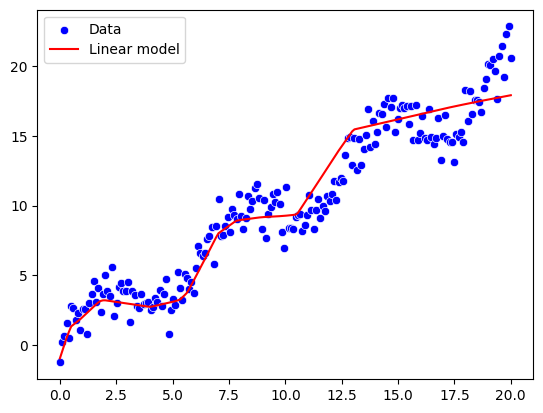

In [24]:
sns.scatterplot(x=X,y=y , color='blue',label='Data')
sns.lineplot(x=X,y=y_pred_m2.ravel(),color='red',label='Linear model')
